In [1]:
import matplotlib.pyplot as plt
import cv2
import scipy.io
from os import walk
import shutil

In [2]:
!mkdir data
!wget -c http://ai.stanford.edu/~jkrause/car196/car_ims.tgz \
      -O cars_all.tgz

--2021-07-12 13:52:13--  http://ai.stanford.edu/~jkrause/car196/car_ims.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1956628579 (1.8G) [application/x-gzip]
Saving to: ‘cars_all.tgz’

cars_all.tgz        100%[===================>]   1.82G  20.0MB/s    in 1m 53s  

2021-07-12 13:54:06 (16.5 MB/s) - ‘cars_all.tgz’ saved [1956628579/1956628579]



In [3]:
!tar -xvf  '/content/cars_all.tgz' -C '/content/data'

Streaming output truncated to the last 5000 lines.
car_ims/006903.jpg
car_ims/006571.jpg
car_ims/011511.jpg
car_ims/011963.jpg
car_ims/006048.jpg
car_ims/003716.jpg
car_ims/010351.jpg
car_ims/010884.jpg
car_ims/002156.jpg
car_ims/007608.jpg
car_ims/013244.jpg
car_ims/013991.jpg
car_ims/001043.jpg
car_ims/012876.jpg
car_ims/012404.jpg
car_ims/000603.jpg
car_ims/010730.jpg
car_ims/002290.jpg
car_ims/010097.jpg
car_ims/007269.jpg
car_ims/002945.jpg
car_ims/002537.jpg
car_ims/011170.jpg
car_ims/003377.jpg
car_ims/006429.jpg
car_ims/014189.jpg
car_ims/012065.jpg
car_ims/000262.jpg
car_ims/009929.jpg
car_ims/013625.jpg
car_ims/001385.jpg
car_ims/013182.jpg
car_ims/001422.jpg
car_ims/001850.jpg
car_ims/004878.jpg
car_ims/001354.jpg
car_ims/001881.jpg
car_ims/013153.jpg
car_ims/000514.jpg
car_ims/000966.jpg
car_ims/012713.jpg
car_ims/003873.jpg
car_ims/003401.jpg
car_ims/011606.jpg
car_ims/014158.jpg
car_ims/002241.jpg
car_ims/002994.jpg
car_ims/015718.jpg
car_ims/010046.jpg
car_ims/000175.jpg

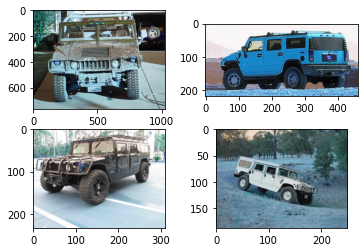

In [4]:
f, axarr = plt.subplots(2,2)
img1 = cv2.imread('/content/data/car_ims/000001.jpg')
img2 = cv2.imread('/content/data/car_ims/000002.jpg')
img3 = cv2.imread('/content/data/car_ims/000003.jpg')
img4 = cv2.imread('/content/data/car_ims/000004.jpg')
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)


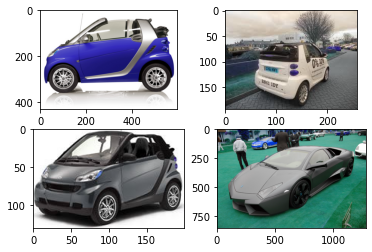

In [5]:
f, axarr = plt.subplots(2,2)
img1 = cv2.imread('/content/data/car_ims/016183.jpg')
img2 = cv2.imread('/content/data/car_ims/016184.jpg')
img3 = cv2.imread('/content/data/car_ims/016185.jpg')
img4 = cv2.imread('/content/data/car_ims/012345.jpg')
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)

In [6]:
!wget -c http://ai.stanford.edu/~jkrause/car196/cars_annos.mat \
      -O /content/data/cars_annos.mat

--2021-07-12 13:54:35--  http://ai.stanford.edu/~jkrause/car196/cars_annos.mat
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394471 (385K) [text/plain]
Saving to: ‘/content/data/cars_annos.mat’

/content/data/cars_ 100%[===================>] 385.23K  1.08MB/s    in 0.3s    

2021-07-12 13:54:35 (1.08 MB/s) - ‘/content/data/cars_annos.mat’ saved [394471/394471]



In [7]:

cars_annos = scipy.io.loadmat('/content/data/cars_annos.mat')

In [8]:
cars_annos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [9]:
# annotations
ann = cars_annos['annotations']

In [10]:
print(ann.shape)
print(ann.size)

(1, 16185)
16185


In [11]:
class_names = cars_annos['class_names']

In [12]:
print(class_names.shape)
print(class_names.size)

(1, 196)
196


In [13]:
print("Annotation: ",ann[0,0])
print("Classname: ",class_names[0,ann[0,0][5]])

Annotation:  (array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8))
Classname:  [[array(['Acura RL Sedan 2012'], dtype='<U19')]]


In [14]:
row = ann[0,0]
#print(row)
class_path = row[0] # relative_im_path
print(class_path)
x1 = row[1] # bbox_x1
print(x1)
y1 = row[2] # bbox_y1
print(y1)
x2 = row[3] # bbox_x2
print(x2)
y2 = row[4] # bbox_y2
print(y2)
rclass = row[5] # class
print(rclass)
print(class_names[0,rclass])
rtest = row[6] # test
print(rtest)
print(class_names[0,rtest])

['car_ims/000001.jpg']
[[112]]
[[7]]
[[853]]
[[717]]
[[1]]
[[array(['Acura RL Sedan 2012'], dtype='<U19')]]
[[0]]
[[array(['AM General Hummer SUV 2000'], dtype='<U26')]]


In [15]:
row = ann[0,123]
ann_path = row['relative_im_path']
print(str(ann_path))
ann_x1 = row['bbox_x1']
print(int(ann_x1))
ann_x2 = row['bbox_x2']
print(int(ann_x2))
ann_y1 = row['bbox_y1']
print(int(ann_y1))
ann_y2 = row['bbox_y2']
print(int(ann_y2))
ann_class_no = row['class']
print(ann_class_no)
ann_class = class_names[0,ann_class_no-1]
print(str(ann_class))
ann_test_no = row['test']
print(ann_test_no)
ann_test = class_names[0,ann_test_no]
print(str(ann_test))

['car_ims/000124.jpg']
208
909
97
447
[[2]]
[[array(['Acura RL Sedan 2012'], dtype='<U19')]]
[[1]]
[[array(['Acura RL Sedan 2012'], dtype='<U19')]]


In [16]:
length = ann.size
import pandas as pd
df_ann = pd.DataFrame(columns = ['relative_im_path','bbox_x1','bbox_y1','bbox_x2','bbox_y2','class','test'])

In [17]:
df_ann

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test


In [18]:
for i in range(length):
    row = ann[0,i]
    df_ann.loc[i,'relative_im_path'] = str("\'") + '/content/data/car_ims/' + str(row['relative_im_path'])[10:-2] + str("\'")
    df_ann.loc[i,'bbox_x1'] = int(row['bbox_x1'])
    df_ann.loc[i,'bbox_y1'] = int(row['bbox_y1'])
    df_ann.loc[i,'bbox_x2'] = int(row['bbox_x2'])
    df_ann.loc[i,'bbox_y2'] = int(row['bbox_y2'])
    ann_class_no = int(row['class'])
    df_ann.loc[i,'class'] = str(class_names[0,ann_class_no-1])[1:-1].replace(" ", "_")
    ann_test_no = int(row['test'])
    df_ann.loc[i,'test'] = str(class_names[0,ann_test_no])[1:-1].replace(" ", "_")

In [19]:
df_ann.head()

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
0,'/content/data/car_ims/000001.jpg',112,7,853,717,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
1,'/content/data/car_ims/000002.jpg',48,24,441,202,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
2,'/content/data/car_ims/000003.jpg',7,4,277,180,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
3,'/content/data/car_ims/000004.jpg',33,50,197,150,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
4,'/content/data/car_ims/000005.jpg',5,8,83,58,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'


In [21]:
df_ann.tail()

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
16180,'/content/data/car_ims/016181.jpg',38,36,375,234,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16181,'/content/data/car_ims/016182.jpg',29,34,235,164,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16182,'/content/data/car_ims/016183.jpg',25,32,587,359,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16183,'/content/data/car_ims/016184.jpg',56,60,208,186,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16184,'/content/data/car_ims/016185.jpg',1,1,200,131,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'


In [22]:
print(df_ann.loc[123,'relative_im_path'])
print(df_ann.loc[123,'class'])
print(df_ann.loc[123,'test'])

'/content/data/car_ims/000124.jpg'
'Acura_RL_Sedan_2012'
'Acura_RL_Sedan_2012'


In [23]:
df_ann.shape

(16185, 7)

In [24]:
train=df_ann.sample(frac=0.8,random_state=200) #random state is a seed value
test=df_ann.drop(train.index)

In [25]:
val=test.sample(frac=0.5,random_state=200)
test=test.drop(val.index)

In [26]:
train["class"].value_counts()

'GMC_Savana_Van_2012'                                    105
'Jaguar_XK_XKR_2012'                                      81
'Mercedes-Benz_300-Class_Convertible_1993'                81
'Mitsubishi_Lancer_Sedan_2012'                            80
'Lamborghini_Diablo_Coupe_2001'                           78
                                                        ... 
'Rolls-Royce_Phantom_Drophead_Coupe_Convertible_2012'     48
'Maybach_Landaulet_Convertible_2012'                      47
'FIAT_500_Abarth_2012'                                    46
'Chevrolet_Express_Cargo_Van_2007'                        44
'Hyundai_Accent_Sedan_2012'                               38
Name: class, Length: 196, dtype: int64

In [27]:
test["class"].value_counts()

'Chrysler_Crossfire_Convertible_2008'    17
'Chevrolet_TrailBlazer_SS_2009'          17
'Audi_S5_Convertible_2012'               16
'Hyundai_Santa_Fe_SUV_2012'              14
'Volkswagen_Golf_Hatchback_2012'         14
                                         ..
'Ferrari_FF_Coupe_2012'                   3
'Acura_RL_Sedan_2012'                     3
'Ford_Fiesta_Sedan_2012'                  3
'Ford_Edge_SUV_2012'                      2
'Audi_100_Sedan_1994'                     1
Name: class, Length: 196, dtype: int64

In [28]:
val["class"].value_counts()

'GMC_Savana_Van_2012'               19
'Plymouth_Neon_Coupe_1999'          17
'Rolls-Royce_Phantom_Sedan_2012'    16
'Dodge_Journey_SUV_2012'            15
'Dodge_Durango_SUV_2007'            15
                                    ..
'Infiniti_QX56_SUV_2011'             3
'BMW_M6_Convertible_2010'            3
'Audi_A5_Coupe_2012'                 3
'Dodge_Challenger_SRT8_2011'         2
'Hyundai_Accent_Sedan_2012'          1
Name: class, Length: 196, dtype: int64




#Converting train annotations to CSV Format

In [34]:
full =[];
for index, row in train.iterrows():
    mama = str(row['relative_im_path'])[-11:-1];
    full.append(mama)


In [35]:
full[:10]

['000915.jpg',
 '004202.jpg',
 '008493.jpg',
 '009851.jpg',
 '014919.jpg',
 '011593.jpg',
 '011711.jpg',
 '008901.jpg',
 '004378.jpg',
 '006231.jpg']

In [37]:
combined = [];
import numpy as np
for index, row in train.iterrows():
    img_file = str(row['relative_im_path'])[-11:-1];
    #label = str(row['class']).encode("ascii");
    label = str(row['class']);
    x1 = str(row['bbox_x1'])
    x2 = str(row['bbox_x2'])
    y1 = str(row['bbox_y1'])
    y2 = str(row['bbox_y2'])
    wr = "";
    # wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label.decode("ascii")[1:-1];
    wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label[1:-1];
    combined.append([img_file, wr]);

In [38]:
combined[:10]

[['000915.jpg', '10 13 234 146 Audi_RS_4_Convertible_2008'],
 ['004202.jpg', '33 10 277 145 Cadillac_SRX_SUV_2012'],
 ['008493.jpg', '49 68 501 263 Ferrari_458_Italia_Coupe_2012'],
 ['009851.jpg', '16 43 572 371 GMC_Yukon_Hybrid_SUV_2012'],
 ['014919.jpg', '66 70 872 501 Suzuki_Kizashi_Sedan_2012'],
 ['011593.jpg', '17 50 290 179 Infiniti_G_Coupe_IPL_2012'],
 ['011711.jpg', '80 10 376 306 Isuzu_Ascender_SUV_2008'],
 ['008901.jpg', '11 5 291 179 Ford_Expedition_EL_SUV_2009'],
 ['004378.jpg', '23 45 237 165 Chevrolet_Silverado_1500_Hybrid_Crew_Cab_2012'],
 ['006231.jpg', '33 156 564 345 Chrysler_Sebring_Convertible_2010']]

In [39]:
df_train = pd.DataFrame(combined, columns = ['ID', 'Labels'])  
df_train.to_csv("/content/data/train_labels.csv", index=False)

#Converting test annotations to CSV Format

In [42]:
combined = [];
import numpy as np
for index, row in test.iterrows():
    img_file = str(row['relative_im_path'])[-11:-1];
    #label = str(row['class']).encode("ascii");
    label = str(row['class']);
    x1 = str(row['bbox_x1'])
    x2 = str(row['bbox_x2'])
    y1 = str(row['bbox_y1'])
    y2 = str(row['bbox_y2'])
    wr = "";
    # wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label.decode("ascii")[1:-1];
    wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label[1:-1];
    combined.append([img_file, wr]);

In [43]:
combined[:10]

[['000006.jpg', '10 6 250 110 AM_General_Hummer_SUV_2000'],
 ['000038.jpg', '26 25 283 157 AM_General_Hummer_SUV_2000'],
 ['000050.jpg', '9 3 93 41 AM_General_Hummer_SUV_2000'],
 ['000058.jpg', '28 14 118 80 AM_General_Hummer_SUV_2000'],
 ['000125.jpg', '24 55 588 405 Acura_RL_Sedan_2012'],
 ['000130.jpg', '51 51 441 289 Acura_RL_Sedan_2012'],
 ['000133.jpg', '12 33 292 171 Acura_RL_Sedan_2012'],
 ['000170.jpg', '13 115 787 440 Acura_TL_Sedan_2012'],
 ['000176.jpg', '26 49 477 288 Acura_TL_Sedan_2012'],
 ['000206.jpg', '12 68 285 193 Acura_TL_Sedan_2012']]

In [44]:
df_test = pd.DataFrame(combined, columns = ['ID', 'Labels'])  
df_test.to_csv("/content/data/test_labels.csv", index=False)

#Converting val annotations to csv

In [45]:
combined = [];
import numpy as np
for index, row in val.iterrows():
    img_file = str(row['relative_im_path'])[-11:-1];
    #label = str(row['class']).encode("ascii");
    label = str(row['class']);
    x1 = str(row['bbox_x1'])
    x2 = str(row['bbox_x2'])
    y1 = str(row['bbox_y1'])
    y2 = str(row['bbox_y2'])
    wr = "";
    # wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label.decode("ascii")[1:-1];
    wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label[1:-1];
    combined.append([img_file, wr]);

In [46]:
combined[:10]

[['008445.jpg', '63 175 290 315 Ferrari_458_Italia_Coupe_2012'],
 ['014530.jpg', '52 43 534 425 Rolls-Royce_Phantom_Sedan_2012'],
 ['013894.jpg', '17 84 621 391 Nissan_NV_Passenger_Van_2012'],
 ['005014.jpg', '29 34 256 154 Chevrolet_Tahoe_Hybrid_SUV_2012'],
 ['008008.jpg', '75 82 328 204 Eagle_Talon_Hatchback_1998'],
 ['000612.jpg', '45 40 644 283 Aston_Martin_V8_Vantage_Convertible_2012'],
 ['009575.jpg', '47 39 371 270 Ford_Fiesta_Sedan_2012'],
 ['002407.jpg', '18 18 384 201 BMW_3_Series_Wagon_2012'],
 ['016053.jpg', '37 63 267 215 Volvo_XC90_SUV_2007'],
 ['015807.jpg', '24 22 609 352 Volkswagen_Beetle_Hatchback_2012']]

In [47]:
df_val = pd.DataFrame(combined, columns = ['ID', 'Labels'])  
df_val.to_csv("/content/data/val_labels.csv", index=False)

# Splitting files

In [48]:
#get filenames from folder
def get_filenames(mypath):
  f = []
  for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
  return f



In [49]:
mypath = "/content/data/car_ims/"
filenames = get_filenames(mypath)

In [50]:
!mkdir "/content/data/ims_train/"
!mkdir "/content/data/ims_test/"
!mkdir "/content/data/ims_val/"

In [52]:
names_train =  list(df_train['ID'])
names_test = list(df_test['ID'])
names_val =  list(df_val['ID'])

In [53]:
names_train

['000915.jpg',
 '004202.jpg',
 '008493.jpg',
 '009851.jpg',
 '014919.jpg',
 '011593.jpg',
 '011711.jpg',
 '008901.jpg',
 '004378.jpg',
 '006231.jpg',
 '010102.jpg',
 '008715.jpg',
 '012395.jpg',
 '013991.jpg',
 '001669.jpg',
 '004561.jpg',
 '006794.jpg',
 '013252.jpg',
 '000137.jpg',
 '001650.jpg',
 '013324.jpg',
 '015207.jpg',
 '009633.jpg',
 '009991.jpg',
 '007549.jpg',
 '007911.jpg',
 '006817.jpg',
 '007513.jpg',
 '006425.jpg',
 '000144.jpg',
 '013255.jpg',
 '010313.jpg',
 '005884.jpg',
 '007640.jpg',
 '003035.jpg',
 '008865.jpg',
 '014553.jpg',
 '013056.jpg',
 '006859.jpg',
 '006272.jpg',
 '009371.jpg',
 '006049.jpg',
 '014504.jpg',
 '001418.jpg',
 '005043.jpg',
 '004366.jpg',
 '008373.jpg',
 '000588.jpg',
 '014513.jpg',
 '013543.jpg',
 '013967.jpg',
 '013635.jpg',
 '006481.jpg',
 '002277.jpg',
 '004821.jpg',
 '005671.jpg',
 '014325.jpg',
 '011496.jpg',
 '013845.jpg',
 '006648.jpg',
 '000650.jpg',
 '010971.jpg',
 '008193.jpg',
 '015168.jpg',
 '012184.jpg',
 '015039.jpg',
 '012792.j

In [54]:
name = "007395.jpg"
if (name in names_train) or (name in names_test) or (name in names_val):
  print("hai")

hai


In [55]:
# Delete the ims_* folders to try again

img_path = "/content/data/car_ims/"

target_train_path =  "/content/data/ims_train/"
target_test_path = "/content/data/ims_test/"
target_val_path = "/content/data/ims_val/"

names_train =  list(df_train['ID'])
names_test = list(df_test['ID'])
names_val =  list(df_val['ID'])

for i in filenames:
  #print("i: "+i)
  if i in names_train:
    #print("Train")
    orig_path = img_path + i
    target_path = target_train_path + i
    shutil.copy(orig_path, target_path)
  if i in names_test:
    #print("Test")
    orig_path = img_path + i
    target_path = target_test_path + i
    shutil.copy(orig_path, target_path)
  if i in names_val:
    #print("Val")
    orig_path = img_path + i
    target_path = target_val_path + i
    shutil.copy(orig_path, target_path)

Streaming output truncated to the last 5000 lines.
i: 002352.jpg
Train
i: 007146.jpg
Train
i: 007027.jpg
Train
i: 014199.jpg
Train
i: 001686.jpg
Train
i: 002588.jpg
Test
i: 015400.jpg
Train
i: 003029.jpg
Train
i: 015945.jpg
Train
i: 011008.jpg
Train
i: 007562.jpg
Train
i: 015626.jpg
Train
i: 000396.jpg
Train
i: 014104.jpg
Test
i: 010129.jpg
Train
i: 009692.jpg
Train
i: 015305.jpg
Train
i: 004328.jpg
Train
i: 005625.jpg
Val
i: 010503.jpg
Train
i: 010448.jpg
Val
i: 004199.jpg
Val
i: 015181.jpg
Train
i: 005616.jpg
Train
i: 000288.jpg
Train
i: 013808.jpg
Train
i: 001691.jpg
Train
i: 014590.jpg
Train
i: 002311.jpg
Val
i: 002919.jpg
Train
i: 001586.jpg
Train
i: 000225.jpg
Test
i: 011190.jpg
Train
i: 008957.jpg
Train
i: 013822.jpg
Train
i: 009832.jpg
Train
i: 001708.jpg
Train
i: 011002.jpg
Train
i: 011765.jpg
Train
i: 004528.jpg
Train
i: 011555.jpg
Train
i: 003997.jpg
Test
i: 013901.jpg
Train
i: 007447.jpg
Train
i: 015072.jpg
Train
i: 008598.jpg
Train
i: 006109.jpg
Train
i: 009474.jpg
Train
i

In [56]:
mypath = "/content/data/ims_val/"
names = get_filenames(mypath)

12948

#CSV to COCO format : Train

In [92]:
TRAIN_IMAGECOUNT =len(names_train) =len(names_train)
TEST_IMAGECOUNT =len(names_test)
VAL_IMAGECOUNT =len(names_val)

In [93]:
print("Train Images: "+ str(TRAIN_IMAGECOUNT))
print("Test Images: "+ str(TEST_IMAGECOUNT))
print("Val Images: "+ str(VAL_IMAGECOUNT))

Train Images: 12948
Test Images: 1619
Val Images: 1618


In [59]:
!pip install dicttoxml

  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp37-none-any.whl size=17465 sha256=f77d50386483660f1b3f993f126d11afcb6bc0ed7c10256adbda92581e2faf0a
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [60]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [62]:
!mkdir /content/data/annotations

In [97]:
# Change for train/test/val
root = "/content";
img_dir = "data/ims_train/";
anno_file = "data/train_labels.csv";

In [98]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/data/annotations/";

In [99]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [100]:
# Change for train/test/val
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = "train";
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes_"+ tmp + ".txt";

In [101]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [102]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [103]:
df.head()

,ID,Labels
0,000915.jpg,10 13 234 146 Audi_RS_4_Convertible_2008
1,004202.jpg,33 10 277 145 Cadillac_SRX_SUV_2012
2,008493.jpg,49 68 501 263 Ferrari_458_Italia_Coupe_2012
3,009851.jpg,16 43 572 371 GMC_Yukon_Hybrid_SUV_2012
4,014919.jpg,66 70 872 501 Suzuki_Kizashi_Sedan_2012


In [104]:
df.tail()

,ID,Labels
12943,005420.jpg,63 92 468 305 Chevrolet_Malibu_Hybrid_Sedan_2010
12944,010653.jpg,67 101 577 384 Honda_Accord_Sedan_2012
12945,001921.jpg,106 187 509 406 Audi_S4_Sedan_2007
12946,003561.jpg,76 367 1207 1105 Bentley_Continental_Flying_Sp...
12947,001110.jpg,47 86 353 239 Audi_TTS_Coupe_2012


In [105]:
columns

Index(['ID', 'Labels'], dtype='object')

In [106]:
delimiter = " ";

In [107]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # print(tmp)
    for j in range((len(tmp)//5)):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 196/196 [00:00<00:00, 45030.87it/s]


In [108]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;

In [109]:
# Count values to be changed
for i in tqdm(range(TRAIN_IMAGECOUNT)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # image_in_path = input_images_folder + img_name;
    image_in_path = root + "/" + img_dir + img_name;
    print(image_in_path)
    image = cv2.imread(image_in_path, 1);
    h, w, c = image.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

  0%|          | 21/12948 [00:00<01:03, 202.32it/s]

/content/data/ims_train/000915.jpg
/content/data/ims_train/004202.jpg
/content/data/ims_train/008493.jpg
/content/data/ims_train/009851.jpg
/content/data/ims_train/014919.jpg
/content/data/ims_train/011593.jpg
/content/data/ims_train/011711.jpg
/content/data/ims_train/008901.jpg
/content/data/ims_train/004378.jpg
/content/data/ims_train/006231.jpg
/content/data/ims_train/010102.jpg
/content/data/ims_train/008715.jpg
/content/data/ims_train/012395.jpg
/content/data/ims_train/013991.jpg
/content/data/ims_train/001669.jpg
/content/data/ims_train/004561.jpg
/content/data/ims_train/006794.jpg
/content/data/ims_train/013252.jpg
/content/data/ims_train/000137.jpg
/content/data/ims_train/001650.jpg
/content/data/ims_train/013324.jpg
/content/data/ims_train/015207.jpg
/content/data/ims_train/009633.jpg
/content/data/ims_train/009991.jpg
/content/data/ims_train/007549.jpg
/content/data/ims_train/007911.jpg
/content/data/ims_train/006817.jpg
/content/data/ims_train/007513.jpg
/content/data/ims_tr

  0%|          | 60/12948 [00:00<01:07, 189.63it/s]

/content/data/ims_train/008865.jpg
/content/data/ims_train/014553.jpg
/content/data/ims_train/013056.jpg
/content/data/ims_train/006859.jpg
/content/data/ims_train/006272.jpg
/content/data/ims_train/009371.jpg
/content/data/ims_train/006049.jpg
/content/data/ims_train/014504.jpg
/content/data/ims_train/001418.jpg
/content/data/ims_train/005043.jpg
/content/data/ims_train/004366.jpg
/content/data/ims_train/008373.jpg
/content/data/ims_train/000588.jpg
/content/data/ims_train/014513.jpg
/content/data/ims_train/013543.jpg
/content/data/ims_train/013967.jpg
/content/data/ims_train/013635.jpg
/content/data/ims_train/006481.jpg
/content/data/ims_train/002277.jpg
/content/data/ims_train/004821.jpg
/content/data/ims_train/005671.jpg
/content/data/ims_train/014325.jpg
/content/data/ims_train/011496.jpg
/content/data/ims_train/013845.jpg
/content/data/ims_train/006648.jpg
/content/data/ims_train/000650.jpg
/content/data/ims_train/010971.jpg
/content/data/ims_train/008193.jpg
/content/data/ims_tr

  1%|          | 73/12948 [00:00<01:56, 110.47it/s]

/content/data/ims_train/012184.jpg
/content/data/ims_train/015039.jpg
/content/data/ims_train/012792.jpg
/content/data/ims_train/002461.jpg
/content/data/ims_train/010110.jpg
/content/data/ims_train/015592.jpg
/content/data/ims_train/000870.jpg
/content/data/ims_train/015409.jpg
/content/data/ims_train/009137.jpg
/content/data/ims_train/013511.jpg
/content/data/ims_train/005484.jpg
/content/data/ims_train/004243.jpg
/content/data/ims_train/004895.jpg
/content/data/ims_train/013754.jpg
/content/data/ims_train/007219.jpg
/content/data/ims_train/003948.jpg
/content/data/ims_train/004244.jpg
/content/data/ims_train/006606.jpg
/content/data/ims_train/001671.jpg
/content/data/ims_train/005495.jpg


  1%|          | 116/12948 [00:00<01:39, 129.31it/s]

/content/data/ims_train/013908.jpg
/content/data/ims_train/005708.jpg
/content/data/ims_train/008495.jpg
/content/data/ims_train/005465.jpg
/content/data/ims_train/001900.jpg
/content/data/ims_train/002374.jpg
/content/data/ims_train/007395.jpg
/content/data/ims_train/000800.jpg
/content/data/ims_train/015140.jpg
/content/data/ims_train/009227.jpg
/content/data/ims_train/016079.jpg
/content/data/ims_train/015357.jpg
/content/data/ims_train/008089.jpg
/content/data/ims_train/015295.jpg
/content/data/ims_train/007749.jpg
/content/data/ims_train/012738.jpg
/content/data/ims_train/003237.jpg
/content/data/ims_train/014216.jpg
/content/data/ims_train/014835.jpg
/content/data/ims_train/010755.jpg
/content/data/ims_train/002370.jpg
/content/data/ims_train/012614.jpg
/content/data/ims_train/011331.jpg
/content/data/ims_train/009477.jpg
/content/data/ims_train/010144.jpg
/content/data/ims_train/015134.jpg
/content/data/ims_train/008787.jpg
/content/data/ims_train/015952.jpg
/content/data/ims_tr

  1%|          | 130/12948 [00:00<01:43, 123.74it/s]

/content/data/ims_train/012326.jpg
/content/data/ims_train/006603.jpg
/content/data/ims_train/011235.jpg
/content/data/ims_train/014974.jpg
/content/data/ims_train/012127.jpg
/content/data/ims_train/012358.jpg
/content/data/ims_train/003763.jpg
/content/data/ims_train/002907.jpg
/content/data/ims_train/002989.jpg
/content/data/ims_train/002855.jpg
/content/data/ims_train/001008.jpg
/content/data/ims_train/007526.jpg
/content/data/ims_train/001193.jpg
/content/data/ims_train/015040.jpg
/content/data/ims_train/015692.jpg
/content/data/ims_train/015131.jpg
/content/data/ims_train/013140.jpg
/content/data/ims_train/000984.jpg
/content/data/ims_train/012419.jpg
/content/data/ims_train/007091.jpg
/content/data/ims_train/006259.jpg
/content/data/ims_train/006830.jpg
/content/data/ims_train/013560.jpg
/content/data/ims_train/008767.jpg


  1%|          | 161/12948 [00:01<01:33, 137.43it/s]

/content/data/ims_train/002966.jpg
/content/data/ims_train/002379.jpg
/content/data/ims_train/014524.jpg
/content/data/ims_train/013033.jpg
/content/data/ims_train/013270.jpg
/content/data/ims_train/002472.jpg
/content/data/ims_train/002708.jpg
/content/data/ims_train/012126.jpg
/content/data/ims_train/002651.jpg
/content/data/ims_train/014460.jpg
/content/data/ims_train/008589.jpg
/content/data/ims_train/000620.jpg
/content/data/ims_train/002560.jpg
/content/data/ims_train/000371.jpg
/content/data/ims_train/001508.jpg
/content/data/ims_train/013435.jpg
/content/data/ims_train/006679.jpg
/content/data/ims_train/011844.jpg
/content/data/ims_train/007370.jpg
/content/data/ims_train/003811.jpg
/content/data/ims_train/015481.jpg
/content/data/ims_train/007935.jpg
/content/data/ims_train/008227.jpg
/content/data/ims_train/010286.jpg
/content/data/ims_train/015809.jpg
/content/data/ims_train/005228.jpg
/content/data/ims_train/014979.jpg
/content/data/ims_train/002300.jpg
/content/data/ims_tr

  1%|▏         | 176/12948 [00:01<01:39, 128.97it/s]

/content/data/ims_train/011884.jpg
/content/data/ims_train/016139.jpg
/content/data/ims_train/010745.jpg
/content/data/ims_train/016089.jpg
/content/data/ims_train/011790.jpg
/content/data/ims_train/014064.jpg
/content/data/ims_train/009533.jpg
/content/data/ims_train/002035.jpg
/content/data/ims_train/004610.jpg
/content/data/ims_train/003604.jpg
/content/data/ims_train/015017.jpg
/content/data/ims_train/003881.jpg
/content/data/ims_train/006370.jpg
/content/data/ims_train/015554.jpg
/content/data/ims_train/012635.jpg
/content/data/ims_train/009854.jpg


  2%|▏         | 203/12948 [00:01<01:59, 106.73it/s]

/content/data/ims_train/010042.jpg
/content/data/ims_train/007362.jpg
/content/data/ims_train/016082.jpg
/content/data/ims_train/008958.jpg
/content/data/ims_train/000560.jpg
/content/data/ims_train/000762.jpg
/content/data/ims_train/008748.jpg
/content/data/ims_train/008226.jpg
/content/data/ims_train/008024.jpg
/content/data/ims_train/000964.jpg
/content/data/ims_train/011356.jpg
/content/data/ims_train/001605.jpg
/content/data/ims_train/016107.jpg
/content/data/ims_train/001807.jpg
/content/data/ims_train/013412.jpg
/content/data/ims_train/013104.jpg
/content/data/ims_train/007536.jpg
/content/data/ims_train/009929.jpg
/content/data/ims_train/004454.jpg
/content/data/ims_train/001641.jpg
/content/data/ims_train/013053.jpg
/content/data/ims_train/006907.jpg
/content/data/ims_train/000499.jpg
/content/data/ims_train/003887.jpg
/content/data/ims_train/014600.jpg
/content/data/ims_train/001401.jpg


  2%|▏         | 216/12948 [00:01<01:53, 112.49it/s]

/content/data/ims_train/015958.jpg
/content/data/ims_train/000344.jpg
/content/data/ims_train/009543.jpg
/content/data/ims_train/013378.jpg
/content/data/ims_train/013440.jpg
/content/data/ims_train/004859.jpg
/content/data/ims_train/013236.jpg
/content/data/ims_train/015311.jpg
/content/data/ims_train/005691.jpg
/content/data/ims_train/010934.jpg
/content/data/ims_train/015056.jpg
/content/data/ims_train/006179.jpg
/content/data/ims_train/002346.jpg
/content/data/ims_train/002321.jpg


  2%|▏         | 248/12948 [00:02<02:00, 105.23it/s]

/content/data/ims_train/013050.jpg
/content/data/ims_train/005705.jpg
/content/data/ims_train/009087.jpg
/content/data/ims_train/013197.jpg
/content/data/ims_train/000420.jpg
/content/data/ims_train/002095.jpg
/content/data/ims_train/010490.jpg
/content/data/ims_train/014984.jpg
/content/data/ims_train/006855.jpg
/content/data/ims_train/009889.jpg
/content/data/ims_train/000591.jpg
/content/data/ims_train/003158.jpg
/content/data/ims_train/002084.jpg
/content/data/ims_train/014102.jpg
/content/data/ims_train/012393.jpg
/content/data/ims_train/007588.jpg
/content/data/ims_train/015895.jpg
/content/data/ims_train/003005.jpg
/content/data/ims_train/001329.jpg
/content/data/ims_train/005531.jpg
/content/data/ims_train/003099.jpg
/content/data/ims_train/000415.jpg
/content/data/ims_train/011058.jpg
/content/data/ims_train/007421.jpg
/content/data/ims_train/009211.jpg
/content/data/ims_train/005337.jpg
/content/data/ims_train/003413.jpg
/content/data/ims_train/011430.jpg
/content/data/ims_tr

  2%|▏         | 279/12948 [00:02<02:03, 102.42it/s]

/content/data/ims_train/015557.jpg
/content/data/ims_train/001119.jpg
/content/data/ims_train/013418.jpg
/content/data/ims_train/008197.jpg
/content/data/ims_train/006542.jpg
/content/data/ims_train/013182.jpg
/content/data/ims_train/001789.jpg
/content/data/ims_train/007590.jpg
/content/data/ims_train/011116.jpg
/content/data/ims_train/009701.jpg
/content/data/ims_train/000960.jpg
/content/data/ims_train/010867.jpg
/content/data/ims_train/015475.jpg
/content/data/ims_train/013156.jpg
/content/data/ims_train/009837.jpg
/content/data/ims_train/002675.jpg
/content/data/ims_train/014249.jpg
/content/data/ims_train/012964.jpg
/content/data/ims_train/008400.jpg
/content/data/ims_train/008790.jpg
/content/data/ims_train/002647.jpg
/content/data/ims_train/003546.jpg
/content/data/ims_train/007783.jpg
/content/data/ims_train/015835.jpg
/content/data/ims_train/011537.jpg


  2%|▏         | 295/12948 [00:02<01:52, 112.64it/s]

/content/data/ims_train/002706.jpg
/content/data/ims_train/007660.jpg
/content/data/ims_train/007805.jpg
/content/data/ims_train/002688.jpg
/content/data/ims_train/000392.jpg
/content/data/ims_train/003913.jpg
/content/data/ims_train/010523.jpg
/content/data/ims_train/011684.jpg
/content/data/ims_train/007932.jpg
/content/data/ims_train/005203.jpg
/content/data/ims_train/011654.jpg
/content/data/ims_train/007629.jpg
/content/data/ims_train/001629.jpg
/content/data/ims_train/000657.jpg
/content/data/ims_train/007704.jpg
/content/data/ims_train/009170.jpg
/content/data/ims_train/000577.jpg
/content/data/ims_train/014369.jpg
/content/data/ims_train/004456.jpg
/content/data/ims_train/006215.jpg
/content/data/ims_train/000034.jpg
/content/data/ims_train/009284.jpg
/content/data/ims_train/008934.jpg


  3%|▎         | 325/12948 [00:02<01:53, 111.25it/s]

/content/data/ims_train/002355.jpg
/content/data/ims_train/014080.jpg
/content/data/ims_train/012130.jpg
/content/data/ims_train/010891.jpg
/content/data/ims_train/002243.jpg
/content/data/ims_train/003850.jpg
/content/data/ims_train/013564.jpg
/content/data/ims_train/012054.jpg
/content/data/ims_train/002782.jpg
/content/data/ims_train/010999.jpg
/content/data/ims_train/007912.jpg
/content/data/ims_train/008427.jpg
/content/data/ims_train/001489.jpg
/content/data/ims_train/001683.jpg
/content/data/ims_train/009092.jpg
/content/data/ims_train/011011.jpg
/content/data/ims_train/014721.jpg
/content/data/ims_train/015544.jpg
/content/data/ims_train/000613.jpg
/content/data/ims_train/012556.jpg
/content/data/ims_train/006035.jpg
/content/data/ims_train/009763.jpg
/content/data/ims_train/010940.jpg
/content/data/ims_train/008964.jpg
/content/data/ims_train/014094.jpg
/content/data/ims_train/011332.jpg
/content/data/ims_train/012562.jpg
/content/data/ims_train/000829.jpg
/content/data/ims_tr

  3%|▎         | 363/12948 [00:02<01:29, 140.14it/s]

/content/data/ims_train/001292.jpg
/content/data/ims_train/013367.jpg
/content/data/ims_train/014183.jpg
/content/data/ims_train/000126.jpg
/content/data/ims_train/013005.jpg
/content/data/ims_train/002593.jpg
/content/data/ims_train/006987.jpg
/content/data/ims_train/000287.jpg
/content/data/ims_train/011590.jpg
/content/data/ims_train/000617.jpg
/content/data/ims_train/003920.jpg
/content/data/ims_train/011298.jpg
/content/data/ims_train/007692.jpg
/content/data/ims_train/010977.jpg
/content/data/ims_train/013142.jpg
/content/data/ims_train/007135.jpg
/content/data/ims_train/003518.jpg
/content/data/ims_train/010812.jpg
/content/data/ims_train/013588.jpg
/content/data/ims_train/002578.jpg
/content/data/ims_train/001685.jpg
/content/data/ims_train/004145.jpg
/content/data/ims_train/012841.jpg
/content/data/ims_train/012403.jpg
/content/data/ims_train/007768.jpg
/content/data/ims_train/003331.jpg
/content/data/ims_train/001182.jpg
/content/data/ims_train/011458.jpg
/content/data/ims_tr

  3%|▎         | 379/12948 [00:03<02:09, 97.37it/s] 

/content/data/ims_train/011745.jpg
/content/data/ims_train/015775.jpg
/content/data/ims_train/000630.jpg
/content/data/ims_train/001679.jpg
/content/data/ims_train/016063.jpg
/content/data/ims_train/001649.jpg
/content/data/ims_train/001478.jpg
/content/data/ims_train/002959.jpg
/content/data/ims_train/014958.jpg
/content/data/ims_train/003117.jpg
/content/data/ims_train/009378.jpg
/content/data/ims_train/012695.jpg
/content/data/ims_train/007233.jpg
/content/data/ims_train/009009.jpg
/content/data/ims_train/008866.jpg
/content/data/ims_train/000880.jpg
/content/data/ims_train/008558.jpg
/content/data/ims_train/007125.jpg
/content/data/ims_train/015202.jpg
/content/data/ims_train/000067.jpg
/content/data/ims_train/007327.jpg
/content/data/ims_train/000011.jpg
/content/data/ims_train/014439.jpg


  3%|▎         | 395/12948 [00:03<01:59, 105.44it/s]

/content/data/ims_train/002704.jpg
/content/data/ims_train/008218.jpg
/content/data/ims_train/008292.jpg
/content/data/ims_train/010629.jpg
/content/data/ims_train/012264.jpg
/content/data/ims_train/011111.jpg
/content/data/ims_train/010873.jpg
/content/data/ims_train/013624.jpg
/content/data/ims_train/007833.jpg
/content/data/ims_train/014451.jpg


  3%|▎         | 408/12948 [00:03<03:01, 69.18it/s] 

/content/data/ims_train/011645.jpg
/content/data/ims_train/003667.jpg
/content/data/ims_train/007809.jpg
/content/data/ims_train/008563.jpg
/content/data/ims_train/002642.jpg
/content/data/ims_train/006798.jpg
/content/data/ims_train/000846.jpg
/content/data/ims_train/013662.jpg
/content/data/ims_train/010642.jpg
/content/data/ims_train/006238.jpg
/content/data/ims_train/010447.jpg
/content/data/ims_train/010244.jpg
/content/data/ims_train/005199.jpg
/content/data/ims_train/014370.jpg
/content/data/ims_train/015102.jpg
/content/data/ims_train/012079.jpg
/content/data/ims_train/009822.jpg
/content/data/ims_train/001176.jpg


  3%|▎         | 438/12948 [00:03<02:15, 92.48it/s]

/content/data/ims_train/012228.jpg
/content/data/ims_train/013756.jpg
/content/data/ims_train/005672.jpg
/content/data/ims_train/015661.jpg
/content/data/ims_train/010539.jpg
/content/data/ims_train/013408.jpg
/content/data/ims_train/010265.jpg
/content/data/ims_train/013223.jpg
/content/data/ims_train/015313.jpg
/content/data/ims_train/008186.jpg
/content/data/ims_train/015763.jpg
/content/data/ims_train/014613.jpg
/content/data/ims_train/011003.jpg
/content/data/ims_train/009557.jpg
/content/data/ims_train/001134.jpg
/content/data/ims_train/011238.jpg
/content/data/ims_train/003911.jpg
/content/data/ims_train/011355.jpg
/content/data/ims_train/002131.jpg
/content/data/ims_train/006776.jpg
/content/data/ims_train/008694.jpg
/content/data/ims_train/003861.jpg
/content/data/ims_train/008537.jpg
/content/data/ims_train/006211.jpg
/content/data/ims_train/013399.jpg
/content/data/ims_train/012306.jpg
/content/data/ims_train/011662.jpg
/content/data/ims_train/005861.jpg


  4%|▎         | 465/12948 [00:04<02:10, 95.31it/s] 

/content/data/ims_train/005695.jpg
/content/data/ims_train/014926.jpg
/content/data/ims_train/005377.jpg
/content/data/ims_train/009158.jpg
/content/data/ims_train/010088.jpg
/content/data/ims_train/013852.jpg
/content/data/ims_train/012451.jpg
/content/data/ims_train/008574.jpg
/content/data/ims_train/015215.jpg
/content/data/ims_train/014952.jpg
/content/data/ims_train/014446.jpg
/content/data/ims_train/013787.jpg
/content/data/ims_train/008672.jpg
/content/data/ims_train/014141.jpg
/content/data/ims_train/005422.jpg
/content/data/ims_train/012766.jpg
/content/data/ims_train/009619.jpg
/content/data/ims_train/009267.jpg
/content/data/ims_train/011025.jpg
/content/data/ims_train/007546.jpg


  4%|▎         | 477/12948 [00:04<02:07, 97.99it/s]

/content/data/ims_train/001081.jpg
/content/data/ims_train/006025.jpg
/content/data/ims_train/002567.jpg
/content/data/ims_train/008686.jpg
/content/data/ims_train/007308.jpg
/content/data/ims_train/011903.jpg
/content/data/ims_train/008128.jpg
/content/data/ims_train/010739.jpg
/content/data/ims_train/002160.jpg
/content/data/ims_train/000142.jpg
/content/data/ims_train/007217.jpg
/content/data/ims_train/006900.jpg
/content/data/ims_train/004374.jpg
/content/data/ims_train/007800.jpg
/content/data/ims_train/009549.jpg
/content/data/ims_train/006845.jpg
/content/data/ims_train/006171.jpg
/content/data/ims_train/015194.jpg
/content/data/ims_train/014965.jpg
/content/data/ims_train/015256.jpg
/content/data/ims_train/015120.jpg
/content/data/ims_train/006462.jpg


  4%|▍         | 504/12948 [00:04<01:56, 106.36it/s]

/content/data/ims_train/006279.jpg
/content/data/ims_train/015669.jpg
/content/data/ims_train/014144.jpg
/content/data/ims_train/015217.jpg
/content/data/ims_train/009147.jpg
/content/data/ims_train/015041.jpg
/content/data/ims_train/015277.jpg
/content/data/ims_train/012176.jpg
/content/data/ims_train/010103.jpg
/content/data/ims_train/011829.jpg
/content/data/ims_train/010528.jpg
/content/data/ims_train/004591.jpg
/content/data/ims_train/005909.jpg
/content/data/ims_train/008872.jpg
/content/data/ims_train/001031.jpg
/content/data/ims_train/000273.jpg
/content/data/ims_train/001905.jpg
/content/data/ims_train/000124.jpg
/content/data/ims_train/000315.jpg
/content/data/ims_train/013114.jpg
/content/data/ims_train/015266.jpg
/content/data/ims_train/008848.jpg
/content/data/ims_train/005626.jpg
/content/data/ims_train/002501.jpg
/content/data/ims_train/012510.jpg
/content/data/ims_train/009936.jpg
/content/data/ims_train/003083.jpg
/content/data/ims_train/006565.jpg
/content/data/ims_tr

  4%|▍         | 538/12948 [00:04<01:44, 118.92it/s]

/content/data/ims_train/001233.jpg
/content/data/ims_train/015713.jpg
/content/data/ims_train/004804.jpg
/content/data/ims_train/007864.jpg
/content/data/ims_train/008213.jpg
/content/data/ims_train/002799.jpg
/content/data/ims_train/016149.jpg
/content/data/ims_train/011556.jpg
/content/data/ims_train/015072.jpg
/content/data/ims_train/003403.jpg
/content/data/ims_train/000584.jpg
/content/data/ims_train/003332.jpg
/content/data/ims_train/013469.jpg
/content/data/ims_train/012952.jpg
/content/data/ims_train/014742.jpg
/content/data/ims_train/008533.jpg
/content/data/ims_train/010685.jpg
/content/data/ims_train/008622.jpg
/content/data/ims_train/016066.jpg
/content/data/ims_train/000343.jpg
/content/data/ims_train/014379.jpg
/content/data/ims_train/002856.jpg
/content/data/ims_train/007098.jpg
/content/data/ims_train/013199.jpg
/content/data/ims_train/009447.jpg
/content/data/ims_train/006169.jpg
/content/data/ims_train/003325.jpg
/content/data/ims_train/004778.jpg
/content/data/ims_tr

  4%|▍         | 578/12948 [00:04<01:26, 143.37it/s]

/content/data/ims_train/008221.jpg
/content/data/ims_train/012443.jpg
/content/data/ims_train/002375.jpg
/content/data/ims_train/011885.jpg
/content/data/ims_train/007029.jpg
/content/data/ims_train/005916.jpg
/content/data/ims_train/014560.jpg
/content/data/ims_train/003285.jpg
/content/data/ims_train/012185.jpg
/content/data/ims_train/001066.jpg
/content/data/ims_train/008878.jpg
/content/data/ims_train/003705.jpg
/content/data/ims_train/005272.jpg
/content/data/ims_train/001795.jpg
/content/data/ims_train/002109.jpg
/content/data/ims_train/008521.jpg
/content/data/ims_train/009616.jpg
/content/data/ims_train/001948.jpg
/content/data/ims_train/005541.jpg
/content/data/ims_train/014002.jpg
/content/data/ims_train/006746.jpg
/content/data/ims_train/012850.jpg
/content/data/ims_train/007487.jpg
/content/data/ims_train/002922.jpg
/content/data/ims_train/013844.jpg
/content/data/ims_train/011470.jpg
/content/data/ims_train/012732.jpg
/content/data/ims_train/007045.jpg
/content/data/ims_tr

  5%|▍         | 615/12948 [00:05<01:17, 159.71it/s]

/content/data/ims_train/007436.jpg
/content/data/ims_train/015436.jpg
/content/data/ims_train/004329.jpg
/content/data/ims_train/008108.jpg
/content/data/ims_train/008249.jpg
/content/data/ims_train/003407.jpg
/content/data/ims_train/010437.jpg
/content/data/ims_train/001470.jpg
/content/data/ims_train/008577.jpg
/content/data/ims_train/015943.jpg
/content/data/ims_train/011306.jpg
/content/data/ims_train/011032.jpg
/content/data/ims_train/010946.jpg
/content/data/ims_train/008202.jpg
/content/data/ims_train/001876.jpg
/content/data/ims_train/001080.jpg
/content/data/ims_train/013014.jpg
/content/data/ims_train/013528.jpg
/content/data/ims_train/005942.jpg
/content/data/ims_train/008161.jpg
/content/data/ims_train/008207.jpg
/content/data/ims_train/001353.jpg
/content/data/ims_train/008802.jpg
/content/data/ims_train/006774.jpg
/content/data/ims_train/003630.jpg
/content/data/ims_train/003699.jpg
/content/data/ims_train/007616.jpg
/content/data/ims_train/012218.jpg


  5%|▍         | 646/12948 [00:05<02:07, 96.50it/s]

/content/data/ims_train/015539.jpg
/content/data/ims_train/012015.jpg
/content/data/ims_train/002366.jpg
/content/data/ims_train/005491.jpg
/content/data/ims_train/003732.jpg
/content/data/ims_train/009606.jpg
/content/data/ims_train/008592.jpg
/content/data/ims_train/000466.jpg
/content/data/ims_train/000346.jpg
/content/data/ims_train/015406.jpg
/content/data/ims_train/000132.jpg
/content/data/ims_train/008452.jpg
/content/data/ims_train/008603.jpg
/content/data/ims_train/015936.jpg
/content/data/ims_train/000288.jpg
/content/data/ims_train/004642.jpg
/content/data/ims_train/006901.jpg
/content/data/ims_train/008922.jpg
/content/data/ims_train/009106.jpg
/content/data/ims_train/007246.jpg
/content/data/ims_train/006307.jpg
/content/data/ims_train/007683.jpg
/content/data/ims_train/000871.jpg
/content/data/ims_train/006237.jpg
/content/data/ims_train/010285.jpg
/content/data/ims_train/001847.jpg
/content/data/ims_train/008793.jpg
/content/data/ims_train/015638.jpg
/content/data/ims_tr

  5%|▌         | 684/12948 [00:05<01:41, 120.44it/s]

/content/data/ims_train/013886.jpg
/content/data/ims_train/000592.jpg
/content/data/ims_train/006480.jpg
/content/data/ims_train/012255.jpg
/content/data/ims_train/008729.jpg
/content/data/ims_train/010082.jpg
/content/data/ims_train/004416.jpg
/content/data/ims_train/013251.jpg
/content/data/ims_train/012719.jpg
/content/data/ims_train/001365.jpg
/content/data/ims_train/006669.jpg
/content/data/ims_train/010002.jpg
/content/data/ims_train/006645.jpg
/content/data/ims_train/010281.jpg
/content/data/ims_train/004956.jpg
/content/data/ims_train/010288.jpg
/content/data/ims_train/010222.jpg
/content/data/ims_train/013675.jpg
/content/data/ims_train/012785.jpg
/content/data/ims_train/011389.jpg
/content/data/ims_train/004327.jpg
/content/data/ims_train/007952.jpg
/content/data/ims_train/008809.jpg
/content/data/ims_train/001436.jpg
/content/data/ims_train/004489.jpg
/content/data/ims_train/013305.jpg
/content/data/ims_train/011143.jpg
/content/data/ims_train/013382.jpg
/content/data/ims_tr

  6%|▌         | 714/12948 [00:06<01:34, 129.22it/s]

/content/data/ims_train/005156.jpg
/content/data/ims_train/001787.jpg
/content/data/ims_train/007666.jpg
/content/data/ims_train/014646.jpg
/content/data/ims_train/010982.jpg
/content/data/ims_train/006556.jpg
/content/data/ims_train/012543.jpg
/content/data/ims_train/002911.jpg
/content/data/ims_train/007657.jpg
/content/data/ims_train/015179.jpg
/content/data/ims_train/004564.jpg
/content/data/ims_train/010355.jpg
/content/data/ims_train/003707.jpg
/content/data/ims_train/012222.jpg
/content/data/ims_train/013256.jpg
/content/data/ims_train/009273.jpg
/content/data/ims_train/015304.jpg
/content/data/ims_train/001968.jpg
/content/data/ims_train/011173.jpg
/content/data/ims_train/000645.jpg
/content/data/ims_train/015825.jpg
/content/data/ims_train/005779.jpg
/content/data/ims_train/007501.jpg
/content/data/ims_train/002559.jpg
/content/data/ims_train/001315.jpg


  6%|▌         | 729/12948 [00:06<01:39, 122.81it/s]

/content/data/ims_train/005973.jpg
/content/data/ims_train/006661.jpg
/content/data/ims_train/011512.jpg
/content/data/ims_train/014876.jpg
/content/data/ims_train/015255.jpg
/content/data/ims_train/013090.jpg
/content/data/ims_train/006376.jpg
/content/data/ims_train/005059.jpg
/content/data/ims_train/007357.jpg
/content/data/ims_train/007493.jpg
/content/data/ims_train/007112.jpg
/content/data/ims_train/010129.jpg
/content/data/ims_train/006582.jpg
/content/data/ims_train/009375.jpg
/content/data/ims_train/012400.jpg
/content/data/ims_train/000197.jpg
/content/data/ims_train/011492.jpg
/content/data/ims_train/012574.jpg
/content/data/ims_train/006628.jpg
/content/data/ims_train/007005.jpg
/content/data/ims_train/009880.jpg
/content/data/ims_train/009401.jpg
/content/data/ims_train/015689.jpg
/content/data/ims_train/011760.jpg
/content/data/ims_train/015327.jpg


  6%|▌         | 756/12948 [00:06<01:54, 106.08it/s]

/content/data/ims_train/008065.jpg
/content/data/ims_train/015319.jpg
/content/data/ims_train/014520.jpg
/content/data/ims_train/014469.jpg
/content/data/ims_train/000317.jpg
/content/data/ims_train/006990.jpg
/content/data/ims_train/011939.jpg
/content/data/ims_train/012125.jpg
/content/data/ims_train/015953.jpg
/content/data/ims_train/001621.jpg
/content/data/ims_train/012698.jpg
/content/data/ims_train/011129.jpg
/content/data/ims_train/004284.jpg
/content/data/ims_train/002956.jpg
/content/data/ims_train/000970.jpg
/content/data/ims_train/004573.jpg
/content/data/ims_train/011773.jpg
/content/data/ims_train/015112.jpg
/content/data/ims_train/009319.jpg
/content/data/ims_train/015482.jpg
/content/data/ims_train/011803.jpg
/content/data/ims_train/007679.jpg
/content/data/ims_train/006723.jpg
/content/data/ims_train/009918.jpg
/content/data/ims_train/005238.jpg
/content/data/ims_train/013729.jpg


  6%|▌         | 795/12948 [00:06<01:32, 131.54it/s]

/content/data/ims_train/001931.jpg
/content/data/ims_train/000418.jpg
/content/data/ims_train/002387.jpg
/content/data/ims_train/000253.jpg
/content/data/ims_train/003669.jpg
/content/data/ims_train/008081.jpg
/content/data/ims_train/000808.jpg
/content/data/ims_train/002481.jpg
/content/data/ims_train/005623.jpg
/content/data/ims_train/014296.jpg
/content/data/ims_train/003276.jpg
/content/data/ims_train/001319.jpg
/content/data/ims_train/005520.jpg
/content/data/ims_train/015735.jpg
/content/data/ims_train/007324.jpg
/content/data/ims_train/001830.jpg
/content/data/ims_train/010762.jpg
/content/data/ims_train/009471.jpg
/content/data/ims_train/000033.jpg
/content/data/ims_train/007583.jpg
/content/data/ims_train/008819.jpg
/content/data/ims_train/009698.jpg
/content/data/ims_train/014210.jpg
/content/data/ims_train/000571.jpg
/content/data/ims_train/010591.jpg
/content/data/ims_train/008312.jpg
/content/data/ims_train/001720.jpg
/content/data/ims_train/014795.jpg
/content/data/ims_tr

  6%|▋         | 810/12948 [00:06<01:39, 122.43it/s]

/content/data/ims_train/008385.jpg
/content/data/ims_train/008481.jpg
/content/data/ims_train/007537.jpg
/content/data/ims_train/003868.jpg
/content/data/ims_train/008485.jpg
/content/data/ims_train/012519.jpg
/content/data/ims_train/015783.jpg
/content/data/ims_train/001355.jpg
/content/data/ims_train/009602.jpg
/content/data/ims_train/014526.jpg
/content/data/ims_train/009699.jpg
/content/data/ims_train/001556.jpg
/content/data/ims_train/006950.jpg
/content/data/ims_train/011737.jpg


  6%|▋         | 840/12948 [00:07<01:38, 122.99it/s]

/content/data/ims_train/014189.jpg
/content/data/ims_train/003222.jpg
/content/data/ims_train/007405.jpg
/content/data/ims_train/006476.jpg
/content/data/ims_train/006109.jpg
/content/data/ims_train/009783.jpg
/content/data/ims_train/008772.jpg
/content/data/ims_train/011483.jpg
/content/data/ims_train/014020.jpg
/content/data/ims_train/003543.jpg
/content/data/ims_train/007852.jpg
/content/data/ims_train/009347.jpg
/content/data/ims_train/001888.jpg
/content/data/ims_train/005903.jpg
/content/data/ims_train/010611.jpg
/content/data/ims_train/008013.jpg
/content/data/ims_train/005475.jpg
/content/data/ims_train/009498.jpg
/content/data/ims_train/005153.jpg
/content/data/ims_train/014822.jpg
/content/data/ims_train/008742.jpg
/content/data/ims_train/011847.jpg
/content/data/ims_train/015750.jpg
/content/data/ims_train/003297.jpg
/content/data/ims_train/006880.jpg
/content/data/ims_train/004590.jpg
/content/data/ims_train/012138.jpg
/content/data/ims_train/002924.jpg
/content/data/ims_tr

  7%|▋         | 867/12948 [00:07<01:39, 120.87it/s]

/content/data/ims_train/003953.jpg
/content/data/ims_train/002503.jpg
/content/data/ims_train/012377.jpg
/content/data/ims_train/015829.jpg
/content/data/ims_train/008831.jpg
/content/data/ims_train/011102.jpg
/content/data/ims_train/011855.jpg
/content/data/ims_train/014907.jpg
/content/data/ims_train/003535.jpg
/content/data/ims_train/008586.jpg
/content/data/ims_train/004129.jpg
/content/data/ims_train/015531.jpg
/content/data/ims_train/002488.jpg
/content/data/ims_train/011558.jpg
/content/data/ims_train/010510.jpg
/content/data/ims_train/012340.jpg
/content/data/ims_train/012996.jpg
/content/data/ims_train/004223.jpg
/content/data/ims_train/003750.jpg
/content/data/ims_train/005025.jpg
/content/data/ims_train/001957.jpg
/content/data/ims_train/005186.jpg
/content/data/ims_train/003256.jpg
/content/data/ims_train/002290.jpg
/content/data/ims_train/005946.jpg
/content/data/ims_train/004079.jpg
/content/data/ims_train/012601.jpg


  7%|▋         | 899/12948 [00:07<01:27, 136.95it/s]

/content/data/ims_train/013731.jpg
/content/data/ims_train/004733.jpg
/content/data/ims_train/010068.jpg
/content/data/ims_train/013659.jpg
/content/data/ims_train/004063.jpg
/content/data/ims_train/011570.jpg
/content/data/ims_train/012662.jpg
/content/data/ims_train/007489.jpg
/content/data/ims_train/014292.jpg
/content/data/ims_train/002909.jpg
/content/data/ims_train/003111.jpg
/content/data/ims_train/011282.jpg
/content/data/ims_train/007757.jpg
/content/data/ims_train/006233.jpg
/content/data/ims_train/012687.jpg
/content/data/ims_train/006076.jpg
/content/data/ims_train/015932.jpg
/content/data/ims_train/005728.jpg
/content/data/ims_train/014755.jpg
/content/data/ims_train/003318.jpg
/content/data/ims_train/002281.jpg
/content/data/ims_train/015187.jpg
/content/data/ims_train/000102.jpg
/content/data/ims_train/011379.jpg
/content/data/ims_train/011759.jpg
/content/data/ims_train/012132.jpg
/content/data/ims_train/015008.jpg
/content/data/ims_train/013722.jpg
/content/data/ims_tr

  7%|▋         | 914/12948 [00:07<01:34, 127.56it/s]

/content/data/ims_train/014565.jpg
/content/data/ims_train/002784.jpg
/content/data/ims_train/002580.jpg
/content/data/ims_train/004361.jpg
/content/data/ims_train/006096.jpg
/content/data/ims_train/006831.jpg
/content/data/ims_train/000059.jpg
/content/data/ims_train/000919.jpg
/content/data/ims_train/004033.jpg
/content/data/ims_train/004903.jpg
/content/data/ims_train/007694.jpg
/content/data/ims_train/007401.jpg
/content/data/ims_train/005899.jpg
/content/data/ims_train/001096.jpg
/content/data/ims_train/003961.jpg
/content/data/ims_train/002354.jpg
/content/data/ims_train/007904.jpg
/content/data/ims_train/006815.jpg
/content/data/ims_train/005704.jpg
/content/data/ims_train/007292.jpg
/content/data/ims_train/008336.jpg
/content/data/ims_train/010045.jpg
/content/data/ims_train/015212.jpg
/content/data/ims_train/001190.jpg


  7%|▋         | 952/12948 [00:07<01:27, 137.75it/s]

/content/data/ims_train/010472.jpg
/content/data/ims_train/016153.jpg
/content/data/ims_train/006531.jpg
/content/data/ims_train/005146.jpg
/content/data/ims_train/000685.jpg
/content/data/ims_train/004919.jpg
/content/data/ims_train/005217.jpg
/content/data/ims_train/009511.jpg
/content/data/ims_train/003733.jpg
/content/data/ims_train/000446.jpg
/content/data/ims_train/005215.jpg
/content/data/ims_train/008660.jpg
/content/data/ims_train/007851.jpg
/content/data/ims_train/004425.jpg
/content/data/ims_train/008454.jpg
/content/data/ims_train/008874.jpg
/content/data/ims_train/005652.jpg
/content/data/ims_train/001750.jpg
/content/data/ims_train/009048.jpg
/content/data/ims_train/011285.jpg
/content/data/ims_train/010987.jpg
/content/data/ims_train/013915.jpg
/content/data/ims_train/003797.jpg
/content/data/ims_train/014406.jpg
/content/data/ims_train/010062.jpg
/content/data/ims_train/000780.jpg
/content/data/ims_train/001838.jpg
/content/data/ims_train/015383.jpg
/content/data/ims_tr

  8%|▊         | 984/12948 [00:08<01:34, 126.65it/s]

/content/data/ims_train/001547.jpg
/content/data/ims_train/000679.jpg
/content/data/ims_train/007603.jpg
/content/data/ims_train/008103.jpg
/content/data/ims_train/002794.jpg
/content/data/ims_train/000806.jpg
/content/data/ims_train/011954.jpg
/content/data/ims_train/010328.jpg
/content/data/ims_train/010874.jpg
/content/data/ims_train/013586.jpg
/content/data/ims_train/008442.jpg
/content/data/ims_train/009480.jpg
/content/data/ims_train/013075.jpg
/content/data/ims_train/010786.jpg
/content/data/ims_train/001555.jpg
/content/data/ims_train/001578.jpg
/content/data/ims_train/007465.jpg
/content/data/ims_train/014992.jpg
/content/data/ims_train/005441.jpg
/content/data/ims_train/006450.jpg
/content/data/ims_train/006396.jpg
/content/data/ims_train/009599.jpg
/content/data/ims_train/001881.jpg
/content/data/ims_train/013584.jpg
/content/data/ims_train/001743.jpg
/content/data/ims_train/001088.jpg
/content/data/ims_train/014652.jpg
/content/data/ims_train/004365.jpg
/content/data/ims_tr

  8%|▊         | 998/12948 [00:08<01:32, 129.85it/s]

/content/data/ims_train/006737.jpg
/content/data/ims_train/003975.jpg
/content/data/ims_train/003918.jpg
/content/data/ims_train/000901.jpg
/content/data/ims_train/006022.jpg
/content/data/ims_train/001302.jpg
/content/data/ims_train/006103.jpg
/content/data/ims_train/012971.jpg
/content/data/ims_train/010166.jpg
/content/data/ims_train/011554.jpg
/content/data/ims_train/000739.jpg
/content/data/ims_train/003885.jpg
/content/data/ims_train/007642.jpg
/content/data/ims_train/002773.jpg
/content/data/ims_train/002892.jpg
/content/data/ims_train/008435.jpg
/content/data/ims_train/010978.jpg
/content/data/ims_train/014695.jpg
/content/data/ims_train/009366.jpg
/content/data/ims_train/002565.jpg
/content/data/ims_train/006866.jpg
/content/data/ims_train/014415.jpg
/content/data/ims_train/014951.jpg
/content/data/ims_train/011833.jpg
/content/data/ims_train/012936.jpg
/content/data/ims_train/003389.jpg
/content/data/ims_train/014448.jpg


  8%|▊         | 1029/12948 [00:08<01:50, 107.65it/s]

/content/data/ims_train/002990.jpg
/content/data/ims_train/011609.jpg
/content/data/ims_train/002800.jpg
/content/data/ims_train/013862.jpg
/content/data/ims_train/007193.jpg
/content/data/ims_train/001643.jpg
/content/data/ims_train/004120.jpg
/content/data/ims_train/016156.jpg
/content/data/ims_train/009184.jpg
/content/data/ims_train/010164.jpg
/content/data/ims_train/014905.jpg
/content/data/ims_train/009862.jpg
/content/data/ims_train/009027.jpg
/content/data/ims_train/011224.jpg
/content/data/ims_train/004499.jpg
/content/data/ims_train/008680.jpg
/content/data/ims_train/015849.jpg
/content/data/ims_train/006135.jpg
/content/data/ims_train/010674.jpg
/content/data/ims_train/013086.jpg
/content/data/ims_train/006833.jpg
/content/data/ims_train/013427.jpg


  8%|▊         | 1052/12948 [00:08<02:08, 92.85it/s]

/content/data/ims_train/002878.jpg
/content/data/ims_train/003610.jpg
/content/data/ims_train/013696.jpg
/content/data/ims_train/008138.jpg
/content/data/ims_train/013667.jpg
/content/data/ims_train/007978.jpg
/content/data/ims_train/009598.jpg
/content/data/ims_train/003915.jpg
/content/data/ims_train/011704.jpg
/content/data/ims_train/012469.jpg
/content/data/ims_train/008302.jpg
/content/data/ims_train/012797.jpg
/content/data/ims_train/015993.jpg
/content/data/ims_train/003864.jpg
/content/data/ims_train/003866.jpg
/content/data/ims_train/009748.jpg
/content/data/ims_train/014934.jpg
/content/data/ims_train/011946.jpg
/content/data/ims_train/004922.jpg


  8%|▊         | 1063/12948 [00:09<02:18, 86.03it/s]

/content/data/ims_train/003306.jpg
/content/data/ims_train/011778.jpg
/content/data/ims_train/011594.jpg
/content/data/ims_train/011157.jpg
/content/data/ims_train/010163.jpg
/content/data/ims_train/003442.jpg
/content/data/ims_train/015421.jpg
/content/data/ims_train/005980.jpg
/content/data/ims_train/010352.jpg
/content/data/ims_train/002246.jpg
/content/data/ims_train/005633.jpg
/content/data/ims_train/013791.jpg
/content/data/ims_train/011351.jpg
/content/data/ims_train/009603.jpg
/content/data/ims_train/000303.jpg
/content/data/ims_train/008331.jpg
/content/data/ims_train/004666.jpg


  8%|▊         | 1090/12948 [00:09<01:53, 104.24it/s]

/content/data/ims_train/015630.jpg
/content/data/ims_train/011316.jpg
/content/data/ims_train/003563.jpg
/content/data/ims_train/012319.jpg
/content/data/ims_train/000959.jpg
/content/data/ims_train/006154.jpg
/content/data/ims_train/004449.jpg
/content/data/ims_train/014050.jpg
/content/data/ims_train/001517.jpg
/content/data/ims_train/015576.jpg
/content/data/ims_train/002620.jpg
/content/data/ims_train/012707.jpg
/content/data/ims_train/015631.jpg
/content/data/ims_train/002929.jpg
/content/data/ims_train/003758.jpg
/content/data/ims_train/002775.jpg
/content/data/ims_train/007790.jpg
/content/data/ims_train/006877.jpg
/content/data/ims_train/015830.jpg
/content/data/ims_train/009679.jpg
/content/data/ims_train/013369.jpg
/content/data/ims_train/008723.jpg
/content/data/ims_train/001889.jpg
/content/data/ims_train/013828.jpg
/content/data/ims_train/014499.jpg
/content/data/ims_train/006291.jpg
/content/data/ims_train/002847.jpg
/content/data/ims_train/008132.jpg
/content/data/ims_tr

  9%|▊         | 1125/12948 [00:09<01:34, 125.19it/s]

/content/data/ims_train/012452.jpg
/content/data/ims_train/005302.jpg
/content/data/ims_train/010991.jpg
/content/data/ims_train/006829.jpg
/content/data/ims_train/012552.jpg
/content/data/ims_train/011785.jpg
/content/data/ims_train/002767.jpg
/content/data/ims_train/001483.jpg
/content/data/ims_train/007244.jpg
/content/data/ims_train/003228.jpg
/content/data/ims_train/014948.jpg
/content/data/ims_train/002134.jpg
/content/data/ims_train/000474.jpg
/content/data/ims_train/013782.jpg
/content/data/ims_train/011452.jpg
/content/data/ims_train/011667.jpg
/content/data/ims_train/005829.jpg
/content/data/ims_train/004731.jpg
/content/data/ims_train/004620.jpg
/content/data/ims_train/003977.jpg
/content/data/ims_train/010698.jpg
/content/data/ims_train/011802.jpg
/content/data/ims_train/001644.jpg
/content/data/ims_train/007099.jpg
/content/data/ims_train/013748.jpg
/content/data/ims_train/010058.jpg
/content/data/ims_train/006955.jpg
/content/data/ims_train/011510.jpg
/content/data/ims_tr

  9%|▉         | 1156/12948 [00:09<01:51, 105.69it/s]

/content/data/ims_train/013079.jpg
/content/data/ims_train/002029.jpg
/content/data/ims_train/007404.jpg
/content/data/ims_train/013057.jpg
/content/data/ims_train/004287.jpg
/content/data/ims_train/001932.jpg
/content/data/ims_train/006975.jpg
/content/data/ims_train/006205.jpg
/content/data/ims_train/007152.jpg
/content/data/ims_train/002158.jpg
/content/data/ims_train/003028.jpg
/content/data/ims_train/010573.jpg
/content/data/ims_train/015882.jpg
/content/data/ims_train/014221.jpg
/content/data/ims_train/012305.jpg
/content/data/ims_train/001222.jpg
/content/data/ims_train/000730.jpg
/content/data/ims_train/003768.jpg
/content/data/ims_train/000536.jpg
/content/data/ims_train/002709.jpg
/content/data/ims_train/006601.jpg
/content/data/ims_train/006451.jpg
/content/data/ims_train/015329.jpg
/content/data/ims_train/007142.jpg
/content/data/ims_train/010309.jpg


  9%|▉         | 1190/12948 [00:10<01:35, 123.29it/s]

/content/data/ims_train/007552.jpg
/content/data/ims_train/009452.jpg
/content/data/ims_train/002218.jpg
/content/data/ims_train/015358.jpg
/content/data/ims_train/009564.jpg
/content/data/ims_train/003132.jpg
/content/data/ims_train/002238.jpg
/content/data/ims_train/001479.jpg
/content/data/ims_train/002887.jpg
/content/data/ims_train/001376.jpg
/content/data/ims_train/006012.jpg
/content/data/ims_train/000863.jpg
/content/data/ims_train/002079.jpg
/content/data/ims_train/006003.jpg
/content/data/ims_train/002921.jpg
/content/data/ims_train/001006.jpg
/content/data/ims_train/014481.jpg
/content/data/ims_train/008246.jpg
/content/data/ims_train/012155.jpg
/content/data/ims_train/006787.jpg
/content/data/ims_train/010619.jpg
/content/data/ims_train/009354.jpg
/content/data/ims_train/001406.jpg
/content/data/ims_train/005774.jpg
/content/data/ims_train/000120.jpg
/content/data/ims_train/000529.jpg
/content/data/ims_train/007386.jpg
/content/data/ims_train/015244.jpg
/content/data/ims_tr

  9%|▉         | 1205/12948 [00:10<01:39, 118.53it/s]

/content/data/ims_train/014362.jpg
/content/data/ims_train/004226.jpg
/content/data/ims_train/002014.jpg
/content/data/ims_train/013937.jpg
/content/data/ims_train/004554.jpg
/content/data/ims_train/012391.jpg
/content/data/ims_train/009756.jpg
/content/data/ims_train/004459.jpg
/content/data/ims_train/011523.jpg
/content/data/ims_train/006502.jpg
/content/data/ims_train/000530.jpg
/content/data/ims_train/003779.jpg
/content/data/ims_train/011158.jpg
/content/data/ims_train/014187.jpg
/content/data/ims_train/013129.jpg
/content/data/ims_train/004953.jpg
/content/data/ims_train/007996.jpg
/content/data/ims_train/009948.jpg
/content/data/ims_train/000186.jpg
/content/data/ims_train/016042.jpg


 10%|▉         | 1233/12948 [00:10<01:45, 111.05it/s]

/content/data/ims_train/003893.jpg
/content/data/ims_train/014685.jpg
/content/data/ims_train/014230.jpg
/content/data/ims_train/008542.jpg
/content/data/ims_train/015018.jpg
/content/data/ims_train/012386.jpg
/content/data/ims_train/000482.jpg
/content/data/ims_train/001257.jpg
/content/data/ims_train/003782.jpg
/content/data/ims_train/000830.jpg
/content/data/ims_train/012685.jpg
/content/data/ims_train/015325.jpg
/content/data/ims_train/011635.jpg
/content/data/ims_train/015685.jpg
/content/data/ims_train/005892.jpg
/content/data/ims_train/012814.jpg
/content/data/ims_train/011192.jpg
/content/data/ims_train/009628.jpg
/content/data/ims_train/010152.jpg
/content/data/ims_train/012162.jpg
/content/data/ims_train/009573.jpg
/content/data/ims_train/002441.jpg
/content/data/ims_train/011318.jpg
/content/data/ims_train/009144.jpg
/content/data/ims_train/011817.jpg


 10%|▉         | 1246/12948 [00:10<02:10, 89.61it/s] 

/content/data/ims_train/014972.jpg
/content/data/ims_train/008029.jpg
/content/data/ims_train/014552.jpg
/content/data/ims_train/011422.jpg
/content/data/ims_train/000091.jpg
/content/data/ims_train/010269.jpg
/content/data/ims_train/006949.jpg
/content/data/ims_train/002081.jpg
/content/data/ims_train/010332.jpg
/content/data/ims_train/014332.jpg
/content/data/ims_train/000068.jpg
/content/data/ims_train/001348.jpg
/content/data/ims_train/013895.jpg
/content/data/ims_train/000357.jpg
/content/data/ims_train/013068.jpg


 10%|▉         | 1275/12948 [00:10<01:45, 110.25it/s]

/content/data/ims_train/007107.jpg
/content/data/ims_train/008002.jpg
/content/data/ims_train/004528.jpg
/content/data/ims_train/008497.jpg
/content/data/ims_train/009242.jpg
/content/data/ims_train/004938.jpg
/content/data/ims_train/000204.jpg
/content/data/ims_train/010505.jpg
/content/data/ims_train/001784.jpg
/content/data/ims_train/003966.jpg
/content/data/ims_train/010684.jpg
/content/data/ims_train/006618.jpg
/content/data/ims_train/007860.jpg
/content/data/ims_train/003283.jpg
/content/data/ims_train/013073.jpg
/content/data/ims_train/012693.jpg
/content/data/ims_train/009205.jpg
/content/data/ims_train/014493.jpg
/content/data/ims_train/012728.jpg
/content/data/ims_train/015588.jpg
/content/data/ims_train/005882.jpg
/content/data/ims_train/013716.jpg
/content/data/ims_train/006070.jpg
/content/data/ims_train/008005.jpg
/content/data/ims_train/009813.jpg
/content/data/ims_train/010249.jpg
/content/data/ims_train/010188.jpg
/content/data/ims_train/014752.jpg
/content/data/ims_tr

 10%|█         | 1306/12948 [00:11<01:35, 121.84it/s]

/content/data/ims_train/003504.jpg
/content/data/ims_train/013987.jpg
/content/data/ims_train/014551.jpg
/content/data/ims_train/014734.jpg
/content/data/ims_train/010382.jpg
/content/data/ims_train/004000.jpg
/content/data/ims_train/013733.jpg
/content/data/ims_train/015662.jpg
/content/data/ims_train/006976.jpg
/content/data/ims_train/008656.jpg
/content/data/ims_train/002487.jpg
/content/data/ims_train/002617.jpg
/content/data/ims_train/006098.jpg
/content/data/ims_train/009836.jpg
/content/data/ims_train/006884.jpg
/content/data/ims_train/009878.jpg
/content/data/ims_train/000297.jpg
/content/data/ims_train/013879.jpg
/content/data/ims_train/002988.jpg
/content/data/ims_train/008245.jpg
/content/data/ims_train/014925.jpg
/content/data/ims_train/006713.jpg
/content/data/ims_train/009072.jpg
/content/data/ims_train/004781.jpg
/content/data/ims_train/016090.jpg
/content/data/ims_train/003194.jpg
/content/data/ims_train/011685.jpg


 10%|█         | 1339/12948 [00:11<01:27, 132.96it/s]

/content/data/ims_train/008504.jpg
/content/data/ims_train/009046.jpg
/content/data/ims_train/005874.jpg
/content/data/ims_train/015011.jpg
/content/data/ims_train/007510.jpg
/content/data/ims_train/015435.jpg
/content/data/ims_train/007558.jpg
/content/data/ims_train/011257.jpg
/content/data/ims_train/013598.jpg
/content/data/ims_train/015374.jpg
/content/data/ims_train/004485.jpg
/content/data/ims_train/006822.jpg
/content/data/ims_train/010031.jpg
/content/data/ims_train/000894.jpg
/content/data/ims_train/015506.jpg
/content/data/ims_train/010659.jpg
/content/data/ims_train/014936.jpg
/content/data/ims_train/014805.jpg
/content/data/ims_train/005924.jpg
/content/data/ims_train/008927.jpg
/content/data/ims_train/004982.jpg
/content/data/ims_train/013724.jpg
/content/data/ims_train/003392.jpg
/content/data/ims_train/013335.jpg
/content/data/ims_train/002102.jpg
/content/data/ims_train/016084.jpg
/content/data/ims_train/003498.jpg
/content/data/ims_train/000220.jpg
/content/data/ims_tr

 11%|█         | 1375/12948 [00:11<01:19, 144.72it/s]

/content/data/ims_train/004272.jpg
/content/data/ims_train/007049.jpg
/content/data/ims_train/011293.jpg
/content/data/ims_train/001739.jpg
/content/data/ims_train/005565.jpg
/content/data/ims_train/011415.jpg
/content/data/ims_train/013946.jpg
/content/data/ims_train/005500.jpg
/content/data/ims_train/007089.jpg
/content/data/ims_train/002272.jpg
/content/data/ims_train/002570.jpg
/content/data/ims_train/010603.jpg
/content/data/ims_train/011505.jpg
/content/data/ims_train/002843.jpg
/content/data/ims_train/004544.jpg
/content/data/ims_train/009488.jpg
/content/data/ims_train/004414.jpg
/content/data/ims_train/001246.jpg
/content/data/ims_train/007145.jpg
/content/data/ims_train/009430.jpg
/content/data/ims_train/014117.jpg
/content/data/ims_train/008040.jpg
/content/data/ims_train/006019.jpg
/content/data/ims_train/008119.jpg
/content/data/ims_train/007951.jpg
/content/data/ims_train/007605.jpg
/content/data/ims_train/000432.jpg
/content/data/ims_train/001806.jpg
/content/data/ims_tr

 11%|█         | 1406/12948 [00:11<01:26, 132.94it/s]

/content/data/ims_train/004080.jpg
/content/data/ims_train/011139.jpg
/content/data/ims_train/012771.jpg
/content/data/ims_train/000601.jpg
/content/data/ims_train/015721.jpg
/content/data/ims_train/008199.jpg
/content/data/ims_train/006175.jpg
/content/data/ims_train/007559.jpg
/content/data/ims_train/002987.jpg
/content/data/ims_train/010706.jpg
/content/data/ims_train/014150.jpg
/content/data/ims_train/006167.jpg
/content/data/ims_train/013473.jpg
/content/data/ims_train/004345.jpg
/content/data/ims_train/003899.jpg
/content/data/ims_train/005096.jpg
/content/data/ims_train/003860.jpg
/content/data/ims_train/010009.jpg
/content/data/ims_train/000977.jpg
/content/data/ims_train/012495.jpg
/content/data/ims_train/004219.jpg
/content/data/ims_train/002026.jpg
/content/data/ims_train/011262.jpg


 11%|█         | 1442/12948 [00:12<01:17, 148.19it/s]

/content/data/ims_train/006999.jpg
/content/data/ims_train/002138.jpg
/content/data/ims_train/011928.jpg
/content/data/ims_train/001756.jpg
/content/data/ims_train/010787.jpg
/content/data/ims_train/011112.jpg
/content/data/ims_train/004998.jpg
/content/data/ims_train/010883.jpg
/content/data/ims_train/013130.jpg
/content/data/ims_train/011424.jpg
/content/data/ims_train/005862.jpg
/content/data/ims_train/004020.jpg
/content/data/ims_train/006765.jpg
/content/data/ims_train/009084.jpg
/content/data/ims_train/004143.jpg
/content/data/ims_train/002762.jpg
/content/data/ims_train/003716.jpg
/content/data/ims_train/015370.jpg
/content/data/ims_train/009934.jpg
/content/data/ims_train/003131.jpg
/content/data/ims_train/011981.jpg
/content/data/ims_train/013463.jpg
/content/data/ims_train/009418.jpg
/content/data/ims_train/002504.jpg
/content/data/ims_train/006827.jpg
/content/data/ims_train/002510.jpg
/content/data/ims_train/008403.jpg
/content/data/ims_train/009850.jpg
/content/data/ims_tr

 11%|█▏        | 1458/12948 [00:12<01:35, 119.94it/s]

/content/data/ims_train/009741.jpg
/content/data/ims_train/000298.jpg
/content/data/ims_train/007807.jpg
/content/data/ims_train/009702.jpg
/content/data/ims_train/011364.jpg
/content/data/ims_train/003070.jpg
/content/data/ims_train/013455.jpg
/content/data/ims_train/012881.jpg
/content/data/ims_train/002009.jpg
/content/data/ims_train/008106.jpg
/content/data/ims_train/007533.jpg
/content/data/ims_train/015426.jpg
/content/data/ims_train/001561.jpg
/content/data/ims_train/003094.jpg
/content/data/ims_train/013833.jpg
/content/data/ims_train/003652.jpg
/content/data/ims_train/005740.jpg
/content/data/ims_train/003029.jpg
/content/data/ims_train/000328.jpg
/content/data/ims_train/000086.jpg


 11%|█▏        | 1473/12948 [00:12<01:29, 127.60it/s]

/content/data/ims_train/002747.jpg
/content/data/ims_train/015067.jpg
/content/data/ims_train/007827.jpg
/content/data/ims_train/015472.jpg
/content/data/ims_train/000595.jpg
/content/data/ims_train/001942.jpg
/content/data/ims_train/003136.jpg
/content/data/ims_train/002096.jpg
/content/data/ims_train/000227.jpg
/content/data/ims_train/000182.jpg
/content/data/ims_train/005687.jpg
/content/data/ims_train/007478.jpg
/content/data/ims_train/009999.jpg
/content/data/ims_train/000131.jpg
/content/data/ims_train/007506.jpg
/content/data/ims_train/004176.jpg
/content/data/ims_train/014962.jpg
/content/data/ims_train/002147.jpg
/content/data/ims_train/014558.jpg
/content/data/ims_train/003223.jpg
/content/data/ims_train/001971.jpg
/content/data/ims_train/016114.jpg
/content/data/ims_train/014246.jpg


 12%|█▏        | 1501/12948 [00:12<01:31, 124.76it/s]

/content/data/ims_train/013996.jpg
/content/data/ims_train/006670.jpg
/content/data/ims_train/009551.jpg
/content/data/ims_train/006280.jpg
/content/data/ims_train/014748.jpg
/content/data/ims_train/001805.jpg
/content/data/ims_train/005993.jpg
/content/data/ims_train/004716.jpg
/content/data/ims_train/006334.jpg
/content/data/ims_train/011755.jpg
/content/data/ims_train/014048.jpg
/content/data/ims_train/004855.jpg
/content/data/ims_train/001394.jpg
/content/data/ims_train/013657.jpg
/content/data/ims_train/007562.jpg
/content/data/ims_train/011266.jpg
/content/data/ims_train/000100.jpg
/content/data/ims_train/012375.jpg
/content/data/ims_train/012913.jpg
/content/data/ims_train/005386.jpg
/content/data/ims_train/009532.jpg
/content/data/ims_train/008506.jpg
/content/data/ims_train/014769.jpg
/content/data/ims_train/013329.jpg
/content/data/ims_train/009079.jpg
/content/data/ims_train/013193.jpg
/content/data/ims_train/013730.jpg
/content/data/ims_train/000788.jpg


 12%|█▏        | 1529/12948 [00:12<01:37, 116.67it/s]

/content/data/ims_train/012729.jpg
/content/data/ims_train/008329.jpg
/content/data/ims_train/006118.jpg
/content/data/ims_train/016045.jpg
/content/data/ims_train/007633.jpg
/content/data/ims_train/000827.jpg
/content/data/ims_train/003694.jpg
/content/data/ims_train/002156.jpg
/content/data/ims_train/005571.jpg
/content/data/ims_train/000409.jpg
/content/data/ims_train/007137.jpg
/content/data/ims_train/012934.jpg
/content/data/ims_train/002025.jpg
/content/data/ims_train/013047.jpg
/content/data/ims_train/005984.jpg
/content/data/ims_train/005739.jpg
/content/data/ims_train/014750.jpg
/content/data/ims_train/004722.jpg
/content/data/ims_train/001594.jpg
/content/data/ims_train/015844.jpg
/content/data/ims_train/009807.jpg


 12%|█▏        | 1558/12948 [00:13<01:33, 121.43it/s]

/content/data/ims_train/007383.jpg
/content/data/ims_train/010078.jpg
/content/data/ims_train/013866.jpg
/content/data/ims_train/006742.jpg
/content/data/ims_train/013226.jpg
/content/data/ims_train/001245.jpg
/content/data/ims_train/001467.jpg
/content/data/ims_train/008947.jpg
/content/data/ims_train/000674.jpg
/content/data/ims_train/002479.jpg
/content/data/ims_train/011762.jpg
/content/data/ims_train/014899.jpg
/content/data/ims_train/002512.jpg
/content/data/ims_train/009053.jpg
/content/data/ims_train/009582.jpg
/content/data/ims_train/003372.jpg
/content/data/ims_train/012755.jpg
/content/data/ims_train/007429.jpg
/content/data/ims_train/014456.jpg
/content/data/ims_train/015570.jpg
/content/data/ims_train/010279.jpg
/content/data/ims_train/013674.jpg
/content/data/ims_train/009466.jpg
/content/data/ims_train/000180.jpg
/content/data/ims_train/015772.jpg
/content/data/ims_train/015827.jpg
/content/data/ims_train/012979.jpg
/content/data/ims_train/013178.jpg
/content/data/ims_tr

 12%|█▏        | 1588/12948 [00:13<01:41, 112.04it/s]

/content/data/ims_train/004809.jpg
/content/data/ims_train/006607.jpg
/content/data/ims_train/008978.jpg
/content/data/ims_train/001855.jpg
/content/data/ims_train/003914.jpg
/content/data/ims_train/003175.jpg
/content/data/ims_train/004038.jpg
/content/data/ims_train/003333.jpg
/content/data/ims_train/014355.jpg
/content/data/ims_train/002864.jpg
/content/data/ims_train/005644.jpg
/content/data/ims_train/000884.jpg
/content/data/ims_train/005029.jpg
/content/data/ims_train/002483.jpg
/content/data/ims_train/007269.jpg
/content/data/ims_train/006728.jpg
/content/data/ims_train/000751.jpg
/content/data/ims_train/008784.jpg
/content/data/ims_train/014298.jpg
/content/data/ims_train/002707.jpg
/content/data/ims_train/002919.jpg
/content/data/ims_train/010079.jpg


 12%|█▏        | 1609/12948 [00:13<01:28, 127.90it/s]

/content/data/ims_train/010752.jpg
/content/data/ims_train/004015.jpg
/content/data/ims_train/010643.jpg
/content/data/ims_train/011028.jpg
/content/data/ims_train/007154.jpg
/content/data/ims_train/008545.jpg
/content/data/ims_train/010976.jpg
/content/data/ims_train/011082.jpg
/content/data/ims_train/007330.jpg
/content/data/ims_train/015756.jpg
/content/data/ims_train/010909.jpg
/content/data/ims_train/005396.jpg
/content/data/ims_train/015749.jpg
/content/data/ims_train/007808.jpg
/content/data/ims_train/009395.jpg
/content/data/ims_train/008783.jpg
/content/data/ims_train/006006.jpg
/content/data/ims_train/015142.jpg
/content/data/ims_train/009630.jpg
/content/data/ims_train/013309.jpg
/content/data/ims_train/001529.jpg
/content/data/ims_train/001703.jpg
/content/data/ims_train/004862.jpg
/content/data/ims_train/015509.jpg
/content/data/ims_train/013210.jpg
/content/data/ims_train/007495.jpg
/content/data/ims_train/003821.jpg
/content/data/ims_train/004871.jpg
/content/data/ims_tr

 13%|█▎        | 1644/12948 [00:13<01:30, 124.74it/s]

/content/data/ims_train/015350.jpg
/content/data/ims_train/016140.jpg
/content/data/ims_train/014132.jpg
/content/data/ims_train/012009.jpg
/content/data/ims_train/009128.jpg
/content/data/ims_train/010897.jpg
/content/data/ims_train/005338.jpg
/content/data/ims_train/015812.jpg
/content/data/ims_train/003299.jpg
/content/data/ims_train/009680.jpg
/content/data/ims_train/007777.jpg
/content/data/ims_train/006968.jpg
/content/data/ims_train/004081.jpg
/content/data/ims_train/000793.jpg
/content/data/ims_train/005232.jpg
/content/data/ims_train/007917.jpg
/content/data/ims_train/001737.jpg
/content/data/ims_train/007026.jpg
/content/data/ims_train/014202.jpg
/content/data/ims_train/006804.jpg
/content/data/ims_train/007765.jpg
/content/data/ims_train/007341.jpg
/content/data/ims_train/002058.jpg
/content/data/ims_train/014043.jpg
/content/data/ims_train/006184.jpg
/content/data/ims_train/003512.jpg
/content/data/ims_train/004108.jpg
/content/data/ims_train/014337.jpg
/content/data/ims_tr

 13%|█▎        | 1674/12948 [00:14<01:30, 124.86it/s]

/content/data/ims_train/013319.jpg
/content/data/ims_train/014659.jpg
/content/data/ims_train/014730.jpg
/content/data/ims_train/002689.jpg
/content/data/ims_train/012063.jpg
/content/data/ims_train/011694.jpg
/content/data/ims_train/003072.jpg
/content/data/ims_train/005591.jpg
/content/data/ims_train/012637.jpg
/content/data/ims_train/005071.jpg
/content/data/ims_train/002019.jpg
/content/data/ims_train/010545.jpg
/content/data/ims_train/015691.jpg
/content/data/ims_train/015034.jpg
/content/data/ims_train/001873.jpg
/content/data/ims_train/002267.jpg
/content/data/ims_train/001511.jpg
/content/data/ims_train/004236.jpg
/content/data/ims_train/006404.jpg
/content/data/ims_train/008972.jpg
/content/data/ims_train/006027.jpg
/content/data/ims_train/000055.jpg
/content/data/ims_train/014672.jpg
/content/data/ims_train/008359.jpg


 13%|█▎        | 1692/12948 [00:14<01:28, 126.75it/s]

/content/data/ims_train/009255.jpg
/content/data/ims_train/004848.jpg
/content/data/ims_train/009311.jpg
/content/data/ims_train/003576.jpg
/content/data/ims_train/009799.jpg
/content/data/ims_train/012706.jpg
/content/data/ims_train/013715.jpg
/content/data/ims_train/011273.jpg
/content/data/ims_train/016020.jpg
/content/data/ims_train/002177.jpg
/content/data/ims_train/007971.jpg
/content/data/ims_train/002970.jpg
/content/data/ims_train/004009.jpg
/content/data/ims_train/003265.jpg
/content/data/ims_train/013307.jpg
/content/data/ims_train/002733.jpg
/content/data/ims_train/005642.jpg
/content/data/ims_train/007598.jpg
/content/data/ims_train/011147.jpg
/content/data/ims_train/011159.jpg
/content/data/ims_train/000218.jpg
/content/data/ims_train/010336.jpg
/content/data/ims_train/015192.jpg
/content/data/ims_train/015765.jpg
/content/data/ims_train/014170.jpg
/content/data/ims_train/002571.jpg
/content/data/ims_train/005944.jpg
/content/data/ims_train/010565.jpg
/content/data/ims_tr

 13%|█▎        | 1722/12948 [00:14<01:23, 134.91it/s]

/content/data/ims_train/004138.jpg
/content/data/ims_train/009588.jpg
/content/data/ims_train/009823.jpg
/content/data/ims_train/009434.jpg
/content/data/ims_train/007240.jpg
/content/data/ims_train/004657.jpg
/content/data/ims_train/007737.jpg
/content/data/ims_train/005838.jpg
/content/data/ims_train/013759.jpg
/content/data/ims_train/000666.jpg
/content/data/ims_train/006319.jpg
/content/data/ims_train/009922.jpg
/content/data/ims_train/009263.jpg
/content/data/ims_train/002476.jpg
/content/data/ims_train/000976.jpg
/content/data/ims_train/011213.jpg
/content/data/ims_train/003135.jpg
/content/data/ims_train/012248.jpg
/content/data/ims_train/009554.jpg
/content/data/ims_train/006394.jpg
/content/data/ims_train/010417.jpg
/content/data/ims_train/014434.jpg
/content/data/ims_train/002248.jpg
/content/data/ims_train/004024.jpg
/content/data/ims_train/012017.jpg
/content/data/ims_train/015460.jpg
/content/data/ims_train/007883.jpg
/content/data/ims_train/005624.jpg
/content/data/ims_tr

 14%|█▎        | 1750/12948 [00:14<01:34, 118.36it/s]

/content/data/ims_train/013491.jpg
/content/data/ims_train/010680.jpg
/content/data/ims_train/007176.jpg
/content/data/ims_train/007375.jpg
/content/data/ims_train/008860.jpg
/content/data/ims_train/003040.jpg
/content/data/ims_train/015235.jpg
/content/data/ims_train/014804.jpg
/content/data/ims_train/004151.jpg
/content/data/ims_train/001331.jpg
/content/data/ims_train/013006.jpg
/content/data/ims_train/009438.jpg
/content/data/ims_train/009015.jpg
/content/data/ims_train/009028.jpg
/content/data/ims_train/000032.jpg
/content/data/ims_train/011902.jpg
/content/data/ims_train/014848.jpg
/content/data/ims_train/012493.jpg
/content/data/ims_train/004256.jpg
/content/data/ims_train/006958.jpg
/content/data/ims_train/011799.jpg


 14%|█▎        | 1763/12948 [00:14<01:59, 93.60it/s] 

/content/data/ims_train/011862.jpg
/content/data/ims_train/013404.jpg
/content/data/ims_train/005522.jpg
/content/data/ims_train/004362.jpg
/content/data/ims_train/015983.jpg
/content/data/ims_train/015971.jpg
/content/data/ims_train/000042.jpg
/content/data/ims_train/010998.jpg
/content/data/ims_train/014671.jpg
/content/data/ims_train/002163.jpg
/content/data/ims_train/012181.jpg
/content/data/ims_train/003474.jpg
/content/data/ims_train/015675.jpg
/content/data/ims_train/015447.jpg
/content/data/ims_train/011710.jpg


 14%|█▍        | 1786/12948 [00:15<01:49, 101.50it/s]

/content/data/ims_train/013883.jpg
/content/data/ims_train/000036.jpg
/content/data/ims_train/009596.jpg
/content/data/ims_train/009097.jpg
/content/data/ims_train/013997.jpg
/content/data/ims_train/009208.jpg
/content/data/ims_train/002388.jpg
/content/data/ims_train/010238.jpg
/content/data/ims_train/010060.jpg
/content/data/ims_train/008780.jpg
/content/data/ims_train/003608.jpg
/content/data/ims_train/011427.jpg
/content/data/ims_train/003676.jpg
/content/data/ims_train/004773.jpg
/content/data/ims_train/004383.jpg
/content/data/ims_train/012450.jpg
/content/data/ims_train/000181.jpg
/content/data/ims_train/014642.jpg
/content/data/ims_train/004491.jpg
/content/data/ims_train/002789.jpg
/content/data/ims_train/010736.jpg


 14%|█▍        | 1816/12948 [00:15<01:33, 118.51it/s]

/content/data/ims_train/011308.jpg
/content/data/ims_train/010598.jpg
/content/data/ims_train/005201.jpg
/content/data/ims_train/013405.jpg
/content/data/ims_train/008877.jpg
/content/data/ims_train/002917.jpg
/content/data/ims_train/002301.jpg
/content/data/ims_train/003079.jpg
/content/data/ims_train/002977.jpg
/content/data/ims_train/009861.jpg
/content/data/ims_train/008164.jpg
/content/data/ims_train/006826.jpg
/content/data/ims_train/002291.jpg
/content/data/ims_train/001834.jpg
/content/data/ims_train/005925.jpg
/content/data/ims_train/006545.jpg
/content/data/ims_train/005339.jpg
/content/data/ims_train/011596.jpg
/content/data/ims_train/013934.jpg
/content/data/ims_train/000183.jpg
/content/data/ims_train/000313.jpg
/content/data/ims_train/008264.jpg
/content/data/ims_train/013544.jpg
/content/data/ims_train/009223.jpg
/content/data/ims_train/004704.jpg
/content/data/ims_train/015872.jpg
/content/data/ims_train/010877.jpg
/content/data/ims_train/015622.jpg
/content/data/ims_tr

 14%|█▍        | 1842/12948 [00:15<01:41, 109.25it/s]

/content/data/ims_train/012586.jpg
/content/data/ims_train/000590.jpg
/content/data/ims_train/015571.jpg
/content/data/ims_train/005112.jpg
/content/data/ims_train/000936.jpg
/content/data/ims_train/011783.jpg
/content/data/ims_train/006959.jpg
/content/data/ims_train/004304.jpg
/content/data/ims_train/015385.jpg
/content/data/ims_train/002819.jpg
/content/data/ims_train/011656.jpg
/content/data/ims_train/002948.jpg
/content/data/ims_train/009017.jpg
/content/data/ims_train/009259.jpg
/content/data/ims_train/000240.jpg
/content/data/ims_train/003815.jpg
/content/data/ims_train/009325.jpg
/content/data/ims_train/003217.jpg
/content/data/ims_train/007524.jpg
/content/data/ims_train/006566.jpg


 14%|█▍        | 1874/12948 [00:15<01:27, 126.06it/s]

/content/data/ims_train/003170.jpg
/content/data/ims_train/011052.jpg
/content/data/ims_train/013484.jpg
/content/data/ims_train/015098.jpg
/content/data/ims_train/015896.jpg
/content/data/ims_train/012484.jpg
/content/data/ims_train/000039.jpg
/content/data/ims_train/004052.jpg
/content/data/ims_train/007350.jpg
/content/data/ims_train/015665.jpg
/content/data/ims_train/014662.jpg
/content/data/ims_train/012513.jpg
/content/data/ims_train/002685.jpg
/content/data/ims_train/010801.jpg
/content/data/ims_train/005560.jpg
/content/data/ims_train/002720.jpg
/content/data/ims_train/001908.jpg
/content/data/ims_train/002001.jpg
/content/data/ims_train/003249.jpg
/content/data/ims_train/010054.jpg
/content/data/ims_train/013760.jpg
/content/data/ims_train/011731.jpg
/content/data/ims_train/002069.jpg
/content/data/ims_train/014209.jpg
/content/data/ims_train/015850.jpg
/content/data/ims_train/012626.jpg
/content/data/ims_train/007077.jpg
/content/data/ims_train/001636.jpg
/content/data/ims_tr

 15%|█▍        | 1903/12948 [00:15<01:23, 132.13it/s]

/content/data/ims_train/000364.jpg
/content/data/ims_train/001063.jpg
/content/data/ims_train/010311.jpg
/content/data/ims_train/009446.jpg
/content/data/ims_train/000575.jpg
/content/data/ims_train/005133.jpg
/content/data/ims_train/014294.jpg
/content/data/ims_train/005419.jpg
/content/data/ims_train/009398.jpg
/content/data/ims_train/000485.jpg
/content/data/ims_train/011137.jpg
/content/data/ims_train/002202.jpg
/content/data/ims_train/003793.jpg
/content/data/ims_train/013526.jpg
/content/data/ims_train/010687.jpg
/content/data/ims_train/015796.jpg
/content/data/ims_train/001726.jpg
/content/data/ims_train/004853.jpg
/content/data/ims_train/007557.jpg
/content/data/ims_train/014983.jpg
/content/data/ims_train/008775.jpg
/content/data/ims_train/001393.jpg
/content/data/ims_train/000583.jpg
/content/data/ims_train/006139.jpg
/content/data/ims_train/012830.jpg
/content/data/ims_train/000676.jpg
/content/data/ims_train/015568.jpg
/content/data/ims_train/013990.jpg
/content/data/ims_tr

 15%|█▍        | 1920/12948 [00:16<01:21, 135.94it/s]

/content/data/ims_train/009068.jpg
/content/data/ims_train/007990.jpg
/content/data/ims_train/010017.jpg
/content/data/ims_train/001045.jpg
/content/data/ims_train/001718.jpg
/content/data/ims_train/003804.jpg
/content/data/ims_train/013778.jpg
/content/data/ims_train/003566.jpg
/content/data/ims_train/014381.jpg
/content/data/ims_train/002325.jpg
/content/data/ims_train/006497.jpg
/content/data/ims_train/004600.jpg
/content/data/ims_train/014390.jpg
/content/data/ims_train/011522.jpg
/content/data/ims_train/007199.jpg
/content/data/ims_train/004388.jpg
/content/data/ims_train/005310.jpg
/content/data/ims_train/015137.jpg
/content/data/ims_train/012467.jpg
/content/data/ims_train/007701.jpg
/content/data/ims_train/002804.jpg
/content/data/ims_train/010443.jpg


 15%|█▌        | 1947/12948 [00:16<01:34, 116.15it/s]

/content/data/ims_train/007840.jpg
/content/data/ims_train/006811.jpg
/content/data/ims_train/012448.jpg
/content/data/ims_train/008735.jpg
/content/data/ims_train/009339.jpg
/content/data/ims_train/015702.jpg
/content/data/ims_train/004931.jpg
/content/data/ims_train/016003.jpg
/content/data/ims_train/002235.jpg
/content/data/ims_train/004885.jpg
/content/data/ims_train/015241.jpg
/content/data/ims_train/000618.jpg
/content/data/ims_train/009845.jpg
/content/data/ims_train/002360.jpg
/content/data/ims_train/010097.jpg
/content/data/ims_train/015620.jpg
/content/data/ims_train/002629.jpg
/content/data/ims_train/014774.jpg
/content/data/ims_train/000166.jpg
/content/data/ims_train/003891.jpg
/content/data/ims_train/006454.jpg
/content/data/ims_train/003897.jpg
/content/data/ims_train/000348.jpg
/content/data/ims_train/003178.jpg
/content/data/ims_train/014424.jpg
/content/data/ims_train/009833.jpg
/content/data/ims_train/004355.jpg
/content/data/ims_train/005722.jpg
/content/data/ims_tr

 15%|█▌        | 1984/12948 [00:16<01:21, 133.95it/s]

/content/data/ims_train/012129.jpg
/content/data/ims_train/010996.jpg
/content/data/ims_train/013623.jpg
/content/data/ims_train/016006.jpg
/content/data/ims_train/000421.jpg
/content/data/ims_train/006185.jpg
/content/data/ims_train/009968.jpg
/content/data/ims_train/014783.jpg
/content/data/ims_train/010431.jpg
/content/data/ims_train/010358.jpg
/content/data/ims_train/015474.jpg
/content/data/ims_train/009003.jpg
/content/data/ims_train/009415.jpg
/content/data/ims_train/010694.jpg
/content/data/ims_train/013595.jpg
/content/data/ims_train/012653.jpg
/content/data/ims_train/010172.jpg
/content/data/ims_train/003445.jpg
/content/data/ims_train/009568.jpg
/content/data/ims_train/008702.jpg
/content/data/ims_train/014265.jpg
/content/data/ims_train/007811.jpg
/content/data/ims_train/016044.jpg
/content/data/ims_train/009642.jpg
/content/data/ims_train/013432.jpg
/content/data/ims_train/012500.jpg
/content/data/ims_train/011442.jpg


 15%|█▌        | 2001/12948 [00:16<01:18, 139.48it/s]

/content/data/ims_train/007519.jpg
/content/data/ims_train/014240.jpg
/content/data/ims_train/004119.jpg
/content/data/ims_train/004473.jpg
/content/data/ims_train/001666.jpg
/content/data/ims_train/013573.jpg
/content/data/ims_train/013663.jpg
/content/data/ims_train/000817.jpg
/content/data/ims_train/011952.jpg
/content/data/ims_train/013265.jpg
/content/data/ims_train/014571.jpg
/content/data/ims_train/010881.jpg
/content/data/ims_train/007299.jpg
/content/data/ims_train/000728.jpg
/content/data/ims_train/000189.jpg
/content/data/ims_train/004131.jpg
/content/data/ims_train/012648.jpg
/content/data/ims_train/015001.jpg
/content/data/ims_train/009650.jpg
/content/data/ims_train/015746.jpg
/content/data/ims_train/010756.jpg
/content/data/ims_train/013105.jpg
/content/data/ims_train/005052.jpg
/content/data/ims_train/015390.jpg
/content/data/ims_train/005425.jpg
/content/data/ims_train/013548.jpg
/content/data/ims_train/009789.jpg


 16%|█▌        | 2033/12948 [00:16<01:16, 141.94it/s]

/content/data/ims_train/003905.jpg
/content/data/ims_train/016147.jpg
/content/data/ims_train/012853.jpg
/content/data/ims_train/003456.jpg
/content/data/ims_train/002396.jpg
/content/data/ims_train/000572.jpg
/content/data/ims_train/007528.jpg
/content/data/ims_train/012033.jpg
/content/data/ims_train/004986.jpg
/content/data/ims_train/005747.jpg
/content/data/ims_train/004635.jpg
/content/data/ims_train/011056.jpg
/content/data/ims_train/008201.jpg
/content/data/ims_train/009898.jpg
/content/data/ims_train/003691.jpg
/content/data/ims_train/015870.jpg
/content/data/ims_train/008136.jpg
/content/data/ims_train/001012.jpg
/content/data/ims_train/005241.jpg
/content/data/ims_train/006275.jpg
/content/data/ims_train/001709.jpg
/content/data/ims_train/007569.jpg
/content/data/ims_train/004087.jpg
/content/data/ims_train/013415.jpg
/content/data/ims_train/007086.jpg
/content/data/ims_train/002524.jpg
/content/data/ims_train/003981.jpg


 16%|█▌        | 2069/12948 [00:17<01:25, 127.34it/s]

/content/data/ims_train/003310.jpg
/content/data/ims_train/010223.jpg
/content/data/ims_train/007496.jpg
/content/data/ims_train/013653.jpg
/content/data/ims_train/004166.jpg
/content/data/ims_train/007055.jpg
/content/data/ims_train/001930.jpg
/content/data/ims_train/004111.jpg
/content/data/ims_train/010949.jpg
/content/data/ims_train/011696.jpg
/content/data/ims_train/007620.jpg
/content/data/ims_train/015275.jpg
/content/data/ims_train/008621.jpg
/content/data/ims_train/010127.jpg
/content/data/ims_train/001177.jpg
/content/data/ims_train/014177.jpg
/content/data/ims_train/002760.jpg
/content/data/ims_train/004133.jpg
/content/data/ims_train/012968.jpg
/content/data/ims_train/013766.jpg
/content/data/ims_train/013323.jpg
/content/data/ims_train/004315.jpg
/content/data/ims_train/015337.jpg
/content/data/ims_train/007525.jpg
/content/data/ims_train/012895.jpg
/content/data/ims_train/009154.jpg
/content/data/ims_train/016014.jpg
/content/data/ims_train/014127.jpg
/content/data/ims_tr

 16%|█▌        | 2084/12948 [00:17<01:42, 105.68it/s]

/content/data/ims_train/002813.jpg
/content/data/ims_train/015709.jpg
/content/data/ims_train/015068.jpg
/content/data/ims_train/015553.jpg
/content/data/ims_train/010852.jpg
/content/data/ims_train/002455.jpg
/content/data/ims_train/000045.jpg
/content/data/ims_train/014374.jpg
/content/data/ims_train/000909.jpg
/content/data/ims_train/008037.jpg
/content/data/ims_train/001527.jpg
/content/data/ims_train/011329.jpg
/content/data/ims_train/003234.jpg
/content/data/ims_train/007574.jpg
/content/data/ims_train/000552.jpg
/content/data/ims_train/015729.jpg
/content/data/ims_train/004565.jpg
/content/data/ims_train/004555.jpg
/content/data/ims_train/009283.jpg
/content/data/ims_train/013336.jpg


 16%|█▋        | 2116/12948 [00:17<01:27, 123.89it/s]

/content/data/ims_train/014656.jpg
/content/data/ims_train/002412.jpg
/content/data/ims_train/014426.jpg
/content/data/ims_train/005974.jpg
/content/data/ims_train/007334.jpg
/content/data/ims_train/009439.jpg
/content/data/ims_train/007034.jpg
/content/data/ims_train/009367.jpg
/content/data/ims_train/013092.jpg
/content/data/ims_train/011104.jpg
/content/data/ims_train/016008.jpg
/content/data/ims_train/014248.jpg
/content/data/ims_train/005832.jpg
/content/data/ims_train/009025.jpg
/content/data/ims_train/004453.jpg
/content/data/ims_train/011619.jpg
/content/data/ims_train/004174.jpg
/content/data/ims_train/001447.jpg
/content/data/ims_train/014272.jpg
/content/data/ims_train/007110.jpg
/content/data/ims_train/015229.jpg
/content/data/ims_train/000865.jpg
/content/data/ims_train/005814.jpg
/content/data/ims_train/005134.jpg
/content/data/ims_train/008678.jpg
/content/data/ims_train/012750.jpg
/content/data/ims_train/000020.jpg
/content/data/ims_train/015697.jpg
/content/data/ims_tr

 17%|█▋        | 2150/12948 [00:17<01:22, 130.42it/s]

/content/data/ims_train/000098.jpg
/content/data/ims_train/006351.jpg
/content/data/ims_train/012491.jpg
/content/data/ims_train/014274.jpg
/content/data/ims_train/005576.jpg
/content/data/ims_train/009971.jpg
/content/data/ims_train/003340.jpg
/content/data/ims_train/004141.jpg
/content/data/ims_train/014010.jpg
/content/data/ims_train/003934.jpg
/content/data/ims_train/007074.jpg
/content/data/ims_train/004617.jpg
/content/data/ims_train/000027.jpg
/content/data/ims_train/012198.jpg
/content/data/ims_train/009018.jpg
/content/data/ims_train/014535.jpg
/content/data/ims_train/002126.jpg
/content/data/ims_train/005207.jpg
/content/data/ims_train/007188.jpg
/content/data/ims_train/004110.jpg
/content/data/ims_train/010703.jpg
/content/data/ims_train/000101.jpg
/content/data/ims_train/000526.jpg
/content/data/ims_train/003810.jpg
/content/data/ims_train/004104.jpg
/content/data/ims_train/008269.jpg
/content/data/ims_train/004849.jpg
/content/data/ims_train/004608.jpg
/content/data/ims_tr

 17%|█▋        | 2165/12948 [00:18<01:22, 129.98it/s]

/content/data/ims_train/011948.jpg
/content/data/ims_train/001344.jpg
/content/data/ims_train/012454.jpg
/content/data/ims_train/015919.jpg
/content/data/ims_train/006977.jpg
/content/data/ims_train/012247.jpg
/content/data/ims_train/013924.jpg
/content/data/ims_train/003931.jpg
/content/data/ims_train/007194.jpg
/content/data/ims_train/009353.jpg
/content/data/ims_train/012359.jpg
/content/data/ims_train/013708.jpg
/content/data/ims_train/006876.jpg
/content/data/ims_train/001810.jpg
/content/data/ims_train/013755.jpg
/content/data/ims_train/003145.jpg
/content/data/ims_train/002555.jpg
/content/data/ims_train/001159.jpg
/content/data/ims_train/012000.jpg
/content/data/ims_train/001210.jpg


 17%|█▋        | 2179/12948 [00:18<01:47, 100.06it/s]

/content/data/ims_train/010945.jpg
/content/data/ims_train/013089.jpg
/content/data/ims_train/016182.jpg
/content/data/ims_train/009342.jpg
/content/data/ims_train/007532.jpg
/content/data/ims_train/000523.jpg
/content/data/ims_train/015699.jpg
/content/data/ims_train/003053.jpg
/content/data/ims_train/007575.jpg
/content/data/ims_train/006617.jpg
/content/data/ims_train/006251.jpg
/content/data/ims_train/005718.jpg
/content/data/ims_train/003627.jpg
/content/data/ims_train/012141.jpg
/content/data/ims_train/002401.jpg
/content/data/ims_train/013680.jpg
/content/data/ims_train/009060.jpg


 17%|█▋        | 2202/12948 [00:18<01:49, 97.75it/s]

/content/data/ims_train/003702.jpg
/content/data/ims_train/007859.jpg
/content/data/ims_train/001485.jpg
/content/data/ims_train/003192.jpg
/content/data/ims_train/011429.jpg
/content/data/ims_train/007612.jpg
/content/data/ims_train/002393.jpg
/content/data/ims_train/012179.jpg
/content/data/ims_train/004042.jpg
/content/data/ims_train/005811.jpg
/content/data/ims_train/001083.jpg
/content/data/ims_train/001109.jpg
/content/data/ims_train/011765.jpg
/content/data/ims_train/007368.jpg
/content/data/ims_train/001113.jpg
/content/data/ims_train/006015.jpg
/content/data/ims_train/011877.jpg
/content/data/ims_train/005438.jpg
/content/data/ims_train/008953.jpg
/content/data/ims_train/004960.jpg


 17%|█▋        | 2228/12948 [00:18<01:47, 99.71it/s]

/content/data/ims_train/006879.jpg
/content/data/ims_train/015453.jpg
/content/data/ims_train/012028.jpg
/content/data/ims_train/008203.jpg
/content/data/ims_train/005977.jpg
/content/data/ims_train/006406.jpg
/content/data/ims_train/010167.jpg
/content/data/ims_train/009120.jpg
/content/data/ims_train/008307.jpg
/content/data/ims_train/009570.jpg
/content/data/ims_train/004338.jpg
/content/data/ims_train/008911.jpg
/content/data/ims_train/012088.jpg
/content/data/ims_train/007440.jpg
/content/data/ims_train/011059.jpg
/content/data/ims_train/005087.jpg
/content/data/ims_train/002367.jpg
/content/data/ims_train/008462.jpg
/content/data/ims_train/002381.jpg
/content/data/ims_train/010233.jpg
/content/data/ims_train/015498.jpg
/content/data/ims_train/015720.jpg
/content/data/ims_train/011060.jpg
/content/data/ims_train/008907.jpg
/content/data/ims_train/003657.jpg
/content/data/ims_train/007795.jpg
/content/data/ims_train/005525.jpg
/content/data/ims_train/000855.jpg
/content/data/ims_tr

 17%|█▋        | 2257/12948 [00:18<01:37, 109.16it/s]

/content/data/ims_train/002115.jpg
/content/data/ims_train/011557.jpg
/content/data/ims_train/001607.jpg
/content/data/ims_train/005941.jpg
/content/data/ims_train/012715.jpg
/content/data/ims_train/000210.jpg
/content/data/ims_train/012311.jpg
/content/data/ims_train/001305.jpg
/content/data/ims_train/004660.jpg
/content/data/ims_train/001172.jpg
/content/data/ims_train/015961.jpg
/content/data/ims_train/004039.jpg
/content/data/ims_train/000114.jpg
/content/data/ims_train/015969.jpg
/content/data/ims_train/009930.jpg
/content/data/ims_train/001473.jpg
/content/data/ims_train/013115.jpg
/content/data/ims_train/001611.jpg
/content/data/ims_train/006659.jpg
/content/data/ims_train/011242.jpg
/content/data/ims_train/009086.jpg
/content/data/ims_train/015449.jpg
/content/data/ims_train/013671.jpg


 18%|█▊        | 2283/12948 [00:19<01:41, 105.59it/s]

/content/data/ims_train/008483.jpg
/content/data/ims_train/008306.jpg
/content/data/ims_train/002227.jpg
/content/data/ims_train/015418.jpg
/content/data/ims_train/010705.jpg
/content/data/ims_train/013194.jpg
/content/data/ims_train/000457.jpg
/content/data/ims_train/001915.jpg
/content/data/ims_train/015312.jpg
/content/data/ims_train/002273.jpg
/content/data/ims_train/013801.jpg
/content/data/ims_train/000638.jpg
/content/data/ims_train/000383.jpg
/content/data/ims_train/005010.jpg
/content/data/ims_train/014831.jpg
/content/data/ims_train/002324.jpg
/content/data/ims_train/014566.jpg
/content/data/ims_train/004216.jpg
/content/data/ims_train/009899.jpg
/content/data/ims_train/009169.jpg
/content/data/ims_train/009101.jpg
/content/data/ims_train/001147.jpg
/content/data/ims_train/001801.jpg
/content/data/ims_train/004631.jpg
/content/data/ims_train/009927.jpg
/content/data/ims_train/004437.jpg
/content/data/ims_train/015088.jpg
/content/data/ims_train/012161.jpg
/content/data/ims_tr

 18%|█▊        | 2298/12948 [00:19<02:02, 87.18it/s] 

/content/data/ims_train/011923.jpg
/content/data/ims_train/009407.jpg
/content/data/ims_train/012415.jpg
/content/data/ims_train/013815.jpg


 18%|█▊        | 2321/12948 [00:19<01:49, 97.09it/s]

/content/data/ims_train/006449.jpg
/content/data/ims_train/010477.jpg
/content/data/ims_train/013704.jpg
/content/data/ims_train/008460.jpg
/content/data/ims_train/001259.jpg
/content/data/ims_train/012203.jpg
/content/data/ims_train/012328.jpg
/content/data/ims_train/013773.jpg
/content/data/ims_train/009426.jpg
/content/data/ims_train/005795.jpg
/content/data/ims_train/006161.jpg
/content/data/ims_train/003772.jpg
/content/data/ims_train/001373.jpg
/content/data/ims_train/009165.jpg
/content/data/ims_train/009013.jpg
/content/data/ims_train/006642.jpg
/content/data/ims_train/010450.jpg
/content/data/ims_train/013341.jpg
/content/data/ims_train/015219.jpg
/content/data/ims_train/012898.jpg
/content/data/ims_train/014516.jpg
/content/data/ims_train/012708.jpg
/content/data/ims_train/002832.jpg
/content/data/ims_train/012518.jpg
/content/data/ims_train/008036.jpg
/content/data/ims_train/004547.jpg


 18%|█▊        | 2348/12948 [00:19<01:43, 102.07it/s]

/content/data/ims_train/008737.jpg
/content/data/ims_train/015268.jpg
/content/data/ims_train/008424.jpg
/content/data/ims_train/003686.jpg
/content/data/ims_train/012776.jpg
/content/data/ims_train/002118.jpg
/content/data/ims_train/014942.jpg
/content/data/ims_train/014384.jpg
/content/data/ims_train/008159.jpg
/content/data/ims_train/004336.jpg
/content/data/ims_train/007627.jpg
/content/data/ims_train/008152.jpg
/content/data/ims_train/012070.jpg
/content/data/ims_train/011807.jpg
/content/data/ims_train/001639.jpg
/content/data/ims_train/013576.jpg
/content/data/ims_train/007294.jpg
/content/data/ims_train/010247.jpg
/content/data/ims_train/012559.jpg
/content/data/ims_train/001472.jpg
/content/data/ims_train/002652.jpg
/content/data/ims_train/005027.jpg


 18%|█▊        | 2377/12948 [00:20<01:29, 117.63it/s]

/content/data/ims_train/013048.jpg
/content/data/ims_train/010676.jpg
/content/data/ims_train/008074.jpg
/content/data/ims_train/009950.jpg
/content/data/ims_train/005400.jpg
/content/data/ims_train/005336.jpg
/content/data/ims_train/003943.jpg
/content/data/ims_train/003483.jpg
/content/data/ims_train/016071.jpg
/content/data/ims_train/004045.jpg
/content/data/ims_train/005786.jpg
/content/data/ims_train/010466.jpg
/content/data/ims_train/004707.jpg
/content/data/ims_train/005160.jpg
/content/data/ims_train/003033.jpg
/content/data/ims_train/014810.jpg
/content/data/ims_train/006255.jpg
/content/data/ims_train/002846.jpg
/content/data/ims_train/007744.jpg
/content/data/ims_train/000127.jpg
/content/data/ims_train/014225.jpg
/content/data/ims_train/001993.jpg
/content/data/ims_train/015795.jpg
/content/data/ims_train/012935.jpg
/content/data/ims_train/004932.jpg
/content/data/ims_train/003965.jpg
/content/data/ims_train/013023.jpg
/content/data/ims_train/002961.jpg
/content/data/ims_tr

 19%|█▊        | 2404/12948 [00:20<01:48, 97.07it/s]

/content/data/ims_train/011019.jpg
/content/data/ims_train/003302.jpg
/content/data/ims_train/009780.jpg
/content/data/ims_train/009868.jpg
/content/data/ims_train/011195.jpg
/content/data/ims_train/009794.jpg
/content/data/ims_train/002838.jpg
/content/data/ims_train/005022.jpg
/content/data/ims_train/003198.jpg
/content/data/ims_train/003775.jpg
/content/data/ims_train/009801.jpg
/content/data/ims_train/013779.jpg
/content/data/ims_train/014893.jpg
/content/data/ims_train/002679.jpg
/content/data/ims_train/011064.jpg
/content/data/ims_train/001364.jpg
/content/data/ims_train/012598.jpg
/content/data/ims_train/005314.jpg
/content/data/ims_train/011531.jpg
/content/data/ims_train/007541.jpg
/content/data/ims_train/008546.jpg
/content/data/ims_train/010334.jpg
/content/data/ims_train/015174.jpg
/content/data/ims_train/003974.jpg
/content/data/ims_train/004242.jpg
/content/data/ims_train/014244.jpg
/content/data/ims_train/012066.jpg
/content/data/ims_train/011675.jpg
/content/data/ims_tr

 19%|█▉        | 2443/12948 [00:20<01:27, 120.30it/s]

/content/data/ims_train/008471.jpg
/content/data/ims_train/009453.jpg
/content/data/ims_train/003345.jpg
/content/data/ims_train/009285.jpg
/content/data/ims_train/013398.jpg
/content/data/ims_train/009302.jpg
/content/data/ims_train/002453.jpg
/content/data/ims_train/000516.jpg
/content/data/ims_train/006702.jpg
/content/data/ims_train/014674.jpg
/content/data/ims_train/001285.jpg
/content/data/ims_train/000334.jpg
/content/data/ims_train/012989.jpg
/content/data/ims_train/009495.jpg
/content/data/ims_train/006735.jpg
/content/data/ims_train/011409.jpg
/content/data/ims_train/000718.jpg
/content/data/ims_train/015727.jpg
/content/data/ims_train/013668.jpg
/content/data/ims_train/011086.jpg
/content/data/ims_train/012029.jpg
/content/data/ims_train/012322.jpg
/content/data/ims_train/006294.jpg
/content/data/ims_train/014517.jpg
/content/data/ims_train/005073.jpg
/content/data/ims_train/005913.jpg
/content/data/ims_train/009909.jpg
/content/data/ims_train/007351.jpg
/content/data/ims_tr

 19%|█▉        | 2471/12948 [00:20<01:24, 124.65it/s]

/content/data/ims_train/014491.jpg
/content/data/ims_train/007291.jpg
/content/data/ims_train/015454.jpg
/content/data/ims_train/000007.jpg
/content/data/ims_train/013636.jpg
/content/data/ims_train/001268.jpg
/content/data/ims_train/013449.jpg
/content/data/ims_train/003423.jpg
/content/data/ims_train/002482.jpg
/content/data/ims_train/002779.jpg
/content/data/ims_train/013337.jpg
/content/data/ims_train/009096.jpg
/content/data/ims_train/001631.jpg
/content/data/ims_train/014959.jpg
/content/data/ims_train/004503.jpg
/content/data/ims_train/013218.jpg
/content/data/ims_train/014383.jpg
/content/data/ims_train/009390.jpg
/content/data/ims_train/005291.jpg
/content/data/ims_train/005118.jpg
/content/data/ims_train/008206.jpg
/content/data/ims_train/011978.jpg
/content/data/ims_train/010580.jpg
/content/data/ims_train/008708.jpg


 19%|█▉        | 2504/12948 [00:21<01:26, 121.28it/s]

/content/data/ims_train/015073.jpg
/content/data/ims_train/006687.jpg
/content/data/ims_train/013873.jpg
/content/data/ims_train/001439.jpg
/content/data/ims_train/006189.jpg
/content/data/ims_train/003803.jpg
/content/data/ims_train/011303.jpg
/content/data/ims_train/001263.jpg
/content/data/ims_train/009571.jpg
/content/data/ims_train/002557.jpg
/content/data/ims_train/008758.jpg
/content/data/ims_train/012083.jpg
/content/data/ims_train/005674.jpg
/content/data/ims_train/009877.jpg
/content/data/ims_train/006178.jpg
/content/data/ims_train/013859.jpg
/content/data/ims_train/004101.jpg
/content/data/ims_train/003859.jpg
/content/data/ims_train/013460.jpg
/content/data/ims_train/007979.jpg
/content/data/ims_train/003582.jpg
/content/data/ims_train/011093.jpg
/content/data/ims_train/014307.jpg
/content/data/ims_train/002376.jpg
/content/data/ims_train/016144.jpg
/content/data/ims_train/002500.jpg
/content/data/ims_train/008642.jpg
/content/data/ims_train/001168.jpg
/content/data/ims_tr

 19%|█▉        | 2521/12948 [00:21<01:18, 132.06it/s]

/content/data/ims_train/009696.jpg
/content/data/ims_train/006741.jpg
/content/data/ims_train/002861.jpg
/content/data/ims_train/015221.jpg
/content/data/ims_train/001342.jpg
/content/data/ims_train/002505.jpg
/content/data/ims_train/001609.jpg
/content/data/ims_train/004596.jpg
/content/data/ims_train/013601.jpg
/content/data/ims_train/012851.jpg
/content/data/ims_train/001614.jpg
/content/data/ims_train/001886.jpg
/content/data/ims_train/003538.jpg
/content/data/ims_train/014014.jpg
/content/data/ims_train/008973.jpg
/content/data/ims_train/015918.jpg
/content/data/ims_train/003910.jpg
/content/data/ims_train/014976.jpg
/content/data/ims_train/007226.jpg
/content/data/ims_train/009080.jpg
/content/data/ims_train/008130.jpg
/content/data/ims_train/009979.jpg
/content/data/ims_train/008514.jpg
/content/data/ims_train/005072.jpg
/content/data/ims_train/006075.jpg
/content/data/ims_train/006985.jpg
/content/data/ims_train/005124.jpg
/content/data/ims_train/009413.jpg
/content/data/ims_tr

 20%|█▉        | 2553/12948 [00:21<01:23, 124.42it/s]

/content/data/ims_train/011439.jpg
/content/data/ims_train/005600.jpg
/content/data/ims_train/015515.jpg
/content/data/ims_train/007056.jpg
/content/data/ims_train/007388.jpg
/content/data/ims_train/005183.jpg
/content/data/ims_train/013238.jpg
/content/data/ims_train/012345.jpg
/content/data/ims_train/008843.jpg
/content/data/ims_train/009436.jpg
/content/data/ims_train/005176.jpg
/content/data/ims_train/013821.jpg
/content/data/ims_train/006914.jpg
/content/data/ims_train/009719.jpg
/content/data/ims_train/009214.jpg
/content/data/ims_train/003895.jpg
/content/data/ims_train/000723.jpg
/content/data/ims_train/001423.jpg
/content/data/ims_train/000207.jpg
/content/data/ims_train/014886.jpg


 20%|█▉        | 2578/12948 [00:21<01:36, 107.46it/s]

/content/data/ims_train/004384.jpg
/content/data/ims_train/000691.jpg
/content/data/ims_train/005948.jpg
/content/data/ims_train/000684.jpg
/content/data/ims_train/004858.jpg
/content/data/ims_train/010974.jpg
/content/data/ims_train/010708.jpg
/content/data/ims_train/014457.jpg
/content/data/ims_train/014320.jpg
/content/data/ims_train/014340.jpg
/content/data/ims_train/001038.jpg
/content/data/ims_train/004048.jpg
/content/data/ims_train/002769.jpg
/content/data/ims_train/014217.jpg
/content/data/ims_train/012765.jpg
/content/data/ims_train/012908.jpg
/content/data/ims_train/006355.jpg
/content/data/ims_train/002816.jpg
/content/data/ims_train/011781.jpg
/content/data/ims_train/007596.jpg
/content/data/ims_train/000623.jpg
/content/data/ims_train/015005.jpg
/content/data/ims_train/000243.jpg
/content/data/ims_train/012545.jpg
/content/data/ims_train/006749.jpg


 20%|██        | 2609/12948 [00:22<01:22, 125.80it/s]

/content/data/ims_train/000782.jpg
/content/data/ims_train/000331.jpg
/content/data/ims_train/000285.jpg
/content/data/ims_train/004288.jpg
/content/data/ims_train/008820.jpg
/content/data/ims_train/000856.jpg
/content/data/ims_train/008620.jpg
/content/data/ims_train/011532.jpg
/content/data/ims_train/013693.jpg
/content/data/ims_train/003233.jpg
/content/data/ims_train/015228.jpg
/content/data/ims_train/010513.jpg
/content/data/ims_train/013596.jpg
/content/data/ims_train/003574.jpg
/content/data/ims_train/012641.jpg
/content/data/ims_train/013712.jpg
/content/data/ims_train/002225.jpg
/content/data/ims_train/005808.jpg
/content/data/ims_train/005629.jpg
/content/data/ims_train/005193.jpg
/content/data/ims_train/015152.jpg
/content/data/ims_train/012432.jpg
/content/data/ims_train/014428.jpg
/content/data/ims_train/006496.jpg
/content/data/ims_train/004204.jpg
/content/data/ims_train/013966.jpg
/content/data/ims_train/011813.jpg
/content/data/ims_train/000924.jpg
/content/data/ims_tr

 20%|██        | 2634/12948 [00:22<02:00, 85.58it/s]

/content/data/ims_train/015962.jpg
/content/data/ims_train/012475.jpg
/content/data/ims_train/015206.jpg
/content/data/ims_train/001209.jpg
/content/data/ims_train/008688.jpg
/content/data/ims_train/003447.jpg
/content/data/ims_train/008054.jpg
/content/data/ims_train/011221.jpg
/content/data/ims_train/013392.jpg
/content/data/ims_train/010398.jpg
/content/data/ims_train/011979.jpg
/content/data/ims_train/003813.jpg
/content/data/ims_train/010915.jpg
/content/data/ims_train/005802.jpg
/content/data/ims_train/010324.jpg
/content/data/ims_train/013816.jpg
/content/data/ims_train/009289.jpg
/content/data/ims_train/004741.jpg
/content/data/ims_train/009140.jpg


 20%|██        | 2644/12948 [00:22<01:57, 87.69it/s]

/content/data/ims_train/005141.jpg
/content/data/ims_train/003755.jpg
/content/data/ims_train/001368.jpg
/content/data/ims_train/001638.jpg
/content/data/ims_train/013213.jpg
/content/data/ims_train/011029.jpg
/content/data/ims_train/007377.jpg
/content/data/ims_train/015700.jpg
/content/data/ims_train/009364.jpg
/content/data/ims_train/002259.jpg
/content/data/ims_train/001317.jpg
/content/data/ims_train/013262.jpg
/content/data/ims_train/008649.jpg
/content/data/ims_train/004213.jpg


 21%|██        | 2673/12948 [00:22<01:53, 90.26it/s]

/content/data/ims_train/015087.jpg
/content/data/ims_train/011526.jpg
/content/data/ims_train/015201.jpg
/content/data/ims_train/010148.jpg
/content/data/ims_train/015466.jpg
/content/data/ims_train/012832.jpg
/content/data/ims_train/013807.jpg
/content/data/ims_train/010652.jpg
/content/data/ims_train/002264.jpg
/content/data/ims_train/013293.jpg
/content/data/ims_train/013673.jpg
/content/data/ims_train/010487.jpg
/content/data/ims_train/006612.jpg
/content/data/ims_train/003229.jpg
/content/data/ims_train/015178.jpg
/content/data/ims_train/009218.jpg
/content/data/ims_train/002549.jpg
/content/data/ims_train/015461.jpg
/content/data/ims_train/001827.jpg
/content/data/ims_train/004490.jpg
/content/data/ims_train/000448.jpg
/content/data/ims_train/012233.jpg
/content/data/ims_train/008641.jpg
/content/data/ims_train/006457.jpg
/content/data/ims_train/009179.jpg
/content/data/ims_train/006527.jpg
/content/data/ims_train/000009.jpg
/content/data/ims_train/013446.jpg


 21%|██        | 2706/12948 [00:23<01:34, 108.69it/s]

/content/data/ims_train/007070.jpg
/content/data/ims_train/015252.jpg
/content/data/ims_train/005812.jpg
/content/data/ims_train/011037.jpg
/content/data/ims_train/014053.jpg
/content/data/ims_train/003996.jpg
/content/data/ims_train/015618.jpg
/content/data/ims_train/015680.jpg
/content/data/ims_train/001276.jpg
/content/data/ims_train/006759.jpg
/content/data/ims_train/002614.jpg
/content/data/ims_train/006143.jpg
/content/data/ims_train/014334.jpg
/content/data/ims_train/000400.jpg
/content/data/ims_train/010525.jpg
/content/data/ims_train/003565.jpg
/content/data/ims_train/000721.jpg
/content/data/ims_train/004294.jpg
/content/data/ims_train/001846.jpg
/content/data/ims_train/003467.jpg
/content/data/ims_train/002893.jpg
/content/data/ims_train/002979.jpg
/content/data/ims_train/006594.jpg
/content/data/ims_train/003888.jpg
/content/data/ims_train/000935.jpg
/content/data/ims_train/003884.jpg
/content/data/ims_train/012782.jpg
/content/data/ims_train/007266.jpg
/content/data/ims_tr

 21%|██        | 2720/12948 [00:23<01:37, 105.16it/s]

/content/data/ims_train/005202.jpg
/content/data/ims_train/007450.jpg
/content/data/ims_train/014634.jpg
/content/data/ims_train/005784.jpg
/content/data/ims_train/012172.jpg
/content/data/ims_train/016100.jpg
/content/data/ims_train/004735.jpg
/content/data/ims_train/005821.jpg
/content/data/ims_train/007415.jpg
/content/data/ims_train/003295.jpg
/content/data/ims_train/012813.jpg
/content/data/ims_train/000677.jpg
/content/data/ims_train/003495.jpg
/content/data/ims_train/012917.jpg
/content/data/ims_train/010519.jpg
/content/data/ims_train/014587.jpg
/content/data/ims_train/012617.jpg
/content/data/ims_train/002201.jpg
/content/data/ims_train/003061.jpg
/content/data/ims_train/011239.jpg
/content/data/ims_train/012221.jpg


 21%|██        | 2749/12948 [00:23<01:37, 105.07it/s]

/content/data/ims_train/006044.jpg
/content/data/ims_train/008502.jpg
/content/data/ims_train/006766.jpg
/content/data/ims_train/002686.jpg
/content/data/ims_train/004167.jpg
/content/data/ims_train/011259.jpg
/content/data/ims_train/008356.jpg
/content/data/ims_train/014787.jpg
/content/data/ims_train/001324.jpg
/content/data/ims_train/012882.jpg
/content/data/ims_train/004765.jpg
/content/data/ims_train/009860.jpg
/content/data/ims_train/004925.jpg
/content/data/ims_train/012194.jpg
/content/data/ims_train/001976.jpg
/content/data/ims_train/004354.jpg
/content/data/ims_train/002108.jpg
/content/data/ims_train/011883.jpg
/content/data/ims_train/015276.jpg
/content/data/ims_train/015422.jpg
/content/data/ims_train/015891.jpg
/content/data/ims_train/012580.jpg
/content/data/ims_train/000622.jpg
/content/data/ims_train/011484.jpg
/content/data/ims_train/012946.jpg
/content/data/ims_train/006464.jpg
/content/data/ims_train/008043.jpg


 21%|██▏       | 2762/12948 [00:23<01:32, 110.01it/s]

/content/data/ims_train/006317.jpg
/content/data/ims_train/007702.jpg
/content/data/ims_train/007823.jpg
/content/data/ims_train/007630.jpg
/content/data/ims_train/010323.jpg
/content/data/ims_train/005583.jpg
/content/data/ims_train/006973.jpg
/content/data/ims_train/005755.jpg
/content/data/ims_train/001449.jpg
/content/data/ims_train/009960.jpg
/content/data/ims_train/006301.jpg
/content/data/ims_train/012676.jpg
/content/data/ims_train/000302.jpg


 22%|██▏       | 2791/12948 [00:23<01:48, 93.53it/s]

/content/data/ims_train/015457.jpg
/content/data/ims_train/015366.jpg
/content/data/ims_train/006911.jpg
/content/data/ims_train/010861.jpg
/content/data/ims_train/003873.jpg
/content/data/ims_train/010075.jpg
/content/data/ims_train/009110.jpg
/content/data/ims_train/015602.jpg
/content/data/ims_train/015240.jpg
/content/data/ims_train/002258.jpg
/content/data/ims_train/014645.jpg
/content/data/ims_train/015986.jpg
/content/data/ims_train/007261.jpg
/content/data/ims_train/001150.jpg
/content/data/ims_train/002233.jpg
/content/data/ims_train/012193.jpg
/content/data/ims_train/005720.jpg
/content/data/ims_train/000825.jpg
/content/data/ims_train/010850.jpg
/content/data/ims_train/009153.jpg
/content/data/ims_train/006919.jpg
/content/data/ims_train/010460.jpg
/content/data/ims_train/015211.jpg
/content/data/ims_train/011612.jpg
/content/data/ims_train/003312.jpg
/content/data/ims_train/004664.jpg
/content/data/ims_train/007409.jpg
/content/data/ims_train/000165.jpg
/content/data/ims_tr

 22%|██▏       | 2819/12948 [00:24<01:36, 105.00it/s]

/content/data/ims_train/008058.jpg
/content/data/ims_train/014889.jpg
/content/data/ims_train/002199.jpg
/content/data/ims_train/003258.jpg
/content/data/ims_train/015814.jpg
/content/data/ims_train/013219.jpg
/content/data/ims_train/008287.jpg
/content/data/ims_train/011097.jpg
/content/data/ims_train/004763.jpg
/content/data/ims_train/000709.jpg
/content/data/ims_train/003695.jpg
/content/data/ims_train/016056.jpg
/content/data/ims_train/000777.jpg
/content/data/ims_train/014607.jpg
/content/data/ims_train/011886.jpg
/content/data/ims_train/003181.jpg
/content/data/ims_train/005614.jpg
/content/data/ims_train/014443.jpg
/content/data/ims_train/000892.jpg
/content/data/ims_train/006981.jpg
/content/data/ims_train/011663.jpg
/content/data/ims_train/006730.jpg


 22%|██▏       | 2837/12948 [00:24<01:24, 119.33it/s]

/content/data/ims_train/001781.jpg
/content/data/ims_train/008612.jpg
/content/data/ims_train/001835.jpg
/content/data/ims_train/012868.jpg
/content/data/ims_train/009614.jpg
/content/data/ims_train/015815.jpg
/content/data/ims_train/001325.jpg
/content/data/ims_train/009340.jpg
/content/data/ims_train/006344.jpg
/content/data/ims_train/012887.jpg
/content/data/ims_train/011546.jpg
/content/data/ims_train/000312.jpg
/content/data/ims_train/003625.jpg
/content/data/ims_train/005851.jpg
/content/data/ims_train/007253.jpg
/content/data/ims_train/003204.jpg
/content/data/ims_train/003165.jpg
/content/data/ims_train/014134.jpg
/content/data/ims_train/001868.jpg
/content/data/ims_train/005107.jpg
/content/data/ims_train/000799.jpg
/content/data/ims_train/000787.jpg
/content/data/ims_train/002475.jpg
/content/data/ims_train/009171.jpg
/content/data/ims_train/014677.jpg
/content/data/ims_train/008255.jpg


 22%|██▏       | 2867/12948 [00:24<01:29, 113.09it/s]

/content/data/ims_train/004071.jpg
/content/data/ims_train/002740.jpg
/content/data/ims_train/013608.jpg
/content/data/ims_train/001711.jpg
/content/data/ims_train/012905.jpg
/content/data/ims_train/014278.jpg
/content/data/ims_train/013621.jpg
/content/data/ims_train/005317.jpg
/content/data/ims_train/004409.jpg
/content/data/ims_train/013736.jpg
/content/data/ims_train/012059.jpg
/content/data/ims_train/005911.jpg
/content/data/ims_train/010053.jpg
/content/data/ims_train/005323.jpg
/content/data/ims_train/009051.jpg
/content/data/ims_train/015477.jpg
/content/data/ims_train/005252.jpg
/content/data/ims_train/003481.jpg
/content/data/ims_train/001026.jpg
/content/data/ims_train/008382.jpg
/content/data/ims_train/002834.jpg
/content/data/ims_train/004725.jpg
/content/data/ims_train/007475.jpg
/content/data/ims_train/012799.jpg
/content/data/ims_train/010091.jpg
/content/data/ims_train/015086.jpg
/content/data/ims_train/015340.jpg
/content/data/ims_train/007762.jpg
/content/data/ims_tr

 22%|██▏       | 2882/12948 [00:24<01:22, 121.98it/s]

/content/data/ims_train/007734.jpg
/content/data/ims_train/002633.jpg
/content/data/ims_train/004834.jpg
/content/data/ims_train/014680.jpg
/content/data/ims_train/012254.jpg
/content/data/ims_train/011231.jpg
/content/data/ims_train/002581.jpg
/content/data/ims_train/006686.jpg
/content/data/ims_train/002657.jpg
/content/data/ims_train/012110.jpg
/content/data/ims_train/007589.jpg
/content/data/ims_train/008072.jpg
/content/data/ims_train/002262.jpg


 22%|██▏       | 2910/12948 [00:25<01:40, 99.49it/s]

/content/data/ims_train/005057.jpg
/content/data/ims_train/011586.jpg
/content/data/ims_train/006004.jpg
/content/data/ims_train/009190.jpg
/content/data/ims_train/013898.jpg
/content/data/ims_train/007886.jpg
/content/data/ims_train/008295.jpg
/content/data/ims_train/001381.jpg
/content/data/ims_train/001127.jpg
/content/data/ims_train/007613.jpg
/content/data/ims_train/016057.jpg
/content/data/ims_train/004002.jpg
/content/data/ims_train/011038.jpg
/content/data/ims_train/008009.jpg
/content/data/ims_train/014973.jpg
/content/data/ims_train/000990.jpg
/content/data/ims_train/000465.jpg
/content/data/ims_train/004749.jpg
/content/data/ims_train/004032.jpg
/content/data/ims_train/002444.jpg
/content/data/ims_train/010722.jpg
/content/data/ims_train/003264.jpg
/content/data/ims_train/003128.jpg
/content/data/ims_train/011253.jpg
/content/data/ims_train/006258.jpg
/content/data/ims_train/014489.jpg


 23%|██▎       | 2936/12948 [00:25<01:29, 112.41it/s]

/content/data/ims_train/000540.jpg
/content/data/ims_train/014819.jpg
/content/data/ims_train/003468.jpg
/content/data/ims_train/010151.jpg
/content/data/ims_train/013591.jpg
/content/data/ims_train/009610.jpg
/content/data/ims_train/010593.jpg
/content/data/ims_train/007162.jpg
/content/data/ims_train/009523.jpg
/content/data/ims_train/002770.jpg
/content/data/ims_train/013931.jpg
/content/data/ims_train/011650.jpg
/content/data/ims_train/015177.jpg
/content/data/ims_train/002667.jpg
/content/data/ims_train/007791.jpg
/content/data/ims_train/013539.jpg
/content/data/ims_train/002623.jpg
/content/data/ims_train/015979.jpg
/content/data/ims_train/000052.jpg
/content/data/ims_train/005090.jpg
/content/data/ims_train/008808.jpg
/content/data/ims_train/003524.jpg
/content/data/ims_train/011608.jpg


 23%|██▎       | 2964/12948 [00:25<02:11, 76.05it/s]

/content/data/ims_train/013523.jpg
/content/data/ims_train/010423.jpg
/content/data/ims_train/003777.jpg
/content/data/ims_train/006721.jpg
/content/data/ims_train/000308.jpg
/content/data/ims_train/003385.jpg
/content/data/ims_train/007721.jpg
/content/data/ims_train/001016.jpg
/content/data/ims_train/012096.jpg
/content/data/ims_train/013322.jpg
/content/data/ims_train/001676.jpg
/content/data/ims_train/003555.jpg
/content/data/ims_train/001409.jpg
/content/data/ims_train/011438.jpg
/content/data/ims_train/001198.jpg
/content/data/ims_train/000008.jpg
/content/data/ims_train/014461.jpg
/content/data/ims_train/007336.jpg
/content/data/ims_train/012575.jpg
/content/data/ims_train/010090.jpg
/content/data/ims_train/002903.jpg
/content/data/ims_train/015824.jpg
/content/data/ims_train/007965.jpg
/content/data/ims_train/013396.jpg
/content/data/ims_train/003844.jpg
/content/data/ims_train/005568.jpg
/content/data/ims_train/015091.jpg
/content/data/ims_train/011738.jpg
/content/data/ims_tr

 23%|██▎       | 2994/12948 [00:25<01:42, 97.39it/s]

/content/data/ims_train/000423.jpg
/content/data/ims_train/012605.jpg
/content/data/ims_train/015989.jpg
/content/data/ims_train/003799.jpg
/content/data/ims_train/002551.jpg
/content/data/ims_train/011520.jpg
/content/data/ims_train/012843.jpg
/content/data/ims_train/002318.jpg
/content/data/ims_train/003973.jpg
/content/data/ims_train/002196.jpg
/content/data/ims_train/004285.jpg
/content/data/ims_train/010838.jpg
/content/data/ims_train/014543.jpg
/content/data/ims_train/013085.jpg
/content/data/ims_train/001953.jpg
/content/data/ims_train/015881.jpg
/content/data/ims_train/007716.jpg
/content/data/ims_train/014963.jpg
/content/data/ims_train/015199.jpg
/content/data/ims_train/001438.jpg
/content/data/ims_train/004713.jpg
/content/data/ims_train/000168.jpg
/content/data/ims_train/001572.jpg
/content/data/ims_train/003147.jpg
/content/data/ims_train/013610.jpg
/content/data/ims_train/001384.jpg
/content/data/ims_train/006864.jpg
/content/data/ims_train/016162.jpg


 23%|██▎       | 3007/12948 [00:26<01:39, 100.09it/s]

/content/data/ims_train/001617.jpg
/content/data/ims_train/007288.jpg
/content/data/ims_train/007966.jpg
/content/data/ims_train/009334.jpg
/content/data/ims_train/004303.jpg
/content/data/ims_train/015096.jpg
/content/data/ims_train/002132.jpg
/content/data/ims_train/013647.jpg
/content/data/ims_train/002294.jpg
/content/data/ims_train/011508.jpg
/content/data/ims_train/005150.jpg
/content/data/ims_train/005638.jpg
/content/data/ims_train/015666.jpg
/content/data/ims_train/004634.jpg


 23%|██▎       | 3042/12948 [00:26<01:41, 97.58it/s]

/content/data/ims_train/006812.jpg
/content/data/ims_train/012768.jpg
/content/data/ims_train/010345.jpg
/content/data/ims_train/015023.jpg
/content/data/ims_train/008720.jpg
/content/data/ims_train/011907.jpg
/content/data/ims_train/006513.jpg
/content/data/ims_train/014277.jpg
/content/data/ims_train/010864.jpg
/content/data/ims_train/014679.jpg
/content/data/ims_train/015181.jpg
/content/data/ims_train/008837.jpg
/content/data/ims_train/012115.jpg
/content/data/ims_train/000398.jpg
/content/data/ims_train/008593.jpg
/content/data/ims_train/013328.jpg
/content/data/ims_train/013214.jpg
/content/data/ims_train/015059.jpg
/content/data/ims_train/009739.jpg
/content/data/ims_train/001492.jpg
/content/data/ims_train/002801.jpg
/content/data/ims_train/009618.jpg
/content/data/ims_train/009883.jpg
/content/data/ims_train/015604.jpg
/content/data/ims_train/009990.jpg
/content/data/ims_train/001283.jpg
/content/data/ims_train/011124.jpg
/content/data/ims_train/000385.jpg
/content/data/ims_tr

 24%|██▎       | 3056/12948 [00:26<01:50, 89.17it/s]

/content/data/ims_train/002542.jpg
/content/data/ims_train/015117.jpg
/content/data/ims_train/006997.jpg
/content/data/ims_train/005143.jpg
/content/data/ims_train/015878.jpg
/content/data/ims_train/008760.jpg
/content/data/ims_train/006213.jpg
/content/data/ims_train/001766.jpg
/content/data/ims_train/005078.jpg
/content/data/ims_train/012240.jpg
/content/data/ims_train/004423.jpg
/content/data/ims_train/010601.jpg
/content/data/ims_train/016074.jpg
/content/data/ims_train/009155.jpg
/content/data/ims_train/007039.jpg
/content/data/ims_train/005776.jpg
/content/data/ims_train/000292.jpg
/content/data/ims_train/015658.jpg
/content/data/ims_train/001749.jpg


 24%|██▍       | 3082/12948 [00:26<01:33, 105.09it/s]

/content/data/ims_train/000129.jpg
/content/data/ims_train/006860.jpg
/content/data/ims_train/010697.jpg
/content/data/ims_train/004475.jpg
/content/data/ims_train/010462.jpg
/content/data/ims_train/011201.jpg
/content/data/ims_train/012705.jpg
/content/data/ims_train/009442.jpg
/content/data/ims_train/014799.jpg
/content/data/ims_train/001632.jpg
/content/data/ims_train/002193.jpg
/content/data/ims_train/014112.jpg
/content/data/ims_train/015520.jpg
/content/data/ims_train/008977.jpg
/content/data/ims_train/001804.jpg
/content/data/ims_train/000961.jpg
/content/data/ims_train/014892.jpg
/content/data/ims_train/000430.jpg
/content/data/ims_train/009848.jpg
/content/data/ims_train/012366.jpg
/content/data/ims_train/006576.jpg
/content/data/ims_train/000558.jpg
/content/data/ims_train/006227.jpg


 24%|██▍       | 3114/12948 [00:27<01:20, 122.90it/s]

/content/data/ims_train/005578.jpg
/content/data/ims_train/014075.jpg
/content/data/ims_train/015074.jpg
/content/data/ims_train/000310.jpg
/content/data/ims_train/009951.jpg
/content/data/ims_train/013110.jpg
/content/data/ims_train/011133.jpg
/content/data/ims_train/003831.jpg
/content/data/ims_train/015732.jpg
/content/data/ims_train/002002.jpg
/content/data/ims_train/009888.jpg
/content/data/ims_train/006320.jpg
/content/data/ims_train/006979.jpg
/content/data/ims_train/002916.jpg
/content/data/ims_train/016160.jpg
/content/data/ims_train/010797.jpg
/content/data/ims_train/004995.jpg
/content/data/ims_train/003912.jpg
/content/data/ims_train/003049.jpg
/content/data/ims_train/011987.jpg
/content/data/ims_train/006190.jpg
/content/data/ims_train/009816.jpg
/content/data/ims_train/009631.jpg
/content/data/ims_train/015320.jpg
/content/data/ims_train/003199.jpg
/content/data/ims_train/010551.jpg
/content/data/ims_train/012760.jpg
/content/data/ims_train/000811.jpg
/content/data/ims_tr

 24%|██▍       | 3144/12948 [00:27<01:15, 130.10it/s]

/content/data/ims_train/002736.jpg
/content/data/ims_train/009694.jpg
/content/data/ims_train/006568.jpg
/content/data/ims_train/014796.jpg
/content/data/ims_train/008401.jpg
/content/data/ims_train/015819.jpg
/content/data/ims_train/013593.jpg
/content/data/ims_train/004340.jpg
/content/data/ims_train/010098.jpg
/content/data/ims_train/010898.jpg
/content/data/ims_train/008015.jpg
/content/data/ims_train/003183.jpg
/content/data/ims_train/011200.jpg
/content/data/ims_train/011573.jpg
/content/data/ims_train/009891.jpg
/content/data/ims_train/008571.jpg
/content/data/ims_train/004222.jpg
/content/data/ims_train/009129.jpg
/content/data/ims_train/007769.jpg
/content/data/ims_train/000122.jpg
/content/data/ims_train/014698.jpg
/content/data/ims_train/003455.jpg
/content/data/ims_train/009287.jpg
/content/data/ims_train/000301.jpg
/content/data/ims_train/013390.jpg
/content/data/ims_train/014291.jpg
/content/data/ims_train/012788.jpg
/content/data/ims_train/009131.jpg
/content/data/ims_tr

 25%|██▍       | 3186/12948 [00:27<01:01, 158.29it/s]

/content/data/ims_train/008084.jpg
/content/data/ims_train/008256.jpg
/content/data/ims_train/014741.jpg
/content/data/ims_train/011996.jpg
/content/data/ims_train/005763.jpg
/content/data/ims_train/005204.jpg
/content/data/ims_train/010282.jpg
/content/data/ims_train/002968.jpg
/content/data/ims_train/001525.jpg
/content/data/ims_train/004776.jpg
/content/data/ims_train/002725.jpg
/content/data/ims_train/009542.jpg
/content/data/ims_train/013394.jpg
/content/data/ims_train/004410.jpg
/content/data/ims_train/005707.jpg
/content/data/ims_train/015273.jpg
/content/data/ims_train/015894.jpg
/content/data/ims_train/005384.jpg
/content/data/ims_train/013770.jpg
/content/data/ims_train/014343.jpg
/content/data/ims_train/001306.jpg
/content/data/ims_train/001911.jpg
/content/data/ims_train/007561.jpg
/content/data/ims_train/015006.jpg
/content/data/ims_train/012904.jpg
/content/data/ims_train/003300.jpg
/content/data/ims_train/015963.jpg
/content/data/ims_train/007494.jpg
/content/data/ims_tr

 25%|██▍       | 3221/12948 [00:27<01:05, 148.76it/s]

/content/data/ims_train/001752.jpg
/content/data/ims_train/000093.jpg
/content/data/ims_train/002680.jpg
/content/data/ims_train/010227.jpg
/content/data/ims_train/015144.jpg
/content/data/ims_train/015450.jpg
/content/data/ims_train/011380.jpg
/content/data/ims_train/011947.jpg
/content/data/ims_train/011278.jpg
/content/data/ims_train/014351.jpg
/content/data/ims_train/012154.jpg
/content/data/ims_train/013549.jpg
/content/data/ims_train/002198.jpg
/content/data/ims_train/005093.jpg
/content/data/ims_train/010924.jpg
/content/data/ims_train/014118.jpg
/content/data/ims_train/001735.jpg
/content/data/ims_train/010886.jpg
/content/data/ims_train/011506.jpg
/content/data/ims_train/001058.jpg
/content/data/ims_train/013559.jpg
/content/data/ims_train/012565.jpg
/content/data/ims_train/001352.jpg
/content/data/ims_train/015853.jpg
/content/data/ims_train/010854.jpg
/content/data/ims_train/000655.jpg
/content/data/ims_train/012258.jpg
/content/data/ims_train/016179.jpg
/content/data/ims_tr

 25%|██▌       | 3260/12948 [00:27<01:01, 156.65it/s]

/content/data/ims_train/005790.jpg
/content/data/ims_train/006372.jpg
/content/data/ims_train/001783.jpg
/content/data/ims_train/005932.jpg
/content/data/ims_train/009374.jpg
/content/data/ims_train/006953.jpg
/content/data/ims_train/001719.jpg
/content/data/ims_train/004267.jpg
/content/data/ims_train/002087.jpg
/content/data/ims_train/006308.jpg
/content/data/ims_train/006130.jpg
/content/data/ims_train/015574.jpg
/content/data/ims_train/009928.jpg
/content/data/ims_train/012133.jpg
/content/data/ims_train/010693.jpg
/content/data/ims_train/007645.jpg
/content/data/ims_train/006960.jpg
/content/data/ims_train/007178.jpg
/content/data/ims_train/011906.jpg
/content/data/ims_train/014135.jpg
/content/data/ims_train/015356.jpg
/content/data/ims_train/007238.jpg
/content/data/ims_train/007422.jpg
/content/data/ims_train/011254.jpg
/content/data/ims_train/001335.jpg
/content/data/ims_train/004501.jpg
/content/data/ims_train/010444.jpg
/content/data/ims_train/013456.jpg
/content/data/ims_tr

 25%|██▌       | 3290/12948 [00:28<01:43, 93.21it/s]

/content/data/ims_train/002923.jpg
/content/data/ims_train/005347.jpg
/content/data/ims_train/006482.jpg
/content/data/ims_train/009844.jpg
/content/data/ims_train/011155.jpg
/content/data/ims_train/000335.jpg
/content/data/ims_train/004439.jpg
/content/data/ims_train/001826.jpg
/content/data/ims_train/002872.jpg
/content/data/ims_train/002529.jpg
/content/data/ims_train/000668.jpg
/content/data/ims_train/011077.jpg
/content/data/ims_train/010314.jpg
/content/data/ims_train/010119.jpg
/content/data/ims_train/010494.jpg
/content/data/ims_train/010783.jpg
/content/data/ims_train/007969.jpg
/content/data/ims_train/013326.jpg
/content/data/ims_train/013972.jpg
/content/data/ims_train/011811.jpg
/content/data/ims_train/004940.jpg
/content/data/ims_train/007394.jpg
/content/data/ims_train/001929.jpg
/content/data/ims_train/008180.jpg
/content/data/ims_train/013063.jpg


 26%|██▌       | 3316/12948 [00:28<01:30, 106.02it/s]

/content/data/ims_train/007915.jpg
/content/data/ims_train/010446.jpg
/content/data/ims_train/014775.jpg
/content/data/ims_train/014200.jpg
/content/data/ims_train/000324.jpg
/content/data/ims_train/015645.jpg
/content/data/ims_train/005886.jpg
/content/data/ims_train/012099.jpg
/content/data/ims_train/011707.jpg
/content/data/ims_train/004669.jpg
/content/data/ims_train/004290.jpg
/content/data/ims_train/004983.jpg
/content/data/ims_train/001598.jpg
/content/data/ims_train/005091.jpg
/content/data/ims_train/000597.jpg
/content/data/ims_train/003440.jpg
/content/data/ims_train/013363.jpg
/content/data/ims_train/010639.jpg
/content/data/ims_train/008652.jpg
/content/data/ims_train/002630.jpg
/content/data/ims_train/014585.jpg
/content/data/ims_train/013489.jpg
/content/data/ims_train/007280.jpg
/content/data/ims_train/006921.jpg
/content/data/ims_train/015937.jpg
/content/data/ims_train/001995.jpg
/content/data/ims_train/009946.jpg
/content/data/ims_train/011465.jpg


 26%|██▌       | 3363/12948 [00:29<01:13, 130.98it/s]

/content/data/ims_train/011644.jpg
/content/data/ims_train/006323.jpg
/content/data/ims_train/002771.jpg
/content/data/ims_train/011983.jpg
/content/data/ims_train/001808.jpg
/content/data/ims_train/004508.jpg
/content/data/ims_train/007534.jpg
/content/data/ims_train/014402.jpg
/content/data/ims_train/010980.jpg
/content/data/ims_train/007758.jpg
/content/data/ims_train/007155.jpg
/content/data/ims_train/009924.jpg
/content/data/ims_train/006753.jpg
/content/data/ims_train/008332.jpg
/content/data/ims_train/006391.jpg
/content/data/ims_train/011222.jpg
/content/data/ims_train/013080.jpg
/content/data/ims_train/009251.jpg
/content/data/ims_train/007773.jpg
/content/data/ims_train/015029.jpg
/content/data/ims_train/001916.jpg
/content/data/ims_train/004952.jpg
/content/data/ims_train/015706.jpg
/content/data/ims_train/010845.jpg
/content/data/ims_train/007060.jpg
/content/data/ims_train/002037.jpg
/content/data/ims_train/012909.jpg
/content/data/ims_train/011393.jpg
/content/data/ims_tr

 26%|██▌       | 3378/12948 [00:29<01:17, 124.24it/s]

/content/data/ims_train/010887.jpg
/content/data/ims_train/014660.jpg
/content/data/ims_train/013749.jpg
/content/data/ims_train/012874.jpg
/content/data/ims_train/003304.jpg
/content/data/ims_train/004846.jpg
/content/data/ims_train/006839.jpg
/content/data/ims_train/015334.jpg
/content/data/ims_train/006358.jpg
/content/data/ims_train/007944.jpg
/content/data/ims_train/007862.jpg
/content/data/ims_train/008321.jpg
/content/data/ims_train/006940.jpg
/content/data/ims_train/004461.jpg
/content/data/ims_train/000228.jpg
/content/data/ims_train/003127.jpg
/content/data/ims_train/008529.jpg
/content/data/ims_train/006043.jpg
/content/data/ims_train/000252.jpg
/content/data/ims_train/015817.jpg
/content/data/ims_train/014407.jpg
/content/data/ims_train/003638.jpg
/content/data/ims_train/000340.jpg
/content/data/ims_train/003757.jpg
/content/data/ims_train/001928.jpg
/content/data/ims_train/003348.jpg
/content/data/ims_train/002239.jpg
/content/data/ims_train/012546.jpg
/content/data/ims_tr

 26%|██▋       | 3412/12948 [00:29<01:13, 128.87it/s]

/content/data/ims_train/007934.jpg
/content/data/ims_train/013507.jpg
/content/data/ims_train/014678.jpg
/content/data/ims_train/008881.jpg
/content/data/ims_train/012061.jpg
/content/data/ims_train/006929.jpg
/content/data/ims_train/000105.jpg
/content/data/ims_train/015832.jpg
/content/data/ims_train/011339.jpg
/content/data/ims_train/015061.jpg
/content/data/ims_train/015107.jpg
/content/data/ims_train/002858.jpg
/content/data/ims_train/006126.jpg
/content/data/ims_train/009402.jpg
/content/data/ims_train/002546.jpg
/content/data/ims_train/007821.jpg
/content/data/ims_train/010256.jpg
/content/data/ims_train/008438.jpg
/content/data/ims_train/003855.jpg
/content/data/ims_train/008275.jpg


 27%|██▋       | 3444/12948 [00:29<01:16, 124.66it/s]

/content/data/ims_train/010993.jpg
/content/data/ims_train/001428.jpg
/content/data/ims_train/011450.jpg
/content/data/ims_train/011275.jpg
/content/data/ims_train/009091.jpg
/content/data/ims_train/002732.jpg
/content/data/ims_train/001672.jpg
/content/data/ims_train/001755.jpg
/content/data/ims_train/000702.jpg
/content/data/ims_train/015656.jpg
/content/data/ims_train/009887.jpg
/content/data/ims_train/004654.jpg
/content/data/ims_train/012734.jpg
/content/data/ims_train/014164.jpg
/content/data/ims_train/002057.jpg
/content/data/ims_train/002082.jpg
/content/data/ims_train/003454.jpg
/content/data/ims_train/011561.jpg
/content/data/ims_train/009788.jpg
/content/data/ims_train/010117.jpg
/content/data/ims_train/000752.jpg
/content/data/ims_train/004510.jpg
/content/data/ims_train/001812.jpg
/content/data/ims_train/014756.jpg
/content/data/ims_train/013018.jpg
/content/data/ims_train/000882.jpg
/content/data/ims_train/011210.jpg
/content/data/ims_train/015333.jpg
/content/data/ims_tr

 27%|██▋       | 3458/12948 [00:29<01:20, 117.45it/s]

/content/data/ims_train/007855.jpg
/content/data/ims_train/010681.jpg
/content/data/ims_train/014474.jpg
/content/data/ims_train/005863.jpg
/content/data/ims_train/007197.jpg
/content/data/ims_train/010339.jpg
/content/data/ims_train/002912.jpg
/content/data/ims_train/008238.jpg
/content/data/ims_train/015581.jpg
/content/data/ims_train/006138.jpg
/content/data/ims_train/004535.jpg
/content/data/ims_train/013751.jpg
/content/data/ims_train/003886.jpg
/content/data/ims_train/000534.jpg
/content/data/ims_train/010737.jpg
/content/data/ims_train/010989.jpg
/content/data/ims_train/011572.jpg
/content/data/ims_train/011729.jpg
/content/data/ims_train/011002.jpg
/content/data/ims_train/007030.jpg
/content/data/ims_train/007218.jpg
/content/data/ims_train/004757.jpg
/content/data/ims_train/005990.jpg
/content/data/ims_train/013266.jpg
/content/data/ims_train/015076.jpg
/content/data/ims_train/006436.jpg


 27%|██▋       | 3484/12948 [00:30<01:19, 118.31it/s]

/content/data/ims_train/000609.jpg
/content/data/ims_train/009202.jpg
/content/data/ims_train/000362.jpg
/content/data/ims_train/002150.jpg
/content/data/ims_train/001271.jpg
/content/data/ims_train/011247.jpg
/content/data/ims_train/010920.jpg
/content/data/ims_train/000929.jpg
/content/data/ims_train/002582.jpg
/content/data/ims_train/013292.jpg
/content/data/ims_train/013189.jpg
/content/data/ims_train/011963.jpg
/content/data/ims_train/013012.jpg
/content/data/ims_train/002359.jpg
/content/data/ims_train/009474.jpg
/content/data/ims_train/005750.jpg
/content/data/ims_train/000675.jpg
/content/data/ims_train/014559.jpg
/content/data/ims_train/007445.jpg
/content/data/ims_train/010968.jpg


 27%|██▋       | 3514/12948 [00:30<01:22, 113.97it/s]

/content/data/ims_train/005654.jpg
/content/data/ims_train/011229.jpg
/content/data/ims_train/010714.jpg
/content/data/ims_train/006609.jpg
/content/data/ims_train/007568.jpg
/content/data/ims_train/006597.jpg
/content/data/ims_train/010122.jpg
/content/data/ims_train/004470.jpg
/content/data/ims_train/014319.jpg
/content/data/ims_train/004146.jpg
/content/data/ims_train/010820.jpg
/content/data/ims_train/004162.jpg
/content/data/ims_train/011361.jpg
/content/data/ims_train/003532.jpg
/content/data/ims_train/010534.jpg
/content/data/ims_train/006315.jpg
/content/data/ims_train/000412.jpg
/content/data/ims_train/010578.jpg
/content/data/ims_train/003675.jpg
/content/data/ims_train/005659.jpg
/content/data/ims_train/003653.jpg
/content/data/ims_train/009180.jpg
/content/data/ims_train/009797.jpg
/content/data/ims_train/003215.jpg
/content/data/ims_train/003019.jpg
/content/data/ims_train/002285.jpg
/content/data/ims_train/004382.jpg
/content/data/ims_train/005752.jpg
/content/data/ims_tr

 27%|██▋       | 3536/12948 [00:30<01:11, 131.44it/s]

/content/data/ims_train/008769.jpg
/content/data/ims_train/010855.jpg
/content/data/ims_train/004967.jpg
/content/data/ims_train/007706.jpg
/content/data/ims_train/007755.jpg
/content/data/ims_train/011289.jpg
/content/data/ims_train/007196.jpg
/content/data/ims_train/008121.jpg
/content/data/ims_train/013332.jpg
/content/data/ims_train/006256.jpg
/content/data/ims_train/010748.jpg
/content/data/ims_train/014709.jpg
/content/data/ims_train/008389.jpg
/content/data/ims_train/009428.jpg
/content/data/ims_train/004240.jpg
/content/data/ims_train/012529.jpg
/content/data/ims_train/009627.jpg
/content/data/ims_train/000734.jpg
/content/data/ims_train/002946.jpg
/content/data/ims_train/013904.jpg
/content/data/ims_train/009341.jpg
/content/data/ims_train/014871.jpg
/content/data/ims_train/013927.jpg


 28%|██▊       | 3564/12948 [00:30<01:22, 113.54it/s]

/content/data/ims_train/005251.jpg
/content/data/ims_train/016137.jpg
/content/data/ims_train/003746.jpg
/content/data/ims_train/009895.jpg
/content/data/ims_train/000399.jpg
/content/data/ims_train/002034.jpg
/content/data/ims_train/006683.jpg
/content/data/ims_train/005404.jpg
/content/data/ims_train/007585.jpg
/content/data/ims_train/012108.jpg
/content/data/ims_train/012215.jpg
/content/data/ims_train/010133.jpg
/content/data/ims_train/013276.jpg
/content/data/ims_train/005653.jpg
/content/data/ims_train/013180.jpg
/content/data/ims_train/012553.jpg
/content/data/ims_train/011767.jpg
/content/data/ims_train/007454.jpg
/content/data/ims_train/010015.jpg
/content/data/ims_train/001154.jpg
/content/data/ims_train/002809.jpg
/content/data/ims_train/007467.jpg
/content/data/ims_train/008120.jpg
/content/data/ims_train/012665.jpg
/content/data/ims_train/014825.jpg
/content/data/ims_train/011973.jpg
/content/data/ims_train/012261.jpg


 28%|██▊       | 3589/12948 [00:30<01:25, 109.12it/s]

/content/data/ims_train/001158.jpg
/content/data/ims_train/005182.jpg
/content/data/ims_train/007169.jpg
/content/data/ims_train/010799.jpg
/content/data/ims_train/007847.jpg
/content/data/ims_train/011150.jpg
/content/data/ims_train/005017.jpg
/content/data/ims_train/004780.jpg
/content/data/ims_train/005528.jpg
/content/data/ims_train/012334.jpg
/content/data/ims_train/011299.jpg
/content/data/ims_train/003827.jpg
/content/data/ims_train/002464.jpg
/content/data/ims_train/010836.jpg
/content/data/ims_train/003026.jpg
/content/data/ims_train/009731.jpg
/content/data/ims_train/011634.jpg
/content/data/ims_train/009125.jpg
/content/data/ims_train/003993.jpg
/content/data/ims_train/015044.jpg
/content/data/ims_train/009065.jpg
/content/data/ims_train/004047.jpg
/content/data/ims_train/010809.jpg
/content/data/ims_train/010609.jpg
/content/data/ims_train/009388.jpg
/content/data/ims_train/010669.jpg
/content/data/ims_train/012152.jpg
/content/data/ims_train/015974.jpg
/content/data/ims_tr

 28%|██▊       | 3628/12948 [00:31<01:07, 137.97it/s]

/content/data/ims_train/011296.jpg
/content/data/ims_train/013364.jpg
/content/data/ims_train/005615.jpg
/content/data/ims_train/004095.jpg
/content/data/ims_train/005223.jpg
/content/data/ims_train/007619.jpg
/content/data/ims_train/006865.jpg
/content/data/ims_train/014096.jpg
/content/data/ims_train/008158.jpg
/content/data/ims_train/006288.jpg
/content/data/ims_train/014110.jpg
/content/data/ims_train/012815.jpg
/content/data/ims_train/014079.jpg
/content/data/ims_train/005667.jpg
/content/data/ims_train/002986.jpg
/content/data/ims_train/004815.jpg
/content/data/ims_train/001580.jpg
/content/data/ims_train/003960.jpg
/content/data/ims_train/014862.jpg
/content/data/ims_train/008873.jpg
/content/data/ims_train/013789.jpg
/content/data/ims_train/009143.jpg
/content/data/ims_train/015788.jpg


 28%|██▊       | 3644/12948 [00:31<01:30, 102.51it/s]

/content/data/ims_train/014864.jpg
/content/data/ims_train/007745.jpg
/content/data/ims_train/007392.jpg
/content/data/ims_train/003478.jpg
/content/data/ims_train/007360.jpg
/content/data/ims_train/016174.jpg
/content/data/ims_train/008417.jpg
/content/data/ims_train/006402.jpg
/content/data/ims_train/008003.jpg
/content/data/ims_train/003684.jpg
/content/data/ims_train/013537.jpg
/content/data/ims_train/015902.jpg
/content/data/ims_train/012502.jpg
/content/data/ims_train/010254.jpg
/content/data/ims_train/008289.jpg
/content/data/ims_train/009161.jpg
/content/data/ims_train/002611.jpg
/content/data/ims_train/000686.jpg
/content/data/ims_train/005759.jpg
/content/data/ims_train/012008.jpg
/content/data/ims_train/009200.jpg
/content/data/ims_train/000633.jpg
/content/data/ims_train/009279.jpg
/content/data/ims_train/009987.jpg
/content/data/ims_train/005005.jpg


 28%|██▊       | 3670/12948 [00:31<01:32, 100.75it/s]

/content/data/ims_train/016028.jpg
/content/data/ims_train/009654.jpg
/content/data/ims_train/011764.jpg
/content/data/ims_train/002145.jpg
/content/data/ims_train/006298.jpg
/content/data/ims_train/002469.jpg
/content/data/ims_train/015945.jpg
/content/data/ims_train/009269.jpg
/content/data/ims_train/005497.jpg
/content/data/ims_train/013357.jpg
/content/data/ims_train/012884.jpg
/content/data/ims_train/015030.jpg
/content/data/ims_train/009222.jpg
/content/data/ims_train/013462.jpg
/content/data/ims_train/000791.jpg
/content/data/ims_train/002574.jpg
/content/data/ims_train/015463.jpg


 29%|██▊       | 3702/12948 [00:31<01:16, 121.21it/s]

/content/data/ims_train/012409.jpg
/content/data/ims_train/014576.jpg
/content/data/ims_train/015305.jpg
/content/data/ims_train/012410.jpg
/content/data/ims_train/001603.jpg
/content/data/ims_train/011151.jpg
/content/data/ims_train/003252.jpg
/content/data/ims_train/009055.jpg
/content/data/ims_train/012113.jpg
/content/data/ims_train/006209.jpg
/content/data/ims_train/010827.jpg
/content/data/ims_train/011623.jpg
/content/data/ims_train/008224.jpg
/content/data/ims_train/010628.jpg
/content/data/ims_train/003334.jpg
/content/data/ims_train/006104.jpg
/content/data/ims_train/013851.jpg
/content/data/ims_train/009435.jpg
/content/data/ims_train/006378.jpg
/content/data/ims_train/015225.jpg
/content/data/ims_train/007092.jpg
/content/data/ims_train/005982.jpg
/content/data/ims_train/014066.jpg
/content/data/ims_train/003172.jpg
/content/data/ims_train/000724.jpg
/content/data/ims_train/014878.jpg
/content/data/ims_train/015549.jpg
/content/data/ims_train/004882.jpg
/content/data/ims_tr

 29%|██▊       | 3716/12948 [00:32<01:25, 108.51it/s]

/content/data/ims_train/002133.jpg
/content/data/ims_train/010067.jpg
/content/data/ims_train/003379.jpg
/content/data/ims_train/001924.jpg
/content/data/ims_train/008552.jpg
/content/data/ims_train/003600.jpg
/content/data/ims_train/011481.jpg
/content/data/ims_train/014477.jpg
/content/data/ims_train/002880.jpg
/content/data/ims_train/014196.jpg
/content/data/ims_train/011084.jpg
/content/data/ims_train/014429.jpg
/content/data/ims_train/008144.jpg
/content/data/ims_train/000899.jpg
/content/data/ims_train/007878.jpg
/content/data/ims_train/002103.jpg
/content/data/ims_train/004523.jpg
/content/data/ims_train/000251.jpg
/content/data/ims_train/015913.jpg
/content/data/ims_train/007389.jpg
/content/data/ims_train/006512.jpg
/content/data/ims_train/001189.jpg
/content/data/ims_train/010403.jpg
/content/data/ims_train/009151.jpg


 29%|██▉       | 3744/12948 [00:32<01:16, 120.68it/s]

/content/data/ims_train/005267.jpg
/content/data/ims_train/014836.jpg
/content/data/ims_train/009604.jpg
/content/data/ims_train/008267.jpg
/content/data/ims_train/001290.jpg
/content/data/ims_train/006590.jpg
/content/data/ims_train/002998.jpg
/content/data/ims_train/004134.jpg
/content/data/ims_train/008619.jpg
/content/data/ims_train/010651.jpg
/content/data/ims_train/001698.jpg
/content/data/ims_train/015623.jpg
/content/data/ims_train/012603.jpg
/content/data/ims_train/008056.jpg
/content/data/ims_train/010814.jpg
/content/data/ims_train/004845.jpg
/content/data/ims_train/009559.jpg
/content/data/ims_train/012839.jpg
/content/data/ims_train/012973.jpg
/content/data/ims_train/008955.jpg
/content/data/ims_train/012153.jpg
/content/data/ims_train/015939.jpg
/content/data/ims_train/011600.jpg
/content/data/ims_train/004249.jpg
/content/data/ims_train/005865.jpg
/content/data/ims_train/005162.jpg
/content/data/ims_train/000370.jpg


 29%|██▉       | 3776/12948 [00:32<01:08, 134.69it/s]

/content/data/ims_train/005710.jpg
/content/data/ims_train/014521.jpg
/content/data/ims_train/011666.jpg
/content/data/ims_train/012679.jpg
/content/data/ims_train/004992.jpg
/content/data/ims_train/008290.jpg
/content/data/ims_train/014809.jpg
/content/data/ims_train/001955.jpg
/content/data/ims_train/000626.jpg
/content/data/ims_train/003761.jpg
/content/data/ims_train/004727.jpg
/content/data/ims_train/000760.jpg
/content/data/ims_train/005032.jpg
/content/data/ims_train/007040.jpg
/content/data/ims_train/002626.jpg
/content/data/ims_train/007225.jpg
/content/data/ims_train/000359.jpg
/content/data/ims_train/005566.jpg
/content/data/ims_train/004330.jpg
/content/data/ims_train/003654.jpg
/content/data/ims_train/011700.jpg
/content/data/ims_train/009900.jpg
/content/data/ims_train/001363.jpg
/content/data/ims_train/006136.jpg
/content/data/ims_train/003193.jpg
/content/data/ims_train/008478.jpg
/content/data/ims_train/011917.jpg
/content/data/ims_train/009111.jpg
/content/data/ims_tr

 29%|██▉       | 3791/12948 [00:32<01:25, 107.66it/s]

/content/data/ims_train/011812.jpg
/content/data/ims_train/004609.jpg
/content/data/ims_train/003696.jpg
/content/data/ims_train/009093.jpg
/content/data/ims_train/001199.jpg
/content/data/ims_train/003506.jpg
/content/data/ims_train/010420.jpg
/content/data/ims_train/000535.jpg
/content/data/ims_train/005651.jpg
/content/data/ims_train/007719.jpg
/content/data/ims_train/005297.jpg
/content/data/ims_train/003595.jpg
/content/data/ims_train/004819.jpg
/content/data/ims_train/010782.jpg
/content/data/ims_train/012016.jpg
/content/data/ims_train/004148.jpg
/content/data/ims_train/001574.jpg
/content/data/ims_train/001626.jpg
/content/data/ims_train/015951.jpg


 30%|██▉       | 3821/12948 [00:32<01:24, 108.27it/s]

/content/data/ims_train/012220.jpg
/content/data/ims_train/010744.jpg
/content/data/ims_train/015204.jpg
/content/data/ims_train/015108.jpg
/content/data/ims_train/005745.jpg
/content/data/ims_train/000886.jpg
/content/data/ims_train/004681.jpg
/content/data/ims_train/004789.jpg
/content/data/ims_train/014840.jpg
/content/data/ims_train/007318.jpg
/content/data/ims_train/009411.jpg
/content/data/ims_train/008541.jpg
/content/data/ims_train/000831.jpg
/content/data/ims_train/003522.jpg
/content/data/ims_train/015055.jpg
/content/data/ims_train/000021.jpg
/content/data/ims_train/009509.jpg
/content/data/ims_train/004646.jpg
/content/data/ims_train/015127.jpg
/content/data/ims_train/004450.jpg
/content/data/ims_train/010532.jpg


 30%|██▉       | 3856/12948 [00:33<01:10, 129.11it/s]

/content/data/ims_train/002365.jpg
/content/data/ims_train/010375.jpg
/content/data/ims_train/000981.jpg
/content/data/ims_train/006808.jpg
/content/data/ims_train/007187.jpg
/content/data/ims_train/001145.jpg
/content/data/ims_train/008598.jpg
/content/data/ims_train/006194.jpg
/content/data/ims_train/010378.jpg
/content/data/ims_train/009187.jpg
/content/data/ims_train/008234.jpg
/content/data/ims_train/002519.jpg
/content/data/ims_train/005325.jpg
/content/data/ims_train/009043.jpg
/content/data/ims_train/003988.jpg
/content/data/ims_train/012382.jpg
/content/data/ims_train/013794.jpg
/content/data/ims_train/005988.jpg
/content/data/ims_train/011270.jpg
/content/data/ims_train/011726.jpg
/content/data/ims_train/006163.jpg
/content/data/ims_train/013338.jpg
/content/data/ims_train/010061.jpg
/content/data/ims_train/006472.jpg
/content/data/ims_train/004759.jpg
/content/data/ims_train/007986.jpg
/content/data/ims_train/012652.jpg
/content/data/ims_train/008941.jpg
/content/data/ims_tr

 30%|███       | 3893/12948 [00:33<01:41, 89.16it/s]

/content/data/ims_train/006599.jpg
/content/data/ims_train/005061.jpg
/content/data/ims_train/011791.jpg
/content/data/ims_train/002538.jpg
/content/data/ims_train/011722.jpg
/content/data/ims_train/009038.jpg
/content/data/ims_train/002075.jpg
/content/data/ims_train/007338.jpg
/content/data/ims_train/006810.jpg
/content/data/ims_train/003579.jpg
/content/data/ims_train/004210.jpg
/content/data/ims_train/010734.jpg
/content/data/ims_train/008604.jpg
/content/data/ims_train/012479.jpg
/content/data/ims_train/014399.jpg
/content/data/ims_train/002803.jpg
/content/data/ims_train/013166.jpg
/content/data/ims_train/008752.jpg
/content/data/ims_train/001141.jpg
/content/data/ims_train/006092.jpg
/content/data/ims_train/014287.jpg
/content/data/ims_train/014562.jpg
/content/data/ims_train/015621.jpg
/content/data/ims_train/005246.jpg
/content/data/ims_train/001984.jpg
/content/data/ims_train/005902.jpg
/content/data/ims_train/008252.jpg
/content/data/ims_train/000972.jpg
/content/data/ims_tr

 30%|███       | 3923/12948 [00:33<01:26, 104.71it/s]

/content/data/ims_train/010825.jpg
/content/data/ims_train/008209.jpg
/content/data/ims_train/003774.jpg
/content/data/ims_train/002424.jpg
/content/data/ims_train/011806.jpg
/content/data/ims_train/000233.jpg
/content/data/ims_train/008847.jpg
/content/data/ims_train/007722.jpg
/content/data/ims_train/001040.jpg
/content/data/ims_train/000143.jpg
/content/data/ims_train/010406.jpg
/content/data/ims_train/009277.jpg
/content/data/ims_train/013393.jpg
/content/data/ims_train/010130.jpg
/content/data/ims_train/013962.jpg
/content/data/ims_train/013496.jpg
/content/data/ims_train/009879.jpg
/content/data/ims_train/002814.jpg
/content/data/ims_train/010575.jpg
/content/data/ims_train/004396.jpg
/content/data/ims_train/012056.jpg
/content/data/ims_train/006412.jpg
/content/data/ims_train/015767.jpg
/content/data/ims_train/013536.jpg
/content/data/ims_train/001062.jpg
/content/data/ims_train/012458.jpg


 30%|███       | 3937/12948 [00:34<01:37, 92.16it/s] 

/content/data/ims_train/014747.jpg
/content/data/ims_train/011636.jpg
/content/data/ims_train/006717.jpg
/content/data/ims_train/004126.jpg
/content/data/ims_train/002631.jpg
/content/data/ims_train/015517.jpg
/content/data/ims_train/012430.jpg
/content/data/ims_train/007228.jpg
/content/data/ims_train/011240.jpg
/content/data/ims_train/007693.jpg
/content/data/ims_train/000478.jpg
/content/data/ims_train/012150.jpg
/content/data/ims_train/010721.jpg
/content/data/ims_train/006629.jpg
/content/data/ims_train/006697.jpg
/content/data/ims_train/005375.jpg
/content/data/ims_train/015404.jpg


 31%|███       | 3952/12948 [00:34<01:28, 101.15it/s]

/content/data/ims_train/008187.jpg
/content/data/ims_train/005405.jpg
/content/data/ims_train/010299.jpg
/content/data/ims_train/015664.jpg
/content/data/ims_train/005937.jpg
/content/data/ims_train/012213.jpg
/content/data/ims_train/012367.jpg
/content/data/ims_train/011055.jpg
/content/data/ims_train/001979.jpg
/content/data/ims_train/011074.jpg
/content/data/ims_train/001278.jpg
/content/data/ims_train/001452.jpg
/content/data/ims_train/012318.jpg
/content/data/ims_train/011477.jpg
/content/data/ims_train/005170.jpg
/content/data/ims_train/001337.jpg
/content/data/ims_train/002869.jpg


 31%|███       | 3977/12948 [00:34<01:33, 96.07it/s]

/content/data/ims_train/006360.jpg
/content/data/ims_train/009493.jpg
/content/data/ims_train/014608.jpg
/content/data/ims_train/006740.jpg
/content/data/ims_train/014615.jpg
/content/data/ims_train/015569.jpg
/content/data/ims_train/003830.jpg
/content/data/ims_train/003148.jpg
/content/data/ims_train/001117.jpg
/content/data/ims_train/016170.jpg
/content/data/ims_train/015007.jpg
/content/data/ims_train/009874.jpg
/content/data/ims_train/005736.jpg
/content/data/ims_train/002043.jpg
/content/data/ims_train/003848.jpg
/content/data/ims_train/008112.jpg
/content/data/ims_train/001705.jpg
/content/data/ims_train/005856.jpg
/content/data/ims_train/000885.jpg
/content/data/ims_train/009207.jpg
/content/data/ims_train/013331.jpg
/content/data/ims_train/006459.jpg
/content/data/ims_train/002397.jpg


 31%|███       | 4004/12948 [00:34<01:23, 106.83it/s]

/content/data/ims_train/000797.jpg
/content/data/ims_train/002417.jpg
/content/data/ims_train/013417.jpg
/content/data/ims_train/004622.jpg
/content/data/ims_train/006854.jpg
/content/data/ims_train/008076.jpg
/content/data/ims_train/010671.jpg
/content/data/ims_train/011160.jpg
/content/data/ims_train/012023.jpg
/content/data/ims_train/014912.jpg
/content/data/ims_train/012165.jpg
/content/data/ims_train/004766.jpg
/content/data/ims_train/010985.jpg
/content/data/ims_train/009494.jpg
/content/data/ims_train/013126.jpg
/content/data/ims_train/008937.jpg
/content/data/ims_train/008281.jpg
/content/data/ims_train/002249.jpg
/content/data/ims_train/015651.jpg
/content/data/ims_train/001421.jpg
/content/data/ims_train/015935.jpg
/content/data/ims_train/007647.jpg
/content/data/ims_train/002162.jpg
/content/data/ims_train/001794.jpg
/content/data/ims_train/012723.jpg
/content/data/ims_train/006764.jpg
/content/data/ims_train/009082.jpg
/content/data/ims_train/015892.jpg
/content/data/ims_tr

 31%|███       | 4028/12948 [00:34<01:31, 97.96it/s]

/content/data/ims_train/014816.jpg
/content/data/ims_train/006332.jpg
/content/data/ims_train/010326.jpg
/content/data/ims_train/000386.jpg
/content/data/ims_train/013026.jpg
/content/data/ims_train/012353.jpg
/content/data/ims_train/000843.jpg
/content/data/ims_train/014396.jpg
/content/data/ims_train/011831.jpg
/content/data/ims_train/015565.jpg
/content/data/ims_train/006563.jpg
/content/data/ims_train/004164.jpg
/content/data/ims_train/013171.jpg
/content/data/ims_train/004798.jpg
/content/data/ims_train/013008.jpg
/content/data/ims_train/008045.jpg
/content/data/ims_train/014199.jpg


 31%|███       | 4039/12948 [00:35<01:53, 78.63it/s]

/content/data/ims_train/005698.jpg
/content/data/ims_train/013670.jpg
/content/data/ims_train/002171.jpg
/content/data/ims_train/004854.jpg
/content/data/ims_train/014261.jpg
/content/data/ims_train/008363.jpg
/content/data/ims_train/003951.jpg
/content/data/ims_train/010183.jpg
/content/data/ims_train/011118.jpg
/content/data/ims_train/011728.jpg
/content/data/ims_train/006380.jpg
/content/data/ims_train/014488.jpg
/content/data/ims_train/004650.jpg


 31%|███▏      | 4060/12948 [00:35<01:57, 75.66it/s]

/content/data/ims_train/003794.jpg
/content/data/ims_train/015250.jpg
/content/data/ims_train/012739.jpg
/content/data/ims_train/007214.jpg
/content/data/ims_train/014996.jpg
/content/data/ims_train/013384.jpg
/content/data/ims_train/014158.jpg
/content/data/ims_train/005971.jpg
/content/data/ims_train/012279.jpg
/content/data/ims_train/015612.jpg
/content/data/ims_train/005841.jpg
/content/data/ims_train/002055.jpg
/content/data/ims_train/009770.jpg
/content/data/ims_train/005744.jpg
/content/data/ims_train/002852.jpg
/content/data/ims_train/003689.jpg
/content/data/ims_train/011521.jpg
/content/data/ims_train/014785.jpg
/content/data/ims_train/007080.jpg
/content/data/ims_train/011456.jpg
/content/data/ims_train/014713.jpg
/content/data/ims_train/004196.jpg
/content/data/ims_train/001075.jpg
/content/data/ims_train/008467.jpg
/content/data/ims_train/015451.jpg


 32%|███▏      | 4099/12948 [00:35<01:20, 109.55it/s]

/content/data/ims_train/009469.jpg
/content/data/ims_train/010616.jpg
/content/data/ims_train/006748.jpg
/content/data/ims_train/004265.jpg
/content/data/ims_train/000766.jpg
/content/data/ims_train/008283.jpg
/content/data/ims_train/006978.jpg
/content/data/ims_train/013016.jpg
/content/data/ims_train/002295.jpg
/content/data/ims_train/003892.jpg
/content/data/ims_train/011604.jpg
/content/data/ims_train/009396.jpg
/content/data/ims_train/010161.jpg
/content/data/ims_train/001057.jpg
/content/data/ims_train/011535.jpg
/content/data/ims_train/009209.jpg
/content/data/ims_train/015004.jpg
/content/data/ims_train/014305.jpg
/content/data/ims_train/000214.jpg
/content/data/ims_train/008062.jpg
/content/data/ims_train/013579.jpg
/content/data/ims_train/008812.jpg
/content/data/ims_train/002624.jpg
/content/data/ims_train/013230.jpg
/content/data/ims_train/007895.jpg
/content/data/ims_train/013244.jpg
/content/data/ims_train/004326.jpg
/content/data/ims_train/007602.jpg
/content/data/ims_tr

 32%|███▏      | 4114/12948 [00:35<01:35, 92.66it/s] 

/content/data/ims_train/004686.jpg
/content/data/ims_train/006051.jpg
/content/data/ims_train/005866.jpg
/content/data/ims_train/014235.jpg
/content/data/ims_train/011992.jpg
/content/data/ims_train/016138.jpg
/content/data/ims_train/002533.jpg
/content/data/ims_train/004144.jpg
/content/data/ims_train/015526.jpg
/content/data/ims_train/011214.jpg
/content/data/ims_train/003489.jpg
/content/data/ims_train/010675.jpg
/content/data/ims_train/014013.jpg
/content/data/ims_train/006518.jpg
/content/data/ims_train/009004.jpg


 32%|███▏      | 4126/12948 [00:36<01:32, 95.40it/s]

/content/data/ims_train/011405.jpg
/content/data/ims_train/015747.jpg
/content/data/ims_train/011220.jpg
/content/data/ims_train/007970.jpg
/content/data/ims_train/008087.jpg
/content/data/ims_train/000533.jpg
/content/data/ims_train/013906.jpg
/content/data/ims_train/001481.jpg
/content/data/ims_train/016009.jpg
/content/data/ims_train/001194.jpg
/content/data/ims_train/010100.jpg
/content/data/ims_train/009760.jpg
/content/data/ims_train/013134.jpg
/content/data/ims_train/009545.jpg
/content/data/ims_train/010351.jpg
/content/data/ims_train/008883.jpg
/content/data/ims_train/015290.jpg
/content/data/ims_train/000967.jpg
/content/data/ims_train/003917.jpg
/content/data/ims_train/011792.jpg
/content/data/ims_train/007822.jpg


 32%|███▏      | 4151/12948 [00:36<01:27, 100.08it/s]

/content/data/ims_train/013109.jpg
/content/data/ims_train/009937.jpg
/content/data/ims_train/014077.jpg
/content/data/ims_train/008804.jpg
/content/data/ims_train/005309.jpg
/content/data/ims_train/004905.jpg
/content/data/ims_train/014131.jpg
/content/data/ims_train/006177.jpg
/content/data/ims_train/013062.jpg
/content/data/ims_train/002333.jpg
/content/data/ims_train/005440.jpg
/content/data/ims_train/001089.jpg
/content/data/ims_train/007486.jpg
/content/data/ims_train/000109.jpg
/content/data/ims_train/000306.jpg
/content/data/ims_train/008376.jpg
/content/data/ims_train/007148.jpg
/content/data/ims_train/011712.jpg
/content/data/ims_train/007126.jpg
/content/data/ims_train/010560.jpg
/content/data/ims_train/013691.jpg
/content/data/ims_train/005074.jpg
/content/data/ims_train/013443.jpg
/content/data/ims_train/003871.jpg
/content/data/ims_train/005357.jpg
/content/data/ims_train/015821.jpg


 32%|███▏      | 4181/12948 [00:36<01:14, 117.98it/s]

/content/data/ims_train/009276.jpg
/content/data/ims_train/014084.jpg
/content/data/ims_train/010997.jpg
/content/data/ims_train/007659.jpg
/content/data/ims_train/014256.jpg
/content/data/ims_train/014765.jpg
/content/data/ims_train/003319.jpg
/content/data/ims_train/004702.jpg
/content/data/ims_train/002124.jpg
/content/data/ims_train/011335.jpg
/content/data/ims_train/004444.jpg
/content/data/ims_train/013253.jpg
/content/data/ims_train/010557.jpg
/content/data/ims_train/008391.jpg
/content/data/ims_train/013081.jpg
/content/data/ims_train/009632.jpg
/content/data/ims_train/013652.jpg
/content/data/ims_train/013009.jpg
/content/data/ims_train/005485.jpg
/content/data/ims_train/005508.jpg
/content/data/ims_train/013470.jpg
/content/data/ims_train/005943.jpg
/content/data/ims_train/008829.jpg
/content/data/ims_train/000911.jpg
/content/data/ims_train/004662.jpg
/content/data/ims_train/010032.jpg
/content/data/ims_train/003107.jpg
/content/data/ims_train/005179.jpg
/content/data/ims_tr

 33%|███▎      | 4226/12948 [00:36<01:06, 131.73it/s]

/content/data/ims_train/000445.jpg
/content/data/ims_train/001878.jpg
/content/data/ims_train/004607.jpg
/content/data/ims_train/010954.jpg
/content/data/ims_train/009673.jpg
/content/data/ims_train/004593.jpg
/content/data/ims_train/010106.jpg
/content/data/ims_train/014126.jpg
/content/data/ims_train/004026.jpg
/content/data/ims_train/005950.jpg
/content/data/ims_train/009050.jpg
/content/data/ims_train/005370.jpg
/content/data/ims_train/008300.jpg
/content/data/ims_train/008451.jpg
/content/data/ims_train/008244.jpg
/content/data/ims_train/007364.jpg
/content/data/ims_train/014125.jpg
/content/data/ims_train/004339.jpg
/content/data/ims_train/012408.jpg
/content/data/ims_train/006083.jpg
/content/data/ims_train/007043.jpg
/content/data/ims_train/013385.jpg
/content/data/ims_train/013198.jpg
/content/data/ims_train/007419.jpg
/content/data/ims_train/015681.jpg
/content/data/ims_train/008231.jpg
/content/data/ims_train/007185.jpg
/content/data/ims_train/014255.jpg
/content/data/ims_tr

 33%|███▎      | 4240/12948 [00:36<01:06, 130.33it/s]

/content/data/ims_train/004892.jpg
/content/data/ims_train/003642.jpg
/content/data/ims_train/008631.jpg
/content/data/ims_train/011395.jpg
/content/data/ims_train/014051.jpg
/content/data/ims_train/004597.jpg
/content/data/ims_train/014356.jpg
/content/data/ims_train/007243.jpg
/content/data/ims_train/005136.jpg
/content/data/ims_train/012442.jpg
/content/data/ims_train/011518.jpg
/content/data/ims_train/000311.jpg
/content/data/ims_train/012252.jpg
/content/data/ims_train/001656.jpg
/content/data/ims_train/008411.jpg
/content/data/ims_train/001013.jpg
/content/data/ims_train/014108.jpg
/content/data/ims_train/008324.jpg
/content/data/ims_train/011109.jpg
/content/data/ims_train/002835.jpg
/content/data/ims_train/001934.jpg


 33%|███▎      | 4267/12948 [00:37<01:25, 101.25it/s]

/content/data/ims_train/012535.jpg
/content/data/ims_train/003322.jpg
/content/data/ims_train/010561.jpg
/content/data/ims_train/000128.jpg
/content/data/ims_train/010772.jpg
/content/data/ims_train/009767.jpg
/content/data/ims_train/004093.jpg
/content/data/ims_train/002423.jpg
/content/data/ims_train/006668.jpg
/content/data/ims_train/009432.jpg
/content/data/ims_train/005828.jpg
/content/data/ims_train/009085.jpg
/content/data/ims_train/000110.jpg
/content/data/ims_train/007556.jpg
/content/data/ims_train/014204.jpg
/content/data/ims_train/002433.jpg
/content/data/ims_train/004512.jpg
/content/data/ims_train/001777.jpg
/content/data/ims_train/012490.jpg


 33%|███▎      | 4278/12948 [00:37<01:33, 92.89it/s] 

/content/data/ims_train/012740.jpg
/content/data/ims_train/009676.jpg
/content/data/ims_train/011832.jpg
/content/data/ims_train/012645.jpg
/content/data/ims_train/012396.jpg
/content/data/ims_train/005430.jpg
/content/data/ims_train/001825.jpg
/content/data/ims_train/014877.jpg
/content/data/ims_train/006803.jpg
/content/data/ims_train/005122.jpg
/content/data/ims_train/009910.jpg
/content/data/ims_train/004431.jpg
/content/data/ims_train/000339.jpg
/content/data/ims_train/001539.jpg
/content/data/ims_train/008939.jpg
/content/data/ims_train/011986.jpg


 33%|███▎      | 4298/12948 [00:37<01:48, 79.79it/s]

/content/data/ims_train/005878.jpg
/content/data/ims_train/004309.jpg
/content/data/ims_train/015301.jpg
/content/data/ims_train/000338.jpg
/content/data/ims_train/000249.jpg
/content/data/ims_train/010906.jpg
/content/data/ims_train/015949.jpg
/content/data/ims_train/013846.jpg
/content/data/ims_train/005685.jpg
/content/data/ims_train/003577.jpg
/content/data/ims_train/012259.jpg
/content/data/ims_train/013132.jpg
/content/data/ims_train/001504.jpg
/content/data/ims_train/003261.jpg


 33%|███▎      | 4307/12948 [00:37<01:47, 80.04it/s]

/content/data/ims_train/010932.jpg
/content/data/ims_train/006530.jpg
/content/data/ims_train/006494.jpg
/content/data/ims_train/014222.jpg
/content/data/ims_train/001162.jpg
/content/data/ims_train/001201.jpg
/content/data/ims_train/008377.jpg
/content/data/ims_train/015121.jpg
/content/data/ims_train/005285.jpg
/content/data/ims_train/007504.jpg
/content/data/ims_train/015542.jpg
/content/data/ims_train/009548.jpg
/content/data/ims_train/011054.jpg
/content/data/ims_train/004299.jpg
/content/data/ims_train/011539.jpg
/content/data/ims_train/009626.jpg
/content/data/ims_train/009594.jpg
/content/data/ims_train/013038.jpg
/content/data/ims_train/004861.jpg
/content/data/ims_train/004089.jpg
/content/data/ims_train/004161.jpg
/content/data/ims_train/007281.jpg
/content/data/ims_train/011327.jpg
/content/data/ims_train/001619.jpg
/content/data/ims_train/010402.jpg
/content/data/ims_train/002556.jpg


 34%|███▎      | 4346/12948 [00:38<01:28, 97.16it/s]

/content/data/ims_train/011244.jpg
/content/data/ims_train/013124.jpg
/content/data/ims_train/011009.jpg
/content/data/ims_train/005696.jpg
/content/data/ims_train/008126.jpg
/content/data/ims_train/011534.jpg
/content/data/ims_train/009508.jpg
/content/data/ims_train/001349.jpg
/content/data/ims_train/007829.jpg
/content/data/ims_train/008011.jpg
/content/data/ims_train/009897.jpg
/content/data/ims_train/006112.jpg
/content/data/ims_train/010210.jpg
/content/data/ims_train/007975.jpg
/content/data/ims_train/001475.jpg
/content/data/ims_train/006120.jpg
/content/data/ims_train/013401.jpg
/content/data/ims_train/013703.jpg
/content/data/ims_train/005279.jpg
/content/data/ims_train/014956.jpg
/content/data/ims_train/006790.jpg
/content/data/ims_train/002896.jpg
/content/data/ims_train/002605.jpg
/content/data/ims_train/002329.jpg


 34%|███▎      | 4357/12948 [00:38<01:38, 87.17it/s]

/content/data/ims_train/008716.jpg
/content/data/ims_train/000544.jpg
/content/data/ims_train/006199.jpg
/content/data/ims_train/016096.jpg
/content/data/ims_train/012242.jpg
/content/data/ims_train/012027.jpg
/content/data/ims_train/000763.jpg
/content/data/ims_train/013902.jpg
/content/data/ims_train/000046.jpg
/content/data/ims_train/007059.jpg
/content/data/ims_train/002165.jpg
/content/data/ims_train/000801.jpg
/content/data/ims_train/001502.jpg
/content/data/ims_train/010771.jpg
/content/data/ims_train/010621.jpg
/content/data/ims_train/014003.jpg


 34%|███▍      | 4380/12948 [00:38<01:31, 93.74it/s]

/content/data/ims_train/001727.jpg
/content/data/ims_train/003152.jpg
/content/data/ims_train/008854.jpg
/content/data/ims_train/002060.jpg
/content/data/ims_train/006445.jpg
/content/data/ims_train/016018.jpg
/content/data/ims_train/005345.jpg
/content/data/ims_train/014789.jpg
/content/data/ims_train/014818.jpg
/content/data/ims_train/007031.jpg
/content/data/ims_train/010077.jpg
/content/data/ims_train/012292.jpg
/content/data/ims_train/007623.jpg
/content/data/ims_train/013853.jpg
/content/data/ims_train/011918.jpg
/content/data/ims_train/016184.jpg
/content/data/ims_train/006573.jpg
/content/data/ims_train/003443.jpg
/content/data/ims_train/005402.jpg
/content/data/ims_train/004706.jpg
/content/data/ims_train/005573.jpg
/content/data/ims_train/000578.jpg
/content/data/ims_train/008753.jpg
/content/data/ims_train/011775.jpg
/content/data/ims_train/011744.jpg
/content/data/ims_train/011146.jpg
/content/data/ims_train/015046.jpg
/content/data/ims_train/013298.jpg
/content/data/ims_tr

 34%|███▍      | 4401/12948 [00:38<01:26, 98.89it/s]

/content/data/ims_train/014115.jpg
/content/data/ims_train/003545.jpg
/content/data/ims_train/014143.jpg
/content/data/ims_train/013206.jpg
/content/data/ims_train/012939.jpg
/content/data/ims_train/010512.jpg
/content/data/ims_train/000547.jpg
/content/data/ims_train/001797.jpg
/content/data/ims_train/004832.jpg
/content/data/ims_train/007644.jpg
/content/data/ims_train/002498.jpg


 34%|███▍      | 4430/12948 [00:38<01:27, 97.51it/s]

/content/data/ims_train/010123.jpg
/content/data/ims_train/013547.jpg
/content/data/ims_train/010842.jpg
/content/data/ims_train/007914.jpg
/content/data/ims_train/006244.jpg
/content/data/ims_train/003609.jpg
/content/data/ims_train/009270.jpg
/content/data/ims_train/005981.jpg
/content/data/ims_train/000969.jpg
/content/data/ims_train/015443.jpg
/content/data/ims_train/001341.jpg
/content/data/ims_train/011445.jpg
/content/data/ims_train/015442.jpg
/content/data/ims_train/011216.jpg
/content/data/ims_train/009815.jpg
/content/data/ims_train/003842.jpg
/content/data/ims_train/008047.jpg
/content/data/ims_train/010813.jpg
/content/data/ims_train/005326.jpg
/content/data/ims_train/003394.jpg
/content/data/ims_train/002980.jpg
/content/data/ims_train/006802.jpg
/content/data/ims_train/004405.jpg
/content/data/ims_train/014675.jpg
/content/data/ims_train/014212.jpg
/content/data/ims_train/010008.jpg
/content/data/ims_train/001593.jpg
/content/data/ims_train/001903.jpg
/content/data/ims_tr

 34%|███▍      | 4466/12948 [00:39<01:11, 117.94it/s]

/content/data/ims_train/004247.jpg
/content/data/ims_train/005679.jpg
/content/data/ims_train/003375.jpg
/content/data/ims_train/009733.jpg
/content/data/ims_train/004359.jpg
/content/data/ims_train/005799.jpg
/content/data/ims_train/005056.jpg
/content/data/ims_train/012507.jpg
/content/data/ims_train/014232.jpg
/content/data/ims_train/003260.jpg
/content/data/ims_train/013856.jpg
/content/data/ims_train/007973.jpg
/content/data/ims_train/002939.jpg
/content/data/ims_train/010409.jpg
/content/data/ims_train/008429.jpg
/content/data/ims_train/001568.jpg
/content/data/ims_train/010205.jpg
/content/data/ims_train/002976.jpg
/content/data/ims_train/001052.jpg
/content/data/ims_train/006333.jpg
/content/data/ims_train/007634.jpg
/content/data/ims_train/011251.jpg
/content/data/ims_train/008623.jpg
/content/data/ims_train/011281.jpg
/content/data/ims_train/008966.jpg
/content/data/ims_train/009858.jpg
/content/data/ims_train/004003.jpg
/content/data/ims_train/002643.jpg
/content/data/ims_tr

 35%|███▍      | 4480/12948 [00:39<01:16, 111.14it/s]

/content/data/ims_train/007502.jpg
/content/data/ims_train/012180.jpg
/content/data/ims_train/003507.jpg
/content/data/ims_train/001895.jpg
/content/data/ims_train/001966.jpg
/content/data/ims_train/012294.jpg
/content/data/ims_train/006066.jpg
/content/data/ims_train/014458.jpg
/content/data/ims_train/003919.jpg
/content/data/ims_train/011529.jpg
/content/data/ims_train/006888.jpg
/content/data/ims_train/003439.jpg
/content/data/ims_train/013998.jpg
/content/data/ims_train/002188.jpg
/content/data/ims_train/003828.jpg
/content/data/ims_train/008713.jpg
/content/data/ims_train/000733.jpg
/content/data/ims_train/006727.jpg
/content/data/ims_train/010179.jpg
/content/data/ims_train/007604.jpg
/content/data/ims_train/009500.jpg
/content/data/ims_train/008825.jpg
/content/data/ims_train/006874.jpg
/content/data/ims_train/006514.jpg
/content/data/ims_train/003851.jpg
/content/data/ims_train/014574.jpg
/content/data/ims_train/001457.jpg
/content/data/ims_train/005613.jpg


 35%|███▍      | 4513/12948 [00:39<01:05, 129.31it/s]

/content/data/ims_train/004764.jpg
/content/data/ims_train/013498.jpg
/content/data/ims_train/010245.jpg
/content/data/ims_train/002059.jpg
/content/data/ims_train/008564.jpg
/content/data/ims_train/011566.jpg
/content/data/ims_train/015925.jpg
/content/data/ims_train/006192.jpg
/content/data/ims_train/001622.jpg
/content/data/ims_train/010847.jpg
/content/data/ims_train/004726.jpg
/content/data/ims_train/005312.jpg
/content/data/ims_train/004029.jpg
/content/data/ims_train/014331.jpg
/content/data/ims_train/011676.jpg
/content/data/ims_train/009955.jpg
/content/data/ims_train/001898.jpg
/content/data/ims_train/002609.jpg
/content/data/ims_train/016134.jpg
/content/data/ims_train/001098.jpg
/content/data/ims_train/004438.jpg
/content/data/ims_train/001366.jpg
/content/data/ims_train/008243.jpg
/content/data/ims_train/003284.jpg
/content/data/ims_train/005346.jpg
/content/data/ims_train/014900.jpg
/content/data/ims_train/003093.jpg
/content/data/ims_train/001584.jpg
/content/data/ims_tr

 35%|███▌      | 4543/12948 [00:39<01:09, 121.43it/s]

/content/data/ims_train/008596.jpg
/content/data/ims_train/013184.jpg
/content/data/ims_train/007784.jpg
/content/data/ims_train/011122.jpg
/content/data/ims_train/005216.jpg
/content/data/ims_train/001940.jpg
/content/data/ims_train/002790.jpg
/content/data/ims_train/007841.jpg
/content/data/ims_train/001228.jpg
/content/data/ims_train/008997.jpg
/content/data/ims_train/007413.jpg
/content/data/ims_train/005434.jpg
/content/data/ims_train/015684.jpg
/content/data/ims_train/008681.jpg
/content/data/ims_train/003950.jpg
/content/data/ims_train/003105.jpg
/content/data/ims_train/007872.jpg
/content/data/ims_train/007365.jpg
/content/data/ims_train/015487.jpg
/content/data/ims_train/009700.jpg
/content/data/ims_train/004379.jpg
/content/data/ims_train/008714.jpg
/content/data/ims_train/007723.jpg
/content/data/ims_train/000022.jpg
/content/data/ims_train/013058.jpg
/content/data/ims_train/012607.jpg
/content/data/ims_train/011859.jpg
/content/data/ims_train/008709.jpg


 35%|███▌      | 4588/12948 [00:39<00:55, 151.52it/s]

/content/data/ims_train/011810.jpg
/content/data/ims_train/007381.jpg
/content/data/ims_train/007036.jpg
/content/data/ims_train/010871.jpg
/content/data/ims_train/014350.jpg
/content/data/ims_train/013024.jpg
/content/data/ims_train/008984.jpg
/content/data/ims_train/014040.jpg
/content/data/ims_train/007553.jpg
/content/data/ims_train/003016.jpg
/content/data/ims_train/005810.jpg
/content/data/ims_train/007407.jpg
/content/data/ims_train/011345.jpg
/content/data/ims_train/011603.jpg
/content/data/ims_train/001767.jpg
/content/data/ims_train/014763.jpg
/content/data/ims_train/012840.jpg
/content/data/ims_train/001090.jpg
/content/data/ims_train/006771.jpg
/content/data/ims_train/005322.jpg
/content/data/ims_train/010012.jpg
/content/data/ims_train/007614.jpg
/content/data/ims_train/012186.jpg
/content/data/ims_train/009923.jpg
/content/data/ims_train/015873.jpg
/content/data/ims_train/009609.jpg
/content/data/ims_train/007161.jpg
/content/data/ims_train/006373.jpg
/content/data/ims_tr

 36%|███▌      | 4605/12948 [00:40<01:02, 132.60it/s]

/content/data/ims_train/001091.jpg
/content/data/ims_train/003279.jpg
/content/data/ims_train/009181.jpg
/content/data/ims_train/001730.jpg
/content/data/ims_train/007141.jpg
/content/data/ims_train/012942.jpg
/content/data/ims_train/002323.jpg
/content/data/ims_train/004507.jpg
/content/data/ims_train/012537.jpg
/content/data/ims_train/000153.jpg
/content/data/ims_train/010200.jpg
/content/data/ims_train/012682.jpg
/content/data/ims_train/002098.jpg
/content/data/ims_train/015398.jpg
/content/data/ims_train/012866.jpg
/content/data/ims_train/003367.jpg
/content/data/ims_train/001389.jpg
/content/data/ims_train/006407.jpg
/content/data/ims_train/000910.jpg
/content/data/ims_train/004472.jpg
/content/data/ims_train/005002.jpg
/content/data/ims_train/009569.jpg


 36%|███▌      | 4639/12948 [00:40<00:57, 143.76it/s]

/content/data/ims_train/010912.jpg
/content/data/ims_train/010529.jpg
/content/data/ims_train/007942.jpg
/content/data/ims_train/010522.jpg
/content/data/ims_train/003580.jpg
/content/data/ims_train/006970.jpg
/content/data/ims_train/012147.jpg
/content/data/ims_train/015590.jpg
/content/data/ims_train/002772.jpg
/content/data/ims_train/014500.jpg
/content/data/ims_train/013505.jpg
/content/data/ims_train/005917.jpg
/content/data/ims_train/001700.jpg
/content/data/ims_train/002278.jpg
/content/data/ims_train/016017.jpg
/content/data/ims_train/003045.jpg
/content/data/ims_train/006729.jpg
/content/data/ims_train/001262.jpg
/content/data/ims_train/013612.jpg
/content/data/ims_train/002244.jpg
/content/data/ims_train/013799.jpg
/content/data/ims_train/015300.jpg
/content/data/ims_train/010064.jpg
/content/data/ims_train/012573.jpg
/content/data/ims_train/004075.jpg
/content/data/ims_train/011801.jpg
/content/data/ims_train/003904.jpg
/content/data/ims_train/004581.jpg
/content/data/ims_tr

 36%|███▌      | 4675/12948 [00:40<00:53, 155.45it/s]

/content/data/ims_train/007443.jpg
/content/data/ims_train/010518.jpg
/content/data/ims_train/002364.jpg
/content/data/ims_train/013831.jpg
/content/data/ims_train/000231.jpg
/content/data/ims_train/008215.jpg
/content/data/ims_train/010087.jpg
/content/data/ims_train/006254.jpg
/content/data/ims_train/002283.jpg
/content/data/ims_train/002435.jpg
/content/data/ims_train/006529.jpg
/content/data/ims_train/004687.jpg
/content/data/ims_train/008615.jpg
/content/data/ims_train/011739.jpg
/content/data/ims_train/008420.jpg
/content/data/ims_train/014211.jpg
/content/data/ims_train/005835.jpg
/content/data/ims_train/012767.jpg
/content/data/ims_train/004424.jpg
/content/data/ims_train/012483.jpg
/content/data/ims_train/005519.jpg
/content/data/ims_train/003074.jpg
/content/data/ims_train/010337.jpg
/content/data/ims_train/005344.jpg
/content/data/ims_train/014166.jpg
/content/data/ims_train/012205.jpg
/content/data/ims_train/004274.jpg


 36%|███▌      | 4692/12948 [00:40<00:56, 144.85it/s]

/content/data/ims_train/013397.jpg
/content/data/ims_train/002190.jpg
/content/data/ims_train/006932.jpg
/content/data/ims_train/009835.jpg
/content/data/ims_train/005082.jpg
/content/data/ims_train/000063.jpg
/content/data/ims_train/015246.jpg
/content/data/ims_train/004594.jpg
/content/data/ims_train/007391.jpg
/content/data/ims_train/000475.jpg
/content/data/ims_train/005778.jpg
/content/data/ims_train/000962.jpg
/content/data/ims_train/009579.jpg
/content/data/ims_train/015351.jpg
/content/data/ims_train/012036.jpg
/content/data/ims_train/010608.jpg
/content/data/ims_train/006017.jpg
/content/data/ims_train/015210.jpg
/content/data/ims_train/006245.jpg
/content/data/ims_train/004774.jpg
/content/data/ims_train/008909.jpg
/content/data/ims_train/012959.jpg
/content/data/ims_train/013868.jpg
/content/data/ims_train/007955.jpg
/content/data/ims_train/000958.jpg


 36%|███▋      | 4722/12948 [00:41<01:05, 125.85it/s]

/content/data/ims_train/011078.jpg
/content/data/ims_train/011448.jpg
/content/data/ims_train/005873.jpg
/content/data/ims_train/009677.jpg
/content/data/ims_train/002734.jpg
/content/data/ims_train/007535.jpg
/content/data/ims_train/014746.jpg
/content/data/ims_train/008858.jpg
/content/data/ims_train/006495.jpg
/content/data/ims_train/013602.jpg
/content/data/ims_train/001453.jpg
/content/data/ims_train/010092.jpg
/content/data/ims_train/002545.jpg
/content/data/ims_train/005709.jpg
/content/data/ims_train/011410.jpg
/content/data/ims_train/016027.jpg
/content/data/ims_train/005703.jpg
/content/data/ims_train/004127.jpg
/content/data/ims_train/011786.jpg
/content/data/ims_train/009300.jpg
/content/data/ims_train/006917.jpg
/content/data/ims_train/003511.jpg
/content/data/ims_train/004021.jpg
/content/data/ims_train/003622.jpg
/content/data/ims_train/007000.jpg


 37%|███▋      | 4757/12948 [00:41<00:59, 136.66it/s]

/content/data/ims_train/009337.jpg
/content/data/ims_train/014945.jpg
/content/data/ims_train/014372.jpg
/content/data/ims_train/005374.jpg
/content/data/ims_train/009827.jpg
/content/data/ims_train/004279.jpg
/content/data/ims_train/008711.jpg
/content/data/ims_train/000088.jpg
/content/data/ims_train/001383.jpg
/content/data/ims_train/010664.jpg
/content/data/ims_train/009584.jpg
/content/data/ims_train/003770.jpg
/content/data/ims_train/012449.jpg
/content/data/ims_train/002677.jpg
/content/data/ims_train/007684.jpg
/content/data/ims_train/008625.jpg
/content/data/ims_train/005253.jpg
/content/data/ims_train/015147.jpg
/content/data/ims_train/006520.jpg
/content/data/ims_train/010589.jpg
/content/data/ims_train/008212.jpg
/content/data/ims_train/003521.jpg
/content/data/ims_train/005773.jpg
/content/data/ims_train/007433.jpg
/content/data/ims_train/015291.jpg
/content/data/ims_train/008942.jpg
/content/data/ims_train/010726.jpg
/content/data/ims_train/005129.jpg
/content/data/ims_tr

 37%|███▋      | 4786/12948 [00:41<01:08, 118.89it/s]

/content/data/ims_train/007724.jpg
/content/data/ims_train/005390.jpg
/content/data/ims_train/016032.jpg
/content/data/ims_train/005963.jpg
/content/data/ims_train/005978.jpg
/content/data/ims_train/008463.jpg
/content/data/ims_train/011819.jpg
/content/data/ims_train/012040.jpg
/content/data/ims_train/009621.jpg
/content/data/ims_train/012289.jpg
/content/data/ims_train/011321.jpg
/content/data/ims_train/016143.jpg
/content/data/ims_train/005080.jpg
/content/data/ims_train/008950.jpg
/content/data/ims_train/006384.jpg
/content/data/ims_train/009457.jpg
/content/data/ims_train/002357.jpg
/content/data/ims_train/015846.jpg
/content/data/ims_train/004273.jpg
/content/data/ims_train/004447.jpg
/content/data/ims_train/002223.jpg
/content/data/ims_train/010284.jpg


 37%|███▋      | 4818/12948 [00:41<01:08, 118.69it/s]

/content/data/ims_train/005130.jpg
/content/data/ims_train/005648.jpg
/content/data/ims_train/002783.jpg
/content/data/ims_train/009645.jpg
/content/data/ims_train/012052.jpg
/content/data/ims_train/013989.jpg
/content/data/ims_train/003556.jpg
/content/data/ims_train/009539.jpg
/content/data/ims_train/006660.jpg
/content/data/ims_train/005164.jpg
/content/data/ims_train/001053.jpg
/content/data/ims_train/011824.jpg
/content/data/ims_train/002032.jpg
/content/data/ims_train/005218.jpg
/content/data/ims_train/007505.jpg
/content/data/ims_train/003270.jpg
/content/data/ims_train/007356.jpg
/content/data/ims_train/000232.jpg
/content/data/ims_train/009672.jpg
/content/data/ims_train/003085.jpg
/content/data/ims_train/015955.jpg
/content/data/ims_train/005847.jpg
/content/data/ims_train/008422.jpg
/content/data/ims_train/002442.jpg
/content/data/ims_train/009210.jpg
/content/data/ims_train/004121.jpg
/content/data/ims_train/000897.jpg
/content/data/ims_train/012413.jpg
/content/data/ims_tr

 37%|███▋      | 4832/12948 [00:41<01:14, 109.09it/s]

/content/data/ims_train/011683.jpg
/content/data/ims_train/010093.jpg
/content/data/ims_train/008919.jpg
/content/data/ims_train/010908.jpg
/content/data/ims_train/010300.jpg
/content/data/ims_train/001867.jpg
/content/data/ims_train/011972.jpg
/content/data/ims_train/015171.jpg
/content/data/ims_train/011651.jpg
/content/data/ims_train/011960.jpg
/content/data/ims_train/014720.jpg
/content/data/ims_train/014024.jpg
/content/data/ims_train/015625.jpg
/content/data/ims_train/012436.jpg
/content/data/ims_train/014082.jpg
/content/data/ims_train/007447.jpg
/content/data/ims_train/011540.jpg


 37%|███▋      | 4845/12948 [00:42<01:27, 93.00it/s] 

/content/data/ims_train/013374.jpg
/content/data/ims_train/000888.jpg
/content/data/ims_train/012897.jpg
/content/data/ims_train/015428.jpg
/content/data/ims_train/006924.jpg
/content/data/ims_train/005436.jpg
/content/data/ims_train/008507.jpg
/content/data/ims_train/012915.jpg
/content/data/ims_train/007175.jpg
/content/data/ims_train/000419.jpg
/content/data/ims_train/003004.jpg
/content/data/ims_train/009248.jpg
/content/data/ims_train/011871.jpg


 38%|███▊      | 4870/12948 [00:42<01:24, 95.50it/s]

/content/data/ims_train/001963.jpg
/content/data/ims_train/007689.jpg
/content/data/ims_train/004661.jpg
/content/data/ims_train/014995.jpg
/content/data/ims_train/004037.jpg
/content/data/ims_train/006711.jpg
/content/data/ims_train/002209.jpg
/content/data/ims_train/005483.jpg
/content/data/ims_train/014780.jpg
/content/data/ims_train/006426.jpg
/content/data/ims_train/014540.jpg
/content/data/ims_train/016164.jpg
/content/data/ims_train/013555.jpg
/content/data/ims_train/009365.jpg
/content/data/ims_train/015525.jpg
/content/data/ims_train/008938.jpg
/content/data/ims_train/005848.jpg
/content/data/ims_train/009175.jpg
/content/data/ims_train/000239.jpg
/content/data/ims_train/005175.jpg
/content/data/ims_train/004282.jpg
/content/data/ims_train/008153.jpg
/content/data/ims_train/004743.jpg
/content/data/ims_train/010404.jpg
/content/data/ims_train/005731.jpg
/content/data/ims_train/010029.jpg
/content/data/ims_train/013011.jpg
/content/data/ims_train/012062.jpg
/content/data/ims_tr

 38%|███▊      | 4899/12948 [00:42<01:21, 98.81it/s] 

/content/data/ims_train/003916.jpg
/content/data/ims_train/013655.jpg
/content/data/ims_train/003082.jpg
/content/data/ims_train/014342.jpg
/content/data/ims_train/005680.jpg
/content/data/ims_train/008131.jpg
/content/data/ims_train/012245.jpg
/content/data/ims_train/006117.jpg
/content/data/ims_train/009130.jpg
/content/data/ims_train/006898.jpg
/content/data/ims_train/001875.jpg
/content/data/ims_train/001112.jpg
/content/data/ims_train/009206.jpg
/content/data/ims_train/001151.jpg
/content/data/ims_train/007698.jpg
/content/data/ims_train/009383.jpg
/content/data/ims_train/002884.jpg
/content/data/ims_train/012004.jpg
/content/data/ims_train/013871.jpg
/content/data/ims_train/005975.jpg


 38%|███▊      | 4933/12948 [00:42<01:04, 124.80it/s]

/content/data/ims_train/004665.jpg
/content/data/ims_train/013919.jpg
/content/data/ims_train/004471.jpg
/content/data/ims_train/000201.jpg
/content/data/ims_train/009298.jpg
/content/data/ims_train/013299.jpg
/content/data/ims_train/008987.jpg
/content/data/ims_train/010107.jpg
/content/data/ims_train/015538.jpg
/content/data/ims_train/006257.jpg
/content/data/ims_train/015598.jpg
/content/data/ims_train/003704.jpg
/content/data/ims_train/007119.jpg
/content/data/ims_train/006069.jpg
/content/data/ims_train/001729.jpg
/content/data/ims_train/012350.jpg
/content/data/ims_train/001314.jpg
/content/data/ims_train/004836.jpg
/content/data/ims_train/003113.jpg
/content/data/ims_train/007900.jpg
/content/data/ims_train/008861.jpg
/content/data/ims_train/015885.jpg
/content/data/ims_train/012848.jpg
/content/data/ims_train/003643.jpg
/content/data/ims_train/010018.jpg
/content/data/ims_train/003409.jpg
/content/data/ims_train/000123.jpg
/content/data/ims_train/016005.jpg
/content/data/ims_tr

 38%|███▊      | 4947/12948 [00:43<01:13, 108.32it/s]

/content/data/ims_train/010840.jpg
/content/data/ims_train/010758.jpg
/content/data/ims_train/006339.jpg
/content/data/ims_train/016129.jpg
/content/data/ims_train/016112.jpg
/content/data/ims_train/010733.jpg
/content/data/ims_train/001022.jpg
/content/data/ims_train/000325.jpg
/content/data/ims_train/000472.jpg
/content/data/ims_train/007235.jpg
/content/data/ims_train/000941.jpg
/content/data/ims_train/006945.jpg
/content/data/ims_train/009684.jpg


 38%|███▊      | 4974/12948 [00:43<01:20, 99.33it/s]

/content/data/ims_train/013679.jpg
/content/data/ims_train/003037.jpg
/content/data/ims_train/012399.jpg
/content/data/ims_train/003925.jpg
/content/data/ims_train/007446.jpg
/content/data/ims_train/009782.jpg
/content/data/ims_train/012094.jpg
/content/data/ims_train/007548.jpg
/content/data/ims_train/009518.jpg
/content/data/ims_train/003415.jpg
/content/data/ims_train/010559.jpg
/content/data/ims_train/008134.jpg
/content/data/ims_train/011502.jpg
/content/data/ims_train/010606.jpg
/content/data/ims_train/002450.jpg
/content/data/ims_train/014829.jpg
/content/data/ims_train/002944.jpg
/content/data/ims_train/004014.jpg
/content/data/ims_train/013273.jpg
/content/data/ims_train/006993.jpg
/content/data/ims_train/009167.jpg
/content/data/ims_train/014875.jpg
/content/data/ims_train/008762.jpg
/content/data/ims_train/000090.jpg
/content/data/ims_train/014234.jpg
/content/data/ims_train/011595.jpg
/content/data/ims_train/012658.jpg
/content/data/ims_train/011423.jpg


 39%|███▊      | 4985/12948 [00:43<01:22, 96.79it/s]

/content/data/ims_train/001758.jpg
/content/data/ims_train/011887.jpg
/content/data/ims_train/009470.jpg
/content/data/ims_train/002152.jpg
/content/data/ims_train/006682.jpg
/content/data/ims_train/000118.jpg
/content/data/ims_train/001448.jpg
/content/data/ims_train/012232.jpg
/content/data/ims_train/009875.jpg
/content/data/ims_train/011724.jpg
/content/data/ims_train/008248.jpg
/content/data/ims_train/000135.jpg
/content/data/ims_train/005453.jpg
/content/data/ims_train/014506.jpg
/content/data/ims_train/006340.jpg
/content/data/ims_train/010473.jpg
/content/data/ims_train/008022.jpg
/content/data/ims_train/014318.jpg
/content/data/ims_train/009391.jpg
/content/data/ims_train/005275.jpg
/content/data/ims_train/009753.jpg
/content/data/ims_train/001106.jpg
/content/data/ims_train/011897.jpg


 39%|███▉      | 5019/12948 [00:43<01:17, 102.03it/s]

/content/data/ims_train/012014.jpg
/content/data/ims_train/002806.jpg
/content/data/ims_train/011991.jpg
/content/data/ims_train/001466.jpg
/content/data/ims_train/014289.jpg
/content/data/ims_train/007278.jpg
/content/data/ims_train/001964.jpg
/content/data/ims_train/003736.jpg
/content/data/ims_train/000581.jpg
/content/data/ims_train/013187.jpg
/content/data/ims_train/000956.jpg
/content/data/ims_train/001779.jpg
/content/data/ims_train/000428.jpg
/content/data/ims_train/000715.jpg
/content/data/ims_train/010215.jpg
/content/data/ims_train/004318.jpg
/content/data/ims_train/000174.jpg
/content/data/ims_train/013592.jpg
/content/data/ims_train/014914.jpg
/content/data/ims_train/009853.jpg
/content/data/ims_train/010740.jpg
/content/data/ims_train/013772.jpg
/content/data/ims_train/005250.jpg
/content/data/ims_train/002952.jpg


 39%|███▉      | 5052/12948 [00:43<01:06, 119.61it/s]

/content/data/ims_train/012174.jpg
/content/data/ims_train/005954.jpg
/content/data/ims_train/006537.jpg
/content/data/ims_train/013631.jpg
/content/data/ims_train/015128.jpg
/content/data/ims_train/004377.jpg
/content/data/ims_train/008474.jpg
/content/data/ims_train/002446.jpg
/content/data/ims_train/011931.jpg
/content/data/ims_train/013569.jpg
/content/data/ims_train/005592.jpg
/content/data/ims_train/005603.jpg
/content/data/ims_train/001744.jpg
/content/data/ims_train/013566.jpg
/content/data/ims_train/004883.jpg
/content/data/ims_train/005413.jpg
/content/data/ims_train/010506.jpg
/content/data/ims_train/004301.jpg
/content/data/ims_train/006872.jpg
/content/data/ims_train/010800.jpg
/content/data/ims_train/011698.jpg
/content/data/ims_train/007830.jpg
/content/data/ims_train/008627.jpg
/content/data/ims_train/002913.jpg
/content/data/ims_train/002033.jpg
/content/data/ims_train/012762.jpg
/content/data/ims_train/006020.jpg
/content/data/ims_train/004606.jpg
/content/data/ims_tr

 39%|███▉      | 5089/12948 [00:44<00:58, 135.25it/s]

/content/data/ims_train/014061.jpg
/content/data/ims_train/015586.jpg
/content/data/ims_train/009451.jpg
/content/data/ims_train/003197.jpg
/content/data/ims_train/008853.jpg
/content/data/ims_train/013395.jpg
/content/data/ims_train/001460.jpg
/content/data/ims_train/012157.jpg
/content/data/ims_train/006632.jpg
/content/data/ims_train/011174.jpg
/content/data/ims_train/002420.jpg
/content/data/ims_train/016094.jpg
/content/data/ims_train/015093.jpg
/content/data/ims_train/009764.jpg
/content/data/ims_train/002214.jpg
/content/data/ims_train/013597.jpg
/content/data/ims_train/014946.jpg
/content/data/ims_train/012540.jpg
/content/data/ims_train/008434.jpg
/content/data/ims_train/006915.jpg
/content/data/ims_train/010958.jpg
/content/data/ims_train/003368.jpg
/content/data/ims_train/012588.jpg
/content/data/ims_train/014055.jpg
/content/data/ims_train/013406.jpg
/content/data/ims_train/007171.jpg
/content/data/ims_train/011549.jpg
/content/data/ims_train/005237.jpg
/content/data/ims_tr

 39%|███▉      | 5104/12948 [00:44<01:12, 108.93it/s]

/content/data/ims_train/000366.jpg
/content/data/ims_train/011637.jpg
/content/data/ims_train/000681.jpg
/content/data/ims_train/001121.jpg
/content/data/ims_train/006034.jpg
/content/data/ims_train/014802.jpg
/content/data/ims_train/010729.jpg
/content/data/ims_train/007831.jpg
/content/data/ims_train/003231.jpg
/content/data/ims_train/001064.jpg
/content/data/ims_train/001724.jpg
/content/data/ims_train/007503.jpg
/content/data/ims_train/008109.jpg
/content/data/ims_train/008992.jpg


 40%|███▉      | 5129/12948 [00:44<01:12, 108.23it/s]

/content/data/ims_train/015431.jpg
/content/data/ims_train/012825.jpg
/content/data/ims_train/001569.jpg
/content/data/ims_train/012849.jpg
/content/data/ims_train/012581.jpg
/content/data/ims_train/000950.jpg
/content/data/ims_train/004429.jpg
/content/data/ims_train/009800.jpg
/content/data/ims_train/000277.jpg
/content/data/ims_train/015053.jpg
/content/data/ims_train/003242.jpg
/content/data/ims_train/008675.jpg
/content/data/ims_train/007747.jpg
/content/data/ims_train/007670.jpg
/content/data/ims_train/002726.jpg
/content/data/ims_train/013838.jpg
/content/data/ims_train/014584.jpg
/content/data/ims_train/000256.jpg
/content/data/ims_train/007690.jpg
/content/data/ims_train/012168.jpg
/content/data/ims_train/006420.jpg
/content/data/ims_train/009505.jpg
/content/data/ims_train/010072.jpg
/content/data/ims_train/013941.jpg


 40%|███▉      | 5153/12948 [00:44<01:10, 110.93it/s]

/content/data/ims_train/010751.jpg
/content/data/ims_train/008014.jpg
/content/data/ims_train/014012.jpg
/content/data/ims_train/012837.jpg
/content/data/ims_train/011956.jpg
/content/data/ims_train/000094.jpg
/content/data/ims_train/012965.jpg
/content/data/ims_train/003932.jpg
/content/data/ims_train/010829.jpg
/content/data/ims_train/011784.jpg
/content/data/ims_train/009054.jpg
/content/data/ims_train/010405.jpg
/content/data/ims_train/013581.jpg
/content/data/ims_train/014850.jpg
/content/data/ims_train/000261.jpg
/content/data/ims_train/013172.jpg
/content/data/ims_train/000905.jpg
/content/data/ims_train/003464.jpg
/content/data/ims_train/000190.jpg
/content/data/ims_train/005171.jpg
/content/data/ims_train/010427.jpg
/content/data/ims_train/007896.jpg
/content/data/ims_train/006714.jpg
/content/data/ims_train/010502.jpg
/content/data/ims_train/015550.jpg
/content/data/ims_train/012746.jpg


 40%|███▉      | 5166/12948 [00:44<01:07, 114.78it/s]

/content/data/ims_train/002521.jpg
/content/data/ims_train/001103.jpg
/content/data/ims_train/003900.jpg
/content/data/ims_train/003366.jpg
/content/data/ims_train/008781.jpg
/content/data/ims_train/010478.jpg
/content/data/ims_train/012112.jpg
/content/data/ims_train/003742.jpg
/content/data/ims_train/014139.jpg
/content/data/ims_train/001076.jpg
/content/data/ims_train/000998.jpg
/content/data/ims_train/013738.jpg
/content/data/ims_train/007529.jpg
/content/data/ims_train/007780.jpg
/content/data/ims_train/009926.jpg
/content/data/ims_train/014028.jpg


 40%|████      | 5200/12948 [00:45<01:10, 109.79it/s]

/content/data/ims_train/002850.jpg
/content/data/ims_train/014140.jpg
/content/data/ims_train/012993.jpg
/content/data/ims_train/014465.jpg
/content/data/ims_train/013533.jpg
/content/data/ims_train/012514.jpg
/content/data/ims_train/006754.jpg
/content/data/ims_train/011035.jpg
/content/data/ims_train/010832.jpg
/content/data/ims_train/003144.jpg
/content/data/ims_train/015315.jpg
/content/data/ims_train/002489.jpg
/content/data/ims_train/006008.jpg
/content/data/ims_train/015062.jpg
/content/data/ims_train/000487.jpg
/content/data/ims_train/004088.jpg
/content/data/ims_train/013634.jpg
/content/data/ims_train/012106.jpg
/content/data/ims_train/006941.jpg
/content/data/ims_train/007730.jpg
/content/data/ims_train/004343.jpg
/content/data/ims_train/010568.jpg
/content/data/ims_train/007002.jpg
/content/data/ims_train/012072.jpg
/content/data/ims_train/014181.jpg
/content/data/ims_train/008736.jpg
/content/data/ims_train/001943.jpg
/content/data/ims_train/011949.jpg
/content/data/ims_tr

 40%|████      | 5233/12948 [00:45<01:19, 97.13it/s]

/content/data/ims_train/005334.jpg
/content/data/ims_train/008957.jpg
/content/data/ims_train/000407.jpg
/content/data/ims_train/003071.jpg
/content/data/ims_train/008301.jpg
/content/data/ims_train/012212.jpg
/content/data/ims_train/015992.jpg
/content/data/ims_train/001697.jpg
/content/data/ims_train/010208.jpg
/content/data/ims_train/006114.jpg
/content/data/ims_train/004495.jpg
/content/data/ims_train/014441.jpg
/content/data/ims_train/012389.jpg
/content/data/ims_train/009721.jpg
/content/data/ims_train/004619.jpg
/content/data/ims_train/000266.jpg
/content/data/ims_train/011563.jpg
/content/data/ims_train/004830.jpg
/content/data/ims_train/004689.jpg
/content/data/ims_train/006506.jpg
/content/data/ims_train/009049.jpg
/content/data/ims_train/009693.jpg
/content/data/ims_train/009274.jpg
/content/data/ims_train/002703.jpg
/content/data/ims_train/004626.jpg
/content/data/ims_train/005476.jpg
/content/data/ims_train/007079.jpg
/content/data/ims_train/004912.jpg
/content/data/ims_tr

 41%|████      | 5258/12948 [00:45<01:13, 105.21it/s]

/content/data/ims_train/009964.jpg
/content/data/ims_train/002245.jpg
/content/data/ims_train/011864.jpg
/content/data/ims_train/009361.jpg
/content/data/ims_train/008223.jpg
/content/data/ims_train/002985.jpg
/content/data/ims_train/010781.jpg
/content/data/ims_train/004105.jpg
/content/data/ims_train/015464.jpg
/content/data/ims_train/010535.jpg
/content/data/ims_train/005068.jpg
/content/data/ims_train/008262.jpg
/content/data/ims_train/014097.jpg
/content/data/ims_train/002541.jpg
/content/data/ims_train/006675.jpg
/content/data/ims_train/006030.jpg
/content/data/ims_train/011486.jpg
/content/data/ims_train/001951.jpg
/content/data/ims_train/009742.jpg
/content/data/ims_train/003008.jpg
/content/data/ims_train/015445.jpg
/content/data/ims_train/009044.jpg
/content/data/ims_train/000521.jpg
/content/data/ims_train/008677.jpg


 41%|████      | 5290/12948 [00:46<01:01, 123.70it/s]

/content/data/ims_train/009358.jpg
/content/data/ims_train/002085.jpg
/content/data/ims_train/003924.jpg
/content/data/ims_train/003257.jpg
/content/data/ims_train/007085.jpg
/content/data/ims_train/015856.jpg
/content/data/ims_train/004283.jpg
/content/data/ims_train/000187.jpg
/content/data/ims_train/004188.jpg
/content/data/ims_train/014761.jpg
/content/data/ims_train/004641.jpg
/content/data/ims_train/007654.jpg
/content/data/ims_train/007417.jpg
/content/data/ims_train/003472.jpg
/content/data/ims_train/002995.jpg
/content/data/ims_train/012966.jpg
/content/data/ims_train/014103.jpg
/content/data/ims_train/014049.jpg
/content/data/ims_train/000621.jpg
/content/data/ims_train/002899.jpg
/content/data/ims_train/003497.jpg
/content/data/ims_train/004851.jpg
/content/data/ims_train/004586.jpg
/content/data/ims_train/008766.jpg
/content/data/ims_train/000912.jpg
/content/data/ims_train/000822.jpg
/content/data/ims_train/006385.jpg
/content/data/ims_train/006418.jpg
/content/data/ims_tr

 41%|████      | 5307/12948 [00:46<00:57, 133.98it/s]

/content/data/ims_train/007393.jpg
/content/data/ims_train/006906.jpg
/content/data/ims_train/006755.jpg
/content/data/ims_train/005855.jpg
/content/data/ims_train/012953.jpg
/content/data/ims_train/012861.jpg
/content/data/ims_train/010542.jpg
/content/data/ims_train/012006.jpg
/content/data/ims_train/006050.jpg
/content/data/ims_train/002113.jpg
/content/data/ims_train/005206.jpg
/content/data/ims_train/009772.jpg
/content/data/ims_train/006557.jpg
/content/data/ims_train/009290.jpg
/content/data/ims_train/002664.jpg
/content/data/ims_train/002011.jpg
/content/data/ims_train/007106.jpg
/content/data/ims_train/010701.jpg
/content/data/ims_train/013741.jpg
/content/data/ims_train/004928.jpg
/content/data/ims_train/008617.jpg
/content/data/ims_train/013532.jpg
/content/data/ims_train/014468.jpg
/content/data/ims_train/003437.jpg
/content/data/ims_train/005137.jpg
/content/data/ims_train/014410.jpg
/content/data/ims_train/001332.jpg
/content/data/ims_train/012045.jpg


 41%|████      | 5335/12948 [00:46<01:04, 118.20it/s]

/content/data/ims_train/000244.jpg
/content/data/ims_train/014561.jpg
/content/data/ims_train/011365.jpg
/content/data/ims_train/003547.jpg
/content/data/ims_train/004317.jpg
/content/data/ims_train/013574.jpg
/content/data/ims_train/001681.jpg
/content/data/ims_train/005351.jpg
/content/data/ims_train/014706.jpg
/content/data/ims_train/007922.jpg
/content/data/ims_train/002751.jpg
/content/data/ims_train/006148.jpg
/content/data/ims_train/001402.jpg
/content/data/ims_train/013116.jpg
/content/data/ims_train/007937.jpg
/content/data/ims_train/014915.jpg
/content/data/ims_train/005013.jpg
/content/data/ims_train/011658.jpg
/content/data/ims_train/003883.jpg
/content/data/ims_train/011036.jpg
/content/data/ims_train/011417.jpg
/content/data/ims_train/012295.jpg
/content/data/ims_train/004140.jpg
/content/data/ims_train/010597.jpg
/content/data/ims_train/015563.jpg
/content/data/ims_train/003292.jpg
/content/data/ims_train/006691.jpg
/content/data/ims_train/001885.jpg
/content/data/ims_tr

 41%|████▏     | 5368/12948 [00:46<01:01, 122.54it/s]

/content/data/ims_train/000213.jpg
/content/data/ims_train/007282.jpg
/content/data/ims_train/002024.jpg
/content/data/ims_train/010468.jpg
/content/data/ims_train/009433.jpg
/content/data/ims_train/011909.jpg
/content/data/ims_train/000305.jpg
/content/data/ims_train/013557.jpg
/content/data/ims_train/015682.jpg
/content/data/ims_train/004135.jpg
/content/data/ims_train/000784.jpg
/content/data/ims_train/000390.jpg
/content/data/ims_train/013347.jpg
/content/data/ims_train/006369.jpg
/content/data/ims_train/001255.jpg
/content/data/ims_train/008846.jpg
/content/data/ims_train/005412.jpg
/content/data/ims_train/004195.jpg
/content/data/ims_train/008282.jpg
/content/data/ims_train/007130.jpg
/content/data/ims_train/016135.jpg
/content/data/ims_train/005411.jpg
/content/data/ims_train/013622.jpg
/content/data/ims_train/012524.jpg
/content/data/ims_train/007877.jpg


 42%|████▏     | 5382/12948 [00:46<01:00, 124.56it/s]

/content/data/ims_train/005824.jpg
/content/data/ims_train/014120.jpg
/content/data/ims_train/008561.jpg
/content/data/ims_train/012859.jpg
/content/data/ims_train/016049.jpg
/content/data/ims_train/001856.jpg
/content/data/ims_train/009241.jpg
/content/data/ims_train/011816.jpg
/content/data/ims_train/012947.jpg
/content/data/ims_train/003603.jpg
/content/data/ims_train/012639.jpg
/content/data/ims_train/015090.jpg
/content/data/ims_train/004616.jpg
/content/data/ims_train/002639.jpg
/content/data/ims_train/005542.jpg
/content/data/ims_train/008018.jpg
/content/data/ims_train/003011.jpg
/content/data/ims_train/004018.jpg
/content/data/ims_train/002017.jpg


 42%|████▏     | 5411/12948 [00:47<01:08, 109.63it/s]

/content/data/ims_train/003751.jpg
/content/data/ims_train/015671.jpg
/content/data/ims_train/015599.jpg
/content/data/ims_train/007848.jpg
/content/data/ims_train/011631.jpg
/content/data/ims_train/001820.jpg
/content/data/ims_train/015200.jpg
/content/data/ims_train/010005.jpg
/content/data/ims_train/002216.jpg
/content/data/ims_train/000507.jpg
/content/data/ims_train/007332.jpg
/content/data/ims_train/009253.jpg
/content/data/ims_train/003852.jpg
/content/data/ims_train/002914.jpg
/content/data/ims_train/013027.jpg
/content/data/ims_train/004261.jpg
/content/data/ims_train/012521.jpg
/content/data/ims_train/007423.jpg
/content/data/ims_train/004239.jpg
/content/data/ims_train/006068.jpg
/content/data/ims_train/008368.jpg
/content/data/ims_train/001544.jpg
/content/data/ims_train/005518.jpg
/content/data/ims_train/007687.jpg
/content/data/ims_train/015476.jpg
/content/data/ims_train/007242.jpg
/content/data/ims_train/003326.jpg
/content/data/ims_train/002938.jpg


 42%|████▏     | 5440/12948 [00:47<01:05, 114.54it/s]

/content/data/ims_train/003097.jpg
/content/data/ims_train/009776.jpg
/content/data/ims_train/003428.jpg
/content/data/ims_train/015113.jpg
/content/data/ims_train/002612.jpg
/content/data/ims_train/004484.jpg
/content/data/ims_train/008645.jpg
/content/data/ims_train/009682.jpg
/content/data/ims_train/014148.jpg
/content/data/ims_train/013945.jpg
/content/data/ims_train/011943.jpg
/content/data/ims_train/016081.jpg
/content/data/ims_train/006640.jpg
/content/data/ims_train/014463.jpg
/content/data/ims_train/001998.jpg
/content/data/ims_train/003869.jpg
/content/data/ims_train/003820.jpg
/content/data/ims_train/013065.jpg
/content/data/ims_train/009330.jpg
/content/data/ims_train/000296.jpg
/content/data/ims_train/001484.jpg
/content/data/ims_train/007177.jpg
/content/data/ims_train/007918.jpg
/content/data/ims_train/003801.jpg


 42%|████▏     | 5465/12948 [00:47<01:06, 113.27it/s]

/content/data/ims_train/005596.jpg
/content/data/ims_train/012864.jpg
/content/data/ims_train/006595.jpg
/content/data/ims_train/001003.jpg
/content/data/ims_train/015180.jpg
/content/data/ims_train/011544.jpg
/content/data/ims_train/013195.jpg
/content/data/ims_train/003092.jpg
/content/data/ims_train/005088.jpg
/content/data/ims_train/007072.jpg
/content/data/ims_train/007458.jpg
/content/data/ims_train/010520.jpg
/content/data/ims_train/011842.jpg
/content/data/ims_train/005464.jpg
/content/data/ims_train/005631.jpg
/content/data/ims_train/011433.jpg
/content/data/ims_train/000531.jpg
/content/data/ims_train/012659.jpg
/content/data/ims_train/003425.jpg
/content/data/ims_train/009379.jpg
/content/data/ims_train/003043.jpg
/content/data/ims_train/009623.jpg
/content/data/ims_train/010892.jpg


 42%|████▏     | 5490/12948 [00:47<01:03, 116.94it/s]

/content/data/ims_train/004796.jpg
/content/data/ims_train/010114.jpg
/content/data/ims_train/008608.jpg
/content/data/ims_train/001229.jpg
/content/data/ims_train/002268.jpg
/content/data/ims_train/002443.jpg
/content/data/ims_train/014932.jpg
/content/data/ims_train/002502.jpg
/content/data/ims_train/012026.jpg
/content/data/ims_train/002933.jpg
/content/data/ims_train/005109.jpg
/content/data/ims_train/005472.jpg
/content/data/ims_train/003352.jpg
/content/data/ims_train/001173.jpg
/content/data/ims_train/002517.jpg
/content/data/ims_train/007508.jpg
/content/data/ims_train/009291.jpg
/content/data/ims_train/001564.jpg
/content/data/ims_train/010743.jpg
/content/data/ims_train/000673.jpg
/content/data/ims_train/003479.jpg
/content/data/ims_train/006510.jpg
/content/data/ims_train/010416.jpg
/content/data/ims_train/004487.jpg
/content/data/ims_train/008102.jpg
/content/data/ims_train/006718.jpg
/content/data/ims_train/000089.jpg
/content/data/ims_train/005332.jpg
/content/data/ims_tr

 43%|████▎     | 5526/12948 [00:48<00:59, 125.65it/s]

/content/data/ims_train/003640.jpg
/content/data/ims_train/005857.jpg
/content/data/ims_train/009961.jpg
/content/data/ims_train/014386.jpg
/content/data/ims_train/012376.jpg
/content/data/ims_train/015248.jpg
/content/data/ims_train/008826.jpg
/content/data/ims_train/009892.jpg
/content/data/ims_train/011854.jpg
/content/data/ims_train/005647.jpg
/content/data/ims_train/012994.jpg
/content/data/ims_train/014884.jpg
/content/data/ims_train/003109.jpg
/content/data/ims_train/013848.jpg
/content/data/ims_train/014450.jpg
/content/data/ims_train/012781.jpg
/content/data/ims_train/009178.jpg
/content/data/ims_train/013264.jpg
/content/data/ims_train/004061.jpg
/content/data/ims_train/015109.jpg
/content/data/ims_train/013074.jpg
/content/data/ims_train/007066.jpg
/content/data/ims_train/010028.jpg
/content/data/ims_train/012532.jpg
/content/data/ims_train/014436.jpg
/content/data/ims_train/004584.jpg
/content/data/ims_train/003701.jpg
/content/data/ims_train/001715.jpg


 43%|████▎     | 5540/12948 [00:48<01:10, 105.79it/s]

/content/data/ims_train/007857.jpg
/content/data/ims_train/004073.jpg
/content/data/ims_train/000824.jpg
/content/data/ims_train/013200.jpg
/content/data/ims_train/008995.jpg
/content/data/ims_train/001334.jpg
/content/data/ims_train/001240.jpg
/content/data/ims_train/000862.jpg
/content/data/ims_train/013769.jpg
/content/data/ims_train/009380.jpg
/content/data/ims_train/000993.jpg
/content/data/ims_train/002717.jpg
/content/data/ims_train/003429.jpg
/content/data/ims_train/013235.jpg
/content/data/ims_train/014891.jpg
/content/data/ims_train/007015.jpg
/content/data/ims_train/003448.jpg
/content/data/ims_train/009866.jpg
/content/data/ims_train/009114.jpg


 43%|████▎     | 5566/12948 [00:48<01:07, 108.73it/s]

/content/data/ims_train/006575.jpg
/content/data/ims_train/012794.jpg
/content/data/ims_train/011276.jpg
/content/data/ims_train/000229.jpg
/content/data/ims_train/010761.jpg
/content/data/ims_train/007699.jpg
/content/data/ims_train/007159.jpg
/content/data/ims_train/008314.jpg
/content/data/ims_train/003241.jpg
/content/data/ims_train/007366.jpg
/content/data/ims_train/013740.jpg
/content/data/ims_train/006489.jpg
/content/data/ims_train/009386.jpg
/content/data/ims_train/015318.jpg
/content/data/ims_train/003248.jpg
/content/data/ims_train/014412.jpg
/content/data/ims_train/007284.jpg
/content/data/ims_train/005004.jpg
/content/data/ims_train/008093.jpg
/content/data/ims_train/013643.jpg
/content/data/ims_train/000350.jpg
/content/data/ims_train/001374.jpg
/content/data/ims_train/015400.jpg
/content/data/ims_train/015165.jpg
/content/data/ims_train/001573.jpg


 43%|████▎     | 5595/12948 [00:48<01:03, 116.65it/s]

/content/data/ims_train/000195.jpg
/content/data/ims_train/004649.jpg
/content/data/ims_train/015441.jpg
/content/data/ims_train/005283.jpg
/content/data/ims_train/005580.jpg
/content/data/ims_train/013808.jpg
/content/data/ims_train/011825.jpg
/content/data/ims_train/005220.jpg
/content/data/ims_train/001823.jpg
/content/data/ims_train/016183.jpg
/content/data/ims_train/006821.jpg
/content/data/ims_train/003469.jpg
/content/data/ims_train/002825.jpg
/content/data/ims_train/000262.jpg
/content/data/ims_train/000414.jpg
/content/data/ims_train/006965.jpg
/content/data/ims_train/003971.jpg
/content/data/ims_train/011925.jpg
/content/data/ims_train/014034.jpg
/content/data/ims_train/003091.jpg
/content/data/ims_train/011498.jpg
/content/data/ims_train/007842.jpg
/content/data/ims_train/009593.jpg
/content/data/ims_train/000223.jpg
/content/data/ims_train/009820.jpg
/content/data/ims_train/006309.jpg


 43%|████▎     | 5608/12948 [00:48<01:41, 72.06it/s] 

/content/data/ims_train/006442.jpg
/content/data/ims_train/010003.jpg
/content/data/ims_train/012956.jpg
/content/data/ims_train/007586.jpg
/content/data/ims_train/000433.jpg
/content/data/ims_train/009774.jpg
/content/data/ims_train/012530.jpg
/content/data/ims_train/014759.jpg
/content/data/ims_train/015635.jpg
/content/data/ims_train/000794.jpg
/content/data/ims_train/012407.jpg
/content/data/ims_train/006824.jpg
/content/data/ims_train/001372.jpg
/content/data/ims_train/004500.jpg
/content/data/ims_train/002349.jpg
/content/data/ims_train/004421.jpg
/content/data/ims_train/005458.jpg
/content/data/ims_train/000235.jpg
/content/data/ims_train/005870.jpg
/content/data/ims_train/002449.jpg
/content/data/ims_train/004567.jpg
/content/data/ims_train/001557.jpg
/content/data/ims_train/003009.jpg
/content/data/ims_train/012991.jpg
/content/data/ims_train/013249.jpg


 44%|████▎     | 5636/12948 [00:49<01:23, 87.92it/s]

/content/data/ims_train/000269.jpg
/content/data/ims_train/012209.jpg
/content/data/ims_train/012012.jpg
/content/data/ims_train/013431.jpg
/content/data/ims_train/014078.jpg
/content/data/ims_train/016142.jpg
/content/data/ims_train/002811.jpg
/content/data/ims_train/012622.jpg
/content/data/ims_train/012701.jpg
/content/data/ims_train/005678.jpg
/content/data/ims_train/008882.jpg
/content/data/ims_train/010692.jpg
/content/data/ims_train/012948.jpg
/content/data/ims_train/013935.jpg
/content/data/ims_train/007263.jpg
/content/data/ims_train/007560.jpg
/content/data/ims_train/003397.jpg
/content/data/ims_train/009556.jpg
/content/data/ims_train/007052.jpg
/content/data/ims_train/004693.jpg


 44%|████▍     | 5665/12948 [00:49<01:10, 103.57it/s]

/content/data/ims_train/014933.jpg
/content/data/ims_train/010391.jpg
/content/data/ims_train/006160.jpg
/content/data/ims_train/012660.jpg
/content/data/ims_train/006715.jpg
/content/data/ims_train/015716.jpg
/content/data/ims_train/010319.jpg
/content/data/ims_train/005983.jpg
/content/data/ims_train/005263.jpg
/content/data/ims_train/014954.jpg
/content/data/ims_train/003376.jpg
/content/data/ims_train/003601.jpg
/content/data/ims_train/010893.jpg
/content/data/ims_train/005584.jpg
/content/data/ims_train/003629.jpg
/content/data/ims_train/010514.jpg
/content/data/ims_train/011938.jpg
/content/data/ims_train/007285.jpg
/content/data/ims_train/004013.jpg
/content/data/ims_train/001693.jpg
/content/data/ims_train/011977.jpg
/content/data/ims_train/001910.jpg
/content/data/ims_train/011472.jpg
/content/data/ims_train/015990.jpg
/content/data/ims_train/014266.jpg


 44%|████▍     | 5678/12948 [00:49<01:15, 96.64it/s] 

/content/data/ims_train/007601.jpg
/content/data/ims_train/003662.jpg
/content/data/ims_train/010572.jpg
/content/data/ims_train/013992.jpg
/content/data/ims_train/007144.jpg
/content/data/ims_train/000834.jpg
/content/data/ims_train/006266.jpg
/content/data/ims_train/004730.jpg
/content/data/ims_train/004810.jpg
/content/data/ims_train/005480.jpg
/content/data/ims_train/011402.jpg
/content/data/ims_train/005265.jpg
/content/data/ims_train/005444.jpg
/content/data/ims_train/004069.jpg
/content/data/ims_train/005108.jpg
/content/data/ims_train/004395.jpg
/content/data/ims_train/010868.jpg
/content/data/ims_train/013179.jpg
/content/data/ims_train/015946.jpg
/content/data/ims_train/003317.jpg
/content/data/ims_train/004955.jpg
/content/data/ims_train/006122.jpg
/content/data/ims_train/003666.jpg
/content/data/ims_train/004755.jpg
/content/data/ims_train/010511.jpg
/content/data/ims_train/004748.jpg
/content/data/ims_train/013388.jpg


 44%|████▍     | 5711/12948 [00:49<01:02, 115.65it/s]

/content/data/ims_train/002845.jpg
/content/data/ims_train/009857.jpg
/content/data/ims_train/005881.jpg
/content/data/ims_train/002155.jpg
/content/data/ims_train/011243.jpg
/content/data/ims_train/011605.jpg
/content/data/ims_train/013628.jpg
/content/data/ims_train/015170.jpg
/content/data/ims_train/003174.jpg
/content/data/ims_train/014601.jpg
/content/data/ims_train/010329.jpg
/content/data/ims_train/003476.jpg
/content/data/ims_train/008991.jpg
/content/data/ims_train/011874.jpg
/content/data/ims_train/008795.jpg
/content/data/ims_train/014636.jpg
/content/data/ims_train/000933.jpg
/content/data/ims_train/005273.jpg
/content/data/ims_train/011665.jpg
/content/data/ims_train/005589.jpg
/content/data/ims_train/007637.jpg
/content/data/ims_train/013348.jpg
/content/data/ims_train/013965.jpg
/content/data/ims_train/003832.jpg
/content/data/ims_train/000759.jpg
/content/data/ims_train/013368.jpg


 44%|████▍     | 5739/12948 [00:50<01:07, 107.40it/s]

/content/data/ims_train/006511.jpg
/content/data/ims_train/003587.jpg
/content/data/ims_train/001980.jpg
/content/data/ims_train/012534.jpg
/content/data/ims_train/002389.jpg
/content/data/ims_train/013487.jpg
/content/data/ims_train/012536.jpg
/content/data/ims_train/007309.jpg
/content/data/ims_train/003639.jpg
/content/data/ims_train/000641.jpg
/content/data/ims_train/009246.jpg
/content/data/ims_train/006667.jpg
/content/data/ims_train/003182.jpg
/content/data/ims_train/005410.jpg
/content/data/ims_train/000155.jpg
/content/data/ims_train/011888.jpg
/content/data/ims_train/009189.jpg
/content/data/ims_train/009071.jpg
/content/data/ims_train/001099.jpg
/content/data/ims_train/003826.jpg
/content/data/ims_train/014145.jpg


 44%|████▍     | 5751/12948 [00:50<01:11, 100.89it/s]

/content/data/ims_train/003232.jpg
/content/data/ims_train/012810.jpg
/content/data/ims_train/000614.jpg
/content/data/ims_train/002119.jpg
/content/data/ims_train/005605.jpg
/content/data/ims_train/011121.jpg
/content/data/ims_train/012210.jpg
/content/data/ims_train/013183.jpg
/content/data/ims_train/003618.jpg
/content/data/ims_train/010790.jpg
/content/data/ims_train/013294.jpg
/content/data/ims_train/009817.jpg
/content/data/ims_train/010145.jpg
/content/data/ims_train/007718.jpg
/content/data/ims_train/013578.jpg
/content/data/ims_train/008695.jpg
/content/data/ims_train/013958.jpg


 45%|████▍     | 5776/12948 [00:50<01:13, 97.04it/s]

/content/data/ims_train/016076.jpg
/content/data/ims_train/007153.jpg
/content/data/ims_train/012751.jpg
/content/data/ims_train/006650.jpg
/content/data/ims_train/008933.jpg
/content/data/ims_train/010445.jpg
/content/data/ims_train/015880.jpg
/content/data/ims_train/010870.jpg
/content/data/ims_train/012440.jpg
/content/data/ims_train/000255.jpg
/content/data/ims_train/011912.jpg
/content/data/ims_train/005933.jpg
/content/data/ims_train/004877.jpg
/content/data/ims_train/009266.jpg
/content/data/ims_train/010302.jpg
/content/data/ims_train/002187.jpg
/content/data/ims_train/007735.jpg
/content/data/ims_train/014387.jpg
/content/data/ims_train/014169.jpg
/content/data/ims_train/003426.jpg
/content/data/ims_train/006544.jpg


 45%|████▍     | 5801/12948 [00:50<01:07, 105.37it/s]

/content/data/ims_train/002000.jpg
/content/data/ims_train/014764.jpg
/content/data/ims_train/012999.jpg
/content/data/ims_train/015260.jpg
/content/data/ims_train/001988.jpg
/content/data/ims_train/008662.jpg
/content/data/ims_train/010544.jpg
/content/data/ims_train/011117.jpg
/content/data/ims_train/013920.jpg
/content/data/ims_train/009580.jpg
/content/data/ims_train/001336.jpg
/content/data/ims_train/003651.jpg
/content/data/ims_train/006046.jpg
/content/data/ims_train/010346.jpg
/content/data/ims_train/006971.jpg
/content/data/ims_train/010648.jpg
/content/data/ims_train/014498.jpg
/content/data/ims_train/005354.jpg
/content/data/ims_train/000075.jpg
/content/data/ims_train/002957.jpg
/content/data/ims_train/000291.jpg
/content/data/ims_train/015547.jpg
/content/data/ims_train/016072.jpg
/content/data/ims_train/008535.jpg
/content/data/ims_train/010582.jpg


 45%|████▌     | 5828/12948 [00:50<01:02, 114.32it/s]

/content/data/ims_train/012987.jpg
/content/data/ims_train/001560.jpg
/content/data/ims_train/013246.jpg
/content/data/ims_train/013170.jpg
/content/data/ims_train/000525.jpg
/content/data/ims_train/013734.jpg
/content/data/ims_train/006733.jpg
/content/data/ims_train/005620.jpg
/content/data/ims_train/000773.jpg
/content/data/ims_train/011659.jpg
/content/data/ims_train/008637.jpg
/content/data/ims_train/003480.jpg
/content/data/ims_train/002606.jpg
/content/data/ims_train/015793.jpg
/content/data/ims_train/014433.jpg
/content/data/ims_train/000639.jpg
/content/data/ims_train/010662.jpg
/content/data/ims_train/006625.jpg
/content/data/ims_train/013224.jpg
/content/data/ims_train/010672.jpg
/content/data/ims_train/015213.jpg
/content/data/ims_train/011126.jpg
/content/data/ims_train/014567.jpg
/content/data/ims_train/002224.jpg
/content/data/ims_train/002805.jpg
/content/data/ims_train/010253.jpg
/content/data/ims_train/010503.jpg
/content/data/ims_train/005616.jpg
/content/data/ims_tr

 45%|████▌     | 5852/12948 [00:51<01:10, 100.69it/s]

/content/data/ims_train/002628.jpg
/content/data/ims_train/010315.jpg
/content/data/ims_train/010481.jpg
/content/data/ims_train/012039.jpg
/content/data/ims_train/007256.jpg
/content/data/ims_train/004349.jpg
/content/data/ims_train/008149.jpg
/content/data/ims_train/010853.jpg
/content/data/ims_train/009855.jpg
/content/data/ims_train/007584.jpg
/content/data/ims_train/005939.jpg
/content/data/ims_train/002073.jpg
/content/data/ims_train/004829.jpg
/content/data/ims_train/015423.jpg
/content/data/ims_train/010257.jpg
/content/data/ims_train/005575.jpg
/content/data/ims_train/001732.jpg
/content/data/ims_train/012277.jpg
/content/data/ims_train/014800.jpg


 45%|████▌     | 5863/12948 [00:51<01:12, 98.15it/s] 

/content/data/ims_train/011328.jpg
/content/data/ims_train/000295.jpg
/content/data/ims_train/016185.jpg
/content/data/ims_train/011304.jpg
/content/data/ims_train/000367.jpg
/content/data/ims_train/014231.jpg
/content/data/ims_train/003380.jpg
/content/data/ims_train/011727.jpg
/content/data/ims_train/010454.jpg
/content/data/ims_train/013225.jpg
/content/data/ims_train/005548.jpg
/content/data/ims_train/002648.jpg
/content/data/ims_train/001583.jpg
/content/data/ims_train/015419.jpg
/content/data/ims_train/009429.jpg
/content/data/ims_train/010469.jpg
/content/data/ims_train/003290.jpg
/content/data/ims_train/001414.jpg
/content/data/ims_train/002531.jpg
/content/data/ims_train/004460.jpg
/content/data/ims_train/004569.jpg
/content/data/ims_train/001361.jpg
/content/data/ims_train/003301.jpg
/content/data/ims_train/006972.jpg
/content/data/ims_train/010280.jpg
/content/data/ims_train/009070.jpg
/content/data/ims_train/006500.jpg
/content/data/ims_train/007522.jpg
/content/data/ims_tr

 46%|████▌     | 5899/12948 [00:51<00:58, 119.52it/s]

/content/data/ims_train/004532.jpg
/content/data/ims_train/005466.jpg
/content/data/ims_train/007573.jpg
/content/data/ims_train/015535.jpg
/content/data/ims_train/007903.jpg
/content/data/ims_train/014518.jpg
/content/data/ims_train/001078.jpg
/content/data/ims_train/002515.jpg
/content/data/ims_train/005711.jpg
/content/data/ims_train/000030.jpg
/content/data/ims_train/003598.jpg
/content/data/ims_train/015865.jpg
/content/data/ims_train/005340.jpg
/content/data/ims_train/006473.jpg
/content/data/ims_train/006581.jpg
/content/data/ims_train/012680.jpg
/content/data/ims_train/004106.jpg
/content/data/ims_train/003018.jpg
/content/data/ims_train/012604.jpg
/content/data/ims_train/005089.jpg
/content/data/ims_train/012649.jpg


 46%|████▌     | 5926/12948 [00:51<01:05, 106.89it/s]

/content/data/ims_train/006591.jpg
/content/data/ims_train/008590.jpg
/content/data/ims_train/000264.jpg
/content/data/ims_train/000847.jpg
/content/data/ims_train/012003.jpg
/content/data/ims_train/012438.jpg
/content/data/ims_train/006835.jpg
/content/data/ims_train/015871.jpg
/content/data/ims_train/005131.jpg
/content/data/ims_train/012689.jpg
/content/data/ims_train/011687.jpg
/content/data/ims_train/007037.jpg
/content/data/ims_train/013208.jpg
/content/data/ims_train/012217.jpg
/content/data/ims_train/003154.jpg
/content/data/ims_train/011878.jpg
/content/data/ims_train/002699.jpg
/content/data/ims_train/000872.jpg
/content/data/ims_train/001736.jpg
/content/data/ims_train/014262.jpg
/content/data/ims_train/015133.jpg
/content/data/ims_train/012314.jpg


 46%|████▌     | 5960/12948 [00:52<00:53, 130.12it/s]

/content/data/ims_train/006852.jpg
/content/data/ims_train/004875.jpg
/content/data/ims_train/000921.jpg
/content/data/ims_train/013542.jpg
/content/data/ims_train/010686.jpg
/content/data/ims_train/003791.jpg
/content/data/ims_train/013029.jpg
/content/data/ims_train/015025.jpg
/content/data/ims_train/006743.jpg
/content/data/ims_train/004833.jpg
/content/data/ims_train/005450.jpg
/content/data/ims_train/009920.jpg
/content/data/ims_train/014242.jpg
/content/data/ims_train/007359.jpg
/content/data/ims_train/013345.jpg
/content/data/ims_train/003022.jpg
/content/data/ims_train/003452.jpg
/content/data/ims_train/004548.jpg
/content/data/ims_train/002021.jpg
/content/data/ims_train/014226.jpg
/content/data/ims_train/004761.jpg
/content/data/ims_train/008328.jpg
/content/data/ims_train/005016.jpg
/content/data/ims_train/004446.jpg
/content/data/ims_train/004682.jpg
/content/data/ims_train/005833.jpg
/content/data/ims_train/009973.jpg
/content/data/ims_train/004984.jpg
/content/data/ims_tr

 46%|████▌     | 5975/12948 [00:52<00:59, 117.70it/s]

/content/data/ims_train/001293.jpg
/content/data/ims_train/003800.jpg
/content/data/ims_train/011387.jpg
/content/data/ims_train/013864.jpg
/content/data/ims_train/007268.jpg
/content/data/ims_train/013379.jpg
/content/data/ims_train/015077.jpg
/content/data/ims_train/009496.jpg
/content/data/ims_train/012355.jpg
/content/data/ims_train/014128.jpg
/content/data/ims_train/007120.jpg
/content/data/ims_train/013802.jpg
/content/data/ims_train/006392.jpg
/content/data/ims_train/006768.jpg
/content/data/ims_train/000150.jpg
/content/data/ims_train/009324.jpg
/content/data/ims_train/003769.jpg
/content/data/ims_train/010759.jpg
/content/data/ims_train/009116.jpg
/content/data/ims_train/002159.jpg
/content/data/ims_train/005105.jpg


 46%|████▋     | 6001/12948 [00:52<00:59, 115.99it/s]

/content/data/ims_train/008880.jpg
/content/data/ims_train/008078.jpg
/content/data/ims_train/009995.jpg
/content/data/ims_train/008156.jpg
/content/data/ims_train/004049.jpg
/content/data/ims_train/014541.jpg
/content/data/ims_train/011005.jpg
/content/data/ims_train/009552.jpg
/content/data/ims_train/006533.jpg
/content/data/ims_train/010387.jpg
/content/data/ims_train/011881.jpg
/content/data/ims_train/013151.jpg
/content/data/ims_train/002583.jpg
/content/data/ims_train/000696.jpg
/content/data/ims_train/013558.jpg
/content/data/ims_train/012349.jpg
/content/data/ims_train/007977.jpg
/content/data/ims_train/008425.jpg
/content/data/ims_train/006362.jpg
/content/data/ims_train/013010.jpg
/content/data/ims_train/011152.jpg
/content/data/ims_train/013615.jpg
/content/data/ims_train/015540.jpg
/content/data/ims_train/014579.jpg
/content/data/ims_train/013215.jpg


 47%|████▋     | 6026/12948 [00:52<01:03, 109.43it/s]

/content/data/ims_train/002065.jpg
/content/data/ims_train/009362.jpg
/content/data/ims_train/007705.jpg
/content/data/ims_train/001035.jpg
/content/data/ims_train/011371.jpg
/content/data/ims_train/004799.jpg
/content/data/ims_train/016116.jpg
/content/data/ims_train/007983.jpg
/content/data/ims_train/003617.jpg
/content/data/ims_train/007275.jpg
/content/data/ims_train/005664.jpg
/content/data/ims_train/015632.jpg
/content/data/ims_train/007696.jpg
/content/data/ims_train/011420.jpg
/content/data/ims_train/014699.jpg
/content/data/ims_train/003143.jpg
/content/data/ims_train/011821.jpg
/content/data/ims_train/007491.jpg
/content/data/ims_train/011398.jpg
/content/data/ims_train/003544.jpg
/content/data/ims_train/005499.jpg
/content/data/ims_train/015748.jpg
/content/data/ims_train/003001.jpg
/content/data/ims_train/007664.jpg


 47%|████▋     | 6038/12948 [00:52<01:14, 92.77it/s] 

/content/data/ims_train/005966.jpg
/content/data/ims_train/008416.jpg
/content/data/ims_train/013726.jpg
/content/data/ims_train/001604.jpg
/content/data/ims_train/012291.jpg
/content/data/ims_train/003585.jpg
/content/data/ims_train/007617.jpg
/content/data/ims_train/007003.jpg
/content/data/ims_train/004030.jpg
/content/data/ims_train/009203.jpg
/content/data/ims_train/012896.jpg
/content/data/ims_train/014589.jpg
/content/data/ims_train/004250.jpg
/content/data/ims_train/002792.jpg
/content/data/ims_train/013607.jpg
/content/data/ims_train/011969.jpg
/content/data/ims_train/009750.jpg
/content/data/ims_train/009768.jpg
/content/data/ims_train/000396.jpg
/content/data/ims_train/010894.jpg
/content/data/ims_train/003671.jpg


 47%|████▋     | 6052/12948 [00:52<01:11, 96.47it/s]

/content/data/ims_train/000579.jpg
/content/data/ims_train/008891.jpg
/content/data/ims_train/004828.jpg
/content/data/ims_train/007163.jpg
/content/data/ims_train/014435.jpg
/content/data/ims_train/004742.jpg
/content/data/ims_train/007088.jpg
/content/data/ims_train/004031.jpg
/content/data/ims_train/007054.jpg
/content/data/ims_train/005367.jpg


 47%|████▋     | 6072/12948 [00:53<01:28, 77.86it/s]

/content/data/ims_train/012969.jpg
/content/data/ims_train/007369.jpg
/content/data/ims_train/005919.jpg
/content/data/ims_train/007989.jpg
/content/data/ims_train/015491.jpg
/content/data/ims_train/010567.jpg
/content/data/ims_train/002173.jpg
/content/data/ims_train/010278.jpg
/content/data/ims_train/010050.jpg
/content/data/ims_train/003146.jpg
/content/data/ims_train/009690.jpg
/content/data/ims_train/001523.jpg
/content/data/ims_train/013094.jpg
/content/data/ims_train/013482.jpg
/content/data/ims_train/013932.jpg


 47%|████▋     | 6092/12948 [00:53<01:25, 79.75it/s]

/content/data/ims_train/005912.jpg
/content/data/ims_train/011419.jpg
/content/data/ims_train/005955.jpg
/content/data/ims_train/000085.jpg
/content/data/ims_train/008195.jpg
/content/data/ims_train/012893.jpg
/content/data/ims_train/010600.jpg
/content/data/ims_train/002440.jpg
/content/data/ims_train/012677.jpg
/content/data/ims_train/011672.jpg
/content/data/ims_train/010890.jpg
/content/data/ims_train/001282.jpg
/content/data/ims_train/011839.jpg
/content/data/ims_train/012230.jpg
/content/data/ims_train/010260.jpg
/content/data/ims_train/016001.jpg
/content/data/ims_train/000368.jpg


 47%|████▋     | 6111/12948 [00:53<01:45, 64.61it/s]

/content/data/ims_train/003411.jpg
/content/data/ims_train/015035.jpg
/content/data/ims_train/010959.jpg
/content/data/ims_train/008816.jpg
/content/data/ims_train/014138.jpg
/content/data/ims_train/011639.jpg
/content/data/ims_train/015593.jpg
/content/data/ims_train/015999.jpg
/content/data/ims_train/008856.jpg
/content/data/ims_train/007592.jpg
/content/data/ims_train/001307.jpg
/content/data/ims_train/009063.jpg
/content/data/ims_train/013654.jpg
/content/data/ims_train/012338.jpg
/content/data/ims_train/007858.jpg
/content/data/ims_train/016124.jpg
/content/data/ims_train/000508.jpg
/content/data/ims_train/015033.jpg
/content/data/ims_train/013257.jpg
/content/data/ims_train/012752.jpg
/content/data/ims_train/004598.jpg
/content/data/ims_train/016062.jpg
/content/data/ims_train/005530.jpg

 47%|████▋     | 6137/12948 [00:54<01:20, 85.09it/s]


/content/data/ims_train/005794.jpg
/content/data/ims_train/012323.jpg
/content/data/ims_train/006261.jpg
/content/data/ims_train/012824.jpg
/content/data/ims_train/008823.jpg
/content/data/ims_train/010250.jpg
/content/data/ims_train/005288.jpg
/content/data/ims_train/003370.jpg
/content/data/ims_train/007778.jpg
/content/data/ims_train/003188.jpg
/content/data/ims_train/001429.jpg
/content/data/ims_train/011455.jpg
/content/data/ims_train/000983.jpg
/content/data/ims_train/015874.jpg
/content/data/ims_train/003672.jpg
/content/data/ims_train/006336.jpg
/content/data/ims_train/014089.jpg
/content/data/ims_train/012441.jpg
/content/data/ims_train/010919.jpg
/content/data/ims_train/013039.jpg
/content/data/ims_train/015338.jpg
/content/data/ims_train/006963.jpg
/content/data/ims_train/014858.jpg
/content/data/ims_train/014712.jpg
/content/data/ims_train/005192.jpg
/content/data/ims_train/010074.jpg
/content/data/ims_train/003251.jpg
/content/data/ims_train/001343.jpg
/content/data/ims_t

 48%|████▊     | 6169/12948 [00:54<01:04, 105.45it/s]

/content/data/ims_train/015160.jpg
/content/data/ims_train/000625.jpg
/content/data/ims_train/008936.jpg
/content/data/ims_train/000518.jpg
/content/data/ims_train/003525.jpg
/content/data/ims_train/012990.jpg
/content/data/ims_train/011453.jpg
/content/data/ims_train/000737.jpg
/content/data/ims_train/013071.jpg
/content/data/ims_train/015683.jpg
/content/data/ims_train/010719.jpg
/content/data/ims_train/010485.jpg
/content/data/ims_train/008505.jpg
/content/data/ims_train/005997.jpg
/content/data/ims_train/001216.jpg
/content/data/ims_train/010837.jpg
/content/data/ims_train/015734.jpg
/content/data/ims_train/011568.jpg
/content/data/ims_train/010277.jpg
/content/data/ims_train/002135.jpg
/content/data/ims_train/012057.jpg
/content/data/ims_train/007376.jpg
/content/data/ims_train/001272.jpg
/content/data/ims_train/015064.jpg
/content/data/ims_train/011552.jpg


 48%|████▊     | 6198/12948 [00:54<00:55, 121.45it/s]

/content/data/ims_train/003414.jpg
/content/data/ims_train/009957.jpg
/content/data/ims_train/002584.jpg
/content/data/ims_train/012121.jpg
/content/data/ims_train/002284.jpg
/content/data/ims_train/005205.jpg
/content/data/ims_train/008597.jpg
/content/data/ims_train/015860.jpg
/content/data/ims_train/010670.jpg
/content/data/ims_train/000300.jpg
/content/data/ims_train/015600.jpg
/content/data/ims_train/005356.jpg
/content/data/ims_train/005843.jpg
/content/data/ims_train/003959.jpg
/content/data/ims_train/002067.jpg
/content/data/ims_train/004519.jpg
/content/data/ims_train/009431.jpg
/content/data/ims_train/002765.jpg
/content/data/ims_train/001692.jpg
/content/data/ims_train/011766.jpg
/content/data/ims_train/004263.jpg
/content/data/ims_train/008313.jpg
/content/data/ims_train/002674.jpg
/content/data/ims_train/012806.jpg
/content/data/ims_train/009011.jpg
/content/data/ims_train/000942.jpg
/content/data/ims_train/013333.jpg
/content/data/ims_train/013306.jpg
/content/data/ims_tr

 48%|████▊     | 6226/12948 [00:54<00:56, 119.00it/s]

/content/data/ims_train/007150.jpg
/content/data/ims_train/013732.jpg
/content/data/ims_train/006322.jpg
/content/data/ims_train/007411.jpg
/content/data/ims_train/008835.jpg
/content/data/ims_train/007437.jpg
/content/data/ims_train/010554.jpg
/content/data/ims_train/001587.jpg
/content/data/ims_train/015649.jpg
/content/data/ims_train/016145.jpg
/content/data/ims_train/005076.jpg
/content/data/ims_train/014092.jpg
/content/data/ims_train/015289.jpg
/content/data/ims_train/010187.jpg
/content/data/ims_train/016104.jpg
/content/data/ims_train/003020.jpg
/content/data/ims_train/000283.jpg
/content/data/ims_train/002815.jpg
/content/data/ims_train/009478.jpg
/content/data/ims_train/005294.jpg
/content/data/ims_train/004476.jpg
/content/data/ims_train/009177.jpg
/content/data/ims_train/001918.jpg


 48%|████▊     | 6243/12948 [00:54<00:53, 125.94it/s]

/content/data/ims_train/015440.jpg
/content/data/ims_train/009292.jpg
/content/data/ims_train/003095.jpg
/content/data/ims_train/012941.jpg
/content/data/ims_train/015480.jpg
/content/data/ims_train/010105.jpg
/content/data/ims_train/007555.jpg
/content/data/ims_train/011185.jpg
/content/data/ims_train/013196.jpg
/content/data/ims_train/002022.jpg
/content/data/ims_train/005226.jpg
/content/data/ims_train/007109.jpg
/content/data/ims_train/012611.jpg
/content/data/ims_train/007333.jpg
/content/data/ims_train/003354.jpg
/content/data/ims_train/002908.jpg
/content/data/ims_train/011135.jpg
/content/data/ims_train/008691.jpg
/content/data/ims_train/006264.jpg
/content/data/ims_train/014409.jpg
/content/data/ims_train/011627.jpg
/content/data/ims_train/010422.jpg
/content/data/ims_train/004325.jpg
/content/data/ims_train/005732.jpg
/content/data/ims_train/000616.jpg
/content/data/ims_train/008638.jpg
/content/data/ims_train/011841.jpg
/content/data/ims_train/014855.jpg
/content/data/ims_tr

 49%|████▊     | 6280/12948 [00:55<00:46, 142.61it/s]

/content/data/ims_train/002577.jpg
/content/data/ims_train/008166.jpg
/content/data/ims_train/012343.jpg
/content/data/ims_train/016105.jpg
/content/data/ims_train/008472.jpg
/content/data/ims_train/005233.jpg
/content/data/ims_train/008898.jpg
/content/data/ims_train/009983.jpg
/content/data/ims_train/010925.jpg
/content/data/ims_train/010239.jpg
/content/data/ims_train/015741.jpg
/content/data/ims_train/009168.jpg
/content/data/ims_train/014346.jpg
/content/data/ims_train/011776.jpg
/content/data/ims_train/007051.jpg
/content/data/ims_train/005970.jpg
/content/data/ims_train/006328.jpg
/content/data/ims_train/011375.jpg
/content/data/ims_train/000074.jpg
/content/data/ims_train/008918.jpg
/content/data/ims_train/002910.jpg
/content/data/ims_train/003759.jpg
/content/data/ims_train/003937.jpg
/content/data/ims_train/004760.jpg
/content/data/ims_train/002714.jpg
/content/data/ims_train/012833.jpg
/content/data/ims_train/007599.jpg
/content/data/ims_train/013133.jpg
/content/data/ims_tr

 49%|████▊     | 6295/12948 [00:55<00:52, 126.68it/s]

/content/data/ims_train/015484.jpg
/content/data/ims_train/002849.jpg
/content/data/ims_train/009095.jpg
/content/data/ims_train/004653.jpg
/content/data/ims_train/003150.jpg
/content/data/ims_train/010361.jpg
/content/data/ims_train/004391.jpg
/content/data/ims_train/004353.jpg
/content/data/ims_train/007412.jpg
/content/data/ims_train/008142.jpg
/content/data/ims_train/008655.jpg
/content/data/ims_train/004964.jpg


 49%|████▉     | 6322/12948 [00:55<01:11, 93.27it/s]

/content/data/ims_train/003081.jpg
/content/data/ims_train/001359.jpg
/content/data/ims_train/009264.jpg
/content/data/ims_train/014990.jpg
/content/data/ims_train/010835.jpg
/content/data/ims_train/001586.jpg
/content/data/ims_train/000996.jpg
/content/data/ims_train/007516.jpg
/content/data/ims_train/015575.jpg
/content/data/ims_train/002727.jpg
/content/data/ims_train/001772.jpg
/content/data/ims_train/003255.jpg
/content/data/ims_train/015837.jpg
/content/data/ims_train/000347.jpg
/content/data/ims_train/007628.jpg
/content/data/ims_train/016168.jpg
/content/data/ims_train/011406.jpg
/content/data/ims_train/006578.jpg
/content/data/ims_train/012398.jpg
/content/data/ims_train/011509.jpg
/content/data/ims_train/010788.jpg
/content/data/ims_train/004254.jpg
/content/data/ims_train/002028.jpg
/content/data/ims_train/004157.jpg
/content/data/ims_train/008565.jpg
/content/data/ims_train/000652.jpg


 49%|████▉     | 6353/12948 [00:55<01:02, 105.50it/s]

/content/data/ims_train/014060.jpg
/content/data/ims_train/012324.jpg
/content/data/ims_train/008562.jpg
/content/data/ims_train/003262.jpg
/content/data/ims_train/003602.jpg
/content/data/ims_train/006342.jpg
/content/data/ims_train/008466.jpg
/content/data/ims_train/002724.jpg
/content/data/ims_train/006598.jpg
/content/data/ims_train/000062.jpg
/content/data/ims_train/008879.jpg
/content/data/ims_train/002431.jpg
/content/data/ims_train/002666.jpg
/content/data/ims_train/011346.jpg
/content/data/ims_train/010125.jpg
/content/data/ims_train/004782.jpg
/content/data/ims_train/001095.jpg
/content/data/ims_train/016101.jpg
/content/data/ims_train/002730.jpg
/content/data/ims_train/011260.jpg
/content/data/ims_train/000416.jpg
/content/data/ims_train/000764.jpg
/content/data/ims_train/013575.jpg
/content/data/ims_train/010321.jpg
/content/data/ims_train/012119.jpg
/content/data/ims_train/011248.jpg
/content/data/ims_train/004785.jpg


 49%|████▉     | 6366/12948 [00:56<00:59, 110.50it/s]

/content/data/ims_train/002786.jpg
/content/data/ims_train/006751.jpg
/content/data/ims_train/008408.jpg
/content/data/ims_train/013614.jpg
/content/data/ims_train/007488.jpg
/content/data/ims_train/003764.jpg
/content/data/ims_train/008500.jpg
/content/data/ims_train/012243.jpg
/content/data/ims_train/006065.jpg


 49%|████▉     | 6379/12948 [00:56<01:34, 69.36it/s] 

/content/data/ims_train/003562.jpg
/content/data/ims_train/008489.jpg
/content/data/ims_train/000151.jpg
/content/data/ims_train/006149.jpg
/content/data/ims_train/003491.jpg
/content/data/ims_train/004269.jpg
/content/data/ims_train/006536.jpg
/content/data/ims_train/000927.jpg
/content/data/ims_train/015310.jpg
/content/data/ims_train/010470.jpg
/content/data/ims_train/002356.jpg
/content/data/ims_train/004277.jpg
/content/data/ims_train/014536.jpg
/content/data/ims_train/004342.jpg
/content/data/ims_train/000284.jpg
/content/data/ims_train/000729.jpg
/content/data/ims_train/008419.jpg
/content/data/ims_train/003471.jpg
/content/data/ims_train/009649.jpg
/content/data/ims_train/002334.jpg
/content/data/ims_train/006895.jpg
/content/data/ims_train/004540.jpg
/content/data/ims_train/004740.jpg
/content/data/ims_train/003153.jpg
/content/data/ims_train/006564.jpg
/content/data/ims_train/005907.jpg
/content/data/ims_train/007554.jpg
/content/data/ims_train/010343.jpg
/content/data/ims_tr

 50%|████▉     | 6416/12948 [00:56<01:06, 98.08it/s]

/content/data/ims_train/015978.jpg
/content/data/ims_train/013201.jpg
/content/data/ims_train/015843.jpg
/content/data/ims_train/006508.jpg
/content/data/ims_train/011061.jpg
/content/data/ims_train/007326.jpg
/content/data/ims_train/007131.jpg
/content/data/ims_train/011708.jpg
/content/data/ims_train/015505.jpg
/content/data/ims_train/012433.jpg
/content/data/ims_train/003161.jpg
/content/data/ims_train/011149.jpg
/content/data/ims_train/008884.jpg
/content/data/ims_train/011408.jpg
/content/data/ims_train/009240.jpg
/content/data/ims_train/004435.jpg
/content/data/ims_train/013690.jpg
/content/data/ims_train/006431.jpg
/content/data/ims_train/014018.jpg
/content/data/ims_train/002251.jpg
/content/data/ims_train/008798.jpg
/content/data/ims_train/008797.jpg
/content/data/ims_train/014185.jpg
/content/data/ims_train/014578.jpg
/content/data/ims_train/005418.jpg
/content/data/ims_train/005594.jpg
/content/data/ims_train/013583.jpg
/content/data/ims_train/011846.jpg


 50%|████▉     | 6443/12948 [00:56<01:03, 103.13it/s]

/content/data/ims_train/005437.jpg
/content/data/ims_train/008343.jpg
/content/data/ims_train/008296.jpg
/content/data/ims_train/001221.jpg
/content/data/ims_train/014650.jpg
/content/data/ims_train/005260.jpg
/content/data/ims_train/003208.jpg
/content/data/ims_train/002953.jpg
/content/data/ims_train/004970.jpg
/content/data/ims_train/009661.jpg
/content/data/ims_train/015516.jpg
/content/data/ims_train/001708.jpg
/content/data/ims_train/013874.jpg
/content/data/ims_train/012234.jpg
/content/data/ims_train/012151.jpg
/content/data/ims_train/009468.jpg
/content/data/ims_train/009838.jpg
/content/data/ims_train/013658.jpg
/content/data/ims_train/000741.jpg
/content/data/ims_train/011971.jpg
/content/data/ims_train/008692.jpg
/content/data/ims_train/016080.jpg
/content/data/ims_train/003238.jpg
/content/data/ims_train/007815.jpg
/content/data/ims_train/001553.jpg


 50%|█████     | 6475/12948 [00:57<00:52, 123.60it/s]

/content/data/ims_train/005139.jpg
/content/data/ims_train/016055.jpg
/content/data/ims_train/004357.jpg
/content/data/ims_train/006181.jpg
/content/data/ims_train/008010.jpg
/content/data/ims_train/001518.jpg
/content/data/ims_train/004139.jpg
/content/data/ims_train/002590.jpg
/content/data/ims_train/009663.jpg
/content/data/ims_train/005406.jpg
/content/data/ims_train/011872.jpg
/content/data/ims_train/010267.jpg
/content/data/ims_train/002385.jpg
/content/data/ims_train/005517.jpg
/content/data/ims_train/001300.jpg
/content/data/ims_train/010617.jpg
/content/data/ims_train/015594.jpg
/content/data/ims_train/016126.jpg
/content/data/ims_train/013259.jpg
/content/data/ims_train/009847.jpg
/content/data/ims_train/012406.jpg
/content/data/ims_train/003660.jpg
/content/data/ims_train/004542.jpg
/content/data/ims_train/013993.jpg
/content/data/ims_train/012988.jpg
/content/data/ims_train/010261.jpg
/content/data/ims_train/005823.jpg
/content/data/ims_train/008700.jpg
/content/data/ims_tr

 50%|█████     | 6503/12948 [00:57<00:53, 121.29it/s]

/content/data/ims_train/002658.jpg
/content/data/ims_train/000025.jpg
/content/data/ims_train/001474.jpg
/content/data/ims_train/007100.jpg
/content/data/ims_train/005947.jpg
/content/data/ims_train/006800.jpg
/content/data/ims_train/007581.jpg
/content/data/ims_train/014454.jpg
/content/data/ims_train/014786.jpg
/content/data/ims_train/010839.jpg
/content/data/ims_train/014826.jpg
/content/data/ims_train/005262.jpg
/content/data/ims_train/005686.jpg
/content/data/ims_train/011181.jpg
/content/data/ims_train/000637.jpg
/content/data/ims_train/001770.jpg
/content/data/ims_train/013254.jpg
/content/data/ims_train/002526.jpg
/content/data/ims_train/010363.jpg
/content/data/ims_train/012533.jpg
/content/data/ims_train/010214.jpg
/content/data/ims_train/015610.jpg
/content/data/ims_train/015929.jpg
/content/data/ims_train/005492.jpg
/content/data/ims_train/003870.jpg
/content/data/ims_train/004231.jpg


 50%|█████     | 6533/12948 [00:57<00:50, 126.42it/s]

/content/data/ims_train/006639.jpg
/content/data/ims_train/001897.jpg
/content/data/ims_train/002776.jpg
/content/data/ims_train/012831.jpg
/content/data/ims_train/005461.jpg
/content/data/ims_train/006031.jpg
/content/data/ims_train/014852.jpg
/content/data/ims_train/003247.jpg
/content/data/ims_train/002951.jpg
/content/data/ims_train/008387.jpg
/content/data/ims_train/008432.jpg
/content/data/ims_train/005276.jpg
/content/data/ims_train/013112.jpg
/content/data/ims_train/005471.jpg
/content/data/ims_train/014821.jpg
/content/data/ims_train/005189.jpg
/content/data/ims_train/013349.jpg
/content/data/ims_train/015038.jpg
/content/data/ims_train/003727.jpg
/content/data/ims_train/006393.jpg
/content/data/ims_train/007313.jpg
/content/data/ims_train/006778.jpg
/content/data/ims_train/001997.jpg
/content/data/ims_train/014275.jpg
/content/data/ims_train/004537.jpg
/content/data/ims_train/001264.jpg
/content/data/ims_train/005538.jpg
/content/data/ims_train/010668.jpg
/content/data/ims_tr

 51%|█████     | 6564/12948 [00:57<00:48, 131.65it/s]

/content/data/ims_train/002994.jpg
/content/data/ims_train/005577.jpg
/content/data/ims_train/005320.jpg
/content/data/ims_train/009945.jpg
/content/data/ims_train/010024.jpg
/content/data/ims_train/010399.jpg
/content/data/ims_train/007170.jpg
/content/data/ims_train/000844.jpg
/content/data/ims_train/013232.jpg
/content/data/ims_train/003909.jpg
/content/data/ims_train/000646.jpg
/content/data/ims_train/005662.jpg
/content/data/ims_train/012100.jpg
/content/data/ims_train/013943.jpg
/content/data/ims_train/006806.jpg
/content/data/ims_train/005676.jpg
/content/data/ims_train/005693.jpg
/content/data/ims_train/005762.jpg
/content/data/ims_train/005427.jpg
/content/data/ims_train/007929.jpg
/content/data/ims_train/004894.jpg
/content/data/ims_train/015556.jpg
/content/data/ims_train/010527.jpg
/content/data/ims_train/011822.jpg
/content/data/ims_train/010057.jpg
/content/data/ims_train/003137.jpg
/content/data/ims_train/012885.jpg
/content/data/ims_train/012700.jpg
/content/data/ims_tr

 51%|█████     | 6578/12948 [00:57<00:52, 120.73it/s]

/content/data/ims_train/012769.jpg
/content/data/ims_train/003700.jpg
/content/data/ims_train/015687.jpg
/content/data/ims_train/006539.jpg
/content/data/ims_train/008211.jpg
/content/data/ims_train/009558.jpg
/content/data/ims_train/008448.jpg
/content/data/ims_train/010665.jpg
/content/data/ims_train/006165.jpg
/content/data/ims_train/011461.jpg
/content/data/ims_train/005280.jpg
/content/data/ims_train/010307.jpg
/content/data/ims_train/005092.jpg
/content/data/ims_train/003743.jpg
/content/data/ims_train/001149.jpg
/content/data/ims_train/006726.jpg
/content/data/ims_train/008430.jpg
/content/data/ims_train/015933.jpg
/content/data/ims_train/005716.jpg
/content/data/ims_train/005935.jpg
/content/data/ims_train/009622.jpg
/content/data/ims_train/015857.jpg
/content/data/ims_train/002984.jpg


 51%|█████     | 6628/12948 [00:58<00:50, 124.58it/s]

/content/data/ims_train/011632.jpg
/content/data/ims_train/008240.jpg
/content/data/ims_train/003734.jpg
/content/data/ims_train/000717.jpg
/content/data/ims_train/002831.jpg
/content/data/ims_train/012900.jpg
/content/data/ims_train/011638.jpg
/content/data/ims_train/003338.jpg
/content/data/ims_train/000796.jpg
/content/data/ims_train/013202.jpg
/content/data/ims_train/007626.jpg
/content/data/ims_train/001595.jpg
/content/data/ims_train/002701.jpg
/content/data/ims_train/000491.jpg
/content/data/ims_train/006158.jpg
/content/data/ims_train/006198.jpg
/content/data/ims_train/002941.jpg
/content/data/ims_train/010438.jpg
/content/data/ims_train/006361.jpg
/content/data/ims_train/005316.jpg
/content/data/ims_train/012784.jpg
/content/data/ims_train/012876.jpg
/content/data/ims_train/003220.jpg
/content/data/ims_train/010393.jpg
/content/data/ims_train/000564.jpg
/content/data/ims_train/004116.jpg
/content/data/ims_train/000061.jpg
/content/data/ims_train/014026.jpg
/content/data/ims_tr

 51%|█████▏    | 6643/12948 [00:58<00:50, 124.82it/s]

/content/data/ims_train/013295.jpg
/content/data/ims_train/004016.jpg
/content/data/ims_train/004107.jpg
/content/data/ims_train/005001.jpg
/content/data/ims_train/002787.jpg
/content/data/ims_train/003341.jpg
/content/data/ims_train/000761.jpg
/content/data/ims_train/007782.jpg
/content/data/ims_train/008871.jpg
/content/data/ims_train/004334.jpg
/content/data/ims_train/001015.jpg
/content/data/ims_train/006345.jpg
/content/data/ims_train/007167.jpg
/content/data/ims_train/005178.jpg
/content/data/ims_train/004630.jpg
/content/data/ims_train/015092.jpg
/content/data/ims_train/015823.jpg
/content/data/ims_train/006121.jpg
/content/data/ims_train/008585.jpg
/content/data/ims_train/014985.jpg
/content/data/ims_train/007856.jpg
/content/data/ims_train/007202.jpg
/content/data/ims_train/010730.jpg
/content/data/ims_train/002205.jpg
/content/data/ims_train/004747.jpg
/content/data/ims_train/013822.jpg
/content/data/ims_train/013785.jpg
/content/data/ims_train/007114.jpg


 52%|█████▏    | 6670/12948 [00:58<00:57, 109.18it/s]

/content/data/ims_train/014621.jpg
/content/data/ims_train/003227.jpg
/content/data/ims_train/003213.jpg
/content/data/ims_train/013925.jpg
/content/data/ims_train/009288.jpg
/content/data/ims_train/014982.jpg
/content/data/ims_train/011337.jpg
/content/data/ims_train/013942.jpg
/content/data/ims_train/005597.jpg
/content/data/ims_train/007497.jpg
/content/data/ims_train/000476.jpg
/content/data/ims_train/007222.jpg
/content/data/ims_train/004762.jpg
/content/data/ims_train/007434.jpg
/content/data/ims_train/008948.jpg
/content/data/ims_train/014404.jpg
/content/data/ims_train/006834.jpg
/content/data/ims_train/011088.jpg
/content/data/ims_train/009455.jpg
/content/data/ims_train/015446.jpg
/content/data/ims_train/014009.jpg
/content/data/ims_train/015444.jpg
/content/data/ims_train/012118.jpg
/content/data/ims_train/008100.jpg
/content/data/ims_train/016148.jpg
/content/data/ims_train/003783.jpg
/content/data/ims_train/000290.jpg
/content/data/ims_train/009715.jpg


 52%|█████▏    | 6701/12948 [00:58<00:55, 111.66it/s]

/content/data/ims_train/013442.jpg
/content/data/ims_train/001922.jpg
/content/data/ims_train/012300.jpg
/content/data/ims_train/007076.jpg
/content/data/ims_train/014648.jpg
/content/data/ims_train/013025.jpg
/content/data/ims_train/004679.jpg
/content/data/ims_train/012142.jpg
/content/data/ims_train/003077.jpg
/content/data/ims_train/005379.jpg
/content/data/ims_train/014546.jpg
/content/data/ims_train/001444.jpg
/content/data/ims_train/010055.jpg
/content/data/ims_train/002415.jpg
/content/data/ims_train/012378.jpg
/content/data/ims_train/003186.jpg
/content/data/ims_train/003167.jpg
/content/data/ims_train/005299.jpg
/content/data/ims_train/010094.jpg


 52%|█████▏    | 6714/12948 [00:59<00:58, 105.99it/s]

/content/data/ims_train/010305.jpg
/content/data/ims_train/014453.jpg
/content/data/ims_train/010191.jpg
/content/data/ims_train/009516.jpg
/content/data/ims_train/006699.jpg
/content/data/ims_train/001701.jpg
/content/data/ims_train/005952.jpg
/content/data/ims_train/006207.jpg
/content/data/ims_train/001070.jpg
/content/data/ims_train/004403.jpg
/content/data/ims_train/016019.jpg
/content/data/ims_train/014354.jpg
/content/data/ims_train/009035.jpg
/content/data/ims_train/005161.jpg
/content/data/ims_train/015022.jpg
/content/data/ims_train/001312.jpg
/content/data/ims_train/003529.jpg
/content/data/ims_train/008653.jpg
/content/data/ims_train/000896.jpg
/content/data/ims_train/001118.jpg
/content/data/ims_train/009935.jpg
/content/data/ims_train/000404.jpg
/content/data/ims_train/011826.jpg
/content/data/ims_train/005239.jpg
/content/data/ims_train/008578.jpg
/content/data/ims_train/008828.jpg
/content/data/ims_train/008718.jpg


 52%|█████▏    | 6744/12948 [00:59<00:51, 119.99it/s]

/content/data/ims_train/008038.jpg
/content/data/ims_train/010530.jpg
/content/data/ims_train/015899.jpg
/content/data/ims_train/015813.jpg
/content/data/ims_train/014975.jpg
/content/data/ims_train/001032.jpg
/content/data/ims_train/006252.jpg
/content/data/ims_train/015297.jpg
/content/data/ims_train/015608.jpg
/content/data/ims_train/005741.jpg
/content/data/ims_train/001426.jpg
/content/data/ims_train/012404.jpg
/content/data/ims_train/001680.jpg
/content/data/ims_train/002719.jpg
/content/data/ims_train/013839.jpg
/content/data/ims_train/008673.jpg
/content/data/ims_train/016109.jpg
/content/data/ims_train/008875.jpg
/content/data/ims_train/014766.jpg
/content/data/ims_train/002114.jpg
/content/data/ims_train/001169.jpg
/content/data/ims_train/014464.jpg
/content/data/ims_train/005498.jpg
/content/data/ims_train/012995.jpg
/content/data/ims_train/013650.jpg
/content/data/ims_train/013517.jpg
/content/data/ims_train/005065.jpg
/content/data/ims_train/011264.jpg
/content/data/ims_tr

 52%|█████▏    | 6778/12948 [00:59<00:56, 108.96it/s]

/content/data/ims_train/015493.jpg
/content/data/ims_train/015667.jpg
/content/data/ims_train/011647.jpg
/content/data/ims_train/011913.jpg
/content/data/ims_train/001675.jpg
/content/data/ims_train/011205.jpg
/content/data/ims_train/005809.jpg
/content/data/ims_train/011660.jpg
/content/data/ims_train/004879.jpg
/content/data/ims_train/007216.jpg
/content/data/ims_train/010688.jpg
/content/data/ims_train/008648.jpg
/content/data/ims_train/007380.jpg
/content/data/ims_train/016130.jpg
/content/data/ims_train/005557.jpg
/content/data/ims_train/000427.jpg
/content/data/ims_train/002585.jpg
/content/data/ims_train/015994.jpg
/content/data/ims_train/011599.jpg
/content/data/ims_train/015488.jpg
/content/data/ims_train/004835.jpg
/content/data/ims_train/001258.jpg
/content/data/ims_train/009293.jpg
/content/data/ims_train/000845.jpg
/content/data/ims_train/012214.jpg
/content/data/ims_train/000705.jpg
/content/data/ims_train/014001.jpg


 53%|█████▎    | 6808/12948 [00:59<01:09, 88.82it/s]

/content/data/ims_train/005701.jpg
/content/data/ims_train/006894.jpg
/content/data/ims_train/012779.jpg
/content/data/ims_train/001288.jpg
/content/data/ims_train/012646.jpg
/content/data/ims_train/006909.jpg
/content/data/ims_train/008805.jpg
/content/data/ims_train/015081.jpg
/content/data/ims_train/007104.jpg
/content/data/ims_train/005514.jpg
/content/data/ims_train/015611.jpg
/content/data/ims_train/010880.jpg
/content/data/ims_train/013096.jpg
/content/data/ims_train/002106.jpg
/content/data/ims_train/010803.jpg
/content/data/ims_train/001864.jpg
/content/data/ims_train/008921.jpg
/content/data/ims_train/014205.jpg
/content/data/ims_train/015191.jpg
/content/data/ims_train/001545.jpg
/content/data/ims_train/013032.jpg
/content/data/ims_train/015754.jpg
/content/data/ims_train/011614.jpg
/content/data/ims_train/000819.jpg
/content/data/ims_train/010531.jpg
/content/data/ims_train/011857.jpg
/content/data/ims_train/000557.jpg
/content/data/ims_train/001443.jpg


 53%|█████▎    | 6832/12948 [01:00<01:08, 89.01it/s]

/content/data/ims_train/014729.jpg
/content/data/ims_train/006490.jpg
/content/data/ims_train/002690.jpg
/content/data/ims_train/006627.jpg
/content/data/ims_train/004370.jpg
/content/data/ims_train/000838.jpg
/content/data/ims_train/006170.jpg
/content/data/ims_train/012048.jpg
/content/data/ims_train/012720.jpg
/content/data/ims_train/004246.jpg
/content/data/ims_train/011401.jpg
/content/data/ims_train/009256.jpg
/content/data/ims_train/005457.jpg
/content/data/ims_train/007262.jpg
/content/data/ims_train/004878.jpg
/content/data/ims_train/006850.jpg
/content/data/ims_train/009662.jpg
/content/data/ims_train/014630.jpg
/content/data/ims_train/011110.jpg
/content/data/ims_train/012901.jpg


 53%|█████▎    | 6858/12948 [01:00<01:03, 95.41it/s]

/content/data/ims_train/007168.jpg
/content/data/ims_train/011814.jpg
/content/data/ims_train/007624.jpg
/content/data/ims_train/004380.jpg
/content/data/ims_train/015002.jpg
/content/data/ims_train/003605.jpg
/content/data/ims_train/012075.jpg
/content/data/ims_train/010834.jpg
/content/data/ims_train/008340.jpg
/content/data/ims_train/008618.jpg
/content/data/ims_train/014549.jpg
/content/data/ims_train/010862.jpg
/content/data/ims_train/015792.jpg
/content/data/ims_train/002661.jpg
/content/data/ims_train/010392.jpg
/content/data/ims_train/005804.jpg
/content/data/ims_train/010006.jpg
/content/data/ims_train/010480.jpg
/content/data/ims_train/000066.jpg
/content/data/ims_train/003549.jpg
/content/data/ims_train/009444.jpg
/content/data/ims_train/009486.jpg
/content/data/ims_train/002490.jpg
/content/data/ims_train/001281.jpg
/content/data/ims_train/004132.jpg
/content/data/ims_train/001521.jpg
/content/data/ims_train/008945.jpg
/content/data/ims_train/010884.jpg
/content/data/ims_tr

 53%|█████▎    | 6871/12948 [01:00<01:02, 97.42it/s]

/content/data/ims_train/012925.jpg
/content/data/ims_train/000078.jpg
/content/data/ims_train/005083.jpg
/content/data/ims_train/007189.jpg
/content/data/ims_train/008104.jpg
/content/data/ims_train/012777.jpg
/content/data/ims_train/013728.jpg


 53%|█████▎    | 6896/12948 [01:01<01:20, 75.13it/s]

/content/data/ims_train/003856.jpg
/content/data/ims_train/014511.jpg
/content/data/ims_train/004579.jpg
/content/data/ims_train/002256.jpg
/content/data/ims_train/015302.jpg
/content/data/ims_train/000115.jpg
/content/data/ims_train/015922.jpg
/content/data/ims_train/014380.jpg
/content/data/ims_train/003377.jpg
/content/data/ims_train/004714.jpg
/content/data/ims_train/010543.jpg
/content/data/ims_train/012175.jpg
/content/data/ims_train/006509.jpg
/content/data/ims_train/005234.jpg
/content/data/ims_train/012860.jpg
/content/data/ims_train/010190.jpg
/content/data/ims_train/006610.jpg
/content/data/ims_train/000263.jpg
/content/data/ims_train/011130.jpg
/content/data/ims_train/007958.jpg
/content/data/ims_train/012225.jpg
/content/data/ims_train/008863.jpg
/content/data/ims_train/002031.jpg
/content/data/ims_train/014223.jpg
/content/data/ims_train/009019.jpg
/content/data/ims_train/004023.jpg
/content/data/ims_train/007992.jpg
/content/data/ims_train/012589.jpg
/content/data/ims_tr

 54%|█████▎    | 6931/12948 [01:01<00:58, 103.44it/s]

/content/data/ims_train/006007.jpg
/content/data/ims_train/005879.jpg
/content/data/ims_train/005521.jpg
/content/data/ims_train/004587.jpg
/content/data/ims_train/004278.jpg
/content/data/ims_train/003616.jpg
/content/data/ims_train/008498.jpg
/content/data/ims_train/006368.jpg
/content/data/ims_train/011212.jpg
/content/data/ims_train/008697.jpg
/content/data/ims_train/010451.jpg
/content/data/ims_train/013930.jpg
/content/data/ims_train/015908.jpg
/content/data/ims_train/001802.jpg
/content/data/ims_train/001435.jpg
/content/data/ims_train/008228.jpg
/content/data/ims_train/010817.jpg
/content/data/ims_train/000026.jpg
/content/data/ims_train/012111.jpg
/content/data/ims_train/013777.jpg
/content/data/ims_train/001358.jpg
/content/data/ims_train/008788.jpg
/content/data/ims_train/007899.jpg
/content/data/ims_train/005331.jpg
/content/data/ims_train/002210.jpg
/content/data/ims_train/004183.jpg
/content/data/ims_train/014689.jpg
/content/data/ims_train/015494.jpg
/content/data/ims_tr

 54%|█████▍    | 6961/12948 [01:01<00:49, 121.71it/s]

/content/data/ims_train/005281.jpg
/content/data/ims_train/009064.jpg
/content/data/ims_train/009328.jpg
/content/data/ims_train/015485.jpg
/content/data/ims_train/002191.jpg
/content/data/ims_train/005155.jpg
/content/data/ims_train/013793.jpg
/content/data/ims_train/010682.jpg
/content/data/ims_train/011908.jpg
/content/data/ims_train/005148.jpg
/content/data/ims_train/001116.jpg
/content/data/ims_train/013330.jpg
/content/data/ims_train/006116.jpg
/content/data/ims_train/000804.jpg
/content/data/ims_train/007342.jpg
/content/data/ims_train/015031.jpg
/content/data/ims_train/009640.jpg
/content/data/ims_train/006338.jpg
/content/data/ims_train/008386.jpg
/content/data/ims_train/010995.jpg
/content/data/ims_train/010275.jpg
/content/data/ims_train/013082.jpg
/content/data/ims_train/008690.jpg
/content/data/ims_train/010439.jpg


 54%|█████▍    | 6991/12948 [01:01<00:50, 118.15it/s]

/content/data/ims_train/006623.jpg
/content/data/ims_train/008696.jpg
/content/data/ims_train/010096.jpg
/content/data/ims_train/015820.jpg
/content/data/ims_train/002416.jpg
/content/data/ims_train/013512.jpg
/content/data/ims_train/013267.jpg
/content/data/ims_train/006944.jpg
/content/data/ims_train/004117.jpg
/content/data/ims_train/003395.jpg
/content/data/ims_train/006516.jpg
/content/data/ims_train/002485.jpg
/content/data/ims_train/008347.jpg
/content/data/ims_train/014330.jpg
/content/data/ims_train/007638.jpg
/content/data/ims_train/009320.jpg
/content/data/ims_train/004605.jpg
/content/data/ims_train/001068.jpg
/content/data/ims_train/011828.jpg
/content/data/ims_train/000947.jpg
/content/data/ims_train/006466.jpg
/content/data/ims_train/009997.jpg
/content/data/ims_train/008066.jpg
/content/data/ims_train/013127.jpg
/content/data/ims_train/013978.jpg


 54%|█████▍    | 7020/12948 [01:01<00:50, 118.54it/s]

/content/data/ims_train/013928.jpg
/content/data/ims_train/005742.jpg
/content/data/ims_train/012600.jpg
/content/data/ims_train/008743.jpg
/content/data/ims_train/004128.jpg
/content/data/ims_train/013192.jpg
/content/data/ims_train/001025.jpg
/content/data/ims_train/009692.jpg
/content/data/ims_train/004506.jpg
/content/data/ims_train/003000.jpg
/content/data/ims_train/015296.jpg
/content/data/ims_train/002723.jpg
/content/data/ims_train/007273.jpg
/content/data/ims_train/008635.jpg
/content/data/ims_train/003041.jpg
/content/data/ims_train/002010.jpg
/content/data/ims_train/013436.jpg
/content/data/ims_train/006948.jpg
/content/data/ims_train/002240.jpg
/content/data/ims_train/014421.jpg
/content/data/ims_train/009792.jpg
/content/data/ims_train/001925.jpg
/content/data/ims_train/003250.jpg
/content/data/ims_train/001634.jpg
/content/data/ims_train/009220.jpg
/content/data/ims_train/000053.jpg
/content/data/ims_train/013540.jpg
/content/data/ims_train/000258.jpg
/content/data/ims_tr

 54%|█████▍    | 7033/12948 [01:02<00:49, 119.82it/s]


/content/data/ims_train/006129.jpg
/content/data/ims_train/008832.jpg
/content/data/ims_train/006428.jpg
/content/data/ims_train/014365.jpg
/content/data/ims_train/004300.jpg
/content/data/ims_train/015745.jpg
/content/data/ims_train/007632.jpg
/content/data/ims_train/001051.jpg
/content/data/ims_train/004271.jpg
/content/data/ims_train/001657.jpg
/content/data/ims_train/003517.jpg
/content/data/ims_train/007483.jpg
/content/data/ims_train/004797.jpg
/content/data/ims_train/004801.jpg
/content/data/ims_train/006145.jpg
/content/data/ims_train/010181.jpg
/content/data/ims_train/004965.jpg
/content/data/ims_train/006009.jpg
/content/data/ims_train/014733.jpg
/content/data/ims_train/000744.jpg
/content/data/ims_train/013313.jpg
/content/data/ims_train/013123.jpg
/content/data/ims_train/004264.jpg
/content/data/ims_train/004074.jpg
/content/data/ims_train/016061.jpg
/content/data/ims_train/012821.jpg
/content/data/ims_train/001725.jpg
/content/data/ims_train/011462.jpg
/content/data/ims_t

 55%|█████▍    | 7067/12948 [01:02<00:49, 119.93it/s]

/content/data/ims_train/011517.jpg
/content/data/ims_train/003849.jpg
/content/data/ims_train/001320.jpg
/content/data/ims_train/009204.jpg
/content/data/ims_train/014427.jpg
/content/data/ims_train/007181.jpg
/content/data/ims_train/015283.jpg
/content/data/ims_train/014312.jpg
/content/data/ims_train/000786.jpg
/content/data/ims_train/009980.jpg
/content/data/ims_train/012985.jpg
/content/data/ims_train/009636.jpg
/content/data/ims_train/013022.jpg
/content/data/ims_train/008554.jpg
/content/data/ims_train/001415.jpg
/content/data/ims_train/011782.jpg
/content/data/ims_train/008579.jpg
/content/data/ims_train/002421.jpg
/content/data/ims_train/009237.jpg
/content/data/ims_train/010158.jpg
/content/data/ims_train/008020.jpg
/content/data/ims_train/003843.jpg
/content/data/ims_train/011437.jpg
/content/data/ims_train/009785.jpg
/content/data/ims_train/000836.jpg


 55%|█████▍    | 7100/12948 [01:02<00:42, 138.81it/s]

/content/data/ims_train/001411.jpg
/content/data/ims_train/015314.jpg
/content/data/ims_train/006223.jpg
/content/data/ims_train/004054.jpg
/content/data/ims_train/015251.jpg
/content/data/ims_train/000837.jpg
/content/data/ims_train/012116.jpg
/content/data/ims_train/008268.jpg
/content/data/ims_train/006624.jpg
/content/data/ims_train/003059.jpg
/content/data/ims_train/006032.jpg
/content/data/ims_train/011533.jpg
/content/data/ims_train/001304.jpg
/content/data/ims_train/007213.jpg
/content/data/ims_train/014376.jpg
/content/data/ims_train/009919.jpg
/content/data/ims_train/014547.jpg
/content/data/ims_train/015811.jpg
/content/data/ims_train/000230.jpg
/content/data/ims_train/001316.jpg
/content/data/ims_train/008975.jpg
/content/data/ims_train/009045.jpg
/content/data/ims_train/006892.jpg
/content/data/ims_train/014885.jpg
/content/data/ims_train/007678.jpg
/content/data/ims_train/003044.jpg
/content/data/ims_train/016029.jpg
/content/data/ims_train/002276.jpg
/content/data/ims_tr

 55%|█████▌    | 7128/12948 [01:02<00:51, 112.05it/s]

/content/data/ims_train/014462.jpg
/content/data/ims_train/004292.jpg
/content/data/ims_train/001937.jpg
/content/data/ims_train/009969.jpg
/content/data/ims_train/000906.jpg
/content/data/ims_train/008044.jpg
/content/data/ims_train/000750.jpg
/content/data/ims_train/005235.jpg
/content/data/ims_train/010778.jpg
/content/data/ims_train/013343.jpg
/content/data/ims_train/015900.jpg
/content/data/ims_train/002005.jpg
/content/data/ims_train/005987.jpg
/content/data/ims_train/013975.jpg
/content/data/ims_train/008560.jpg
/content/data/ims_train/012207.jpg
/content/data/ims_train/013106.jpg
/content/data/ims_train/004887.jpg
/content/data/ims_train/011162.jpg
/content/data/ims_train/015988.jpg
/content/data/ims_train/003141.jpg
/content/data/ims_train/004192.jpg
/content/data/ims_train/014360.jpg
/content/data/ims_train/003180.jpg


 55%|█████▌    | 7153/12948 [01:03<00:57, 101.25it/s]

/content/data/ims_train/014881.jpg
/content/data/ims_train/005743.jpg
/content/data/ims_train/004314.jpg
/content/data/ims_train/010199.jpg
/content/data/ims_train/002930.jpg
/content/data/ims_train/016163.jpg
/content/data/ims_train/003031.jpg
/content/data/ims_train/004308.jpg
/content/data/ims_train/014895.jpg
/content/data/ims_train/012596.jpg
/content/data/ims_train/007576.jpg
/content/data/ims_train/009638.jpg
/content/data/ims_train/001362.jpg
/content/data/ims_train/009145.jpg
/content/data/ims_train/003438.jpg
/content/data/ims_train/011607.jpg
/content/data/ims_train/002480.jpg
/content/data/ims_train/000687.jpg
/content/data/ims_train/006102.jpg
/content/data/ims_train/004703.jpg
/content/data/ims_train/012638.jpg


 55%|█████▌    | 7177/12948 [01:03<00:56, 102.83it/s]

/content/data/ims_train/012576.jpg
/content/data/ims_train/001338.jpg
/content/data/ims_train/012977.jpg
/content/data/ims_train/010904.jpg
/content/data/ims_train/012276.jpg
/content/data/ims_train/007249.jpg
/content/data/ims_train/000203.jpg
/content/data/ims_train/001969.jpg
/content/data/ims_train/008322.jpg
/content/data/ims_train/013521.jpg
/content/data/ims_train/006791.jpg
/content/data/ims_train/005920.jpg
/content/data/ims_train/002886.jpg
/content/data/ims_train/005826.jpg
/content/data/ims_train/011503.jpg
/content/data/ims_train/005805.jpg
/content/data/ims_train/006018.jpg
/content/data/ims_train/002532.jpg
/content/data/ims_train/013240.jpg
/content/data/ims_train/007974.jpg
/content/data/ims_train/008607.jpg
/content/data/ims_train/004588.jpg


 56%|█████▌    | 7205/12948 [01:03<00:49, 116.60it/s]

/content/data/ims_train/009424.jpg
/content/data/ims_train/003363.jpg
/content/data/ims_train/003294.jpg
/content/data/ims_train/002920.jpg
/content/data/ims_train/000461.jpg
/content/data/ims_train/014194.jpg
/content/data/ims_train/011835.jpg
/content/data/ims_train/016077.jpg
/content/data/ims_train/006452.jpg
/content/data/ims_train/005552.jpg
/content/data/ims_train/011046.jpg
/content/data/ims_train/002027.jpg
/content/data/ims_train/009624.jpg
/content/data/ims_train/008091.jpg
/content/data/ims_train/012748.jpg
/content/data/ims_train/000543.jpg
/content/data/ims_train/011942.jpg
/content/data/ims_train/007272.jpg
/content/data/ims_train/013409.jpg
/content/data/ims_train/010555.jpg
/content/data/ims_train/007254.jpg
/content/data/ims_train/010636.jpg
/content/data/ims_train/001902.jpg
/content/data/ims_train/008095.jpg
/content/data/ims_train/001541.jpg
/content/data/ims_train/000108.jpg
/content/data/ims_train/002384.jpg
/content/data/ims_train/011354.jpg


 56%|█████▌    | 7218/12948 [01:03<00:49, 116.05it/s]

/content/data/ims_train/012686.jpg
/content/data/ims_train/002668.jpg
/content/data/ims_train/012683.jpg
/content/data/ims_train/015234.jpg
/content/data/ims_train/009752.jpg
/content/data/ims_train/009709.jpg
/content/data/ims_train/012064.jpg
/content/data/ims_train/013381.jpg
/content/data/ims_train/010994.jpg
/content/data/ims_train/007882.jpg
/content/data/ims_train/001817.jpg
/content/data/ims_train/014022.jpg
/content/data/ims_train/012087.jpg
/content/data/ims_train/009156.jpg
/content/data/ims_train/002745.jpg
/content/data/ims_train/001055.jpg
/content/data/ims_train/001865.jpg
/content/data/ims_train/000767.jpg
/content/data/ims_train/003729.jpg
/content/data/ims_train/001227.jpg
/content/data/ims_train/014364.jpg
/content/data/ims_train/003720.jpg


 56%|█████▌    | 7242/12948 [01:03<00:56, 101.53it/s]

/content/data/ims_train/015605.jpg
/content/data/ims_train/012557.jpg
/content/data/ims_train/013988.jpg
/content/data/ims_train/009306.jpg
/content/data/ims_train/004252.jpg
/content/data/ims_train/006313.jpg
/content/data/ims_train/004768.jpg
/content/data/ims_train/009031.jpg
/content/data/ims_train/013553.jpg
/content/data/ims_train/002003.jpg
/content/data/ims_train/007490.jpg
/content/data/ims_train/004099.jpg
/content/data/ims_train/008182.jpg
/content/data/ims_train/007803.jpg
/content/data/ims_train/005777.jpg
/content/data/ims_train/000803.jpg
/content/data/ims_train/013840.jpg
/content/data/ims_train/000329.jpg
/content/data/ims_train/008174.jpg
/content/data/ims_train/010828.jpg
/content/data/ims_train/015197.jpg
/content/data/ims_train/013087.jpg
/content/data/ims_train/000494.jpg
/content/data/ims_train/005900.jpg
/content/data/ims_train/009107.jpg
/content/data/ims_train/011725.jpg
/content/data/ims_train/004723.jpg
/content/data/ims_train/002539.jpg


 56%|█████▌    | 7258/12948 [01:04<00:53, 105.42it/s]

/content/data/ims_train/001011.jpg
/content/data/ims_train/006382.jpg
/content/data/ims_train/015138.jpg
/content/data/ims_train/002006.jpg
/content/data/ims_train/011716.jpg
/content/data/ims_train/011138.jpg
/content/data/ims_train/014459.jpg
/content/data/ims_train/002670.jpg
/content/data/ims_train/009100.jpg
/content/data/ims_train/005733.jpg
/content/data/ims_train/011385.jpg
/content/data/ims_train/005817.jpg
/content/data/ims_train/003987.jpg


 56%|█████▌    | 7283/12948 [01:04<01:02, 90.78it/s]

/content/data/ims_train/006042.jpg
/content/data/ims_train/007835.jpg
/content/data/ims_train/001186.jpg
/content/data/ims_train/007608.jpg
/content/data/ims_train/000012.jpg
/content/data/ims_train/006467.jpg
/content/data/ims_train/001983.jpg
/content/data/ims_train/001863.jpg
/content/data/ims_train/016060.jpg
/content/data/ims_train/011258.jpg
/content/data/ims_train/006708.jpg
/content/data/ims_train/006799.jpg
/content/data/ims_train/014633.jpg
/content/data/ims_train/002320.jpg
/content/data/ims_train/002392.jpg
/content/data/ims_train/011297.jpg
/content/data/ims_train/008553.jpg
/content/data/ims_train/013452.jpg
/content/data/ims_train/003103.jpg
/content/data/ims_train/008183.jpg


 56%|█████▋    | 7306/12948 [01:04<00:59, 95.41it/s]

/content/data/ims_train/002372.jpg
/content/data/ims_train/001420.jpg
/content/data/ims_train/006236.jpg
/content/data/ims_train/008549.jpg
/content/data/ims_train/001633.jpg
/content/data/ims_train/012182.jpg
/content/data/ims_train/015153.jpg
/content/data/ims_train/013318.jpg
/content/data/ims_train/015534.jpg
/content/data/ims_train/014532.jpg
/content/data/ims_train/005190.jpg
/content/data/ims_train/003678.jpg
/content/data/ims_train/015167.jpg
/content/data/ims_train/013108.jpg
/content/data/ims_train/002949.jpg
/content/data/ims_train/002228.jpg
/content/data/ims_train/002306.jpg
/content/data/ims_train/006710.jpg
/content/data/ims_train/003721.jpg
/content/data/ims_train/000511.jpg
/content/data/ims_train/015839.jpg


 57%|█████▋    | 7332/12948 [01:04<00:56, 98.73it/s]

/content/data/ims_train/012656.jpg
/content/data/ims_train/005229.jpg
/content/data/ims_train/007087.jpg
/content/data/ims_train/000082.jpg
/content/data/ims_train/012134.jpg
/content/data/ims_train/009667.jpg
/content/data/ims_train/006285.jpg
/content/data/ims_train/012320.jpg
/content/data/ims_train/001400.jpg
/content/data/ims_train/002358.jpg
/content/data/ims_train/003954.jpg
/content/data/ims_train/011211.jpg
/content/data/ims_train/014063.jpg
/content/data/ims_train/012550.jpg
/content/data/ims_train/002576.jpg
/content/data/ims_train/005144.jpg
/content/data/ims_train/008308.jpg
/content/data/ims_train/003119.jpg
/content/data/ims_train/009652.jpg
/content/data/ims_train/010471.jpg
/content/data/ims_train/006896.jpg
/content/data/ims_train/007248.jpg
/content/data/ims_train/009174.jpg
/content/data/ims_train/009528.jpg
/content/data/ims_train/006188.jpg
/content/data/ims_train/001142.jpg
/content/data/ims_train/012856.jpg
/content/data/ims_train/001769.jpg


 57%|█████▋    | 7363/12948 [01:05<00:47, 118.55it/s]

/content/data/ims_train/004466.jpg
/content/data/ims_train/007286.jpg
/content/data/ims_train/015650.jpg
/content/data/ims_train/005764.jpg
/content/data/ims_train/009578.jpg
/content/data/ims_train/015545.jpg
/content/data/ims_train/011120.jpg
/content/data/ims_train/001297.jpg
/content/data/ims_train/001024.jpg
/content/data/ims_train/010938.jpg
/content/data/ims_train/015014.jpg
/content/data/ims_train/007164.jpg
/content/data/ims_train/005611.jpg
/content/data/ims_train/001042.jpg
/content/data/ims_train/010583.jpg
/content/data/ims_train/009670.jpg
/content/data/ims_train/012388.jpg
/content/data/ims_train/015774.jpg
/content/data/ims_train/011188.jpg
/content/data/ims_train/008168.jpg
/content/data/ims_train/002241.jpg
/content/data/ims_train/000191.jpg
/content/data/ims_train/002470.jpg
/content/data/ims_train/011591.jpg
/content/data/ims_train/010207.jpg
/content/data/ims_train/012838.jpg
/content/data/ims_train/002296.jpg
/content/data/ims_train/004100.jpg
/content/data/ims_tr

 57%|█████▋    | 7391/12948 [01:05<00:45, 122.65it/s]

/content/data/ims_train/002495.jpg
/content/data/ims_train/012229.jpg
/content/data/ims_train/008838.jpg
/content/data/ims_train/013812.jpg
/content/data/ims_train/000496.jpg
/content/data/ims_train/003795.jpg
/content/data/ims_train/011154.jpg
/content/data/ims_train/008543.jpg
/content/data/ims_train/012069.jpg
/content/data/ims_train/005142.jpg
/content/data/ims_train/002175.jpg
/content/data/ims_train/001234.jpg
/content/data/ims_train/015106.jpg
/content/data/ims_train/015833.jpg
/content/data/ims_train/011396.jpg
/content/data/ims_train/011336.jpg
/content/data/ims_train/009230.jpg
/content/data/ims_train/011246.jpg
/content/data/ims_train/013212.jpg
/content/data/ims_train/003641.jpg
/content/data/ims_train/015190.jpg
/content/data/ims_train/000781.jpg
/content/data/ims_train/014218.jpg
/content/data/ims_train/004568.jpg
/content/data/ims_train/006554.jpg
/content/data/ims_train/010377.jpg
/content/data/ims_train/014625.jpg
/content/data/ims_train/002604.jpg
/content/data/ims_tr

 57%|█████▋    | 7426/12948 [01:05<00:40, 136.95it/s]

/content/data/ims_train/014322.jpg
/content/data/ims_train/010304.jpg
/content/data/ims_train/001208.jpg
/content/data/ims_train/015105.jpg
/content/data/ims_train/010766.jpg
/content/data/ims_train/009834.jpg
/content/data/ims_train/014839.jpg
/content/data/ims_train/001399.jpg
/content/data/ims_train/001082.jpg
/content/data/ims_train/000683.jpg
/content/data/ims_train/001226.jpg
/content/data/ims_train/014062.jpg
/content/data/ims_train/009427.jpg
/content/data/ims_train/011043.jpg
/content/data/ims_train/012091.jpg
/content/data/ims_train/011008.jpg
/content/data/ims_train/010262.jpg
/content/data/ims_train/012834.jpg
/content/data/ims_train/012128.jpg
/content/data/ims_train/001202.jpg
/content/data/ims_train/006933.jpg
/content/data/ims_train/009149.jpg
/content/data/ims_train/002107.jpg
/content/data/ims_train/014286.jpg
/content/data/ims_train/004182.jpg
/content/data/ims_train/011341.jpg
/content/data/ims_train/003519.jpg
/content/data/ims_train/012166.jpg
/content/data/ims_tr

 57%|█████▋    | 7442/12948 [01:05<00:38, 142.48it/s]

/content/data/ims_train/001688.jpg
/content/data/ims_train/009915.jpg
/content/data/ims_train/015536.jpg
/content/data/ims_train/011186.jpg
/content/data/ims_train/010484.jpg
/content/data/ims_train/015998.jpg
/content/data/ims_train/011030.jpg
/content/data/ims_train/007289.jpg
/content/data/ims_train/008055.jpg
/content/data/ims_train/003723.jpg
/content/data/ims_train/013353.jpg
/content/data/ims_train/004019.jpg
/content/data/ims_train/005868.jpg
/content/data/ims_train/002382.jpg
/content/data/ims_train/007048.jpg
/content/data/ims_train/016010.jpg
/content/data/ims_train/015995.jpg
/content/data/ims_train/007482.jpg
/content/data/ims_train/000497.jpg
/content/data/ims_train/013478.jpg


 58%|█████▊    | 7471/12948 [01:06<01:00, 90.65it/s]

/content/data/ims_train/012892.jpg
/content/data/ims_train/005985.jpg
/content/data/ims_train/003273.jpg
/content/data/ims_train/010112.jpg
/content/data/ims_train/012774.jpg
/content/data/ims_train/014245.jpg
/content/data/ims_train/007008.jpg
/content/data/ims_train/011709.jpg
/content/data/ims_train/010204.jpg
/content/data/ims_train/012590.jpg
/content/data/ims_train/007817.jpg
/content/data/ims_train/000708.jpg
/content/data/ims_train/006146.jpg
/content/data/ims_train/006571.jpg
/content/data/ims_train/009506.jpg
/content/data/ims_train/006780.jpg
/content/data/ims_train/014743.jpg
/content/data/ims_train/010428.jpg
/content/data/ims_train/013243.jpg
/content/data/ims_train/007836.jpg
/content/data/ims_train/004736.jpg
/content/data/ims_train/015069.jpg
/content/data/ims_train/004676.jpg
/content/data/ims_train/015286.jpg


 58%|█████▊    | 7485/12948 [01:06<00:54, 101.08it/s]

/content/data/ims_train/008701.jpg
/content/data/ims_train/008817.jpg
/content/data/ims_train/010750.jpg
/content/data/ims_train/002428.jpg
/content/data/ims_train/002242.jpg
/content/data/ims_train/009216.jpg
/content/data/ims_train/006253.jpg
/content/data/ims_train/007792.jpg
/content/data/ims_train/010930.jpg
/content/data/ims_train/012955.jpg
/content/data/ims_train/008739.jpg
/content/data/ims_train/001296.jpg
/content/data/ims_train/001990.jpg
/content/data/ims_train/014604.jpg
/content/data/ims_train/001579.jpg
/content/data/ims_train/015321.jpg
/content/data/ims_train/013827.jpg
/content/data/ims_train/001269.jpg
/content/data/ims_train/012405.jpg
/content/data/ims_train/011343.jpg
/content/data/ims_train/002514.jpg
/content/data/ims_train/011843.jpg
/content/data/ims_train/008626.jpg
/content/data/ims_train/002945.jpg
/content/data/ims_train/008071.jpg


 58%|█████▊    | 7513/12948 [01:06<00:49, 110.89it/s]

/content/data/ims_train/001944.jpg
/content/data/ims_train/003065.jpg
/content/data/ims_train/002602.jpg
/content/data/ims_train/011165.jpg
/content/data/ims_train/004698.jpg
/content/data/ims_train/012282.jpg
/content/data/ims_train/003740.jpg
/content/data/ims_train/010649.jpg
/content/data/ims_train/013761.jpg
/content/data/ims_train/007325.jpg
/content/data/ims_train/004465.jpg
/content/data/ims_train/013825.jpg
/content/data/ims_train/009454.jpg
/content/data/ims_train/007940.jpg
/content/data/ims_train/015437.jpg
/content/data/ims_train/008220.jpg
/content/data/ims_train/004486.jpg
/content/data/ims_train/007551.jpg
/content/data/ims_train/004918.jpg
/content/data/ims_train/015719.jpg
/content/data/ims_train/002763.jpg
/content/data/ims_train/008259.jpg


 58%|█████▊    | 7537/12948 [01:06<00:55, 97.29it/s]

/content/data/ims_train/013841.jpg
/content/data/ims_train/014147.jpg
/content/data/ims_train/002437.jpg
/content/data/ims_train/003382.jpg
/content/data/ims_train/009297.jpg
/content/data/ims_train/012672.jpg
/content/data/ims_train/001582.jpg
/content/data/ims_train/006491.jpg
/content/data/ims_train/012643.jpg
/content/data/ims_train/008862.jpg
/content/data/ims_train/013461.jpg
/content/data/ims_train/014081.jpg
/content/data/ims_train/008362.jpg
/content/data/ims_train/012929.jpg
/content/data/ims_train/004950.jpg
/content/data/ims_train/003593.jpg
/content/data/ims_train/015009.jpg
/content/data/ims_train/001218.jpg
/content/data/ims_train/008349.jpg
/content/data/ims_train/002981.jpg


 58%|█████▊    | 7562/12948 [01:06<00:50, 106.81it/s]

/content/data/ims_train/015744.jpg
/content/data/ims_train/014681.jpg
/content/data/ims_train/012744.jpg
/content/data/ims_train/000714.jpg
/content/data/ims_train/009531.jpg
/content/data/ims_train/004158.jpg
/content/data/ims_train/010501.jpg
/content/data/ims_train/002812.jpg
/content/data/ims_train/013865.jpg
/content/data/ims_train/005289.jpg
/content/data/ims_train/008196.jpg
/content/data/ims_train/015628.jpg
/content/data/ims_train/002041.jpg
/content/data/ims_train/005050.jpg
/content/data/ims_train/012694.jpg
/content/data/ims_train/004514.jpg
/content/data/ims_train/003837.jpg
/content/data/ims_train/009659.jpg
/content/data/ims_train/003992.jpg
/content/data/ims_train/001663.jpg
/content/data/ims_train/002600.jpg
/content/data/ims_train/009517.jpg
/content/data/ims_train/001849.jpg


 59%|█████▊    | 7592/12948 [01:07<00:51, 103.57it/s]

/content/data/ims_train/003060.jpg
/content/data/ims_train/008050.jpg
/content/data/ims_train/002654.jpg
/content/data/ims_train/005243.jpg
/content/data/ims_train/002458.jpg
/content/data/ims_train/010010.jpg
/content/data/ims_train/013221.jpg
/content/data/ims_train/000570.jpg
/content/data/ims_train/011115.jpg
/content/data/ims_train/001616.jpg
/content/data/ims_train/016026.jpg
/content/data/ims_train/014006.jpg
/content/data/ims_train/003737.jpg
/content/data/ims_train/006538.jpg
/content/data/ims_train/008897.jpg
/content/data/ims_train/013472.jpg
/content/data/ims_train/003880.jpg
/content/data/ims_train/014247.jpg
/content/data/ims_train/001904.jpg
/content/data/ims_train/005505.jpg
/content/data/ims_train/001131.jpg
/content/data/ims_train/016123.jpg
/content/data/ims_train/005214.jpg
/content/data/ims_train/013204.jpg
/content/data/ims_train/006956.jpg
/content/data/ims_train/016136.jpg
/content/data/ims_train/011081.jpg
/content/data/ims_train/006037.jpg
/content/data/ims_tr

 59%|█████▉    | 7626/12948 [01:07<00:42, 125.35it/s]

/content/data/ims_train/012457.jpg
/content/data/ims_train/007810.jpg
/content/data/ims_train/007172.jpg
/content/data/ims_train/006036.jpg
/content/data/ims_train/006191.jpg
/content/data/ims_train/013497.jpg
/content/data/ims_train/007016.jpg
/content/data/ims_train/011359.jpg
/content/data/ims_train/003243.jpg
/content/data/ims_train/001477.jpg
/content/data/ims_train/011661.jpg
/content/data/ims_train/008184.jpg
/content/data/ims_train/007402.jpg
/content/data/ims_train/011352.jpg
/content/data/ims_train/003853.jpg
/content/data/ims_train/009544.jpg
/content/data/ims_train/015024.jpg
/content/data/ims_train/006779.jpg
/content/data/ims_train/002269.jpg
/content/data/ims_train/012816.jpg
/content/data/ims_train/003162.jpg
/content/data/ims_train/001648.jpg
/content/data/ims_train/000167.jpg
/content/data/ims_train/000209.jpg
/content/data/ims_train/009675.jpg
/content/data/ims_train/004813.jpg
/content/data/ims_train/003218.jpg
/content/data/ims_train/001920.jpg
/content/data/ims_tr

 59%|█████▉    | 7641/12948 [01:07<00:43, 120.84it/s]

/content/data/ims_train/015346.jpg
/content/data/ims_train/003611.jpg
/content/data/ims_train/002550.jpg
/content/data/ims_train/009489.jpg
/content/data/ims_train/006409.jpg
/content/data/ims_train/012145.jpg
/content/data/ims_train/002091.jpg
/content/data/ims_train/002460.jpg
/content/data/ims_train/015372.jpg
/content/data/ims_train/004529.jpg
/content/data/ims_train/013639.jpg
/content/data/ims_train/014661.jpg
/content/data/ims_train/002399.jpg
/content/data/ims_train/011989.jpg
/content/data/ims_train/010115.jpg
/content/data/ims_train/012171.jpg
/content/data/ims_train/003421.jpg
/content/data/ims_train/006352.jpg
/content/data/ims_train/004674.jpg
/content/data/ims_train/002883.jpg
/content/data/ims_train/004831.jpg
/content/data/ims_train/002632.jpg
/content/data/ims_train/009775.jpg
/content/data/ims_train/013434.jpg
/content/data/ims_train/001391.jpg
/content/data/ims_train/005968.jpg
/content/data/ims_train/014137.jpg


 59%|█████▉    | 7676/12948 [01:07<00:45, 115.62it/s]

/content/data/ims_train/014361.jpg
/content/data/ims_train/008398.jpg
/content/data/ims_train/001655.jpg
/content/data/ims_train/008643.jpg
/content/data/ims_train/002007.jpg
/content/data/ims_train/011080.jpg
/content/data/ims_train/006077.jpg
/content/data/ims_train/010303.jpg
/content/data/ims_train/005378.jpg
/content/data/ims_train/011353.jpg
/content/data/ims_train/003658.jpg
/content/data/ims_train/006720.jpg
/content/data/ims_train/003305.jpg
/content/data/ims_train/005723.jpg
/content/data/ims_train/014122.jpg
/content/data/ims_train/014252.jpg
/content/data/ims_train/014303.jpg
/content/data/ims_train/015123.jpg
/content/data/ims_train/008569.jpg
/content/data/ims_train/005221.jpg
/content/data/ims_train/001205.jpg
/content/data/ims_train/004072.jpg
/content/data/ims_train/008544.jpg
/content/data/ims_train/010848.jpg
/content/data/ims_train/014341.jpg
/content/data/ims_train/003872.jpg
/content/data/ims_train/005352.jpg
/content/data/ims_train/001067.jpg
/content/data/ims_tr

 59%|█████▉    | 7693/12948 [01:08<00:44, 117.13it/s]

/content/data/ims_train/003615.jpg
/content/data/ims_train/001768.jpg
/content/data/ims_train/003735.jpg
/content/data/ims_train/004696.jpg
/content/data/ims_train/006299.jpg
/content/data/ims_train/004997.jpg
/content/data/ims_train/001165.jpg
/content/data/ims_train/004656.jpg
/content/data/ims_train/003206.jpg
/content/data/ims_train/010631.jpg
/content/data/ims_train/013626.jpg


 60%|█████▉    | 7719/12948 [01:08<00:58, 88.95it/s]

/content/data/ims_train/010118.jpg
/content/data/ims_train/003240.jpg
/content/data/ims_train/001111.jpg
/content/data/ims_train/006061.jpg
/content/data/ims_train/001073.jpg
/content/data/ims_train/008469.jpg
/content/data/ims_train/001792.jpg
/content/data/ims_train/000940.jpg
/content/data/ims_train/002713.jpg
/content/data/ims_train/009688.jpg
/content/data/ims_train/001776.jpg
/content/data/ims_train/010259.jpg
/content/data/ims_train/000449.jpg
/content/data/ims_train/015782.jpg
/content/data/ims_train/013563.jpg
/content/data/ims_train/008840.jpg
/content/data/ims_train/007041.jpg
/content/data/ims_train/000490.jpg
/content/data/ims_train/012526.jpg
/content/data/ims_train/011024.jpg


 60%|█████▉    | 7745/12948 [01:08<00:50, 103.30it/s]

/content/data/ims_train/002534.jpg
/content/data/ims_train/013742.jpg
/content/data/ims_train/012924.jpg
/content/data/ims_train/007186.jpg
/content/data/ims_train/013633.jpg
/content/data/ims_train/009099.jpg
/content/data/ims_train/002427.jpg
/content/data/ims_train/006644.jpg
/content/data/ims_train/000431.jpg
/content/data/ims_train/009865.jpg
/content/data/ims_train/013083.jpg
/content/data/ims_train/012819.jpg
/content/data/ims_train/000826.jpg
/content/data/ims_train/006602.jpg
/content/data/ims_train/012307.jpg
/content/data/ims_train/009275.jpg
/content/data/ims_train/006526.jpg
/content/data/ims_train/000323.jpg
/content/data/ims_train/000594.jpg
/content/data/ims_train/003589.jpg
/content/data/ims_train/010727.jpg
/content/data/ims_train/012208.jpg
/content/data/ims_train/014016.jpg
/content/data/ims_train/007579.jpg
/content/data/ims_train/005449.jpg
/content/data/ims_train/000250.jpg


 60%|██████    | 7772/12948 [01:08<00:46, 112.46it/s]

/content/data/ims_train/000056.jpg
/content/data/ims_train/012394.jpg
/content/data/ims_train/001330.jpg
/content/data/ims_train/002862.jpg
/content/data/ims_train/015438.jpg
/content/data/ims_train/006321.jpg
/content/data/ims_train/015644.jpg
/content/data/ims_train/004017.jpg
/content/data/ims_train/006013.jpg
/content/data/ims_train/014155.jpg
/content/data/ims_train/008439.jpg
/content/data/ims_train/004025.jpg
/content/data/ims_train/010499.jpg
/content/data/ims_train/007236.jpg
/content/data/ims_train/014993.jpg
/content/data/ims_train/010076.jpg
/content/data/ims_train/001170.jpg
/content/data/ims_train/011219.jpg
/content/data/ims_train/000644.jpg
/content/data/ims_train/013669.jpg
/content/data/ims_train/007462.jpg
/content/data/ims_train/011511.jpg
/content/data/ims_train/002754.jpg
/content/data/ims_train/009160.jpg


 60%|██████    | 7784/12948 [01:09<00:51, 100.57it/s]

/content/data/ims_train/009583.jpg
/content/data/ims_train/009547.jpg
/content/data/ims_train/014440.jpg
/content/data/ims_train/010645.jpg
/content/data/ims_train/004721.jpg
/content/data/ims_train/006312.jpg
/content/data/ims_train/013481.jpg
/content/data/ims_train/001192.jpg
/content/data/ims_train/008198.jpg
/content/data/ims_train/000037.jpg
/content/data/ims_train/011096.jpg
/content/data/ims_train/010796.jpg
/content/data/ims_train/013911.jpg
/content/data/ims_train/000234.jpg
/content/data/ims_train/000931.jpg
/content/data/ims_train/002462.jpg
/content/data/ims_train/008372.jpg
/content/data/ims_train/002728.jpg
/content/data/ims_train/003998.jpg
/content/data/ims_train/014059.jpg
/content/data/ims_train/009537.jpg
/content/data/ims_train/010109.jpg
/content/data/ims_train/005421.jpg
/content/data/ims_train/014827.jpg
/content/data/ims_train/014861.jpg
/content/data/ims_train/012109.jpg
/content/data/ims_train/013290.jpg
/content/data/ims_train/004857.jpg
/content/data/ims_tr

 60%|██████    | 7817/12948 [01:09<00:42, 121.57it/s]

/content/data/ims_train/013580.jpg
/content/data/ims_train/011497.jpg
/content/data/ims_train/002613.jpg
/content/data/ims_train/015353.jpg
/content/data/ims_train/003052.jpg
/content/data/ims_train/001225.jpg
/content/data/ims_train/009577.jpg
/content/data/ims_train/009384.jpg
/content/data/ims_train/004376.jpg
/content/data/ims_train/007047.jpg
/content/data/ims_train/000898.jpg
/content/data/ims_train/010153.jpg
/content/data/ims_train/006214.jpg
/content/data/ims_train/004692.jpg
/content/data/ims_train/003330.jpg
/content/data/ims_train/002756.jpg
/content/data/ims_train/001813.jpg
/content/data/ims_train/000904.jpg
/content/data/ims_train/008575.jpg
/content/data/ims_train/002121.jpg
/content/data/ims_train/000391.jpg
/content/data/ims_train/010860.jpg
/content/data/ims_train/014005.jpg


 61%|██████    | 7843/12948 [01:09<00:52, 97.76it/s] 

/content/data/ims_train/003278.jpg
/content/data/ims_train/007680.jpg
/content/data/ims_train/003623.jpg
/content/data/ims_train/002991.jpg
/content/data/ims_train/000920.jpg
/content/data/ims_train/001917.jpg
/content/data/ims_train/006001.jpg
/content/data/ims_train/004228.jpg
/content/data/ims_train/003450.jpg
/content/data/ims_train/001858.jpg
/content/data/ims_train/011528.jpg
/content/data/ims_train/013546.jpg
/content/data/ims_train/006329.jpg
/content/data/ims_train/014130.jpg
/content/data/ims_train/003482.jpg
/content/data/ims_train/015864.jpg
/content/data/ims_train/014031.jpg
/content/data/ims_train/001318.jpg
/content/data/ims_train/004488.jpg
/content/data/ims_train/005938.jpg
/content/data/ims_train/005885.jpg


 61%|██████    | 7862/12948 [01:09<00:44, 114.32it/s]

/content/data/ims_train/003894.jpg
/content/data/ims_train/015589.jpg
/content/data/ims_train/005958.jpg
/content/data/ims_train/005915.jpg
/content/data/ims_train/009908.jpg
/content/data/ims_train/001811.jpg
/content/data/ims_train/000198.jpg
/content/data/ims_train/014394.jpg
/content/data/ims_train/009966.jpg
/content/data/ims_train/011919.jpg
/content/data/ims_train/015504.jpg
/content/data/ims_train/014408.jpg
/content/data/ims_train/010030.jpg
/content/data/ims_train/014708.jpg
/content/data/ims_train/010037.jpg
/content/data/ims_train/002402.jpg
/content/data/ims_train/005435.jpg
/content/data/ims_train/014067.jpg
/content/data/ims_train/004178.jpg
/content/data/ims_train/002860.jpg
/content/data/ims_train/003674.jpg
/content/data/ims_train/012820.jpg
/content/data/ims_train/014311.jpg
/content/data/ims_train/001627.jpg
/content/data/ims_train/014004.jpg


 61%|██████    | 7888/12948 [01:09<00:48, 103.32it/s]

/content/data/ims_train/004221.jpg
/content/data/ims_train/003189.jpg
/content/data/ims_train/014300.jpg
/content/data/ims_train/001009.jpg
/content/data/ims_train/010935.jpg
/content/data/ims_train/010290.jpg
/content/data/ims_train/006484.jpg
/content/data/ims_train/004884.jpg
/content/data/ims_train/013940.jpg
/content/data/ims_train/011720.jpg
/content/data/ims_train/000605.jpg
/content/data/ims_train/011606.jpg
/content/data/ims_train/008624.jpg
/content/data/ims_train/014647.jpg
/content/data/ims_train/013387.jpg
/content/data/ims_train/000388.jpg
/content/data/ims_train/003551.jpg
/content/data/ims_train/013719.jpg
/content/data/ims_train/003559.jpg
/content/data/ims_train/013781.jpg
/content/data/ims_train/009482.jpg
/content/data/ims_train/004443.jpg
/content/data/ims_train/005388.jpg
/content/data/ims_train/010576.jpg


 61%|██████    | 7921/12948 [01:10<00:39, 126.80it/s]

/content/data/ims_train/003406.jpg
/content/data/ims_train/007879.jpg
/content/data/ims_train/010495.jpg
/content/data/ims_train/010342.jpg
/content/data/ims_train/014610.jpg
/content/data/ims_train/003116.jpg
/content/data/ims_train/011167.jpg
/content/data/ims_train/005353.jpg
/content/data/ims_train/009139.jpg
/content/data/ims_train/012263.jpg
/content/data/ims_train/007663.jpg
/content/data/ims_train/007035.jpg
/content/data/ims_train/010452.jpg
/content/data/ims_train/005796.jpg
/content/data/ims_train/002337.jpg
/content/data/ims_train/011646.jpg
/content/data/ims_train/005467.jpg
/content/data/ims_train/005537.jpg
/content/data/ims_train/014371.jpg
/content/data/ims_train/000537.jpg
/content/data/ims_train/004171.jpg
/content/data/ims_train/010027.jpg
/content/data/ims_train/003635.jpg
/content/data/ims_train/007564.jpg
/content/data/ims_train/008773.jpg
/content/data/ims_train/009521.jpg
/content/data/ims_train/004097.jpg
/content/data/ims_train/015595.jpg
/content/data/ims_tr

 61%|██████▏   | 7942/12948 [01:10<00:35, 142.68it/s]

/content/data/ims_train/002905.jpg
/content/data/ims_train/002616.jpg
/content/data/ims_train/008426.jpg
/content/data/ims_train/001824.jpg
/content/data/ims_train/007824.jpg
/content/data/ims_train/008666.jpg
/content/data/ims_train/007665.jpg
/content/data/ims_train/008830.jpg
/content/data/ims_train/002947.jpg
/content/data/ims_train/001503.jpg
/content/data/ims_train/012325.jpg
/content/data/ims_train/000363.jpg
/content/data/ims_train/010397.jpg


 62%|██████▏   | 7971/12948 [01:10<00:47, 104.99it/s]

/content/data/ims_train/013245.jpg
/content/data/ims_train/005211.jpg
/content/data/ims_train/012616.jpg
/content/data/ims_train/006206.jpg
/content/data/ims_train/006680.jpg
/content/data/ims_train/008679.jpg
/content/data/ims_train/011796.jpg
/content/data/ims_train/002078.jpg
/content/data/ims_train/002548.jpg
/content/data/ims_train/011183.jpg
/content/data/ims_train/000107.jpg
/content/data/ims_train/003790.jpg
/content/data/ims_train/004767.jpg
/content/data/ims_train/001138.jpg
/content/data/ims_train/010436.jpg
/content/data/ims_train/012873.jpg
/content/data/ims_train/010618.jpg
/content/data/ims_train/003581.jpg
/content/data/ims_train/002186.jpg
/content/data/ims_train/009811.jpg
/content/data/ims_train/015861.jpg
/content/data/ims_train/000861.jpg
/content/data/ims_train/000747.jpg
/content/data/ims_train/004876.jpg


 62%|██████▏   | 8002/12948 [01:10<00:41, 118.28it/s]

/content/data/ims_train/000417.jpg
/content/data/ims_train/005509.jpg
/content/data/ims_train/002054.jpg
/content/data/ims_train/010718.jpg
/content/data/ims_train/006306.jpg
/content/data/ims_train/007760.jpg
/content/data/ims_train/004352.jpg
/content/data/ims_train/000848.jpg
/content/data/ims_train/000561.jpg
/content/data/ims_train/003730.jpg
/content/data/ims_train/006137.jpg
/content/data/ims_train/016120.jpg
/content/data/ims_train/015324.jpg
/content/data/ims_train/004717.jpg
/content/data/ims_train/002715.jpg
/content/data/ims_train/003808.jpg
/content/data/ims_train/012527.jpg
/content/data/ims_train/014921.jpg
/content/data/ims_train/004926.jpg
/content/data/ims_train/012268.jpg
/content/data/ims_train/010099.jpg
/content/data/ims_train/010804.jpg
/content/data/ims_train/014950.jpg
/content/data/ims_train/005149.jpg
/content/data/ims_train/001023.jpg
/content/data/ims_train/010533.jpg
/content/data/ims_train/013216.jpg
/content/data/ims_train/001853.jpg
/content/data/ims_tr

 62%|██████▏   | 8028/12948 [01:11<00:52, 93.72it/s]

/content/data/ims_train/008098.jpg
/content/data/ims_train/013486.jpg
/content/data/ims_train/001985.jpg
/content/data/ims_train/013174.jpg
/content/data/ims_train/010455.jpg
/content/data/ims_train/005834.jpg
/content/data/ims_train/002390.jpg
/content/data/ims_train/003637.jpg
/content/data/ims_train/003062.jpg
/content/data/ims_train/009108.jpg
/content/data/ims_train/005256.jpg
/content/data/ims_train/014940.jpg
/content/data/ims_train/016011.jpg
/content/data/ims_train/015119.jpg
/content/data/ims_train/014527.jpg
/content/data/ims_train/006241.jpg
/content/data/ims_train/006885.jpg
/content/data/ims_train/015161.jpg
/content/data/ims_train/000928.jpg
/content/data/ims_train/005063.jpg
/content/data/ims_train/012547.jpg
/content/data/ims_train/001748.jpg
/content/data/ims_train/014029.jpg


 62%|██████▏   | 8043/12948 [01:11<00:49, 99.54it/s]

/content/data/ims_train/015831.jpg
/content/data/ims_train/015789.jpg
/content/data/ims_train/006002.jpg
/content/data/ims_train/015771.jpg
/content/data/ims_train/003393.jpg
/content/data/ims_train/007651.jpg
/content/data/ims_train/013459.jpg
/content/data/ims_train/000680.jpg
/content/data/ims_train/010086.jpg
/content/data/ims_train/003244.jpg
/content/data/ims_train/004320.jpg
/content/data/ims_train/010723.jpg
/content/data/ims_train/009520.jpg
/content/data/ims_train/013914.jpg
/content/data/ims_train/006546.jpg
/content/data/ims_train/001130.jpg
/content/data/ims_train/006706.jpg
/content/data/ims_train/013031.jpg
/content/data/ims_train/002918.jpg
/content/data/ims_train/014106.jpg
/content/data/ims_train/002935.jpg
/content/data/ims_train/009467.jpg
/content/data/ims_train/004474.jpg
/content/data/ims_train/001413.jpg


 62%|██████▏   | 8067/12948 [01:11<01:09, 69.77it/s]

/content/data/ims_train/015780.jpg
/content/data/ims_train/003280.jpg
/content/data/ims_train/001699.jpg
/content/data/ims_train/004611.jpg
/content/data/ims_train/009389.jpg
/content/data/ims_train/001733.jpg
/content/data/ims_train/011933.jpg
/content/data/ims_train/010913.jpg
/content/data/ims_train/015907.jpg
/content/data/ims_train/016098.jpg
/content/data/ims_train/012412.jpg
/content/data/ims_train/012041.jpg
/content/data/ims_train/010013.jpg
/content/data/ims_train/003972.jpg
/content/data/ims_train/013969.jpg
/content/data/ims_train/006485.jpg
/content/data/ims_train/006795.jpg
/content/data/ims_train/014057.jpg


 62%|██████▏   | 8091/12948 [01:11<00:57, 84.29it/s]

/content/data/ims_train/013277.jpg
/content/data/ims_train/003493.jpg
/content/data/ims_train/000980.jpg
/content/data/ims_train/009126.jpg
/content/data/ims_train/004976.jpg
/content/data/ims_train/008935.jpg
/content/data/ims_train/008594.jpg
/content/data/ims_train/005793.jpg
/content/data/ims_train/010562.jpg
/content/data/ims_train/013855.jpg
/content/data/ims_train/015434.jpg
/content/data/ims_train/010625.jpg
/content/data/ims_train/012333.jpg
/content/data/ims_train/008616.jpg
/content/data/ims_train/001982.jpg
/content/data/ims_train/013122.jpg
/content/data/ims_train/000149.jpg
/content/data/ims_train/015879.jpg
/content/data/ims_train/003239.jpg
/content/data/ims_train/013780.jpg
/content/data/ims_train/015803.jpg
/content/data/ims_train/001740.jpg
/content/data/ims_train/002729.jpg
/content/data/ims_train/012381.jpg


 63%|██████▎   | 8111/12948 [01:12<00:56, 86.05it/s]

/content/data/ims_train/001108.jpg
/content/data/ims_train/001507.jpg
/content/data/ims_train/000922.jpg
/content/data/ims_train/010547.jpg
/content/data/ims_train/011103.jpg
/content/data/ims_train/001506.jpg
/content/data/ims_train/001291.jpg
/content/data/ims_train/008634.jpg
/content/data/ims_train/015027.jpg
/content/data/ims_train/001270.jpg
/content/data/ims_train/008792.jpg
/content/data/ims_train/004205.jpg
/content/data/ims_train/014418.jpg
/content/data/ims_train/009832.jpg
/content/data/ims_train/000219.jpg
/content/data/ims_train/014124.jpg
/content/data/ims_train/012392.jpg
/content/data/ims_train/011469.jpg
/content/data/ims_train/007140.jpg
/content/data/ims_train/008229.jpg


 63%|██████▎   | 8122/12948 [01:12<01:06, 72.54it/s]

/content/data/ims_train/005488.jpg
/content/data/ims_train/001759.jpg
/content/data/ims_train/013811.jpg
/content/data/ims_train/007804.jpg
/content/data/ims_train/007691.jpg
/content/data/ims_train/011334.jpg
/content/data/ims_train/001799.jpg
/content/data/ims_train/013709.jpg
/content/data/ims_train/009326.jpg
/content/data/ims_train/000320.jpg
/content/data/ims_train/015259.jpg
/content/data/ims_train/001836.jpg


 63%|██████▎   | 8135/12948 [01:12<00:58, 81.58it/s]

/content/data/ims_train/015533.jpg
/content/data/ims_train/009689.jpg
/content/data/ims_train/000755.jpg
/content/data/ims_train/014032.jpg
/content/data/ims_train/011669.jpg
/content/data/ims_train/004683.jpg
/content/data/ims_train/009406.jpg
/content/data/ims_train/005656.jpg
/content/data/ims_train/012101.jpg
/content/data/ims_train/003225.jpg
/content/data/ims_train/014323.jpg
/content/data/ims_train/013556.jpg
/content/data/ims_train/007245.jpg
/content/data/ims_train/011624.jpg
/content/data/ims_train/002537.jpg
/content/data/ims_train/008531.jpg
/content/data/ims_train/004751.jpg
/content/data/ims_train/013509.jpg
/content/data/ims_train/011984.jpg
/content/data/ims_train/007905.jpg
/content/data/ims_train/006147.jpg
/content/data/ims_train/003503.jpg


 63%|██████▎   | 8163/12948 [01:12<00:52, 91.26it/s]

/content/data/ims_train/005110.jpg
/content/data/ims_train/005636.jpg
/content/data/ims_train/001994.jpg
/content/data/ims_train/013154.jpg
/content/data/ims_train/003650.jpg
/content/data/ims_train/008344.jpg
/content/data/ims_train/003982.jpg
/content/data/ims_train/008421.jpg
/content/data/ims_train/007346.jpg
/content/data/ims_train/011820.jpg
/content/data/ims_train/012462.jpg
/content/data/ims_train/014673.jpg
/content/data/ims_train/002192.jpg
/content/data/ims_train/014757.jpg
/content/data/ims_train/013995.jpg
/content/data/ims_train/007390.jpg
/content/data/ims_train/005408.jpg
/content/data/ims_train/008658.jpg
/content/data/ims_train/004934.jpg
/content/data/ims_train/005394.jpg
/content/data/ims_train/008651.jpg
/content/data/ims_train/009885.jpg
/content/data/ims_train/001949.jpg
/content/data/ims_train/016012.jpg
/content/data/ims_train/001981.jpg


 63%|██████▎   | 8185/12948 [01:13<00:56, 83.78it/s]

/content/data/ims_train/003680.jpg
/content/data/ims_train/012060.jpg
/content/data/ims_train/008457.jpg
/content/data/ims_train/004570.jpg
/content/data/ims_train/013616.jpg
/content/data/ims_train/000732.jpg
/content/data/ims_train/008722.jpg
/content/data/ims_train/000393.jpg
/content/data/ims_train/015941.jpg
/content/data/ims_train/012727.jpg
/content/data/ims_train/000711.jpg
/content/data/ims_train/010911.jpg
/content/data/ims_train/010570.jpg
/content/data/ims_train/003644.jpg
/content/data/ims_train/007303.jpg
/content/data/ims_train/012780.jpg


 63%|██████▎   | 8214/12948 [01:13<00:47, 99.33it/s]

/content/data/ims_train/012829.jpg
/content/data/ims_train/001377.jpg
/content/data/ims_train/004375.jpg
/content/data/ims_train/002722.jpg
/content/data/ims_train/012476.jpg
/content/data/ims_train/007867.jpg
/content/data/ims_train/015448.jpg
/content/data/ims_train/011322.jpg
/content/data/ims_train/014317.jpg
/content/data/ims_train/012270.jpg
/content/data/ims_train/013281.jpg
/content/data/ims_train/004462.jpg
/content/data/ims_train/015365.jpg
/content/data/ims_train/006290.jpg
/content/data/ims_train/012131.jpg
/content/data/ims_train/015347.jpg
/content/data/ims_train/000726.jpg
/content/data/ims_train/003703.jpg
/content/data/ims_train/006217.jpg
/content/data/ims_train/000963.jpg
/content/data/ims_train/001515.jpg
/content/data/ims_train/011957.jpg
/content/data/ims_train/007347.jpg
/content/data/ims_train/016068.jpg
/content/data/ims_train/012696.jpg
/content/data/ims_train/009534.jpg
/content/data/ims_train/009901.jpg


 64%|██████▎   | 8228/12948 [01:13<00:43, 108.09it/s]

/content/data/ims_train/001434.jpg
/content/data/ims_train/016165.jpg
/content/data/ims_train/010673.jpg
/content/data/ims_train/008162.jpg
/content/data/ims_train/011779.jpg
/content/data/ims_train/010486.jpg
/content/data/ims_train/015080.jpg
/content/data/ims_train/004629.jpg
/content/data/ims_train/004153.jpg
/content/data/ims_train/007731.jpg
/content/data/ims_train/005895.jpg
/content/data/ims_train/005516.jpg
/content/data/ims_train/014047.jpg
/content/data/ims_train/014121.jpg
/content/data/ims_train/003922.jpg
/content/data/ims_train/001882.jpg
/content/data/ims_train/006151.jpg
/content/data/ims_train/006443.jpg


 64%|██████▎   | 8252/12948 [01:13<00:53, 88.01it/s]

/content/data/ims_train/000113.jpg
/content/data/ims_train/002637.jpg
/content/data/ims_train/003833.jpg
/content/data/ims_train/010768.jpg
/content/data/ims_train/015148.jpg
/content/data/ims_train/010065.jpg
/content/data/ims_train/011542.jpg
/content/data/ims_train/014641.jpg
/content/data/ims_train/001764.jpg
/content/data/ims_train/002042.jpg
/content/data/ims_train/006016.jpg
/content/data/ims_train/004198.jpg
/content/data/ims_train/003586.jpg
/content/data/ims_train/000968.jpg
/content/data/ims_train/004672.jpg
/content/data/ims_train/001549.jpg
/content/data/ims_train/003523.jpg
/content/data/ims_train/007913.jpg
/content/data/ims_train/007374.jpg
/content/data/ims_train/002182.jpg
/content/data/ims_train/000913.jpg


 64%|██████▍   | 8274/12948 [01:13<00:48, 95.40it/s]

/content/data/ims_train/006784.jpg
/content/data/ims_train/014624.jpg
/content/data/ims_train/008294.jpg
/content/data/ims_train/007481.jpg
/content/data/ims_train/004004.jpg
/content/data/ims_train/015752.jpg
/content/data/ims_train/012239.jpg
/content/data/ims_train/010581.jpg
/content/data/ims_train/005665.jpg
/content/data/ims_train/013632.jpg
/content/data/ims_train/015966.jpg
/content/data/ims_train/006095.jpg
/content/data/ims_train/004509.jpg
/content/data/ims_train/003328.jpg
/content/data/ims_train/003655.jpg
/content/data/ims_train/011905.jpg
/content/data/ims_train/013609.jpg
/content/data/ims_train/013117.jpg
/content/data/ims_train/015847.jpg
/content/data/ims_train/014631.jpg
/content/data/ims_train/004255.jpg
/content/data/ims_train/007265.jpg
/content/data/ims_train/007985.jpg


 64%|██████▍   | 8285/12948 [01:14<00:49, 94.26it/s]

/content/data/ims_train/000454.jpg
/content/data/ims_train/011501.jpg
/content/data/ims_train/007498.jpg
/content/data/ims_train/011021.jpg
/content/data/ims_train/005893.jpg
/content/data/ims_train/002873.jpg
/content/data/ims_train/005544.jpg
/content/data/ims_train/006653.jpg
/content/data/ims_train/000479.jpg
/content/data/ims_train/009869.jpg
/content/data/ims_train/003266.jpg
/content/data/ims_train/012425.jpg
/content/data/ims_train/012791.jpg
/content/data/ims_train/000070.jpg
/content/data/ims_train/000758.jpg
/content/data/ims_train/009798.jpg
/content/data/ims_train/009805.jpg
/content/data/ims_train/013118.jpg
/content/data/ims_train/013304.jpg
/content/data/ims_train/010177.jpg
/content/data/ims_train/004705.jpg


 64%|██████▍   | 8331/12948 [01:14<00:40, 114.32it/s]

/content/data/ims_train/009653.jpg
/content/data/ims_train/008889.jpg
/content/data/ims_train/003718.jpg
/content/data/ims_train/010203.jpg
/content/data/ims_train/015967.jpg
/content/data/ims_train/002575.jpg
/content/data/ims_train/013451.jpg
/content/data/ims_train/006604.jpg
/content/data/ims_train/002406.jpg
/content/data/ims_train/000422.jpg
/content/data/ims_train/005515.jpg
/content/data/ims_train/014153.jpg
/content/data/ims_train/010493.jpg
/content/data/ims_train/011208.jpg
/content/data/ims_train/006498.jpg
/content/data/ims_train/008114.jpg
/content/data/ims_train/005019.jpg
/content/data/ims_train/014213.jpg
/content/data/ims_train/010677.jpg
/content/data/ims_train/008968.jpg
/content/data/ims_train/004313.jpg
/content/data/ims_train/008886.jpg
/content/data/ims_train/000698.jpg
/content/data/ims_train/007924.jpg
/content/data/ims_train/015486.jpg
/content/data/ims_train/001973.jpg
/content/data/ims_train/011867.jpg
/content/data/ims_train/007567.jpg
/content/data/ims_tr

 64%|██████▍   | 8344/12948 [01:14<00:47, 96.53it/s] 

/content/data/ims_train/007600.jpg
/content/data/ims_train/008271.jpg
/content/data/ims_train/009197.jpg
/content/data/ims_train/012050.jpg
/content/data/ims_train/012599.jpg
/content/data/ims_train/008733.jpg
/content/data/ims_train/001152.jpg
/content/data/ims_train/009403.jpg
/content/data/ims_train/009902.jpg
/content/data/ims_train/008930.jpg
/content/data/ims_train/012342.jpg
/content/data/ims_train/015653.jpg
/content/data/ims_train/008339.jpg
/content/data/ims_train/011719.jpg
/content/data/ims_train/001261.jpg
/content/data/ims_train/010221.jpg
/content/data/ims_train/015722.jpg
/content/data/ims_train/007980.jpg


 65%|██████▍   | 8365/12948 [01:14<00:52, 87.40it/s]

/content/data/ims_train/007023.jpg
/content/data/ims_train/007124.jpg
/content/data/ims_train/005362.jpg
/content/data/ims_train/007887.jpg
/content/data/ims_train/013870.jpg
/content/data/ims_train/016115.jpg
/content/data/ims_train/015111.jpg
/content/data/ims_train/010264.jpg
/content/data/ims_train/008669.jpg
/content/data/ims_train/001832.jpg
/content/data/ims_train/014595.jpg
/content/data/ims_train/002645.jpg
/content/data/ims_train/014717.jpg
/content/data/ims_train/013479.jpg
/content/data/ims_train/012313.jpg
/content/data/ims_train/012937.jpg
/content/data/ims_train/009186.jpg
/content/data/ims_train/014737.jpg
/content/data/ims_train/010189.jpg


 65%|██████▍   | 8385/12948 [01:15<00:50, 90.10it/s]

/content/data/ims_train/005547.jpg
/content/data/ims_train/011350.jpg
/content/data/ims_train/007920.jpg
/content/data/ims_train/009146.jpg
/content/data/ims_train/007927.jpg
/content/data/ims_train/012542.jpg
/content/data/ims_train/013049.jpg
/content/data/ims_train/009530.jpg
/content/data/ims_train/009870.jpg
/content/data/ims_train/003404.jpg
/content/data/ims_train/008633.jpg
/content/data/ims_train/008000.jpg
/content/data/ims_train/010390.jpg
/content/data/ims_train/008053.jpg
/content/data/ims_train/011838.jpg
/content/data/ims_train/000477.jpg
/content/data/ims_train/006788.jpg
/content/data/ims_train/009613.jpg
/content/data/ims_train/012269.jpg
/content/data/ims_train/013720.jpg
/content/data/ims_train/008342.jpg
/content/data/ims_train/013233.jpg
/content/data/ims_train/005564.jpg
/content/data/ims_train/015253.jpg
/content/data/ims_train/008962.jpg


 65%|██████▍   | 8405/12948 [01:15<01:16, 59.71it/s]

/content/data/ims_train/012570.jpg
/content/data/ims_train/010069.jpg
/content/data/ims_train/001870.jpg
/content/data/ims_train/001816.jpg
/content/data/ims_train/002603.jpg
/content/data/ims_train/007128.jpg
/content/data/ims_train/007234.jpg
/content/data/ims_train/005714.jpg
/content/data/ims_train/013758.jpg
/content/data/ims_train/014941.jpg
/content/data/ims_train/000859.jpg
/content/data/ims_train/012387.jpg
/content/data/ims_train/012888.jpg
/content/data/ims_train/015960.jpg
/content/data/ims_train/011671.jpg
/content/data/ims_train/014422.jpg
/content/data/ims_train/015414.jpg
/content/data/ims_train/013820.jpg
/content/data/ims_train/014753.jpg
/content/data/ims_train/001765.jpg


 65%|██████▌   | 8432/12948 [01:15<00:54, 82.33it/s]

/content/data/ims_train/008976.jpg
/content/data/ims_train/015387.jpg
/content/data/ims_train/004028.jpg
/content/data/ims_train/008870.jpg
/content/data/ims_train/009590.jpg
/content/data/ims_train/000162.jpg
/content/data/ims_train/006289.jpg
/content/data/ims_train/007521.jpg
/content/data/ims_train/008060.jpg
/content/data/ims_train/002048.jpg
/content/data/ims_train/011550.jpg
/content/data/ims_train/015262.jpg
/content/data/ims_train/010483.jpg
/content/data/ims_train/002788.jpg
/content/data/ims_train/015391.jpg
/content/data/ims_train/014725.jpg
/content/data/ims_train/013676.jpg
/content/data/ims_train/003798.jpg
/content/data/ims_train/006403.jpg
/content/data/ims_train/005126.jpg
/content/data/ims_train/012173.jpg
/content/data/ims_train/004055.jpg
/content/data/ims_train/009303.jpg
/content/data/ims_train/001041.jpg


 65%|██████▌   | 8453/12948 [01:16<01:01, 73.49it/s]

/content/data/ims_train/011937.jpg
/content/data/ims_train/007812.jpg
/content/data/ims_train/012624.jpg
/content/data/ims_train/010863.jpg
/content/data/ims_train/013372.jpg
/content/data/ims_train/014815.jpg
/content/data/ims_train/011039.jpg
/content/data/ims_train/014091.jpg
/content/data/ims_train/004404.jpg
/content/data/ims_train/010515.jpg
/content/data/ims_train/014295.jpg
/content/data/ims_train/000467.jpg
/content/data/ims_train/008516.jpg
/content/data/ims_train/011474.jpg
/content/data/ims_train/003365.jpg
/content/data/ims_train/003173.jpg
/content/data/ims_train/011538.jpg


 65%|██████▌   | 8471/12948 [01:16<01:00, 74.35it/s]

/content/data/ims_train/014432.jpg
/content/data/ims_train/006916.jpg
/content/data/ims_train/000659.jpg
/content/data/ims_train/002112.jpg
/content/data/ims_train/012140.jpg
/content/data/ims_train/013701.jpg
/content/data/ims_train/007046.jpg
/content/data/ims_train/001382.jpg
/content/data/ims_train/006589.jpg
/content/data/ims_train/001630.jpg
/content/data/ims_train/007987.jpg
/content/data/ims_train/004553.jpg
/content/data/ims_train/006388.jpg
/content/data/ims_train/006271.jpg
/content/data/ims_train/006952.jpg
/content/data/ims_train/015405.jpg


 66%|██████▌   | 8490/12948 [01:16<00:56, 79.60it/s]

/content/data/ims_train/014243.jpg
/content/data/ims_train/015380.jpg
/content/data/ims_train/007953.jpg
/content/data/ims_train/006574.jpg
/content/data/ims_train/011107.jpg
/content/data/ims_train/010216.jpg
/content/data/ims_train/006614.jpg
/content/data/ims_train/006503.jpg
/content/data/ims_train/003991.jpg
/content/data/ims_train/006422.jpg
/content/data/ims_train/007398.jpg
/content/data/ims_train/007456.jpg
/content/data/ims_train/004701.jpg
/content/data/ims_train/012492.jpg
/content/data/ims_train/015597.jpg
/content/data/ims_train/000048.jpg
/content/data/ims_train/011873.jpg
/content/data/ims_train/003436.jpg
/content/data/ims_train/003983.jpg
/content/data/ims_train/010955.jpg


 66%|██████▌   | 8509/12948 [01:16<00:46, 95.95it/s]

/content/data/ims_train/000281.jpg
/content/data/ims_train/014027.jpg
/content/data/ims_train/004427.jpg
/content/data/ims_train/007949.jpg
/content/data/ims_train/012930.jpg
/content/data/ims_train/004324.jpg
/content/data/ims_train/000775.jpg
/content/data/ims_train/003496.jpg
/content/data/ims_train/010464.jpg
/content/data/ims_train/003890.jpg
/content/data/ims_train/001854.jpg
/content/data/ims_train/011966.jpg
/content/data/ims_train/001550.jpg
/content/data/ims_train/013603.jpg
/content/data/ims_train/006761.jpg
/content/data/ims_train/007174.jpg
/content/data/ims_train/000193.jpg
/content/data/ims_train/011613.jpg
/content/data/ims_train/000486.jpg
/content/data/ims_train/008077.jpg
/content/data/ims_train/000875.jpg
/content/data/ims_train/005989.jpg
/content/data/ims_train/007727.jpg
/content/data/ims_train/003138.jpg
/content/data/ims_train/007013.jpg
/content/data/ims_train/015996.jpg
/content/data/ims_train/003898.jpg
/content/data/ims_train/008433.jpg


 66%|██████▌   | 8532/12948 [01:16<00:48, 90.88it/s]

/content/data/ims_train/005307.jpg
/content/data/ims_train/008235.jpg
/content/data/ims_train/007750.jpg
/content/data/ims_train/004214.jpg
/content/data/ims_train/014665.jpg
/content/data/ims_train/012943.jpg
/content/data/ims_train/002695.jpg
/content/data/ims_train/003664.jpg
/content/data/ims_train/010453.jpg
/content/data/ims_train/011818.jpg
/content/data/ims_train/011287.jpg
/content/data/ims_train/001575.jpg
/content/data/ims_train/008584.jpg
/content/data/ims_train/008436.jpg
/content/data/ims_train/013764.jpg
/content/data/ims_train/014321.jpg
/content/data/ims_train/013102.jpg
/content/data/ims_train/011640.jpg
/content/data/ims_train/011026.jpg
/content/data/ims_train/013203.jpg
/content/data/ims_train/012316.jpg
/content/data/ims_train/015293.jpg
/content/data/ims_train/009660.jpg
/content/data/ims_train/009989.jpg


 66%|██████▌   | 8561/12948 [01:17<00:48, 90.96it/s] 

/content/data/ims_train/001674.jpg
/content/data/ims_train/015997.jpg
/content/data/ims_train/014640.jpg
/content/data/ims_train/012747.jpg
/content/data/ims_train/012531.jpg
/content/data/ims_train/009301.jpg
/content/data/ims_train/004260.jpg
/content/data/ims_train/006134.jpg
/content/data/ims_train/011488.jpg
/content/data/ims_train/004369.jpg
/content/data/ims_train/010816.jpg
/content/data/ims_train/000707.jpg
/content/data/ims_train/015854.jpg
/content/data/ims_train/010823.jpg
/content/data/ims_train/010986.jpg
/content/data/ims_train/003362.jpg
/content/data/ims_train/013361.jpg


 66%|██████▌   | 8576/12948 [01:17<00:43, 99.73it/s]

/content/data/ims_train/012445.jpg
/content/data/ims_train/001635.jpg
/content/data/ims_train/015606.jpg
/content/data/ims_train/001357.jpg
/content/data/ims_train/007425.jpg
/content/data/ims_train/005727.jpg
/content/data/ims_train/006967.jpg
/content/data/ims_train/001961.jpg
/content/data/ims_train/006453.jpg
/content/data/ims_train/005240.jpg
/content/data/ims_train/003765.jpg
/content/data/ims_train/002851.jpg
/content/data/ims_train/005311.jpg
/content/data/ims_train/012465.jpg
/content/data/ims_train/012411.jpg
/content/data/ims_train/008822.jpg
/content/data/ims_train/012177.jpg
/content/data/ims_train/001419.jpg
/content/data/ims_train/003007.jpg
/content/data/ims_train/002071.jpg
/content/data/ims_train/007577.jpg
/content/data/ims_train/001079.jpg
/content/data/ims_train/010641.jpg
/content/data/ims_train/001132.jpg
/content/data/ims_train/002459.jpg
/content/data/ims_train/009286.jpg
/content/data/ims_train/013464.jpg


 67%|██████▋   | 8616/12948 [01:17<00:38, 112.61it/s]

/content/data/ims_train/012555.jpg
/content/data/ims_train/006750.jpg
/content/data/ims_train/011114.jpg
/content/data/ims_train/005908.jpg
/content/data/ims_train/000918.jpg
/content/data/ims_train/015125.jpg
/content/data/ims_train/007591.jpg
/content/data/ims_train/015378.jpg
/content/data/ims_train/003139.jpg
/content/data/ims_train/011899.jpg
/content/data/ims_train/014349.jpg
/content/data/ims_train/005976.jpg
/content/data/ims_train/015876.jpg
/content/data/ims_train/001974.jpg
/content/data/ims_train/007717.jpg
/content/data/ims_train/001054.jpg
/content/data/ims_train/002136.jpg
/content/data/ims_train/003706.jpg
/content/data/ims_train/008160.jpg
/content/data/ims_train/010586.jpg
/content/data/ims_train/010174.jpg
/content/data/ims_train/014609.jpg
/content/data/ims_train/000608.jpg
/content/data/ims_train/011255.jpg
/content/data/ims_train/006814.jpg
/content/data/ims_train/009410.jpg
/content/data/ims_train/014264.jpg
/content/data/ims_train/014101.jpg
/content/data/ims_tr

 67%|██████▋   | 8629/12948 [01:17<00:44, 96.59it/s] 

/content/data/ims_train/006216.jpg
/content/data/ims_train/007191.jpg
/content/data/ims_train/004613.jpg
/content/data/ims_train/007378.jpg
/content/data/ims_train/005853.jpg
/content/data/ims_train/005446.jpg
/content/data/ims_train/008599.jpg
/content/data/ims_train/012051.jpg
/content/data/ims_train/004346.jpg
/content/data/ims_train/015331.jpg
/content/data/ims_train/014052.jpg
/content/data/ims_train/007006.jpg
/content/data/ims_train/013153.jpg
/content/data/ims_train/005540.jpg
/content/data/ims_train/012862.jpg
/content/data/ims_train/012296.jpg


 67%|██████▋   | 8640/12948 [01:18<00:43, 99.58it/s]

/content/data/ims_train/013445.jpg
/content/data/ims_train/003979.jpg
/content/data/ims_train/000749.jpg
/content/data/ims_train/004149.jpg
/content/data/ims_train/010579.jpg
/content/data/ims_train/008810.jpg
/content/data/ims_train/008794.jpg
/content/data/ims_train/004840.jpg
/content/data/ims_train/015141.jpg
/content/data/ims_train/000649.jpg
/content/data/ims_train/000236.jpg
/content/data/ims_train/007746.jpg
/content/data/ims_train/007121.jpg
/content/data/ims_train/003557.jpg
/content/data/ims_train/015794.jpg
/content/data/ims_train/003570.jpg
/content/data/ims_train/011863.jpg


 67%|██████▋   | 8667/12948 [01:18<00:47, 90.54it/s]

/content/data/ims_train/011648.jpg
/content/data/ims_train/006173.jpg
/content/data/ims_train/002293.jpg
/content/data/ims_train/000254.jpg
/content/data/ims_train/015806.jpg
/content/data/ims_train/007476.jpg
/content/data/ims_train/004077.jpg
/content/data/ims_train/002934.jpg
/content/data/ims_train/013545.jpg
/content/data/ims_train/009678.jpg
/content/data/ims_train/010858.jpg
/content/data/ims_train/005666.jpg
/content/data/ims_train/011233.jpg
/content/data/ims_train/013649.jpg
/content/data/ims_train/007995.jpg
/content/data/ims_train/015947.jpg
/content/data/ims_train/000606.jpg
/content/data/ims_train/006221.jpg
/content/data/ims_train/008844.jpg
/content/data/ims_train/010435.jpg
/content/data/ims_train/006405.jpg
/content/data/ims_train/013037.jpg
/content/data/ims_train/006055.jpg
/content/data/ims_train/015893.jpg
/content/data/ims_train/009464.jpg
/content/data/ims_train/013043.jpg
/content/data/ims_train/008496.jpg
/content/data/ims_train/012578.jpg
/content/data/ims_tr

 67%|██████▋   | 8683/12948 [01:18<00:42, 99.50it/s]

/content/data/ims_train/001514.jpg
/content/data/ims_train/013483.jpg
/content/data/ims_train/005586.jpg
/content/data/ims_train/005097.jpg
/content/data/ims_train/011610.jpg
/content/data/ims_train/015507.jpg
/content/data/ims_train/008133.jpg
/content/data/ims_train/007954.jpg
/content/data/ims_train/015336.jpg
/content/data/ims_train/002764.jpg


 67%|██████▋   | 8705/12948 [01:18<00:56, 74.82it/s]

/content/data/ims_train/003087.jpg
/content/data/ims_train/006858.jpg
/content/data/ims_train/001028.jpg
/content/data/ims_train/003714.jpg
/content/data/ims_train/005070.jpg
/content/data/ims_train/004296.jpg
/content/data/ims_train/003613.jpg
/content/data/ims_train/004744.jpg
/content/data/ims_train/008415.jpg
/content/data/ims_train/000185.jpg
/content/data/ims_train/005115.jpg
/content/data/ims_train/015514.jpg
/content/data/ims_train/005039.jpg
/content/data/ims_train/005789.jpg
/content/data/ims_train/005113.jpg
/content/data/ims_train/010371.jpg


 67%|██████▋   | 8714/12948 [01:18<00:54, 77.36it/s]

/content/data/ims_train/011006.jpg
/content/data/ims_train/015596.jpg
/content/data/ims_train/014790.jpg
/content/data/ims_train/014857.jpg
/content/data/ims_train/007147.jpg
/content/data/ims_train/008650.jpg
/content/data/ims_train/013410.jpg
/content/data/ims_train/009268.jpg
/content/data/ims_train/002596.jpg
/content/data/ims_train/002836.jpg
/content/data/ims_train/013951.jpg
/content/data/ims_train/004525.jpg
/content/data/ims_train/002681.jpg
/content/data/ims_train/002665.jpg


 67%|██████▋   | 8739/12948 [01:19<00:52, 80.57it/s]

/content/data/ims_train/002915.jpg
/content/data/ims_train/007675.jpg
/content/data/ims_train/004316.jpg
/content/data/ims_train/015678.jpg
/content/data/ims_train/008148.jpg
/content/data/ims_train/012262.jpg
/content/data/ims_train/002644.jpg
/content/data/ims_train/013028.jpg
/content/data/ims_train/012737.jpg
/content/data/ims_train/015384.jpg
/content/data/ims_train/002682.jpg
/content/data/ims_train/002761.jpg
/content/data/ims_train/013279.jpg
/content/data/ims_train/002579.jpg
/content/data/ims_train/004618.jpg
/content/data/ims_train/014282.jpg
/content/data/ims_train/014901.jpg
/content/data/ims_train/003656.jpg
/content/data/ims_train/005754.jpg
/content/data/ims_train/000438.jpg
/content/data/ims_train/015010.jpg


 68%|██████▊   | 8763/12948 [01:19<00:51, 81.38it/s]

/content/data/ims_train/002292.jpg
/content/data/ims_train/010738.jpg
/content/data/ims_train/006085.jpg
/content/data/ims_train/005992.jpg
/content/data/ims_train/005298.jpg
/content/data/ims_train/010386.jpg
/content/data/ims_train/003002.jpg
/content/data/ims_train/003636.jpg
/content/data/ims_train/001533.jpg
/content/data/ims_train/002457.jpg
/content/data/ims_train/009526.jpg
/content/data/ims_train/014367.jpg
/content/data/ims_train/009550.jpg
/content/data/ims_train/006524.jpg
/content/data/ims_train/013847.jpg
/content/data/ims_train/008570.jpg
/content/data/ims_train/001403.jpg
/content/data/ims_train/011789.jpg
/content/data/ims_train/015019.jpg
/content/data/ims_train/001531.jpg
/content/data/ims_train/003677.jpg
/content/data/ims_train/000460.jpg
/content/data/ims_train/009059.jpg
/content/data/ims_train/014333.jpg


 68%|██████▊   | 8788/12948 [01:19<00:46, 89.33it/s]

/content/data/ims_train/010059.jpg
/content/data/ims_train/013155.jpg
/content/data/ims_train/002097.jpg
/content/data/ims_train/014627.jpg
/content/data/ims_train/006532.jpg
/content/data/ims_train/000259.jpg
/content/data/ims_train/007134.jpg
/content/data/ims_train/005934.jpg
/content/data/ims_train/007994.jpg
/content/data/ims_train/000776.jpg
/content/data/ims_train/003320.jpg
/content/data/ims_train/002052.jpg
/content/data/ims_train/011166.jpg
/content/data/ims_train/014776.jpg
/content/data/ims_train/000079.jpg
/content/data/ims_train/008410.jpg
/content/data/ims_train/015573.jpg
/content/data/ims_train/015497.jpg
/content/data/ims_train/011869.jpg
/content/data/ims_train/009779.jpg
/content/data/ims_train/012022.jpg
/content/data/ims_train/001084.jpg
/content/data/ims_train/007826.jpg


 68%|██████▊   | 8816/12948 [01:19<00:39, 105.59it/s]

/content/data/ims_train/001445.jpg
/content/data/ims_train/014168.jpg
/content/data/ims_train/002083.jpg
/content/data/ims_train/004321.jpg
/content/data/ims_train/003387.jpg
/content/data/ims_train/004944.jpg
/content/data/ims_train/003717.jpg
/content/data/ims_train/014917.jpg
/content/data/ims_train/001424.jpg
/content/data/ims_train/002889.jpg
/content/data/ims_train/005195.jpg
/content/data/ims_train/011311.jpg
/content/data/ims_train/004233.jpg
/content/data/ims_train/006314.jpg
/content/data/ims_train/009819.jpg
/content/data/ims_train/005699.jpg
/content/data/ims_train/012494.jpg
/content/data/ims_train/013477.jpg
/content/data/ims_train/008111.jpg
/content/data/ims_train/002110.jpg
/content/data/ims_train/001303.jpg
/content/data/ims_train/013441.jpg
/content/data/ims_train/009985.jpg
/content/data/ims_train/001519.jpg
/content/data/ims_train/004898.jpg
/content/data/ims_train/012089.jpg


 68%|██████▊   | 8843/12948 [01:20<00:35, 115.73it/s]

/content/data/ims_train/011094.jpg
/content/data/ims_train/011426.jpg
/content/data/ims_train/013386.jpg
/content/data/ims_train/009992.jpg
/content/data/ims_train/004218.jpg
/content/data/ims_train/005962.jpg
/content/data/ims_train/014773.jpg
/content/data/ims_train/007232.jpg
/content/data/ims_train/012878.jpg
/content/data/ims_train/013775.jpg
/content/data/ims_train/002791.jpg
/content/data/ims_train/016073.jpg
/content/data/ims_train/003122.jpg
/content/data/ims_train/006054.jpg
/content/data/ims_train/005117.jpg
/content/data/ims_train/009882.jpg
/content/data/ims_train/013875.jpg
/content/data/ims_train/005688.jpg
/content/data/ims_train/001469.jpg
/content/data/ims_train/015349.jpg
/content/data/ims_train/000112.jpg
/content/data/ims_train/009996.jpg
/content/data/ims_train/012021.jpg
/content/data/ims_train/008689.jpg
/content/data/ims_train/013099.jpg
/content/data/ims_train/007432.jpg
/content/data/ims_train/014955.jpg
/content/data/ims_train/003722.jpg
/content/data/ims_tr

 69%|██████▊   | 8873/12948 [01:20<00:43, 93.94it/s]

/content/data/ims_train/013661.jpg
/content/data/ims_train/006093.jpg
/content/data/ims_train/005368.jpg
/content/data/ims_train/013892.jpg
/content/data/ims_train/003112.jpg
/content/data/ims_train/005198.jpg
/content/data/ims_train/009697.jpg
/content/data/ims_train/011449.jpg
/content/data/ims_train/011865.jpg
/content/data/ims_train/010465.jpg
/content/data/ims_train/015646.jpg
/content/data/ims_train/012288.jpg
/content/data/ims_train/015863.jpg
/content/data/ims_train/010712.jpg
/content/data/ims_train/011653.jpg
/content/data/ims_train/001122.jpg
/content/data/ims_train/004973.jpg
/content/data/ims_train/009157.jpg
/content/data/ims_train/009555.jpg
/content/data/ims_train/005318.jpg
/content/data/ims_train/013101.jpg
/content/data/ims_train/013863.jpg
/content/data/ims_train/004432.jpg
/content/data/ims_train/012352.jpg
/content/data/ims_train/006918.jpg
/content/data/ims_train/002974.jpg
/content/data/ims_train/011730.jpg
/content/data/ims_train/000484.jpg
/content/data/ims_tr

 69%|██████▊   | 8899/12948 [01:20<00:44, 91.58it/s] 

/content/data/ims_train/012730.jpg
/content/data/ims_train/000136.jpg
/content/data/ims_train/002236.jpg
/content/data/ims_train/002527.jpg
/content/data/ims_train/016048.jpg
/content/data/ims_train/003463.jpg
/content/data/ims_train/011209.jpg
/content/data/ims_train/014820.jpg
/content/data/ims_train/014801.jpg
/content/data/ims_train/002906.jpg
/content/data/ims_train/007854.jpg
/content/data/ims_train/006608.jpg
/content/data/ims_train/011515.jpg
/content/data/ims_train/009967.jpg
/content/data/ims_train/009683.jpg
/content/data/ims_train/001301.jpg
/content/data/ims_train/001552.jpg
/content/data/ims_train/000643.jpg


 69%|██████▉   | 8923/12948 [01:21<00:42, 95.59it/s]

/content/data/ims_train/006164.jpg
/content/data/ims_train/003120.jpg
/content/data/ims_train/013888.jpg
/content/data/ims_train/000495.jpg
/content/data/ims_train/005474.jpg
/content/data/ims_train/003747.jpg
/content/data/ims_train/009984.jpg
/content/data/ims_train/004963.jpg
/content/data/ims_train/013594.jpg
/content/data/ims_train/011756.jpg
/content/data/ims_train/000756.jpg
/content/data/ims_train/012038.jpg
/content/data/ims_train/001085.jpg
/content/data/ims_train/004734.jpg
/content/data/ims_train/012489.jpg
/content/data/ims_train/003110.jpg
/content/data/ims_train/002169.jpg
/content/data/ims_train/002039.jpg
/content/data/ims_train/008384.jpg
/content/data/ims_train/013100.jpg
/content/data/ims_train/004197.jpg
/content/data/ims_train/000377.jpg
/content/data/ims_train/013936.jpg
/content/data/ims_train/006324.jpg
/content/data/ims_train/013209.jpg
/content/data/ims_train/009385.jpg
/content/data/ims_train/006584.jpg
/content/data/ims_train/011309.jpg
/content/data/ims_tr

 69%|██████▉   | 8951/12948 [01:21<00:35, 112.78it/s]

/content/data/ims_train/004545.jpg
/content/data/ims_train/011295.jpg
/content/data/ims_train/015501.jpg
/content/data/ims_train/010992.jpg
/content/data/ims_train/010026.jpg
/content/data/ims_train/012135.jpg
/content/data/ims_train/005921.jpg
/content/data/ims_train/009648.jpg
/content/data/ims_train/004977.jpg
/content/data/ims_train/009323.jpg
/content/data/ims_train/015130.jpg
/content/data/ims_train/000576.jpg
/content/data/ims_train/006974.jpg
/content/data/ims_train/007786.jpg
/content/data/ims_train/015003.jpg
/content/data/ims_train/014599.jpg
/content/data/ims_train/015416.jpg
/content/data/ims_train/013718.jpg
/content/data/ims_train/012265.jpg
/content/data/ims_train/005758.jpg
/content/data/ims_train/009912.jpg
/content/data/ims_train/012709.jpg
/content/data/ims_train/010660.jpg
/content/data/ims_train/006889.jpg
/content/data/ims_train/008685.jpg
/content/data/ims_train/010014.jpg
/content/data/ims_train/014592.jpg
/content/data/ims_train/004193.jpg


 69%|██████▉   | 8977/12948 [01:21<00:34, 116.52it/s]

/content/data/ims_train/002890.jpg
/content/data/ims_train/001773.jpg
/content/data/ims_train/011749.jpg
/content/data/ims_train/001230.jpg
/content/data/ims_train/011664.jpg
/content/data/ims_train/005098.jpg
/content/data/ims_train/011490.jpg
/content/data/ims_train/007981.jpg
/content/data/ims_train/005282.jpg
/content/data/ims_train/002753.jpg
/content/data/ims_train/011747.jpg
/content/data/ims_train/001815.jpg
/content/data/ims_train/002252.jpg
/content/data/ims_train/008205.jpg
/content/data/ims_train/007102.jpg
/content/data/ims_train/005724.jpg
/content/data/ims_train/006775.jpg
/content/data/ims_train/001326.jpg
/content/data/ims_train/006284.jpg
/content/data/ims_train/014824.jpg
/content/data/ims_train/015371.jpg
/content/data/ims_train/008298.jpg
/content/data/ims_train/004348.jpg
/content/data/ims_train/003632.jpg
/content/data/ims_train/004371.jpg
/content/data/ims_train/005293.jpg


 70%|██████▉   | 9006/12948 [01:21<00:34, 113.90it/s]

/content/data/ims_train/007095.jpg
/content/data/ims_train/006270.jpg
/content/data/ims_train/002074.jpg
/content/data/ims_train/006772.jpg
/content/data/ims_train/012461.jpg
/content/data/ims_train/009718.jpg
/content/data/ims_train/006468.jpg
/content/data/ims_train/006059.jpg
/content/data/ims_train/001689.jpg
/content/data/ims_train/014870.jpg
/content/data/ims_train/010577.jpg
/content/data/ims_train/014846.jpg
/content/data/ims_train/002310.jpg
/content/data/ims_train/013985.jpg
/content/data/ims_train/012949.jpg
/content/data/ims_train/016131.jpg
/content/data/ims_train/007316.jpg
/content/data/ims_train/008063.jpg
/content/data/ims_train/003214.jpg
/content/data/ims_train/002143.jpg
/content/data/ims_train/012402.jpg
/content/data/ims_train/009387.jpg
/content/data/ims_train/001102.jpg
/content/data/ims_train/002137.jpg
/content/data/ims_train/006265.jpg
/content/data/ims_train/005094.jpg


 70%|██████▉   | 9018/12948 [01:21<00:44, 87.89it/s] 

/content/data/ims_train/015037.jpg
/content/data/ims_train/009356.jpg
/content/data/ims_train/002592.jpg
/content/data/ims_train/010370.jpg
/content/data/ims_train/014989.jpg
/content/data/ims_train/007775.jpg
/content/data/ims_train/005526.jpg
/content/data/ims_train/004001.jpg
/content/data/ims_train/014178.jpg
/content/data/ims_train/013692.jpg
/content/data/ims_train/012592.jpg


 70%|██████▉   | 9045/12948 [01:22<00:37, 103.81it/s]

/content/data/ims_train/006837.jpg
/content/data/ims_train/008188.jpg
/content/data/ims_train/010926.jpg
/content/data/ims_train/009769.jpg
/content/data/ims_train/003313.jpg
/content/data/ims_train/015912.jpg
/content/data/ims_train/013144.jpg
/content/data/ims_train/005046.jpg
/content/data/ims_train/011125.jpg
/content/data/ims_train/006984.jpg
/content/data/ims_train/003096.jpg
/content/data/ims_train/003036.jpg
/content/data/ims_train/015468.jpg
/content/data/ims_train/010131.jpg
/content/data/ims_train/003748.jpg
/content/data/ims_train/008189.jpg
/content/data/ims_train/000358.jpg
/content/data/ims_train/004155.jpg
/content/data/ims_train/003620.jpg
/content/data/ims_train/000539.jpg
/content/data/ims_train/000743.jpg
/content/data/ims_train/005599.jpg
/content/data/ims_train/014229.jpg
/content/data/ims_train/013947.jpg
/content/data/ims_train/013297.jpg
/content/data/ims_train/004968.jpg
/content/data/ims_train/010507.jpg
/content/data/ims_train/009646.jpg
/content/data/ims_tr

 70%|███████   | 9072/12948 [01:22<00:34, 113.14it/s]

/content/data/ims_train/011649.jpg
/content/data/ims_train/004505.jpg
/content/data/ims_train/006622.jpg
/content/data/ims_train/007127.jpg
/content/data/ims_train/013454.jpg
/content/data/ims_train/000850.jpg
/content/data/ims_train/003268.jpg
/content/data/ims_train/002650.jpg
/content/data/ims_train/003999.jpg
/content/data/ims_train/013907.jpg
/content/data/ims_train/004623.jpg
/content/data/ims_train/016051.jpg
/content/data/ims_train/007297.jpg
/content/data/ims_train/000988.jpg
/content/data/ims_train/008101.jpg
/content/data/ims_train/009001.jpg
/content/data/ims_train/004557.jpg
/content/data/ims_train/009513.jpg
/content/data/ims_train/013229.jpg
/content/data/ims_train/008876.jpg
/content/data/ims_train/002978.jpg
/content/data/ims_train/007418.jpg
/content/data/ims_train/004452.jpg


 70%|███████   | 9085/12948 [01:22<00:37, 103.83it/s]

/content/data/ims_train/013929.jpg
/content/data/ims_train/011598.jpg
/content/data/ims_train/001722.jpg
/content/data/ims_train/007672.jpg
/content/data/ims_train/007101.jpg
/content/data/ims_train/003339.jpg
/content/data/ims_train/000852.jpg
/content/data/ims_train/006843.jpg
/content/data/ims_train/002467.jpg
/content/data/ims_train/014068.jpg
/content/data/ims_train/013964.jpg
/content/data/ims_train/006913.jpg
/content/data/ims_train/006657.jpg
/content/data/ims_train/002050.jpg
/content/data/ims_train/004628.jpg
/content/data/ims_train/014545.jpg
/content/data/ims_train/012775.jpg
/content/data/ims_train/004891.jpg
/content/data/ims_train/014276.jpg
/content/data/ims_train/006875.jpg
/content/data/ims_train/007570.jpg


 70%|███████   | 9097/12948 [01:22<00:36, 106.29it/s]

/content/data/ims_train/007105.jpg
/content/data/ims_train/003978.jpg
/content/data/ims_train/004445.jpg
/content/data/ims_train/016125.jpg
/content/data/ims_train/004637.jpg
/content/data/ims_train/015639.jpg
/content/data/ims_train/001427.jpg
/content/data/ims_train/014853.jpg
/content/data/ims_train/010121.jpg
/content/data/ims_train/015785.jpg
/content/data/ims_train/002671.jpg
/content/data/ims_train/009262.jpg
/content/data/ims_train/004625.jpg
/content/data/ims_train/013706.jpg


 70%|███████   | 9119/12948 [01:22<00:46, 81.50it/s]

/content/data/ims_train/007767.jpg
/content/data/ims_train/001540.jpg
/content/data/ims_train/003351.jpg
/content/data/ims_train/005694.jpg
/content/data/ims_train/002347.jpg
/content/data/ims_train/012863.jpg
/content/data/ims_train/012910.jpg
/content/data/ims_train/003399.jpg
/content/data/ims_train/014114.jpg
/content/data/ims_train/010711.jpg
/content/data/ims_train/015182.jpg
/content/data/ims_train/003017.jpg
/content/data/ims_train/007331.jpg
/content/data/ims_train/014702.jpg
/content/data/ims_train/006982.jpg
/content/data/ims_train/015070.jpg
/content/data/ims_train/012657.jpg
/content/data/ims_train/005772.jpg
/content/data/ims_train/014971.jpg


 71%|███████   | 9141/12948 [01:23<00:43, 87.39it/s]

/content/data/ims_train/007615.jpg
/content/data/ims_train/010424.jpg
/content/data/ims_train/001661.jpg
/content/data/ims_train/008548.jpg
/content/data/ims_train/003337.jpg
/content/data/ims_train/002036.jpg
/content/data/ims_train/002429.jpg
/content/data/ims_train/006040.jpg
/content/data/ims_train/005033.jpg
/content/data/ims_train/005095.jpg
/content/data/ims_train/014588.jpg
/content/data/ims_train/003599.jpg
/content/data/ims_train/009717.jpg
/content/data/ims_train/010047.jpg
/content/data/ims_train/006239.jpg
/content/data/ims_train/007610.jpg


 71%|███████   | 9151/12948 [01:23<00:42, 88.46it/s]

/content/data/ims_train/009193.jpg
/content/data/ims_train/004695.jpg
/content/data/ims_train/004872.jpg
/content/data/ims_train/000893.jpg
/content/data/ims_train/014193.jpg
/content/data/ims_train/005619.jpg
/content/data/ims_train/006268.jpg
/content/data/ims_train/012401.jpg
/content/data/ims_train/014568.jpg
/content/data/ims_train/008842.jpg
/content/data/ims_train/016158.jpg
/content/data/ims_train/001310.jpg
/content/data/ims_train/004580.jpg
/content/data/ims_train/015047.jpg
/content/data/ims_train/001101.jpg
/content/data/ims_train/008233.jpg
/content/data/ims_train/014999.jpg
/content/data/ims_train/012104.jpg


 71%|███████   | 9178/12948 [01:23<00:38, 97.86it/s]

/content/data/ims_train/015222.jpg
/content/data/ims_train/003212.jpg
/content/data/ims_train/007480.jpg
/content/data/ims_train/014793.jpg
/content/data/ims_train/000748.jpg
/content/data/ims_train/009726.jpg
/content/data/ims_train/014042.jpg
/content/data/ims_train/009637.jpg
/content/data/ims_train/009089.jpg
/content/data/ims_train/006782.jpg
/content/data/ims_train/008777.jpg
/content/data/ims_train/005945.jpg
/content/data/ims_train/001243.jpg
/content/data/ims_train/014612.jpg
/content/data/ims_train/014197.jpg
/content/data/ims_train/011641.jpg
/content/data/ims_train/001845.jpg
/content/data/ims_train/010587.jpg
/content/data/ims_train/010356.jpg
/content/data/ims_train/014691.jpg
/content/data/ims_train/009657.jpg
/content/data/ims_train/011941.jpg
/content/data/ims_train/013880.jpg
/content/data/ims_train/013572.jpg
/content/data/ims_train/010856.jpg
/content/data/ims_train/000524.jpg
/content/data/ims_train/008654.jpg
/content/data/ims_train/007250.jpg
/content/data/ims_tr

 71%|███████   | 9201/12948 [01:24<00:53, 69.74it/s]

/content/data/ims_train/008354.jpg
/content/data/ims_train/006142.jpg
/content/data/ims_train/011223.jpg
/content/data/ims_train/013818.jpg
/content/data/ims_train/014991.jpg
/content/data/ims_train/003075.jpg
/content/data/ims_train/007776.jpg
/content/data/ims_train/006883.jpg
/content/data/ims_train/012468.jpg
/content/data/ims_train/003812.jpg
/content/data/ims_train/003713.jpg
/content/data/ims_train/000938.jpg
/content/data/ims_train/008912.jpg
/content/data/ims_train/000215.jpg
/content/data/ims_train/009567.jpg
/content/data/ims_train/006781.jpg
/content/data/ims_train/004769.jpg
/content/data/ims_train/011994.jpg
/content/data/ims_train/000365.jpg
/content/data/ims_train/009722.jpg
/content/data/ims_train/000719.jpg
/content/data/ims_train/015859.jpg
/content/data/ims_train/011447.jpg
/content/data/ims_train/014768.jpg
/content/data/ims_train/013375.jpg


 71%|███████▏  | 9241/12948 [01:24<00:37, 97.93it/s]

/content/data/ims_train/006152.jpg
/content/data/ims_train/008999.jpg
/content/data/ims_train/012928.jpg
/content/data/ims_train/000823.jpg
/content/data/ims_train/000299.jpg
/content/data/ims_train/012632.jpg
/content/data/ims_train/003539.jpg
/content/data/ims_train/000966.jpg
/content/data/ims_train/014778.jpg
/content/data/ims_train/013689.jpg
/content/data/ims_train/011582.jpg
/content/data/ims_train/004966.jpg
/content/data/ims_train/007399.jpg
/content/data/ims_train/001987.jpg
/content/data/ims_train/009502.jpg
/content/data/ims_train/004455.jpg
/content/data/ims_train/014842.jpg
/content/data/ims_train/011693.jpg
/content/data/ims_train/013416.jpg
/content/data/ims_train/010716.jpg
/content/data/ims_train/002547.jpg
/content/data/ims_train/007547.jpg
/content/data/ims_train/011119.jpg
/content/data/ims_train/011677.jpg
/content/data/ims_train/002528.jpg
/content/data/ims_train/004169.jpg
/content/data/ims_train/009029.jpg
/content/data/ims_train/006157.jpg


 71%|███████▏  | 9253/12948 [01:24<00:43, 84.94it/s]

/content/data/ims_train/004794.jpg
/content/data/ims_train/008318.jpg
/content/data/ims_train/014035.jpg
/content/data/ims_train/013982.jpg
/content/data/ims_train/003422.jpg
/content/data/ims_train/013419.jpg
/content/data/ims_train/007151.jpg
/content/data/ims_train/000247.jpg
/content/data/ims_train/006153.jpg
/content/data/ims_train/002587.jpg
/content/data/ims_train/004448.jpg
/content/data/ims_train/003027.jpg
/content/data/ims_train/012092.jpg


 72%|███████▏  | 9279/12948 [01:24<00:38, 94.80it/s]

/content/data/ims_train/012226.jpg
/content/data/ims_train/005236.jpg
/content/data/ims_train/007648.jpg
/content/data/ims_train/012688.jpg
/content/data/ims_train/005775.jpg
/content/data/ims_train/011699.jpg
/content/data/ims_train/006910.jpg
/content/data/ims_train/001891.jpg
/content/data/ims_train/005831.jpg
/content/data/ims_train/007794.jpg
/content/data/ims_train/010201.jpg
/content/data/ims_train/004341.jpg
/content/data/ims_train/008253.jpg
/content/data/ims_train/002089.jpg
/content/data/ims_train/015822.jpg
/content/data/ims_train/012293.jpg
/content/data/ims_train/004697.jpg
/content/data/ims_train/010655.jpg
/content/data/ims_train/000023.jpg
/content/data/ims_train/006935.jpg
/content/data/ims_train/000492.jpg
/content/data/ims_train/014910.jpg
/content/data/ims_train/008665.jpg
/content/data/ims_train/009359.jpg
/content/data/ims_train/000914.jpg
/content/data/ims_train/012236.jpg


 72%|███████▏  | 9305/12948 [01:25<00:34, 106.54it/s]

/content/data/ims_train/000040.jpg
/content/data/ims_train/000199.jpg
/content/data/ims_train/006655.jpg
/content/data/ims_train/009893.jpg
/content/data/ims_train/009615.jpg
/content/data/ims_train/005482.jpg
/content/data/ims_train/013747.jpg
/content/data/ims_train/008727.jpg
/content/data/ims_train/009399.jpg
/content/data/ims_train/010051.jpg
/content/data/ims_train/000171.jpg
/content/data/ims_train/001060.jpg
/content/data/ims_train/007976.jpg
/content/data/ims_train/008740.jpg
/content/data/ims_train/013060.jpg
/content/data/ims_train/014184.jpg
/content/data/ims_train/015613.jpg
/content/data/ims_train/014045.jpg
/content/data/ims_train/004064.jpg
/content/data/ims_train/000839.jpg
/content/data/ims_train/008057.jpg
/content/data/ims_train/008917.jpg
/content/data/ims_train/001914.jpg
/content/data/ims_train/008242.jpg
/content/data/ims_train/001236.jpg
/content/data/ims_train/000753.jpg
/content/data/ims_train/010007.jpg

 72%|███████▏  | 9334/12948 [01:25<00:30, 116.64it/s]


/content/data/ims_train/014358.jpg
/content/data/ims_train/008567.jpg
/content/data/ims_train/010843.jpg
/content/data/ims_train/002092.jpg
/content/data/ims_train/009450.jpg
/content/data/ims_train/007652.jpg
/content/data/ims_train/006197.jpg
/content/data/ims_train/005191.jpg
/content/data/ims_train/000442.jpg
/content/data/ims_train/011414.jpg
/content/data/ims_train/002955.jpg
/content/data/ims_train/010963.jpg
/content/data/ims_train/005590.jpg
/content/data/ims_train/009859.jpg
/content/data/ims_train/003374.jpg
/content/data/ims_train/015097.jpg
/content/data/ims_train/008867.jpg
/content/data/ims_train/014697.jpg
/content/data/ims_train/008070.jpg
/content/data/ims_train/001163.jpg
/content/data/ims_train/009947.jpg
/content/data/ims_train/012674.jpg
/content/data/ims_train/009321.jpg
/content/data/ims_train/000546.jpg
/content/data/ims_train/011031.jpg
/content/data/ims_train/003359.jpg
/content/data/ims_train/008852.jpg
/content/data/ims_train/000566.jpg


 72%|███████▏  | 9366/12948 [01:25<00:28, 127.63it/s]

/content/data/ims_train/001608.jpg
/content/data/ims_train/003568.jpg
/content/data/ims_train/014711.jpg
/content/data/ims_train/010500.jpg
/content/data/ims_train/000473.jpg
/content/data/ims_train/010353.jpg
/content/data/ims_train/007021.jpg
/content/data/ims_train/014208.jpg
/content/data/ims_train/000202.jpg
/content/data/ims_train/011226.jpg
/content/data/ims_train/000541.jpg
/content/data/ims_train/005447.jpg
/content/data/ims_train/005872.jpg
/content/data/ims_train/001706.jpg
/content/data/ims_train/007223.jpg
/content/data/ims_train/002020.jpg
/content/data/ims_train/001714.jpg
/content/data/ims_train/001252.jpg
/content/data/ims_train/011063.jpg
/content/data/ims_train/006310.jpg
/content/data/ims_train/014754.jpg
/content/data/ims_train/000510.jpg
/content/data/ims_train/009761.jpg
/content/data/ims_train/005738.jpg
/content/data/ims_train/015601.jpg
/content/data/ims_train/010497.jpg
/content/data/ims_train/013885.jpg
/content/data/ims_train/004792.jpg
/content/data/ims_tr

 72%|███████▏  | 9380/12948 [01:25<00:30, 116.42it/s]

/content/data/ims_train/002865.jpg
/content/data/ims_train/002308.jpg
/content/data/ims_train/004790.jpg
/content/data/ims_train/000117.jpg
/content/data/ims_train/000692.jpg
/content/data/ims_train/015386.jpg
/content/data/ims_train/000337.jpg
/content/data/ims_train/001244.jpg
/content/data/ims_train/008613.jpg
/content/data/ims_train/011655.jpg
/content/data/ims_train/010479.jpg
/content/data/ims_train/014192.jpg
/content/data/ims_train/001978.jpg
/content/data/ims_train/012139.jpg
/content/data/ims_train/012577.jpg
/content/data/ims_train/015541.jpg
/content/data/ims_train/016031.jpg
/content/data/ims_train/002066.jpg
/content/data/ims_train/007385.jpg
/content/data/ims_train/009052.jpg
/content/data/ims_train/005546.jpg
/content/data/ims_train/000607.jpg
/content/data/ims_train/008556.jpg
/content/data/ims_train/004331.jpg
/content/data/ims_train/004125.jpg
/content/data/ims_train/007621.jpg


 73%|███████▎  | 9409/12948 [01:25<00:32, 107.36it/s]

/content/data/ims_train/000765.jpg
/content/data/ims_train/005359.jpg
/content/data/ims_train/002167.jpg
/content/data/ims_train/003184.jpg
/content/data/ims_train/013021.jpg
/content/data/ims_train/014480.jpg
/content/data/ims_train/012224.jpg
/content/data/ims_train/001637.jpg
/content/data/ims_train/009916.jpg
/content/data/ims_train/006882.jpg
/content/data/ims_train/008115.jpg
/content/data/ims_train/002871.jpg
/content/data/ims_train/006193.jpg
/content/data/ims_train/013508.jpg
/content/data/ims_train/001745.jpg
/content/data/ims_train/001279.jpg
/content/data/ims_train/008190.jpg
/content/data/ims_train/001157.jpg
/content/data/ims_train/005549.jpg
/content/data/ims_train/012572.jpg
/content/data/ims_train/013466.jpg


 73%|███████▎  | 9437/12948 [01:26<00:30, 113.71it/s]

/content/data/ims_train/004888.jpg
/content/data/ims_train/012363.jpg
/content/data/ims_train/015733.jpg
/content/data/ims_train/007668.jpg
/content/data/ims_train/009515.jpg
/content/data/ims_train/006592.jpg
/content/data/ims_train/014214.jpg
/content/data/ims_train/008693.jpg
/content/data/ims_train/004393.jpg
/content/data/ims_train/011597.jpg
/content/data/ims_train/014792.jpg
/content/data/ims_train/000553.jpg
/content/data/ims_train/001763.jpg
/content/data/ims_train/015633.jpg
/content/data/ims_train/000672.jpg
/content/data/ims_train/013069.jpg
/content/data/ims_train/002340.jpg
/content/data/ims_train/002785.jpg
/content/data/ims_train/008061.jpg
/content/data/ims_train/010283.jpg
/content/data/ims_train/008279.jpg
/content/data/ims_train/004729.jpg
/content/data/ims_train/008952.jpg
/content/data/ims_train/012364.jpg


 73%|███████▎  | 9461/12948 [01:26<00:33, 104.69it/s]

/content/data/ims_train/002554.jpg
/content/data/ims_train/006033.jpg
/content/data/ims_train/000146.jpg
/content/data/ims_train/006278.jpg
/content/data/ims_train/001532.jpg
/content/data/ims_train/007708.jpg
/content/data/ims_train/000016.jpg
/content/data/ims_train/012650.jpg
/content/data/ims_train/002061.jpg
/content/data/ims_train/005621.jpg
/content/data/ims_train/013611.jpg
/content/data/ims_train/005510.jpg
/content/data/ims_train/015614.jpg
/content/data/ims_train/014716.jpg
/content/data/ims_train/012351.jpg
/content/data/ims_train/016039.jpg
/content/data/ims_train/005558.jpg
/content/data/ims_train/002195.jpg
/content/data/ims_train/003514.jpg
/content/data/ims_train/009201.jpg
/content/data/ims_train/001468.jpg
/content/data/ims_train/000341.jpg
/content/data/ims_train/004604.jpg
/content/data/ims_train/006931.jpg
/content/data/ims_train/014830.jpg

 73%|███████▎  | 9475/12948 [01:26<00:30, 112.39it/s]


/content/data/ims_train/006416.jpg
/content/data/ims_train/015249.jpg
/content/data/ims_train/008946.jpg
/content/data/ims_train/013803.jpg
/content/data/ims_train/014179.jpg
/content/data/ims_train/014732.jpg
/content/data/ims_train/008676.jpg
/content/data/ims_train/004826.jpg
/content/data/ims_train/003289.jpg
/content/data/ims_train/011326.jpg
/content/data/ims_train/014692.jpg
/content/data/ims_train/004994.jpg
/content/data/ims_train/015057.jpg
/content/data/ims_train/006195.jpg
/content/data/ims_train/006600.jpg
/content/data/ims_train/011541.jpg
/content/data/ims_train/015146.jpg
/content/data/ims_train/016171.jpg
/content/data/ims_train/009810.jpg
/content/data/ims_train/002471.jpg
/content/data/ims_train/011066.jpg
/content/data/ims_train/012231.jpg


 73%|███████▎  | 9499/12948 [01:26<00:31, 109.31it/s]

/content/data/ims_train/004159.jpg
/content/data/ims_train/007075.jpg
/content/data/ims_train/000257.jpg
/content/data/ims_train/009953.jpg
/content/data/ims_train/016022.jpg
/content/data/ims_train/004005.jpg
/content/data/ims_train/012967.jpg
/content/data/ims_train/011193.jpg
/content/data/ims_train/003106.jpg
/content/data/ims_train/009036.jpg
/content/data/ims_train/005462.jpg
/content/data/ims_train/006734.jpg
/content/data/ims_train/002197.jpg
/content/data/ims_train/012899.jpg
/content/data/ims_train/006176.jpg
/content/data/ims_train/003802.jpg
/content/data/ims_train/003957.jpg
/content/data/ims_train/002307.jpg
/content/data/ims_train/015629.jpg
/content/data/ims_train/010159.jpg
/content/data/ims_train/008928.jpg
/content/data/ims_train/009803.jpg
/content/data/ims_train/012844.jpg
/content/data/ims_train/011777.jpg
/content/data/ims_train/014897.jpg
/content/data/ims_train/010859.jpg
/content/data/ims_train/005399.jpg
/content/data/ims_train/002876.jpg
/content/data/ims_tr

 74%|███████▎  | 9532/12948 [01:26<00:27, 124.02it/s]

/content/data/ims_train/005008.jpg
/content/data/ims_train/009245.jpg
/content/data/ims_train/014254.jpg
/content/data/ims_train/010654.jpg
/content/data/ims_train/000774.jpg
/content/data/ims_train/010851.jpg
/content/data/ims_train/011075.jpg
/content/data/ims_train/015489.jpg
/content/data/ims_train/011071.jpg
/content/data/ims_train/009445.jpg
/content/data/ims_train/015642.jpg
/content/data/ims_train/007801.jpg
/content/data/ims_train/013350.jpg
/content/data/ims_train/006654.jpg
/content/data/ims_train/011914.jpg
/content/data/ims_train/009308.jpg
/content/data/ims_train/013475.jpg
/content/data/ims_train/013681.jpg
/content/data/ims_train/012978.jpg
/content/data/ims_train/007279.jpg
/content/data/ims_train/010225.jpg
/content/data/ims_train/001458.jpg
/content/data/ims_train/002572.jpg


 74%|███████▍  | 9558/12948 [01:27<00:31, 108.84it/s]

/content/data/ims_train/000139.jpg
/content/data/ims_train/007028.jpg
/content/data/ims_train/013585.jpg
/content/data/ims_train/016092.jpg
/content/data/ims_train/014452.jpg
/content/data/ims_train/009522.jpg
/content/data/ims_train/014555.jpg
/content/data/ims_train/015104.jpg
/content/data/ims_train/004172.jpg
/content/data/ims_train/003927.jpg
/content/data/ims_train/005028.jpg
/content/data/ims_train/001677.jpg
/content/data/ims_train/015537.jpg
/content/data/ims_train/000140.jpg
/content/data/ims_train/002859.jpg
/content/data/ims_train/001250.jpg
/content/data/ims_train/005020.jpg
/content/data/ims_train/011101.jpg
/content/data/ims_train/011495.jpg
/content/data/ims_train/012960.jpg
/content/data/ims_train/003785.jpg
/content/data/ims_train/005397.jpg
/content/data/ims_train/012160.jpg
/content/data/ims_train/002350.jpg
/content/data/ims_train/008663.jpg
/content/data/ims_train/000700.jpg


 74%|███████▍  | 9594/12948 [01:27<00:25, 130.82it/s]

/content/data/ims_train/000106.jpg
/content/data/ims_train/006535.jpg
/content/data/ims_train/005417.jpg
/content/data/ims_train/005602.jpg
/content/data/ims_train/015845.jpg
/content/data/ims_train/013312.jpg
/content/data/ims_train/004827.jpg
/content/data/ims_train/000833.jpg
/content/data/ims_train/008396.jpg
/content/data/ims_train/006383.jpg
/content/data/ims_train/007845.jpg
/content/data/ims_train/011794.jpg
/content/data/ims_train/016172.jpg
/content/data/ims_train/008171.jpg
/content/data/ims_train/004066.jpg
/content/data/ims_train/007742.jpg
/content/data/ims_train/005481.jpg
/content/data/ims_train/013288.jpg
/content/data/ims_train/000835.jpg
/content/data/ims_train/014281.jpg
/content/data/ims_train/012290.jpg
/content/data/ims_train/009020.jpg
/content/data/ims_train/001977.jpg
/content/data/ims_train/007416.jpg
/content/data/ims_train/007451.jpg
/content/data/ims_train/000175.jpg
/content/data/ims_train/014086.jpg
/content/data/ims_train/001686.jpg
/content/data/ims_tr

 74%|███████▍  | 9625/12948 [01:27<00:26, 127.79it/s]

/content/data/ims_train/001788.jpg
/content/data/ims_train/013181.jpg
/content/data/ims_train/003108.jpg
/content/data/ims_train/008351.jpg
/content/data/ims_train/015099.jpg
/content/data/ims_train/000624.jpg
/content/data/ims_train/001972.jpg
/content/data/ims_train/004639.jpg
/content/data/ims_train/011338.jpg
/content/data/ims_train/014655.jpg
/content/data/ims_train/013913.jpg
/content/data/ims_train/005035.jpg
/content/data/ims_train/011868.jpg
/content/data/ims_train/015051.jpg
/content/data/ims_train/010426.jpg
/content/data/ims_train/008371.jpg
/content/data/ims_train/007136.jpg
/content/data/ims_train/007631.jpg
/content/data/ims_train/010211.jpg
/content/data/ims_train/009215.jpg
/content/data/ims_train/005079.jpg
/content/data/ims_train/002659.jpg
/content/data/ims_train/007884.jpg
/content/data/ims_train/007566.jpg
/content/data/ims_train/006381.jpg
/content/data/ims_train/001092.jpg
/content/data/ims_train/010821.jpg
/content/data/ims_train/001360.jpg


 74%|███████▍  | 9639/12948 [01:27<00:28, 116.74it/s]

/content/data/ims_train/015855.jpg
/content/data/ims_train/004612.jpg
/content/data/ims_train/006719.jpg
/content/data/ims_train/001880.jpg
/content/data/ims_train/011620.jpg
/content/data/ims_train/004217.jpg
/content/data/ims_train/010456.jpg
/content/data/ims_train/009821.jpg
/content/data/ims_train/001408.jpg
/content/data/ims_train/002194.jpg
/content/data/ims_train/004238.jpg
/content/data/ims_train/009490.jpg
/content/data/ims_train/000873.jpg
/content/data/ims_train/000289.jpg
/content/data/ims_train/008146.jpg
/content/data/ims_train/014653.jpg
/content/data/ims_train/008330.jpg
/content/data/ims_train/015583.jpg
/content/data/ims_train/014090.jpg
/content/data/ims_train/003134.jpg


 75%|███████▍  | 9652/12948 [01:27<00:29, 112.39it/s]

/content/data/ims_train/015742.jpg
/content/data/ims_train/003427.jpg
/content/data/ims_train/009040.jpg
/content/data/ims_train/009437.jpg
/content/data/ims_train/013525.jpg
/content/data/ims_train/010241.jpg
/content/data/ims_train/009188.jpg
/content/data/ims_train/004942.jpg
/content/data/ims_train/001520.jpg
/content/data/ims_train/015388.jpg
/content/data/ims_train/002304.jpg
/content/data/ims_train/007785.jpg
/content/data/ims_train/010806.jpg
/content/data/ims_train/011069.jpg
/content/data/ims_train/005748.jpg
/content/data/ims_train/006701.jpg
/content/data/ims_train/010035.jpg


 75%|███████▍  | 9675/12948 [01:28<00:35, 91.15it/s]

/content/data/ims_train/005628.jpg
/content/data/ims_train/003457.jpg
/content/data/ims_train/002212.jpg
/content/data/ims_train/010229.jpg
/content/data/ims_train/004906.jpg
/content/data/ims_train/005663.jpg
/content/data/ims_train/004951.jpg
/content/data/ims_train/011856.jpg
/content/data/ims_train/007210.jpg
/content/data/ims_train/004521.jpg
/content/data/ims_train/015151.jpg
/content/data/ims_train/004805.jpg
/content/data/ims_train/007025.jpg
/content/data/ims_train/003353.jpg
/content/data/ims_train/011418.jpg
/content/data/ims_train/011068.jpg
/content/data/ims_train/005965.jpg
/content/data/ims_train/011324.jpg
/content/data/ims_train/012488.jpg
/content/data/ims_train/000336.jpg
/content/data/ims_train/002607.jpg
/content/data/ims_train/005839.jpg


 75%|███████▍  | 9709/12948 [01:28<00:27, 116.05it/s]

/content/data/ims_train/014811.jpg
/content/data/ims_train/011294.jpg
/content/data/ims_train/003433.jpg
/content/data/ims_train/012356.jpg
/content/data/ims_train/010038.jpg
/content/data/ims_train/011482.jpg
/content/data/ims_train/004112.jpg
/content/data/ims_train/010492.jpg
/content/data/ims_train/003434.jpg
/content/data/ims_train/000879.jpg
/content/data/ims_train/004777.jpg
/content/data/ims_train/007012.jpg
/content/data/ims_train/000246.jpg
/content/data/ims_train/012675.jpg
/content/data/ims_train/004173.jpg
/content/data/ims_train/007595.jpg
/content/data/ims_train/005173.jpg
/content/data/ims_train/005507.jpg
/content/data/ims_train/015524.jpg
/content/data/ims_train/011027.jpg
/content/data/ims_train/003346.jpg
/content/data/ims_train/014856.jpg
/content/data/ims_train/001346.jpg
/content/data/ims_train/003724.jpg
/content/data/ims_train/001612.jpg
/content/data/ims_train/014203.jpg
/content/data/ims_train/007565.jpg
/content/data/ims_train/006635.jpg
/content/data/ims_tr

 75%|███████▌  | 9731/12948 [01:28<00:24, 128.81it/s]


/content/data/ims_train/003102.jpg
/content/data/ims_train/014071.jpg
/content/data/ims_train/003402.jpg
/content/data/ims_train/003921.jpg
/content/data/ims_train/002837.jpg
/content/data/ims_train/007538.jpg
/content/data/ims_train/015982.jpg
/content/data/ims_train/008905.jpg
/content/data/ims_train/009695.jpg
/content/data/ims_train/001077.jpg
/content/data/ims_train/011215.jpg
/content/data/ims_train/015648.jpg
/content/data/ims_train/006276.jpg
/content/data/ims_train/010882.jpg
/content/data/ims_train/015801.jpg
/content/data/ims_train/011970.jpg
/content/data/ims_train/014437.jpg
/content/data/ims_train/015718.jpg
/content/data/ims_train/011900.jpg
/content/data/ims_train/001946.jpg
/content/data/ims_train/009104.jpg
/content/data/ims_train/012627.jpg
/content/data/ims_train/007572.jpg
/content/data/ims_train/013613.jpg
/content/data/ims_train/003509.jpg
/content/data/ims_train/002962.jpg
/content/data/ims_train/015071.jpg
/content/data/ims_train/011142.jpg
/content/data/ims_t

 75%|███████▌  | 9760/12948 [01:28<00:29, 108.53it/s]

/content/data/ims_train/004123.jpg
/content/data/ims_train/005957.jpg
/content/data/ims_train/001422.jpg
/content/data/ims_train/009409.jpg
/content/data/ims_train/004677.jpg
/content/data/ims_train/015417.jpg
/content/data/ims_train/001137.jpg
/content/data/ims_train/013190.jpg
/content/data/ims_train/009352.jpg
/content/data/ims_train/012434.jpg
/content/data/ims_train/016103.jpg
/content/data/ims_train/010251.jpg
/content/data/ims_train/000986.jpg
/content/data/ims_train/013135.jpg
/content/data/ims_train/000567.jpg
/content/data/ims_train/014280.jpg
/content/data/ims_train/008118.jpg
/content/data/ims_train/002297.jpg


 76%|███████▌  | 9784/12948 [01:29<00:31, 100.77it/s]

/content/data/ims_train/012597.jpg
/content/data/ims_train/011924.jpg
/content/data/ims_train/012235.jpg
/content/data/ims_train/013534.jpg
/content/data/ims_train/003064.jpg
/content/data/ims_train/014411.jpg
/content/data/ims_train/008988.jpg
/content/data/ims_train/009472.jpg
/content/data/ims_train/008763.jpg
/content/data/ims_train/005766.jpg
/content/data/ims_train/006853.jpg
/content/data/ims_train/010902.jpg
/content/data/ims_train/006125.jpg
/content/data/ims_train/006225.jpg
/content/data/ims_train/007406.jpg
/content/data/ims_train/004083.jpg
/content/data/ims_train/014215.jpg
/content/data/ims_train/000688.jpg
/content/data/ims_train/006326.jpg
/content/data/ims_train/013682.jpg
/content/data/ims_train/006613.jpg
/content/data/ims_train/009890.jpg
/content/data/ims_train/004670.jpg


 76%|███████▌  | 9812/12948 [01:29<00:27, 113.68it/s]

/content/data/ims_train/004758.jpg
/content/data/ims_train/002015.jpg
/content/data/ims_train/011848.jpg
/content/data/ims_train/014744.jpg
/content/data/ims_train/011203.jpg
/content/data/ims_train/004779.jpg
/content/data/ims_train/015564.jpg
/content/data/ims_train/004207.jpg
/content/data/ims_train/008222.jpg
/content/data/ims_train/012082.jpg
/content/data/ims_train/010584.jpg
/content/data/ims_train/014714.jpg
/content/data/ims_train/010905.jpg
/content/data/ims_train/014201.jpg
/content/data/ims_train/014978.jpg
/content/data/ims_train/010933.jpg
/content/data/ims_train/005369.jpg
/content/data/ims_train/005849.jpg
/content/data/ims_train/005822.jpg
/content/data/ims_train/004276.jpg
/content/data/ims_train/002045.jpg
/content/data/ims_train/015492.jpg
/content/data/ims_train/003259.jpg
/content/data/ims_train/002154.jpg
/content/data/ims_train/012447.jpg
/content/data/ims_train/012651.jpg


 76%|███████▌  | 9841/12948 [01:29<00:24, 127.51it/s]

/content/data/ims_train/009159.jpg
/content/data/ims_train/000156.jpg
/content/data/ims_train/006347.jpg
/content/data/ims_train/000493.jpg
/content/data/ims_train/016119.jpg
/content/data/ims_train/008276.jpg
/content/data/ims_train/006082.jpg
/content/data/ims_train/007682.jpg
/content/data/ims_train/003986.jpg
/content/data/ims_train/013175.jpg
/content/data/ims_train/001069.jpg
/content/data/ims_train/008910.jpg
/content/data/ims_train/015183.jpg
/content/data/ims_train/014828.jpg
/content/data/ims_train/011958.jpg
/content/data/ims_train/003477.jpg
/content/data/ims_train/016110.jpg
/content/data/ims_train/005439.jpg
/content/data/ims_train/002338.jpg
/content/data/ims_train/006763.jpg
/content/data/ims_train/002817.jpg
/content/data/ims_train/010620.jpg
/content/data/ims_train/009589.jpg
/content/data/ims_train/009421.jpg
/content/data/ims_train/004552.jpg
/content/data/ims_train/012554.jpg
/content/data/ims_train/006471.jpg
/content/data/ims_train/003084.jpg
/content/data/ims_tr

 76%|███████▌  | 9855/12948 [01:29<00:30, 102.10it/s]

/content/data/ims_train/002478.jpg
/content/data/ims_train/015415.jpg
/content/data/ims_train/011866.jpg
/content/data/ims_train/003316.jpg
/content/data/ims_train/001975.jpg
/content/data/ims_train/000689.jpg
/content/data/ims_train/014927.jpg
/content/data/ims_train/006934.jpg
/content/data/ims_train/005637.jpg
/content/data/ims_train/012713.jpg
/content/data/ims_train/005820.jpg
/content/data/ims_train/000682.jpg
/content/data/ims_train/007050.jpg
/content/data/ims_train/014696.jpg
/content/data/ims_train/012204.jpg
/content/data/ims_train/001347.jpg
/content/data/ims_train/013567.jpg
/content/data/ims_train/010173.jpg
/content/data/ims_train/008916.jpg
/content/data/ims_train/011180.jpg
/content/data/ims_train/008225.jpg
/content/data/ims_train/011199.jpg
/content/data/ims_train/001072.jpg
/content/data/ims_train/014123.jpg
/content/data/ims_train/006652.jpg
/content/data/ims_train/006011.jpg
/content/data/ims_train/009281.jpg
/content/data/ims_train/013439.jpg


 76%|███████▋  | 9885/12948 [01:29<00:27, 112.78it/s]

/content/data/ims_train/001938.jpg
/content/data/ims_train/000160.jpg
/content/data/ims_train/008412.jpg
/content/data/ims_train/000480.jpg
/content/data/ims_train/008217.jpg
/content/data/ims_train/003418.jpg
/content/data/ims_train/008110.jpg
/content/data/ims_train/003356.jpg
/content/data/ims_train/002731.jpg
/content/data/ims_train/009090.jpg
/content/data/ims_train/003461.jpg
/content/data/ims_train/007348.jpg
/content/data/ims_train/003661.jpg
/content/data/ims_train/008668.jpg
/content/data/ims_train/001512.jpg
/content/data/ims_train/008789.jpg
/content/data/ims_train/002466.jpg
/content/data/ims_train/000092.jpg
/content/data/ims_train/015110.jpg
/content/data/ims_train/002964.jpg
/content/data/ims_train/002569.jpg
/content/data/ims_train/012503.jpg
/content/data/ims_train/006792.jpg
/content/data/ims_train/007024.jpg
/content/data/ims_train/009777.jpg
/content/data/ims_train/010895.jpg
/content/data/ims_train/010857.jpg
/content/data/ims_train/014539.jpg
/content/data/ims_tr

 77%|███████▋  | 9916/12948 [01:30<00:30, 98.84it/s]

/content/data/ims_train/003207.jpg
/content/data/ims_train/015659.jpg
/content/data/ims_train/012889.jpg
/content/data/ims_train/015499.jpg
/content/data/ims_train/013723.jpg
/content/data/ims_train/015694.jpg
/content/data/ims_train/015376.jpg
/content/data/ims_train/010635.jpg
/content/data/ims_train/009397.jpg
/content/data/ims_train/007426.jpg
/content/data/ims_train/003688.jpg
/content/data/ims_train/011412.jpg
/content/data/ims_train/003838.jpg
/content/data/ims_train/001590.jpg
/content/data/ims_train/002289.jpg
/content/data/ims_train/004816.jpg
/content/data/ims_train/014483.jpg
/content/data/ims_train/004724.jpg
/content/data/ims_train/003533.jpg
/content/data/ims_train/004057.jpg
/content/data/ims_train/003494.jpg
/content/data/ims_train/001893.jpg
/content/data/ims_train/010607.jpg
/content/data/ims_train/002149.jpg
/content/data/ims_train/010137.jpg


 77%|███████▋  | 9939/12948 [01:30<00:30, 98.64it/s]

/content/data/ims_train/010595.jpg
/content/data/ims_train/004571.jpg
/content/data/ims_train/005264.jpg
/content/data/ims_train/000932.jpg
/content/data/ims_train/007999.jpg
/content/data/ims_train/012439.jpg
/content/data/ims_train/009790.jpg
/content/data/ims_train/014497.jpg
/content/data/ims_train/009651.jpg
/content/data/ims_train/001238.jpg
/content/data/ims_train/000563.jpg
/content/data/ims_train/013438.jpg
/content/data/ims_train/003349.jpg
/content/data/ims_train/007650.jpg
/content/data/ims_train/013877.jpg
/content/data/ims_train/002757.jpg
/content/data/ims_train/013093.jpg
/content/data/ims_train/000832.jpg
/content/data/ims_train/001161.jpg
/content/data/ims_train/008263.jpg
/content/data/ims_train/006846.jpg
/content/data/ims_train/005381.jpg
/content/data/ims_train/000501.jpg
/content/data/ims_train/010421.jpg


 77%|███████▋  | 9952/12948 [01:30<00:29, 102.83it/s]

/content/data/ims_train/013746.jpg
/content/data/ims_train/003985.jpg
/content/data/ims_train/014629.jpg
/content/data/ims_train/006087.jpg
/content/data/ims_train/011460.jpg
/content/data/ims_train/005806.jpg
/content/data/ims_train/001020.jpg
/content/data/ims_train/016000.jpg
/content/data/ims_train/009828.jpg
/content/data/ims_train/010966.jpg
/content/data/ims_train/002853.jpg
/content/data/ims_train/013707.jpg


 77%|███████▋  | 9974/12948 [01:31<00:36, 80.84it/s]

/content/data/ims_train/004603.jpg
/content/data/ims_train/010657.jpg
/content/data/ims_train/004398.jpg
/content/data/ims_train/000471.jpg
/content/data/ims_train/013120.jpg
/content/data/ims_train/002378.jpg
/content/data/ims_train/009958.jpg
/content/data/ims_train/014694.jpg
/content/data/ims_train/005416.jpg
/content/data/ims_train/006760.jpg
/content/data/ims_train/011936.jpg
/content/data/ims_train/006543.jpg
/content/data/ims_train/005650.jpg
/content/data/ims_train/014301.jpg
/content/data/ims_train/015916.jpg
/content/data/ims_train/000770.jpg


 77%|███████▋  | 9998/12948 [01:31<00:30, 96.27it/s]

/content/data/ims_train/015432.jpg
/content/data/ims_train/001576.jpg
/content/data/ims_train/001647.jpg
/content/data/ims_train/004275.jpg
/content/data/ims_train/015261.jpg
/content/data/ims_train/003315.jpg
/content/data/ims_train/009138.jpg
/content/data/ims_train/007435.jpg
/content/data/ims_train/014105.jpg
/content/data/ims_train/005038.jpg
/content/data/ims_train/015521.jpg
/content/data/ims_train/007662.jpg
/content/data/ims_train/008181.jpg
/content/data/ims_train/007593.jpg
/content/data/ims_train/003235.jpg
/content/data/ims_train/010811.jpg
/content/data/ims_train/006555.jpg
/content/data/ims_train/003575.jpg
/content/data/ims_train/013522.jpg
/content/data/ims_train/015439.jpg
/content/data/ims_train/006688.jpg
/content/data/ims_train/006086.jpg
/content/data/ims_train/014548.jpg
/content/data/ims_train/001712.jpg
/content/data/ims_train/014573.jpg


 77%|███████▋  | 10010/12948 [01:31<00:29, 101.19it/s]

/content/data/ims_train/006777.jpg
/content/data/ims_train/000720.jpg
/content/data/ims_train/010184.jpg
/content/data/ims_train/005864.jpg
/content/data/ims_train/012067.jpg
/content/data/ims_train/005037.jpg
/content/data/ims_train/004543.jpg
/content/data/ims_train/005414.jpg
/content/data/ims_train/007165.jpg
/content/data/ims_train/014288.jpg
/content/data/ims_train/015394.jpg
/content/data/ims_train/010524.jpg
/content/data/ims_train/009840.jpg
/content/data/ims_train/001037.jpg
/content/data/ims_train/011187.jpg
/content/data/ims_train/003725.jpg
/content/data/ims_train/000667.jpg
/content/data/ims_train/015578.jpg
/content/data/ims_train/003945.jpg


 77%|███████▋  | 10034/12948 [01:31<00:36, 80.10it/s]

/content/data/ims_train/000403.jpg
/content/data/ims_train/015042.jpg
/content/data/ims_train/011753.jpg
/content/data/ims_train/010430.jpg
/content/data/ims_train/004407.jpg
/content/data/ims_train/009305.jpg
/content/data/ims_train/003789.jpg
/content/data/ims_train/000864.jpg
/content/data/ims_train/011478.jpg
/content/data/ims_train/006219.jpg
/content/data/ims_train/012606.jpg
/content/data/ims_train/000992.jpg
/content/data/ims_train/010178.jpg
/content/data/ims_train/004711.jpg
/content/data/ims_train/002818.jpg
/content/data/ims_train/008609.jpg
/content/data/ims_train/005683.jpg
/content/data/ims_train/015759.jpg
/content/data/ims_train/005706.jpg
/content/data/ims_train/003155.jpg
/content/data/ims_train/012827.jpg
/content/data/ims_train/001814.jpg
/content/data/ims_train/013832.jpg
/content/data/ims_train/010235.jpg
/content/data/ims_train/006923.jpg
/content/data/ims_train/002305.jpg
/content/data/ims_train/013143.jpg
/content/data/ims_train/000326.jpg
/content/data/ims_tr

 78%|███████▊  | 10066/12948 [01:32<00:31, 91.66it/s]

/content/data/ims_train/013590.jpg
/content/data/ims_train/000351.jpg
/content/data/ims_train/003540.jpg
/content/data/ims_train/012496.jpg
/content/data/ims_train/003824.jpg
/content/data/ims_train/010819.jpg
/content/data/ims_train/013554.jpg
/content/data/ims_train/006474.jpg
/content/data/ims_train/012206.jpg
/content/data/ims_train/008698.jpg
/content/data/ims_train/013149.jpg
/content/data/ims_train/015281.jpg
/content/data/ims_train/009740.jpg
/content/data/ims_train/009172.jpg
/content/data/ims_train/003947.jpg
/content/data/ims_train/013055.jpg
/content/data/ims_train/003499.jpg
/content/data/ims_train/004082.jpg
/content/data/ims_train/007103.jpg
/content/data/ims_train/011416.jpg
/content/data/ims_train/009714.jpg
/content/data/ims_train/014618.jpg
/content/data/ims_train/014163.jpg
/content/data/ims_train/008902.jpg


 78%|███████▊  | 10079/12948 [01:32<00:31, 89.89it/s]

/content/data/ims_train/004400.jpg
/content/data/ims_train/009497.jpg
/content/data/ims_train/000483.jpg
/content/data/ims_train/002080.jpg
/content/data/ims_train/004896.jpg
/content/data/ims_train/000425.jpg
/content/data/ims_train/010650.jpg
/content/data/ims_train/013402.jpg
/content/data/ims_train/009271.jpg
/content/data/ims_train/001256.jpg
/content/data/ims_train/007027.jpg
/content/data/ims_train/003578.jpg
/content/data/ims_train/014315.jpg
/content/data/ims_train/003767.jpg
/content/data/ims_train/001219.jpg
/content/data/ims_train/012663.jpg


 78%|███████▊  | 10092/12948 [01:32<00:30, 93.91it/s]

/content/data/ims_train/001294.jpg
/content/data/ims_train/000014.jpg
/content/data/ims_train/010488.jpg
/content/data/ims_train/006439.jpg
/content/data/ims_train/004515.jpg
/content/data/ims_train/005675.jpg
/content/data/ims_train/004479.jpg
/content/data/ims_train/012773.jpg
/content/data/ims_train/011249.jpg
/content/data/ims_train/015808.jpg
/content/data/ims_train/004011.jpg
/content/data/ims_train/013960.jpg
/content/data/ims_train/006998.jpg
/content/data/ims_train/008951.jpg


 78%|███████▊  | 10119/12948 [01:32<00:33, 83.99it/s]

/content/data/ims_train/012951.jpg
/content/data/ims_train/006552.jpg
/content/data/ims_train/009278.jpg
/content/data/ims_train/000611.jpg
/content/data/ims_train/015021.jpg
/content/data/ims_train/010564.jpg
/content/data/ims_train/002104.jpg
/content/data/ims_train/008745.jpg
/content/data/ims_train/008239.jpg
/content/data/ims_train/014767.jpg
/content/data/ims_train/004415.jpg
/content/data/ims_train/000081.jpg
/content/data/ims_train/011543.jpg
/content/data/ims_train/003458.jpg
/content/data/ims_train/004298.jpg
/content/data/ims_train/002870.jpg
/content/data/ims_train/007424.jpg
/content/data/ims_train/011890.jpg
/content/data/ims_train/012642.jpg
/content/data/ims_train/007597.jpg
/content/data/ims_train/000001.jpg
/content/data/ims_train/014113.jpg


 78%|███████▊  | 10142/12948 [01:32<00:30, 93.09it/s]

/content/data/ims_train/002405.jpg
/content/data/ims_train/005543.jpg
/content/data/ims_train/003787.jpg
/content/data/ims_train/011642.jpg
/content/data/ims_train/001956.jpg
/content/data/ims_train/002996.jpg
/content/data/ims_train/011404.jpg
/content/data/ims_train/005846.jpg
/content/data/ims_train/001039.jpg
/content/data/ims_train/013664.jpg
/content/data/ims_train/001034.jpg
/content/data/ims_train/011091.jpg
/content/data/ims_train/008923.jpg
/content/data/ims_train/002204.jpg
/content/data/ims_train/012982.jpg
/content/data/ims_train/012890.jpg
/content/data/ims_train/005661.jpg
/content/data/ims_train/007709.jpg
/content/data/ims_train/011305.jpg
/content/data/ims_train/002595.jpg
/content/data/ims_train/009115.jpg
/content/data/ims_train/001954.jpg
/content/data/ims_train/001239.jpg
/content/data/ims_train/005622.jpg
/content/data/ims_train/014165.jpg
/content/data/ims_train/010753.jpg


 79%|███████▊  | 10165/12948 [01:33<00:34, 79.79it/s]

/content/data/ims_train/015175.jpg
/content/data/ims_train/006789.jpg
/content/data/ims_train/012188.jpg
/content/data/ims_train/012811.jpg
/content/data/ims_train/013970.jpg
/content/data/ims_train/014580.jpg
/content/data/ims_train/000554.jpg
/content/data/ims_train/001440.jpg
/content/data/ims_train/007382.jpg
/content/data/ims_train/001214.jpg
/content/data/ims_train/011479.jpg
/content/data/ims_train/012281.jpg


 79%|███████▊  | 10175/12948 [01:33<00:36, 75.18it/s]

/content/data/ims_train/005949.jpg
/content/data/ims_train/001860.jpg
/content/data/ims_train/000858.jpg
/content/data/ims_train/013458.jpg
/content/data/ims_train/003185.jpg
/content/data/ims_train/011569.jpg
/content/data/ims_train/009674.jpg
/content/data/ims_train/011314.jpg
/content/data/ims_train/001935.jpg
/content/data/ims_train/012563.jpg
/content/data/ims_train/005213.jpg
/content/data/ims_train/012030.jpg
/content/data/ims_train/003876.jpg
/content/data/ims_train/004546.jpg
/content/data/ims_train/014772.jpg
/content/data/ims_train/000395.jpg
/content/data/ims_train/003025.jpg
/content/data/ims_train/004184.jpg
/content/data/ims_train/006725.jpg
/content/data/ims_train/010419.jpg


 79%|███████▊  | 10196/12948 [01:33<00:34, 79.84it/s]

/content/data/ims_train/015707.jpg
/content/data/ims_train/015928.jpg
/content/data/ims_train/015931.jpg
/content/data/ims_train/006111.jpg
/content/data/ims_train/006364.jpg
/content/data/ims_train/013849.jpg
/content/data/ims_train/000342.jpg
/content/data/ims_train/007739.jpg
/content/data/ims_train/003537.jpg
/content/data/ims_train/011769.jpg
/content/data/ims_train/007200.jpg
/content/data/ims_train/012800.jpg
/content/data/ims_train/010293.jpg
/content/data/ims_train/011702.jpg
/content/data/ims_train/003130.jpg
/content/data/ims_train/015924.jpg
/content/data/ims_train/015126.jpg
/content/data/ims_train/000282.jpg
/content/data/ims_train/015760.jpg
/content/data/ims_train/009076.jpg
/content/data/ims_train/001785.jpg
/content/data/ims_train/008961.jpg
/content/data/ims_train/007793.jpg
/content/data/ims_train/003939.jpg


 79%|███████▉  | 10227/12948 [01:33<00:29, 91.70it/s]

/content/data/ims_train/002352.jpg
/content/data/ims_train/011232.jpg
/content/data/ims_train/006995.jpg
/content/data/ims_train/007881.jpg
/content/data/ims_train/009784.jpg
/content/data/ims_train/000384.jpg
/content/data/ims_train/012310.jpg
/content/data/ims_train/016113.jpg
/content/data/ims_train/004908.jpg
/content/data/ims_train/000840.jpg
/content/data/ims_train/015050.jpg
/content/data/ims_train/001029.jpg
/content/data/ims_train/003590.jpg
/content/data/ims_train/003030.jpg
/content/data/ims_train/000712.jpg
/content/data/ims_train/007520.jpg
/content/data/ims_train/011997.jpg
/content/data/ims_train/009729.jpg
/content/data/ims_train/004917.jpg
/content/data/ims_train/004092.jpg
/content/data/ims_train/003453.jpg
/content/data/ims_train/009839.jpg
/content/data/ims_train/005084.jpg

 79%|███████▉  | 10258/12948 [01:34<00:24, 110.72it/s]


/content/data/ims_train/009008.jpg
/content/data/ims_train/010627.jpg
/content/data/ims_train/001280.jpg
/content/data/ims_train/004624.jpg
/content/data/ims_train/005627.jpg
/content/data/ims_train/013422.jpg
/content/data/ims_train/012828.jpg
/content/data/ims_train/009272.jpg
/content/data/ims_train/006818.jpg
/content/data/ims_train/004266.jpg
/content/data/ims_train/001275.jpg
/content/data/ims_train/002973.jpg
/content/data/ims_train/002931.jpg
/content/data/ims_train/006220.jpg
/content/data/ims_train/016111.jpg
/content/data/ims_train/001907.jpg
/content/data/ims_train/008406.jpg
/content/data/ims_train/008869.jpg
/content/data/ims_train/001842.jpg
/content/data/ims_train/012770.jpg
/content/data/ims_train/004420.jpg
/content/data/ims_train/008468.jpg
/content/data/ims_train/000740.jpg
/content/data/ims_train/004102.jpg
/content/data/ims_train/012103.jpg
/content/data/ims_train/007204.jpg


 79%|███████▉  | 10277/12948 [01:34<00:21, 125.51it/s]

/content/data/ims_train/012332.jpg
/content/data/ims_train/011740.jpg
/content/data/ims_train/002676.jpg
/content/data/ims_train/010113.jpg
/content/data/ims_train/001591.jpg
/content/data/ims_train/009656.jpg
/content/data/ims_train/010139.jpg
/content/data/ims_train/012697.jpg
/content/data/ims_train/002768.jpg
/content/data/ims_train/006292.jpg
/content/data/ims_train/003508.jpg
/content/data/ims_train/014760.jpg
/content/data/ims_train/003822.jpg
/content/data/ims_train/014339.jpg
/content/data/ims_train/008890.jpg
/content/data/ims_train/011525.jpg
/content/data/ims_train/010696.jpg
/content/data/ims_train/002314.jpg
/content/data/ims_train/011399.jpg
/content/data/ims_train/015970.jpg
/content/data/ims_train/001387.jpg
/content/data/ims_train/008286.jpg
/content/data/ims_train/009039.jpg
/content/data/ims_train/008974.jpg
/content/data/ims_train/001660.jpg
/content/data/ims_train/014700.jpg
/content/data/ims_train/012025.jpg
/content/data/ims_train/012667.jpg


 80%|███████▉  | 10305/12948 [01:34<00:25, 105.05it/s]

/content/data/ims_train/005188.jpg
/content/data/ims_train/011721.jpg
/content/data/ims_train/014306.jpg
/content/data/ims_train/015265.jpg
/content/data/ims_train/008236.jpg
/content/data/ims_train/002348.jpg
/content/data/ims_train/001741.jpg
/content/data/ims_train/011735.jpg
/content/data/ims_train/004756.jpg
/content/data/ims_train/004728.jpg
/content/data/ims_train/000814.jpg
/content/data/ims_train/002184.jpg
/content/data/ims_train/004402.jpg
/content/data/ims_train/001721.jpg
/content/data/ims_train/012940.jpg
/content/data/ims_train/000072.jpg
/content/data/ims_train/002491.jpg
/content/data/ims_train/015654.jpg
/content/data/ims_train/010367.jpg
/content/data/ims_train/009479.jpg
/content/data/ims_train/007748.jpg
/content/data/ims_train/013167.jpg
/content/data/ims_train/015710.jpg
/content/data/ims_train/010661.jpg
/content/data/ims_train/011516.jpg

 80%|███████▉  | 10334/12948 [01:34<00:21, 119.54it/s]


/content/data/ims_train/004990.jpg
/content/data/ims_train/002992.jpg
/content/data/ims_train/001129.jpg
/content/data/ims_train/015054.jpg
/content/data/ims_train/008726.jpg
/content/data/ims_train/000057.jpg
/content/data/ims_train/009607.jpg
/content/data/ims_train/009666.jpg
/content/data/ims_train/002016.jpg
/content/data/ims_train/006515.jpg
/content/data/ims_train/010802.jpg
/content/data/ims_train/011688.jpg
/content/data/ims_train/013642.jpg
/content/data/ims_train/003548.jpg
/content/data/ims_train/000506.jpg
/content/data/ims_train/011347.jpg
/content/data/ims_train/013646.jpg
/content/data/ims_train/006350.jpg
/content/data/ims_train/007998.jpg
/content/data/ims_train/000636.jpg
/content/data/ims_train/005018.jpg
/content/data/ims_train/014837.jpg
/content/data/ims_train/015797.jpg
/content/data/ims_train/000979.jpg
/content/data/ims_train/013640.jpg
/content/data/ims_train/015115.jpg


 80%|███████▉  | 10348/12948 [01:34<00:20, 125.01it/s]

/content/data/ims_train/015724.jpg
/content/data/ims_train/001546.jpg
/content/data/ims_train/002298.jpg
/content/data/ims_train/011302.jpg
/content/data/ims_train/001476.jpg
/content/data/ims_train/002797.jpg
/content/data/ims_train/008007.jpg
/content/data/ims_train/015373.jpg
/content/data/ims_train/013899.jpg
/content/data/ims_train/001872.jpg
/content/data/ims_train/016132.jpg
/content/data/ims_train/001947.jpg
/content/data/ims_train/014667.jpg
/content/data/ims_train/015150.jpg
/content/data/ims_train/005365.jpg
/content/data/ims_train/013004.jpg
/content/data/ims_train/002335.jpg
/content/data/ims_train/008326.jpg
/content/data/ims_train/008257.jpg
/content/data/ims_train/003253.jpg
/content/data/ims_train/013516.jpg


 80%|████████  | 10374/12948 [01:35<00:24, 104.71it/s]

/content/data/ims_train/002345.jpg
/content/data/ims_train/013910.jpg
/content/data/ims_train/011100.jpg
/content/data/ims_train/007671.jpg
/content/data/ims_train/004980.jpg
/content/data/ims_train/007740.jpg
/content/data/ims_train/012602.jpg
/content/data/ims_train/004924.jpg
/content/data/ims_train/004791.jpg
/content/data/ims_train/001567.jpg
/content/data/ims_train/015889.jpg
/content/data/ims_train/002741.jpg
/content/data/ims_train/011105.jpg
/content/data/ims_train/009338.jpg
/content/data/ims_train/009560.jpg
/content/data/ims_train/004248.jpg
/content/data/ims_train/000440.jpg
/content/data/ims_train/016065.jpg
/content/data/ims_train/013220.jpg
/content/data/ims_train/007354.jpg
/content/data/ims_train/013311.jpg
/content/data/ims_train/008309.jpg
/content/data/ims_train/007909.jpg
/content/data/ims_train/009357.jpg
/content/data/ims_train/008954.jpg
/content/data/ims_train/006550.jpg


 80%|████████  | 10399/12948 [01:35<00:24, 104.09it/s]

/content/data/ims_train/003211.jpg
/content/data/ims_train/008303.jpg
/content/data/ims_train/009856.jpg
/content/data/ims_train/008315.jpg
/content/data/ims_train/002371.jpg
/content/data/ims_train/014182.jpg
/content/data/ims_train/010085.jpg
/content/data/ims_train/013164.jpg
/content/data/ims_train/008310.jpg
/content/data/ims_train/004850.jpg
/content/data/ims_train/016181.jpg
/content/data/ims_train/000538.jpg
/content/data/ims_train/002758.jpg
/content/data/ims_train/008117.jpg
/content/data/ims_train/002829.jpg
/content/data/ims_train/014657.jpg
/content/data/ims_train/014874.jpg
/content/data/ims_train/013352.jpg
/content/data/ims_train/000158.jpg

 80%|████████  | 10413/12948 [01:35<00:22, 111.35it/s]


/content/data/ims_train/010509.jpg
/content/data/ims_train/007414.jpg
/content/data/ims_train/001396.jpg
/content/data/ims_train/011443.jpg
/content/data/ims_train/011374.jpg
/content/data/ims_train/009148.jpg
/content/data/ims_train/008482.jpg
/content/data/ims_train/005254.jpg
/content/data/ims_train/002601.jpg
/content/data/ims_train/004614.jpg
/content/data/ims_train/007484.jpg
/content/data/ims_train/004927.jpg
/content/data/ims_train/002116.jpg
/content/data/ims_train/000997.jpg
/content/data/ims_train/008503.jpg
/content/data/ims_train/009166.jpg
/content/data/ims_train/001471.jpg
/content/data/ims_train/007649.jpg
/content/data/ims_train/007020.jpg


 81%|████████  | 10436/12948 [01:35<00:26, 94.85it/s]

/content/data/ims_train/015158.jpg
/content/data/ims_train/001207.jpg
/content/data/ims_train/013933.jpg
/content/data/ims_train/015282.jpg
/content/data/ims_train/007166.jpg
/content/data/ims_train/015784.jpg
/content/data/ims_train/001497.jpg
/content/data/ims_train/014851.jpg
/content/data/ims_train/010556.jpg
/content/data/ims_train/007455.jpg
/content/data/ims_train/007839.jpg
/content/data/ims_train/002203.jpg
/content/data/ims_train/003526.jpg
/content/data/ims_train/002975.jpg
/content/data/ims_train/015561.jpg
/content/data/ims_train/001850.jpg
/content/data/ims_train/015413.jpg
/content/data/ims_train/005102.jpg
/content/data/ims_train/000054.jpg
/content/data/ims_train/001887.jpg
/content/data/ims_train/014916.jpg
/content/data/ims_train/011915.jpg
/content/data/ims_train/011368.jpg


 81%|████████  | 10462/12948 [01:35<00:22, 110.11it/s]

/content/data/ims_train/000746.jpg
/content/data/ims_train/014344.jpg
/content/data/ims_train/015095.jpg
/content/data/ims_train/008534.jpg
/content/data/ims_train/014397.jpg
/content/data/ims_train/013890.jpg
/content/data/ims_train/011175.jpg
/content/data/ims_train/012756.jpg
/content/data/ims_train/015773.jpg
/content/data/ims_train/014359.jpg
/content/data/ims_train/004651.jpg
/content/data/ims_train/009831.jpg
/content/data/ims_train/002660.jpg
/content/data/ims_train/000035.jpg
/content/data/ims_train/007017.jpg
/content/data/ims_train/004550.jpg
/content/data/ims_train/015959.jpg
/content/data/ims_train/013447.jpg
/content/data/ims_train/001601.jpg
/content/data/ims_train/007321.jpg
/content/data/ims_train/013872.jpg
/content/data/ims_train/008006.jpg
/content/data/ims_train/003854.jpg
/content/data/ims_train/000005.jpg
/content/data/ims_train/005760.jpg
/content/data/ims_train/012365.jpg
/content/data/ims_train/008350.jpg
/content/data/ims_train/011519.jpg
/content/data/ims_tr

 81%|████████  | 10487/12948 [01:36<00:24, 102.07it/s]

/content/data/ims_train/011018.jpg
/content/data/ims_train/013552.jpg
/content/data/ims_train/009503.jpg
/content/data/ims_train/010418.jpg
/content/data/ims_train/005569.jpg
/content/data/ims_train/010553.jpg
/content/data/ims_train/000502.jpg
/content/data/ims_train/006504.jpg
/content/data/ims_train/003749.jpg
/content/data/ims_train/012480.jpg
/content/data/ims_train/003558.jpg
/content/data/ims_train/000985.jpg
/content/data/ims_train/011805.jpg
/content/data/ims_train/001505.jpg
/content/data/ims_train/015717.jpg
/content/data/ims_train/010333.jpg
/content/data/ims_train/012199.jpg
/content/data/ims_train/009504.jpg
/content/data/ims_train/010644.jpg
/content/data/ims_train/013289.jpg
/content/data/ims_train/008214.jpg
/content/data/ims_train/007518.jpg
/content/data/ims_train/008836.jpg


 81%|████████  | 10511/12948 [01:36<00:22, 108.12it/s]

/content/data/ims_train/008475.jpg
/content/data/ims_train/008494.jpg
/content/data/ims_train/003901.jpg
/content/data/ims_train/004839.jpg
/content/data/ims_train/009914.jpg
/content/data/ims_train/013660.jpg
/content/data/ims_train/000272.jpg
/content/data/ims_train/013823.jpg
/content/data/ims_train/011476.jpg
/content/data/ims_train/015738.jpg
/content/data/ims_train/005769.jpg
/content/data/ims_train/006731.jpg
/content/data/ims_train/015670.jpg
/content/data/ims_train/000010.jpg
/content/data/ims_train/003942.jpg
/content/data/ims_train/008985.jpg
/content/data/ims_train/000727.jpg
/content/data/ims_train/010368.jpg
/content/data/ims_train/009563.jpg
/content/data/ims_train/013959.jpg
/content/data/ims_train/006433.jpg


 81%|████████▏ | 10536/12948 [01:36<00:22, 105.65it/s]

/content/data/ims_train/008486.jpg
/content/data/ims_train/005393.jpg
/content/data/ims_train/004923.jpg
/content/data/ims_train/014479.jpg
/content/data/ims_train/012618.jpg
/content/data/ims_train/010070.jpg
/content/data/ims_train/009620.jpg
/content/data/ims_train/011156.jpg
/content/data/ims_train/008042.jpg
/content/data/ims_train/007082.jpg
/content/data/ims_train/011172.jpg
/content/data/ims_train/015548.jpg
/content/data/ims_train/007215.jpg
/content/data/ims_train/002456.jpg
/content/data/ims_train/000631.jpg
/content/data/ims_train/007814.jpg
/content/data/ims_train/015502.jpg
/content/data/ims_train/005145.jpg
/content/data/ims_train/006705.jpg
/content/data/ims_train/004229.jpg
/content/data/ims_train/012615.jpg
/content/data/ims_train/006641.jpg
/content/data/ims_train/005836.jpg
/content/data/ims_train/012335.jpg
/content/data/ims_train/015884.jpg
/content/data/ims_train/002999.jpg


 82%|████████▏ | 10574/12948 [01:36<00:17, 136.29it/s]

/content/data/ims_train/015530.jpg
/content/data/ims_train/004311.jpg
/content/data/ims_train/004814.jpg
/content/data/ims_train/008163.jpg
/content/data/ims_train/010154.jpg
/content/data/ims_train/003681.jpg
/content/data/ims_train/000974.jpg
/content/data/ims_train/014310.jpg
/content/data/ims_train/005479.jpg
/content/data/ims_train/011390.jpg
/content/data/ims_train/011467.jpg
/content/data/ims_train/005730.jpg
/content/data/ims_train/014270.jpg
/content/data/ims_train/006886.jpg
/content/data/ims_train/004710.jpg
/content/data/ims_train/009350.jpg
/content/data/ims_train/000810.jpg
/content/data/ims_train/000640.jpg
/content/data/ims_train/000965.jpg
/content/data/ims_train/000807.jpg
/content/data/ims_train/001710.jpg
/content/data/ims_train/014639.jpg
/content/data/ims_train/008807.jpg
/content/data/ims_train/003711.jpg
/content/data/ims_train/007270.jpg
/content/data/ims_train/009405.jpg
/content/data/ims_train/006212.jpg
/content/data/ims_train/005024.jpg
/content/data/ims_tr

 82%|████████▏ | 10605/12948 [01:37<00:18, 127.55it/s]

/content/data/ims_train/004482.jpg
/content/data/ims_train/001945.jpg
/content/data/ims_train/010896.jpg
/content/data/ims_train/008021.jpg
/content/data/ims_train/013745.jpg
/content/data/ims_train/007902.jpg
/content/data/ims_train/001242.jpg
/content/data/ims_train/005044.jpg
/content/data/ims_train/012961.jpg
/content/data/ims_train/003282.jpg
/content/data/ims_train/012640.jpg
/content/data/ims_train/011680.jpg
/content/data/ims_train/001004.jpg
/content/data/ims_train/011617.jpg
/content/data/ims_train/002111.jpg
/content/data/ims_train/012499.jpg
/content/data/ims_train/015473.jpg
/content/data/ims_train/004874.jpg
/content/data/ims_train/008583.jpg
/content/data/ims_train/003956.jpg
/content/data/ims_train/009217.jpg
/content/data/ims_train/015512.jpg
/content/data/ims_train/011330.jpg
/content/data/ims_train/012068.jpg


 82%|████████▏ | 10619/12948 [01:37<00:23, 98.36it/s] 

/content/data/ims_train/003263.jpg
/content/data/ims_train/008067.jpg
/content/data/ims_train/015905.jpg
/content/data/ims_train/012671.jpg
/content/data/ims_train/002599.jpg
/content/data/ims_train/008971.jpg
/content/data/ims_train/009314.jpg
/content/data/ims_train/015352.jpg
/content/data/ims_train/010754.jpg
/content/data/ims_train/002748.jpg
/content/data/ims_train/011391.jpg
/content/data/ims_train/004268.jpg
/content/data/ims_train/011879.jpg
/content/data/ims_train/012005.jpg
/content/data/ims_train/008906.jpg
/content/data/ims_train/011083.jpg
/content/data/ims_train/008892.jpg
/content/data/ims_train/007796.jpg
/content/data/ims_train/001753.jpg
/content/data/ims_train/000713.jpg
/content/data/ims_train/000975.jpg
/content/data/ims_train/000405.jpg


 82%|████████▏ | 10650/12948 [01:37<00:19, 119.06it/s]

/content/data/ims_train/006047.jpg
/content/data/ims_train/009795.jpg
/content/data/ims_train/014056.jpg
/content/data/ims_train/009376.jpg
/content/data/ims_train/014269.jpg
/content/data/ims_train/010888.jpg
/content/data/ims_train/000406.jpg
/content/data/ims_train/014611.jpg
/content/data/ims_train/010011.jpg
/content/data/ims_train/005490.jpg
/content/data/ims_train/011033.jpg
/content/data/ims_train/012722.jpg
/content/data/ims_train/001171.jpg
/content/data/ims_train/007806.jpg
/content/data/ims_train/005185.jpg
/content/data/ims_train/004533.jpg
/content/data/ims_train/006881.jpg
/content/data/ims_train/013881.jpg
/content/data/ims_train/014285.jpg
/content/data/ims_train/009933.jpg
/content/data/ims_train/007908.jpg
/content/data/ims_train/002493.jpg
/content/data/ims_train/012330.jpg
/content/data/ims_train/011788.jpg
/content/data/ims_train/003531.jpg
/content/data/ims_train/005244.jpg

 82%|████████▏ | 10664/12948 [01:37<00:21, 105.68it/s]


/content/data/ims_train/011440.jpg
/content/data/ims_train/010410.jpg
/content/data/ims_train/000462.jpg
/content/data/ims_train/000664.jpg
/content/data/ims_train/014076.jpg
/content/data/ims_train/010095.jpg
/content/data/ims_train/014961.jpg
/content/data/ims_train/012726.jpg
/content/data/ims_train/008333.jpg
/content/data/ims_train/011047.jpg
/content/data/ims_train/003592.jpg
/content/data/ims_train/005682.jpg
/content/data/ims_train/005858.jpg
/content/data/ims_train/002691.jpg
/content/data/ims_train/010081.jpg
/content/data/ims_train/011250.jpg
/content/data/ims_train/006559.jpg
/content/data/ims_train/012870.jpg
/content/data/ims_train/001696.jpg
/content/data/ims_train/006456.jpg
/content/data/ims_train/011993.jpg
/content/data/ims_train/011774.jpg
/content/data/ims_train/004440.jpg
/content/data/ims_train/012818.jpg
/content/data/ims_train/001761.jpg


 83%|████████▎ | 10695/12948 [01:37<00:18, 121.83it/s]

/content/data/ims_train/015761.jpg
/content/data/ims_train/009974.jpg
/content/data/ims_train/001919.jpg
/content/data/ims_train/002743.jpg
/content/data/ims_train/012919.jpg
/content/data/ims_train/004078.jpg
/content/data/ims_train/008490.jpg
/content/data/ims_train/009572.jpg
/content/data/ims_train/003829.jpg
/content/data/ims_train/014237.jpg
/content/data/ims_train/015231.jpg
/content/data/ims_train/012551.jpg
/content/data/ims_train/001782.jpg
/content/data/ims_train/003687.jpg
/content/data/ims_train/002183.jpg
/content/data/ims_train/014039.jpg
/content/data/ims_train/005324.jpg
/content/data/ims_train/007771.jpg
/content/data/ims_train/000757.jpg


 83%|████████▎ | 10728/12948 [01:38<00:19, 114.51it/s]

/content/data/ims_train/008555.jpg
/content/data/ims_train/015322.jpg
/content/data/ims_train/002848.jpg
/content/data/ims_train/002063.jpg
/content/data/ims_train/009032.jpg
/content/data/ims_train/005787.jpg
/content/data/ims_train/003744.jpg
/content/data/ims_train/006954.jpg
/content/data/ims_train/006825.jpg
/content/data/ims_train/005469.jpg
/content/data/ims_train/016173.jpg
/content/data/ims_train/008550.jpg
/content/data/ims_train/000237.jpg
/content/data/ims_train/010536.jpg
/content/data/ims_train/000002.jpg
/content/data/ims_train/015944.jpg
/content/data/ims_train/013107.jpg
/content/data/ims_train/006115.jpg
/content/data/ims_train/002877.jpg
/content/data/ims_train/005523.jpg
/content/data/ims_train/007319.jpg
/content/data/ims_train/015323.jpg
/content/data/ims_train/001510.jpg
/content/data/ims_train/014257.jpg
/content/data/ims_train/007789.jpg
/content/data/ims_train/006637.jpg
/content/data/ims_train/001273.jpg
/content/data/ims_train/009703.jpg
/content/data/ims_tr

 83%|████████▎ | 10742/12948 [01:38<00:22, 98.44it/s] 

/content/data/ims_train/014267.jpg
/content/data/ims_train/009233.jpg
/content/data/ims_train/004572.jpg
/content/data/ims_train/011797.jpg
/content/data/ims_train/008601.jpg
/content/data/ims_train/014496.jpg
/content/data/ims_train/001818.jpg
/content/data/ims_train/003451.jpg
/content/data/ims_train/009404.jpg
/content/data/ims_train/012918.jpg
/content/data/ims_train/007227.jpg
/content/data/ims_train/013976.jpg
/content/data/ims_train/000279.jpg
/content/data/ims_train/002140.jpg
/content/data/ims_train/003665.jpg
/content/data/ims_train/001738.jpg
/content/data/ims_train/015582.jpg
/content/data/ims_train/000654.jpg
/content/data/ims_train/015048.jpg
/content/data/ims_train/010073.jpg
/content/data/ims_train/003114.jpg
/content/data/ims_train/005114.jpg


 83%|████████▎ | 10767/12948 [01:38<00:20, 104.04it/s]

/content/data/ims_train/009228.jpg
/content/data/ims_train/005138.jpg
/content/data/ims_train/014241.jpg
/content/data/ims_train/005154.jpg
/content/data/ims_train/010975.jpg
/content/data/ims_train/007442.jpg
/content/data/ims_train/001056.jpg
/content/data/ims_train/004351.jpg
/content/data/ims_train/005167.jpg
/content/data/ims_train/007355.jpg
/content/data/ims_train/011732.jpg
/content/data/ims_train/004310.jpg
/content/data/ims_train/009196.jpg
/content/data/ims_train/003405.jpg
/content/data/ims_train/007711.jpg
/content/data/ims_train/014109.jpg
/content/data/ims_train/011493.jpg


 83%|████████▎ | 10789/12948 [01:38<00:24, 88.00it/s]

/content/data/ims_train/009135.jpg
/content/data/ims_train/000634.jpg
/content/data/ims_train/001615.jpg
/content/data/ims_train/004640.jpg
/content/data/ims_train/011589.jpg
/content/data/ims_train/011961.jpg
/content/data/ims_train/015230.jpg
/content/data/ims_train/015124.jpg
/content/data/ims_train/002380.jpg
/content/data/ims_train/012471.jpg
/content/data/ims_train/013884.jpg
/content/data/ims_train/005852.jpg
/content/data/ims_train/013954.jpg
/content/data/ims_train/008346.jpg
/content/data/ims_train/013321.jpg
/content/data/ims_train/003254.jpg
/content/data/ims_train/016034.jpg
/content/data/ims_train/004699.jpg
/content/data/ims_train/007946.jpg
/content/data/ims_train/012426.jpg
/content/data/ims_train/008137.jpg
/content/data/ims_train/013160.jpg
/content/data/ims_train/008956.jpg
/content/data/ims_train/004954.jpg
/content/data/ims_train/007889.jpg


 84%|████████▎ | 10818/12948 [01:39<00:21, 99.10it/s]

/content/data/ims_train/003420.jpg
/content/data/ims_train/002004.jpg
/content/data/ims_train/009141.jpg
/content/data/ims_train/012855.jpg
/content/data/ims_train/008083.jpg
/content/data/ims_train/011894.jpg
/content/data/ims_train/011768.jpg
/content/data/ims_train/015402.jpg
/content/data/ims_train/001412.jpg
/content/data/ims_train/012938.jpg
/content/data/ims_train/003226.jpg
/content/data/ims_train/004312.jpg
/content/data/ims_train/014669.jpg
/content/data/ims_train/008602.jpg
/content/data/ims_train/001017.jpg
/content/data/ims_train/004943.jpg
/content/data/ims_train/011580.jpg
/content/data/ims_train/004615.jpg
/content/data/ims_train/014739.jpg
/content/data/ims_train/001537.jpg
/content/data/ims_train/005099.jpg
/content/data/ims_train/012558.jpg
/content/data/ims_train/014968.jpg


 84%|████████▍ | 10849/12948 [01:39<00:17, 117.19it/s]

/content/data/ims_train/007539.jpg
/content/data/ims_train/009501.jpg
/content/data/ims_train/000373.jpg
/content/data/ims_train/004050.jpg
/content/data/ims_train/007894.jpg
/content/data/ims_train/009906.jpg
/content/data/ims_train/006057.jpg
/content/data/ims_train/005927.jpg
/content/data/ims_train/005355.jpg
/content/data/ims_train/000374.jpg
/content/data/ims_train/011099.jpg
/content/data/ims_train/007118.jpg
/content/data/ims_train/000429.jpg
/content/data/ims_train/000145.jpg
/content/data/ims_train/004401.jpg
/content/data/ims_train/000238.jpg
/content/data/ims_train/011633.jpg
/content/data/ims_train/011044.jpg
/content/data/ims_train/004498.jpg
/content/data/ims_train/013901.jpg
/content/data/ims_train/003823.jpg
/content/data/ims_train/003606.jpg
/content/data/ims_train/002553.jpg
/content/data/ims_train/000934.jpg
/content/data/ims_train/014715.jpg
/content/data/ims_train/008524.jpg
/content/data/ims_train/015264.jpg
/content/data/ims_train/007607.jpg
/content/data/ims_tr

 84%|████████▍ | 10862/12948 [01:39<00:19, 106.30it/s]

/content/data/ims_train/007305.jpg
/content/data/ims_train/004322.jpg
/content/data/ims_train/004165.jpg
/content/data/ims_train/007090.jpg
/content/data/ims_train/003050.jpg
/content/data/ims_train/013600.jpg
/content/data/ims_train/002621.jpg
/content/data/ims_train/013239.jpg
/content/data/ims_train/009876.jpg
/content/data/ims_train/009024.jpg
/content/data/ims_train/006927.jpg
/content/data/ims_train/004035.jpg
/content/data/ims_train/000069.jpg
/content/data/ims_train/006397.jpg
/content/data/ims_train/009988.jpg
/content/data/ims_train/005715.jpg
/content/data/ims_train/005319.jpg
/content/data/ims_train/014998.jpg


 84%|████████▍ | 10874/12948 [01:39<00:22, 93.05it/s] 

/content/data/ims_train/014000.jpg
/content/data/ims_train/011383.jpg
/content/data/ims_train/003709.jpg
/content/data/ims_train/015948.jpg
/content/data/ims_train/010276.jpg
/content/data/ims_train/006021.jpg
/content/data/ims_train/004419.jpg
/content/data/ims_train/015909.jpg
/content/data/ims_train/012273.jpg
/content/data/ims_train/008525.jpg
/content/data/ims_train/001014.jpg
/content/data/ims_train/008982.jpg


 84%|████████▍ | 10901/12948 [01:40<00:21, 95.45it/s]

/content/data/ims_train/006684.jpg
/content/data/ims_train/009006.jpg
/content/data/ims_train/007439.jpg
/content/data/ims_train/002141.jpg
/content/data/ims_train/005690.jpg
/content/data/ims_train/004337.jpg
/content/data/ims_train/015888.jpg
/content/data/ims_train/002302.jpg
/content/data/ims_train/010610.jpg
/content/data/ims_train/012808.jpg
/content/data/ims_train/006523.jpg
/content/data/ims_train/014888.jpg
/content/data/ims_train/011836.jpg
/content/data/ims_train/003928.jpg
/content/data/ims_train/008605.jpg
/content/data/ims_train/008080.jpg
/content/data/ims_train/007635.jpg
/content/data/ims_train/015799.jpg
/content/data/ims_train/015693.jpg
/content/data/ims_train/005064.jpg
/content/data/ims_train/015012.jpg
/content/data/ims_train/008402.jpg
/content/data/ims_train/012357.jpg
/content/data/ims_train/005617.jpg
/content/data/ims_train/011555.jpg
/content/data/ims_train/012703.jpg
/content/data/ims_train/006722.jpg
/content/data/ims_train/015471.jpg
/content/data/ims_tr

 84%|████████▍ | 10937/12948 [01:40<00:17, 113.92it/s]

/content/data/ims_train/005066.jpg
/content/data/ims_train/001624.jpg
/content/data/ims_train/007108.jpg
/content/data/ims_train/012716.jpg
/content/data/ims_train/014099.jpg
/content/data/ims_train/001455.jpg
/content/data/ims_train/005961.jpg
/content/data/ims_train/010213.jpg
/content/data/ims_train/001166.jpg
/content/data/ims_train/005015.jpg
/content/data/ims_train/010969.jpg
/content/data/ims_train/000260.jpg
/content/data/ims_train/003298.jpg
/content/data/ims_train/009345.jpg
/content/data/ims_train/000778.jpg
/content/data/ims_train/001962.jpg
/content/data/ims_train/004289.jpg
/content/data/ims_train/014392.jpg
/content/data/ims_train/000103.jpg
/content/data/ims_train/009771.jpg
/content/data/ims_train/000031.jpg


 85%|████████▍ | 10965/12948 [01:40<00:18, 106.34it/s]

/content/data/ims_train/006421.jpg
/content/data/ims_train/013185.jpg
/content/data/ims_train/011975.jpg
/content/data/ims_train/009016.jpg
/content/data/ims_train/001191.jpg
/content/data/ims_train/014781.jpg
/content/data/ims_train/005286.jpg
/content/data/ims_train/004364.jpg
/content/data/ims_train/003528.jpg
/content/data/ims_train/001237.jpg
/content/data/ims_train/012587.jpg
/content/data/ims_train/000693.jpg
/content/data/ims_train/010271.jpg
/content/data/ims_train/008379.jpg
/content/data/ims_train/016108.jpg
/content/data/ims_train/004451.jpg
/content/data/ims_train/008374.jpg
/content/data/ims_train/003296.jpg
/content/data/ims_train/003553.jpg
/content/data/ims_train/014918.jpg
/content/data/ims_train/002127.jpg
/content/data/ims_train/000043.jpg
/content/data/ims_train/013310.jpg
/content/data/ims_train/013159.jpg
/content/data/ims_train/001491.jpg
/content/data/ims_train/016155.jpg
/content/data/ims_train/015708.jpg


 85%|████████▍ | 10989/12948 [01:40<00:17, 109.50it/s]

/content/data/ims_train/000878.jpg
/content/data/ims_train/004694.jpg
/content/data/ims_train/015728.jpg
/content/data/ims_train/015348.jpg
/content/data/ims_train/000401.jpg
/content/data/ims_train/009541.jpg
/content/data/ims_train/007221.jpg
/content/data/ims_train/008980.jpg
/content/data/ims_train/010715.jpg
/content/data/ims_train/006113.jpg
/content/data/ims_train/002343.jpg
/content/data/ims_train/001223.jpg
/content/data/ims_train/008754.jpg
/content/data/ims_train/012920.jpg
/content/data/ims_train/008587.jpg
/content/data/ims_train/000853.jpg
/content/data/ims_train/015083.jpg
/content/data/ims_train/006989.jpg
/content/data/ims_train/009669.jpg
/content/data/ims_train/016007.jpg
/content/data/ims_train/001662.jpg
/content/data/ims_train/006224.jpg
/content/data/ims_train/004856.jpg
/content/data/ims_train/009348.jpg
/content/data/ims_train/004291.jpg
/content/data/ims_train/012812.jpg
/content/data/ims_train/000208.jpg
/content/data/ims_train/006475.jpg
/content/data/ims_tr

 85%|████████▌ | 11016/12948 [01:41<00:17, 108.10it/s]

/content/data/ims_train/011382.jpg
/content/data/ims_train/014007.jpg
/content/data/ims_train/001018.jpg
/content/data/ims_train/013474.jpg
/content/data/ims_train/003042.jpg
/content/data/ims_train/015938.jpg
/content/data/ims_train/006172.jpg
/content/data/ims_train/009232.jpg
/content/data/ims_train/003462.jpg
/content/data/ims_train/015917.jpg
/content/data/ims_train/010220.jpg
/content/data/ims_train/008896.jpg
/content/data/ims_train/013176.jpg
/content/data/ims_train/009316.jpg
/content/data/ims_train/002053.jpg
/content/data/ims_train/015673.jpg


 85%|████████▌ | 11040/12948 [01:41<00:17, 109.65it/s]

/content/data/ims_train/010624.jpg
/content/data/ims_train/011678.jpg
/content/data/ims_train/012183.jpg
/content/data/ims_train/010633.jpg
/content/data/ims_train/004130.jpg
/content/data/ims_train/000842.jpg
/content/data/ims_train/011310.jpg
/content/data/ims_train/011962.jpg
/content/data/ims_train/010720.jpg
/content/data/ims_train/012764.jpg
/content/data/ims_train/003541.jpg
/content/data/ims_train/005151.jpg
/content/data/ims_train/005610.jpg
/content/data/ims_train/004417.jpg
/content/data/ims_train/010656.jpg
/content/data/ims_train/015852.jpg
/content/data/ims_train/007661.jpg
/content/data/ims_train/016177.jpg
/content/data/ims_train/000434.jpg
/content/data/ims_train/012560.jpg
/content/data/ims_train/009363.jpg
/content/data/ims_train/015079.jpg
/content/data/ims_train/007643.jpg
/content/data/ims_train/009296.jpg
/content/data/ims_train/009786.jpg
/content/data/ims_train/003056.jpg
/content/data/ims_train/016064.jpg
/content/data/ims_train/005428.jpg
/content/data/ims_tr

 86%|████████▌ | 11073/12948 [01:41<00:14, 130.98it/s]

/content/data/ims_train/003291.jpg
/content/data/ims_train/014593.jpg
/content/data/ims_train/000354.jpg
/content/data/ims_train/013492.jpg
/content/data/ims_train/014727.jpg
/content/data/ims_train/013644.jpg
/content/data/ims_train/006678.jpg
/content/data/ims_train/001562.jpg
/content/data/ims_train/008297.jpg
/content/data/ims_train/000321.jpg
/content/data/ims_train/008399.jpg
/content/data/ims_train/007960.jpg
/content/data/ims_train/006204.jpg
/content/data/ims_train/009802.jpg
/content/data/ims_train/014085.jpg
/content/data/ims_train/007818.jpg
/content/data/ims_train/008969.jpg
/content/data/ims_train/010001.jpg
/content/data/ims_train/001499.jpg
/content/data/ims_train/010376.jpg
/content/data/ims_train/013889.jpg
/content/data/ims_train/010538.jpg
/content/data/ims_train/011132.jpg
/content/data/ims_train/008639.jpg
/content/data/ims_train/013524.jpg
/content/data/ims_train/003473.jpg
/content/data/ims_train/013665.jpg
/content/data/ims_train/005051.jpg
/content/data/ims_tr

 86%|████████▌ | 11087/12948 [01:41<00:14, 128.28it/s]

/content/data/ims_train/001287.jpg
/content/data/ims_train/003970.jpg
/content/data/ims_train/013826.jpg
/content/data/ims_train/011340.jpg
/content/data/ims_train/015345.jpg
/content/data/ims_train/008319.jpg
/content/data/ims_train/003952.jpg
/content/data/ims_train/012858.jpg
/content/data/ims_train/014065.jpg
/content/data/ims_train/005429.jpg
/content/data/ims_train/011547.jpg
/content/data/ims_train/003591.jpg
/content/data/ims_train/001665.jpg
/content/data/ims_train/011179.jpg
/content/data/ims_train/008764.jpg
/content/data/ims_train/000828.jpg
/content/data/ims_train/000441.jpg
/content/data/ims_train/004863.jpg
/content/data/ims_train/000498.jpg


 86%|████████▌ | 11117/12948 [01:41<00:17, 105.31it/s]

/content/data/ims_train/014152.jpg
/content/data/ims_train/003564.jpg
/content/data/ims_train/012297.jpg
/content/data/ims_train/006419.jpg
/content/data/ims_train/009307.jpg
/content/data/ims_train/005655.jpg
/content/data/ims_train/003277.jpg
/content/data/ims_train/013275.jpg
/content/data/ims_train/003118.jpg
/content/data/ims_train/002408.jpg
/content/data/ims_train/006447.jpg
/content/data/ims_train/014860.jpg
/content/data/ims_train/013648.jpg
/content/data/ims_train/015555.jpg
/content/data/ims_train/014911.jpg
/content/data/ims_train/003104.jpg
/content/data/ims_train/000080.jpg
/content/data/ims_train/015429.jpg
/content/data/ims_train/010022.jpg
/content/data/ims_train/015804.jpg
/content/data/ims_train/011985.jpg
/content/data/ims_train/002226.jpg
/content/data/ims_train/008311.jpg
/content/data/ims_train/014638.jpg
/content/data/ims_train/001486.jpg
/content/data/ims_train/014377.jpg
/content/data/ims_train/009392.jpg


 86%|████████▌ | 11143/12948 [01:42<00:18, 96.90it/s] 

/content/data/ims_train/016152.jpg
/content/data/ims_train/004627.jpg
/content/data/ims_train/010973.jpg
/content/data/ims_train/012668.jpg
/content/data/ims_train/007457.jpg
/content/data/ims_train/000394.jpg
/content/data/ims_train/013869.jpg
/content/data/ims_train/014812.jpg
/content/data/ims_train/006398.jpg
/content/data/ims_train/000464.jpg
/content/data/ims_train/008538.jpg
/content/data/ims_train/004969.jpg
/content/data/ims_train/006567.jpg
/content/data/ims_train/012271.jpg
/content/data/ims_train/005366.jpg
/content/data/ims_train/011504.jpg
/content/data/ims_train/002477.jpg
/content/data/ims_train/003835.jpg
/content/data/ims_train/012865.jpg
/content/data/ims_train/013830.jpg


 86%|████████▌ | 11167/12948 [01:42<00:17, 103.73it/s]

/content/data/ims_train/002739.jpg
/content/data/ims_train/000443.jpg
/content/data/ims_train/009198.jpg
/content/data/ims_train/013414.jpg
/content/data/ims_train/007703.jpg
/content/data/ims_train/015052.jpg
/content/data/ims_train/007943.jpg
/content/data/ims_train/004230.jpg
/content/data/ims_train/002468.jpg
/content/data/ims_train/012156.jpg
/content/data/ims_train/006547.jpg
/content/data/ims_train/011140.jpg
/content/data/ims_train/013763.jpg
/content/data/ims_train/001513.jpg
/content/data/ims_train/003342.jpg
/content/data/ims_train/002857.jpg
/content/data/ims_train/013499.jpg
/content/data/ims_train/003818.jpg
/content/data/ims_train/006712.jpg
/content/data/ims_train/010931.jpg
/content/data/ims_train/013263.jpg
/content/data/ims_train/002820.jpg
/content/data/ims_train/004865.jpg
/content/data/ims_train/004945.jpg
/content/data/ims_train/003069.jpg
/content/data/ims_train/003384.jpg
/content/data/ims_train/013450.jpg


 86%|████████▋ | 11191/12948 [01:42<00:21, 81.04it/s]

/content/data/ims_train/010366.jpg
/content/data/ims_train/000104.jpg
/content/data/ims_train/007081.jpg
/content/data/ims_train/005991.jpg
/content/data/ims_train/011435.jpg
/content/data/ims_train/009986.jpg
/content/data/ims_train/002409.jpg
/content/data/ims_train/004803.jpg
/content/data/ims_train/008447.jpg
/content/data/ims_train/008581.jpg
/content/data/ims_train/008073.jpg
/content/data/ims_train/006991.jpg
/content/data/ims_train/003728.jpg
/content/data/ims_train/011514.jpg
/content/data/ims_train/003168.jpg
/content/data/ims_train/002798.jpg
/content/data/ims_train/013903.jpg
/content/data/ims_train/014575.jpg
/content/data/ims_train/007044.jpg
/content/data/ims_train/005782.jpg
/content/data/ims_train/009243.jpg
/content/data/ims_train/001599.jpg
/content/data/ims_train/006732.jpg
/content/data/ims_train/011945.jpg
/content/data/ims_train/007669.jpg
/content/data/ims_train/007543.jpg


 87%|████████▋ | 11222/12948 [01:43<00:17, 99.54it/s]

/content/data/ims_train/003673.jpg
/content/data/ims_train/011023.jpg
/content/data/ims_train/014510.jpg
/content/data/ims_train/008926.jpg
/content/data/ims_train/003619.jpg
/content/data/ims_train/002672.jpg
/content/data/ims_train/004372.jpg
/content/data/ims_train/007018.jpg
/content/data/ims_train/004413.jpg
/content/data/ims_train/016133.jpg
/content/data/ims_train/015159.jpg
/content/data/ims_train/006063.jpg
/content/data/ims_train/014403.jpg
/content/data/ims_train/012472.jpg
/content/data/ims_train/006400.jpg
/content/data/ims_train/004044.jpg
/content/data/ims_train/009265.jpg
/content/data/ims_train/007311.jpg
/content/data/ims_train/007190.jpg
/content/data/ims_train/010308.jpg
/content/data/ims_train/012927.jpg
/content/data/ims_train/010322.jpg
/content/data/ims_train/009420.jpg
/content/data/ims_train/009419.jpg
/content/data/ims_train/015032.jpg


 87%|████████▋ | 11234/12948 [01:43<00:18, 95.15it/s]

/content/data/ims_train/008940.jpg
/content/data/ims_train/015768.jpg
/content/data/ims_train/013955.jpg
/content/data/ims_train/009212.jpg
/content/data/ims_train/006665.jpg
/content/data/ims_train/011290.jpg
/content/data/ims_train/015196.jpg
/content/data/ims_train/003817.jpg
/content/data/ims_train/013619.jpg
/content/data/ims_train/000955.jpg
/content/data/ims_train/007890.jpg
/content/data/ims_train/013161.jpg
/content/data/ims_train/006930.jpg
/content/data/ims_train/001370.jpg
/content/data/ims_train/010596.jpg
/content/data/ims_train/005891.jpg
/content/data/ims_train/014348.jpg
/content/data/ims_train/002327.jpg
/content/data/ims_train/009975.jpg
/content/data/ims_train/001260.jpg
/content/data/ims_train/002229.jpg
/content/data/ims_train/012620.jpg
/content/data/ims_train/006838.jpg
/content/data/ims_train/007271.jpg
/content/data/ims_train/010929.jpg
/content/data/ims_train/000119.jpg
/content/data/ims_train/011475.jpg


 87%|████████▋ | 11262/12948 [01:43<00:19, 86.62it/s] 

/content/data/ims_train/012327.jpg
/content/data/ims_train/012625.jpg
/content/data/ims_train/007880.jpg
/content/data/ims_train/012736.jpg
/content/data/ims_train/001241.jpg
/content/data/ims_train/005837.jpg
/content/data/ims_train/009487.jpg
/content/data/ims_train/012163.jpg
/content/data/ims_train/008536.jpg
/content/data/ims_train/006988.jpg
/content/data/ims_train/006274.jpg
/content/data/ims_train/015015.jpg
/content/data/ims_train/009931.jpg


 87%|████████▋ | 11273/12948 [01:43<00:20, 82.73it/s]

/content/data/ims_train/008849.jpg
/content/data/ims_train/002807.jpg
/content/data/ims_train/004638.jpg
/content/data/ims_train/015877.jpg
/content/data/ims_train/014485.jpg
/content/data/ims_train/000470.jpg
/content/data/ims_train/011530.jpg
/content/data/ims_train/004913.jpg
/content/data/ims_train/013002.jpg
/content/data/ims_train/000716.jpg
/content/data/ims_train/013457.jpg
/content/data/ims_train/011830.jpg
/content/data/ims_train/005536.jpg
/content/data/ims_train/010383.jpg
/content/data/ims_train/010724.jpg
/content/data/ims_train/009057.jpg
/content/data/ims_train/003663.jpg
/content/data/ims_train/002161.jpg
/content/data/ims_train/016023.jpg
/content/data/ims_train/003088.jpg
/content/data/ims_train/002286.jpg
/content/data/ims_train/004691.jpg
/content/data/ims_train/014758.jpg
/content/data/ims_train/006767.jpg
/content/data/ims_train/006870.jpg


 87%|████████▋ | 11305/12948 [01:43<00:16, 100.50it/s]

/content/data/ims_train/010429.jpg
/content/data/ims_train/006863.jpg
/content/data/ims_train/011067.jpg
/content/data/ims_train/009010.jpg
/content/data/ims_train/012197.jpg
/content/data/ims_train/006709.jpg
/content/data/ims_train/004394.jpg
/content/data/ims_train/013040.jpg
/content/data/ims_train/013095.jpg
/content/data/ims_train/009681.jpg
/content/data/ims_train/011701.jpg
/content/data/ims_train/003224.jpg
/content/data/ims_train/014260.jpg
/content/data/ims_train/014814.jpg
/content/data/ims_train/004211.jpg
/content/data/ims_train/016180.jpg
/content/data/ims_train/011189.jpg
/content/data/ims_train/011098.jpg
/content/data/ims_train/000274.jpg
/content/data/ims_train/004978.jpg
/content/data/ims_train/012692.jpg
/content/data/ims_train/014597.jpg
/content/data/ims_train/005994.jpg
/content/data/ims_train/000889.jpg
/content/data/ims_train/008706.jpg
/content/data/ims_train/014072.jpg
/content/data/ims_train/003343.jpg
/content/data/ims_train/012055.jpg


 88%|████████▊ | 11332/12948 [01:44<00:15, 104.00it/s]

/content/data/ims_train/005700.jpg
/content/data/ims_train/013070.jpg
/content/data/ims_train/008523.jpg
/content/data/ims_train/001204.jpg
/content/data/ims_train/008337.jpg
/content/data/ims_train/009723.jpg
/content/data/ims_train/015392.jpg
/content/data/ims_train/006694.jpg
/content/data/ims_train/006297.jpg
/content/data/ims_train/009221.jpg
/content/data/ims_train/004224.jpg
/content/data/ims_train/015309.jpg
/content/data/ims_train/002627.jpg
/content/data/ims_train/007523.jpg
/content/data/ims_train/006583.jpg
/content/data/ims_train/008085.jpg
/content/data/ims_train/000468.jpg
/content/data/ims_train/012962.jpg


 88%|████████▊ | 11344/12948 [01:44<00:18, 88.65it/s] 

/content/data/ims_train/003500.jpg
/content/data/ims_train/006375.jpg
/content/data/ims_train/006658.jpg
/content/data/ims_train/007967.jpg
/content/data/ims_train/013923.jpg
/content/data/ims_train/014626.jpg
/content/data/ims_train/006408.jpg
/content/data/ims_train/011618.jpg
/content/data/ims_train/013362.jpg
/content/data/ims_train/008944.jpg
/content/data/ims_train/011153.jpg
/content/data/ims_train/011703.jpg
/content/data/ims_train/014335.jpg
/content/data/ims_train/005086.jpg
/content/data/ims_train/001713.jpg
/content/data/ims_train/016091.jpg
/content/data/ims_train/001351.jpg
/content/data/ims_train/010237.jpg
/content/data/ims_train/015915.jpg
/content/data/ims_train/013792.jpg
/content/data/ims_train/007173.jpg
/content/data/ims_train/012594.jpg


 88%|████████▊ | 11367/12948 [01:44<00:18, 85.79it/s]

/content/data/ims_train/013688.jpg
/content/data/ims_train/009121.jpg
/content/data/ims_train/012470.jpg
/content/data/ims_train/003819.jpg
/content/data/ims_train/012721.jpg
/content/data/ims_train/014969.jpg
/content/data/ims_train/010272.jpg
/content/data/ims_train/012418.jpg
/content/data/ims_train/013695.jpg
/content/data/ims_train/003567.jpg
/content/data/ims_train/014046.jpg
/content/data/ims_train/007530.jpg
/content/data/ims_train/002936.jpg
/content/data/ims_train/014690.jpg
/content/data/ims_train/012623.jpg


 88%|████████▊ | 11387/12948 [01:44<00:19, 81.46it/s]

/content/data/ims_train/011317.jpg
/content/data/ims_train/005734.jpg
/content/data/ims_train/010709.jpg
/content/data/ims_train/015868.jpg
/content/data/ims_train/005119.jpg
/content/data/ims_train/010049.jpg
/content/data/ims_train/012190.jpg
/content/data/ims_train/008647.jpg
/content/data/ims_train/004886.jpg
/content/data/ims_train/010972.jpg
/content/data/ims_train/007527.jpg
/content/data/ims_train/001167.jpg
/content/data/ims_train/005445.jpg
/content/data/ims_train/005702.jpg
/content/data/ims_train/003024.jpg
/content/data/ims_train/014419.jpg
/content/data/ims_train/000599.jpg
/content/data/ims_train/014227.jpg


 88%|████████▊ | 11408/12948 [01:45<00:17, 89.13it/s]

/content/data/ims_train/002230.jpg
/content/data/ims_train/002386.jpg
/content/data/ims_train/001600.jpg
/content/data/ims_train/015584.jpg
/content/data/ims_train/013320.jpg
/content/data/ims_train/002828.jpg
/content/data/ims_train/015270.jpg
/content/data/ims_train/012673.jpg
/content/data/ims_train/015425.jpg
/content/data/ims_train/009261.jpg
/content/data/ims_train/011804.jpg
/content/data/ims_train/009712.jpg
/content/data/ims_train/008989.jpg
/content/data/ims_train/002255.jpg
/content/data/ims_train/010195.jpg
/content/data/ims_train/002120.jpg
/content/data/ims_train/003068.jpg
/content/data/ims_train/008145.jpg
/content/data/ims_train/003054.jpg
/content/data/ims_train/014302.jpg
/content/data/ims_train/015637.jpg
/content/data/ims_train/004190.jpg
/content/data/ims_train/004652.jpg
/content/data/ims_train/011679.jpg


 88%|████████▊ | 11423/12948 [01:45<00:15, 99.48it/s]

/content/data/ims_train/009162.jpg
/content/data/ims_train/015395.jpg
/content/data/ims_train/016054.jpg
/content/data/ims_train/012666.jpg
/content/data/ims_train/002013.jpg
/content/data/ims_train/015755.jpg
/content/data/ims_train/012932.jpg
/content/data/ims_train/006101.jpg
/content/data/ims_train/009346.jpg
/content/data/ims_train/003946.jpg
/content/data/ims_train/013291.jpg
/content/data/ims_train/005563.jpg
/content/data/ims_train/012593.jpg
/content/data/ims_train/010794.jpg
/content/data/ims_train/008803.jpg
/content/data/ims_train/012539.jpg
/content/data/ims_train/007968.jpg
/content/data/ims_train/014922.jpg
/content/data/ims_train/000857.jpg
/content/data/ims_train/008993.jpg


 88%|████████▊ | 11434/12948 [01:45<00:16, 89.59it/s]

/content/data/ims_train/002180.jpg
/content/data/ims_train/002418.jpg
/content/data/ims_train/013371.jpg
/content/data/ims_train/008707.jpg
/content/data/ims_train/015641.jpg
/content/data/ims_train/005031.jpg


 89%|████████▊ | 11460/12948 [01:45<00:27, 53.75it/s]

/content/data/ims_train/006448.jpg
/content/data/ims_train/002702.jpg
/content/data/ims_train/011131.jpg
/content/data/ims_train/012886.jpg
/content/data/ims_train/013750.jpg
/content/data/ims_train/005274.jpg
/content/data/ims_train/014297.jpg
/content/data/ims_train/012847.jpg
/content/data/ims_train/011057.jpg
/content/data/ims_train/013506.jpg
/content/data/ims_train/013346.jpg
/content/data/ims_train/005692.jpg
/content/data/ims_train/006676.jpg
/content/data/ims_train/001369.jpg
/content/data/ims_train/001543.jpg
/content/data/ims_train/012970.jpg
/content/data/ims_train/003882.jpg
/content/data/ims_train/002265.jpg
/content/data/ims_train/015208.jpg
/content/data/ims_train/007353.jpg
/content/data/ims_train/005524.jpg
/content/data/ims_train/011629.jpg
/content/data/ims_train/008364.jpg


 89%|████████▊ | 11491/12948 [01:46<00:18, 78.92it/s]

/content/data/ims_train/012143.jpg
/content/data/ims_train/015330.jpg
/content/data/ims_train/000939.jpg
/content/data/ims_train/012944.jpg
/content/data/ims_train/012149.jpg
/content/data/ims_train/012911.jpg
/content/data/ims_train/002144.jpg
/content/data/ims_train/015066.jpg
/content/data/ims_train/002863.jpg
/content/data/ims_train/006673.jpg
/content/data/ims_train/000665.jpg
/content/data/ims_train/000060.jpg
/content/data/ims_train/004775.jpg
/content/data/ims_train/011995.jpg
/content/data/ims_train/012933.jpg
/content/data/ims_train/004718.jpg
/content/data/ims_train/005888.jpg
/content/data/ims_train/001896.jpg
/content/data/ims_train/001265.jpg
/content/data/ims_train/006486.jpg
/content/data/ims_train/006414.jpg
/content/data/ims_train/003142.jpg
/content/data/ims_train/007611.jpg
/content/data/ims_train/012983.jpg
/content/data/ims_train/007203.jpg
/content/data/ims_train/010889.jpg
/content/data/ims_train/008932.jpg
/content/data/ims_train/009239.jpg
/content/data/ims_tr

 89%|████████▉ | 11503/12948 [01:46<00:17, 84.60it/s]

/content/data/ims_train/014570.jpg
/content/data/ims_train/000954.jpg
/content/data/ims_train/004667.jpg
/content/data/ims_train/004899.jpg
/content/data/ims_train/013984.jpg
/content/data/ims_train/014074.jpg
/content/data/ims_train/003648.jpg
/content/data/ims_train/004493.jpg
/content/data/ims_train/011860.jpg
/content/data/ims_train/002206.jpg
/content/data/ims_train/007251.jpg
/content/data/ims_train/003738.jpg
/content/data/ims_train/005000.jpg
/content/data/ims_train/007428.jpg
/content/data/ims_train/011575.jpg
/content/data/ims_train/003816.jpg
/content/data/ims_train/002465.jpg
/content/data/ims_train/013916.jpg


 89%|████████▉ | 11528/12948 [01:46<00:16, 87.10it/s]

/content/data/ims_train/005964.jpg
/content/data/ims_train/003534.jpg
/content/data/ims_train/002826.jpg
/content/data/ims_train/001136.jpg
/content/data/ims_train/006739.jpg
/content/data/ims_train/010540.jpg
/content/data/ims_train/015036.jpg
/content/data/ims_train/010306.jpg
/content/data/ims_train/006943.jpg
/content/data/ims_train/006269.jpg
/content/data/ims_train/009635.jpg
/content/data/ims_train/006435.jpg
/content/data/ims_train/015238.jpg
/content/data/ims_train/000642.jpg
/content/data/ims_train/002866.jpg
/content/data/ims_train/015381.jpg
/content/data/ims_train/013994.jpg
/content/data/ims_train/006029.jpg
/content/data/ims_train/001490.jpg
/content/data/ims_train/004492.jpg
/content/data/ims_train/014658.jpg
/content/data/ims_train/011217.jpg


 89%|████████▉ | 11553/12948 [01:46<00:14, 93.68it/s]

/content/data/ims_train/012346.jpg
/content/data/ims_train/006088.jpg
/content/data/ims_train/005940.jpg
/content/data/ims_train/010764.jpg
/content/data/ims_train/005321.jpg
/content/data/ims_train/012257.jpg
/content/data/ims_train/013485.jpg
/content/data/ims_train/000815.jpg
/content/data/ims_train/014268.jpg
/content/data/ims_train/000345.jpg
/content/data/ims_train/003371.jpg
/content/data/ims_train/004808.jpg
/content/data/ims_train/010704.jpg
/content/data/ims_train/008664.jpg
/content/data/ims_train/005443.jpg
/content/data/ims_train/013150.jpg
/content/data/ims_train/004753.jpg
/content/data/ims_train/001857.jpg
/content/data/ims_train/004200.jpg
/content/data/ims_train/006242.jpg
/content/data/ims_train/000381.jpg
/content/data/ims_train/014420.jpg
/content/data/ims_train/003307.jpg
/content/data/ims_train/006867.jpg


 89%|████████▉ | 11564/12948 [01:46<00:14, 93.59it/s]

/content/data/ims_train/008293.jpg
/content/data/ims_train/007712.jpg
/content/data/ims_train/007468.jpg
/content/data/ims_train/009758.jpg
/content/data/ims_train/010274.jpg
/content/data/ims_train/014445.jpg
/content/data/ims_train/001596.jpg
/content/data/ims_train/006704.jpg
/content/data/ims_train/005813.jpg
/content/data/ims_train/015382.jpg
/content/data/ims_train/006354.jpg
/content/data/ims_train/013211.jpg
/content/data/ims_train/005818.jpg
/content/data/ims_train/011087.jpg
/content/data/ims_train/004592.jpg
/content/data/ims_train/013790.jpg
/content/data/ims_train/014083.jpg
/content/data/ims_train/015690.jpg


 89%|████████▉ | 11586/12948 [01:47<00:15, 86.23it/s]

/content/data/ims_train/006303.jpg
/content/data/ims_train/011184.jpg
/content/data/ims_train/008052.jpg
/content/data/ims_train/006091.jpg
/content/data/ims_train/006869.jpg
/content/data/ims_train/006097.jpg
/content/data/ims_train/008859.jpg
/content/data/ims_train/006141.jpg
/content/data/ims_train/014557.jpg
/content/data/ims_train/008082.jpg
/content/data/ims_train/012731.jpg
/content/data/ims_train/015176.jpg
/content/data/ims_train/012397.jpg
/content/data/ims_train/005609.jpg
/content/data/ims_train/016151.jpg
/content/data/ims_train/015274.jpg
/content/data/ims_train/000096.jpg
/content/data/ims_train/009658.jpg
/content/data/ims_train/005670.jpg
/content/data/ims_train/003569.jpg
/content/data/ims_train/010374.jpg
/content/data/ims_train/010194.jpg
/content/data/ims_train/007772.jpg
/content/data/ims_train/015163.jpg
/content/data/ims_train/010411.jpg
/content/data/ims_train/002552.jpg


 90%|████████▉ | 11631/12948 [01:47<00:11, 117.20it/s]

/content/data/ims_train/009514.jpg
/content/data/ims_train/012505.jpg
/content/data/ims_train/005135.jpg
/content/data/ims_train/006218.jpg
/content/data/ims_train/007964.jpg
/content/data/ims_train/009738.jpg
/content/data/ims_train/011288.jpg
/content/data/ims_train/004187.jpg
/content/data/ims_train/015116.jpg
/content/data/ims_train/010475.jpg
/content/data/ims_train/002220.jpg
/content/data/ims_train/008380.jpg
/content/data/ims_train/009641.jpg
/content/data/ims_train/012420.jpg
/content/data/ims_train/007774.jpg
/content/data/ims_train/004059.jpg
/content/data/ims_train/005800.jpg
/content/data/ims_train/002336.jpg
/content/data/ims_train/002077.jpg
/content/data/ims_train/003867.jpg
/content/data/ims_train/001585.jpg
/content/data/ims_train/009499.jpg
/content/data/ims_train/010630.jpg
/content/data/ims_train/006028.jpg
/content/data/ims_train/001623.jpg
/content/data/ims_train/008827.jpg
/content/data/ims_train/009012.jpg
/content/data/ims_train/000451.jpg
/content/data/ims_tr

 90%|█████████ | 11659/12948 [01:47<00:10, 125.63it/s]

/content/data/ims_train/008967.jpg
/content/data/ims_train/004412.jpg
/content/data/ims_train/009704.jpg
/content/data/ims_train/013814.jpg
/content/data/ims_train/008265.jpg
/content/data/ims_train/001021.jpg
/content/data/ims_train/008667.jpg
/content/data/ims_train/012992.jpg
/content/data/ims_train/008960.jpg
/content/data/ims_train/009617.jpg
/content/data/ims_train/012763.jpg
/content/data/ims_train/009962.jpg
/content/data/ims_train/014529.jpg
/content/data/ims_train/014859.jpg
/content/data/ims_train/013876.jpg
/content/data/ims_train/009372.jpg
/content/data/ims_train/004783.jpg
/content/data/ims_train/001610.jpg
/content/data/ims_train/006816.jpg
/content/data/ims_train/007834.jpg
/content/data/ims_train/006203.jpg
/content/data/ims_train/003047.jpg
/content/data/ims_train/000241.jpg
/content/data/ims_train/000671.jpg
/content/data/ims_train/011076.jpg
/content/data/ims_train/007053.jpg
/content/data/ims_train/002414.jpg


 90%|█████████ | 11673/12948 [01:47<00:11, 113.68it/s]

/content/data/ims_train/006469.jpg
/content/data/ims_train/012034.jpg
/content/data/ims_train/007531.jpg
/content/data/ims_train/009913.jpg
/content/data/ims_train/005305.jpg
/content/data/ims_train/005535.jpg
/content/data/ims_train/002662.jpg
/content/data/ims_train/009310.jpg
/content/data/ims_train/005242.jpg
/content/data/ims_train/013186.jpg
/content/data/ims_train/008358.jpg
/content/data/ims_train/009806.jpg
/content/data/ims_train/008761.jpg
/content/data/ims_train/000610.jpg
/content/data/ims_train/002322.jpg
/content/data/ims_train/004234.jpg
/content/data/ims_train/007298.jpg
/content/data/ims_train/006716.jpg
/content/data/ims_train/000447.jpg
/content/data/ims_train/008671.jpg
/content/data/ims_train/001404.jpg
/content/data/ims_train/000619.jpg
/content/data/ims_train/005712.jpg
/content/data/ims_train/008476.jpg
/content/data/ims_train/006267.jpg
/content/data/ims_train/009235.jpg
/content/data/ims_train/011882.jpg
/content/data/ims_train/013714.jpg


 90%|█████████ | 11700/12948 [01:48<00:10, 114.17it/s]

/content/data/ims_train/008428.jpg
/content/data/ims_train/010571.jpg
/content/data/ims_train/006228.jpg
/content/data/ims_train/008094.jpg
/content/data/ims_train/013605.jpg
/content/data/ims_train/013949.jpg
/content/data/ims_train/004179.jpg
/content/data/ims_train/000532.jpg
/content/data/ims_train/003878.jpg
/content/data/ims_train/014191.jpg
/content/data/ims_train/000309.jpg
/content/data/ims_train/005196.jpg
/content/data/ims_train/008092.jpg
/content/data/ims_train/002808.jpg
/content/data/ims_train/000111.jpg
/content/data/ims_train/013051.jpg
/content/data/ims_train/012384.jpg
/content/data/ims_train/004601.jpg
/content/data/ims_train/006758.jpg
/content/data/ims_train/006377.jpg
/content/data/ims_train/005850.jpg
/content/data/ims_train/002068.jpg
/content/data/ims_train/011014.jpg
/content/data/ims_train/011921.jpg
/content/data/ims_train/011040.jpg
/content/data/ims_train/011363.jpg


 91%|█████████ | 11733/12948 [01:48<00:09, 131.45it/s]

/content/data/ims_train/012019.jpg
/content/data/ims_train/004360.jpg
/content/data/ims_train/013015.jpg
/content/data/ims_train/009332.jpg
/content/data/ims_train/003572.jpg
/content/data/ims_train/002558.jpg
/content/data/ims_train/008404.jpg
/content/data/ims_train/007891.jpg
/content/data/ims_train/009213.jpg
/content/data/ims_train/015826.jpg
/content/data/ims_train/014947.jpg
/content/data/ims_train/009485.jpg
/content/data/ims_train/012509.jpg
/content/data/ims_train/015901.jpg
/content/data/ims_train/015084.jpg
/content/data/ims_train/002309.jpg
/content/data/ims_train/000205.jpg
/content/data/ims_train/001232.jpg
/content/data/ims_train/002395.jpg
/content/data/ims_train/010354.jpg
/content/data/ims_train/000769.jpg
/content/data/ims_train/007714.jpg
/content/data/ims_train/002960.jpg
/content/data/ims_train/005581.jpg


 91%|█████████ | 11762/12948 [01:48<00:10, 110.29it/s]

/content/data/ims_train/008204.jpg
/content/data/ims_train/010818.jpg
/content/data/ims_train/013376.jpg
/content/data/ims_train/009843.jpg
/content/data/ims_train/015777.jpg
/content/data/ims_train/005477.jpg
/content/data/ims_train/012585.jpg
/content/data/ims_train/003179.jpg
/content/data/ims_train/003246.jpg
/content/data/ims_train/004152.jpg
/content/data/ims_train/006752.jpg
/content/data/ims_train/007139.jpg
/content/data/ims_train/009423.jpg
/content/data/ims_train/014705.jpg
/content/data/ims_train/011323.jpg
/content/data/ims_train/006026.jpg
/content/data/ims_train/010936.jpg
/content/data/ims_train/003203.jpg
/content/data/ims_train/007158.jpg
/content/data/ims_train/012416.jpg
/content/data/ims_train/010592.jpg
/content/data/ims_train/007229.jpg
/content/data/ims_train/001074.jpg
/content/data/ims_train/011585.jpg
/content/data/ims_train/002254.jpg
/content/data/ims_train/009896.jpg
/content/data/ims_train/002833.jpg


 91%|█████████ | 11778/12948 [01:48<00:09, 118.03it/s]

/content/data/ims_train/008815.jpg
/content/data/ims_train/004225.jpg
/content/data/ims_train/011999.jpg
/content/data/ims_train/002744.jpg
/content/data/ims_train/013283.jpg
/content/data/ims_train/003388.jpg
/content/data/ims_train/007938.jpg
/content/data/ims_train/012630.jpg
/content/data/ims_train/007182.jpg
/content/data/ims_train/013683.jpg
/content/data/ims_train/008732.jpg
/content/data/ims_train/011682.jpg
/content/data/ims_train/000868.jpg
/content/data/ims_train/013922.jpg
/content/data/ims_train/011444.jpg
/content/data/ims_train/000356.jpg
/content/data/ims_train/011127.jpg
/content/data/ims_train/009994.jpg
/content/data/ims_train/015016.jpg
/content/data/ims_train/004103.jpg
/content/data/ims_train/002636.jpg


 91%|█████████ | 11805/12948 [01:49<00:10, 108.30it/s]

/content/data/ims_train/005646.jpg
/content/data/ims_train/015676.jpg
/content/data/ims_train/007384.jpg
/content/data/ims_train/002064.jpg
/content/data/ims_train/005459.jpg
/content/data/ims_train/015883.jpg
/content/data/ims_train/001828.jpg
/content/data/ims_train/005649.jpg
/content/data/ims_train/015903.jpg
/content/data/ims_train/003944.jpg
/content/data/ims_train/011840.jpg
/content/data/ims_train/013261.jpg
/content/data/ims_train/014476.jpg
/content/data/ims_train/010255.jpg
/content/data/ims_train/011134.jpg
/content/data/ims_train/008194.jpg
/content/data/ims_train/005350.jpg
/content/data/ims_train/002090.jpg
/content/data/ims_train/015399.jpg
/content/data/ims_train/003245.jpg
/content/data/ims_train/008834.jpg
/content/data/ims_train/003401.jpg
/content/data/ims_train/003230.jpg


 91%|█████████▏| 11834/12948 [01:49<00:09, 120.86it/s]

/content/data/ims_train/002326.jpg
/content/data/ims_train/012114.jpg
/content/data/ims_train/006390.jpg
/content/data/ims_train/007038.jpg
/content/data/ims_train/007485.jpg
/content/data/ims_train/008237.jpg
/content/data/ims_train/014894.jpg
/content/data/ims_train/006014.jpg
/content/data/ims_train/011527.jpg
/content/data/ims_train/003710.jpg
/content/data/ims_train/008135.jpg
/content/data/ims_train/002270.jpg
/content/data/ims_train/012631.jpg
/content/data/ims_train/009058.jpg
/content/data/ims_train/005768.jpg
/content/data/ims_train/015379.jpg
/content/data/ims_train/005896.jpg
/content/data/ims_train/004180.jpg
/content/data/ims_train/003271.jpg
/content/data/ims_train/014967.jpg
/content/data/ims_train/002635.jpg
/content/data/ims_train/008630.jpg
/content/data/ims_train/015272.jpg
/content/data/ims_train/014198.jpg
/content/data/ims_train/005385.jpg
/content/data/ims_train/000099.jpg
/content/data/ims_train/014582.jpg
/content/data/ims_train/010537.jpg
/content/data/ims_tr

 92%|█████████▏| 11862/12948 [01:49<00:08, 128.47it/s]

/content/data/ims_train/013504.jpg
/content/data/ims_train/011587.jpg
/content/data/ims_train/007058.jpg
/content/data/ims_train/005889.jpg
/content/data/ims_train/007695.jpg
/content/data/ims_train/012361.jpg
/content/data/ims_train/003863.jpg
/content/data/ims_train/000704.jpg
/content/data/ims_train/009685.jpg
/content/data/ims_train/014869.jpg
/content/data/ims_train/015292.jpg
/content/data/ims_train/009736.jpg
/content/data/ims_train/015143.jpg
/content/data/ims_train/000754.jpg
/content/data/ims_train/000670.jpg
/content/data/ims_train/010041.jpg
/content/data/ims_train/001577.jpg
/content/data/ims_train/006757.jpg
/content/data/ims_train/004335.jpg
/content/data/ims_train/010143.jpg
/content/data/ims_train/010004.jpg
/content/data/ims_train/006690.jpg
/content/data/ims_train/008628.jpg
/content/data/ims_train/004658.jpg
/content/data/ims_train/002070.jpg
/content/data/ims_train/014550.jpg
/content/data/ims_train/015157.jpg
/content/data/ims_train/001030.jpg


 92%|█████████▏| 11893/12948 [01:49<00:07, 136.49it/s]

/content/data/ims_train/010699.jpg
/content/data/ims_train/011362.jpg
/content/data/ims_train/010034.jpg
/content/data/ims_train/014688.jpg
/content/data/ims_train/008576.jpg
/content/data/ims_train/012287.jpg
/content/data/ims_train/010297.jpg
/content/data/ims_train/015456.jpg
/content/data/ims_train/010849.jpg
/content/data/ims_train/013424.jpg
/content/data/ims_train/002712.jpg
/content/data/ims_train/012202.jpg
/content/data/ims_train/016013.jpg
/content/data/ims_train/013433.jpg
/content/data/ims_train/004305.jpg
/content/data/ims_train/002525.jpg
/content/data/ims_train/015954.jpg
/content/data/ims_train/008392.jpg
/content/data/ims_train/014564.jpg
/content/data/ims_train/004319.jpg
/content/data/ims_train/013813.jpg
/content/data/ims_train/012735.jpg
/content/data/ims_train/011464.jpg
/content/data/ims_train/001829.jpg
/content/data/ims_train/009041.jpg
/content/data/ims_train/003435.jpg
/content/data/ims_train/008064.jpg
/content/data/ims_train/014701.jpg
/content/data/ims_tr

 92%|█████████▏| 11909/12948 [01:49<00:07, 142.39it/s]

/content/data/ims_train/003329.jpg
/content/data/ims_train/014015.jpg
/content/data/ims_train/013059.jpg
/content/data/ims_train/005798.jpg
/content/data/ims_train/015543.jpg
/content/data/ims_train/005534.jpg
/content/data/ims_train/004258.jpg
/content/data/ims_train/002400.jpg
/content/data/ims_train/006492.jpg
/content/data/ims_train/012795.jpg
/content/data/ims_train/008157.jpg
/content/data/ims_train/004648.jpg
/content/data/ims_train/004844.jpg
/content/data/ims_train/012894.jpg
/content/data/ims_train/007982.jpg
/content/data/ims_train/007274.jpg
/content/data/ims_train/002040.jpg
/content/data/ims_train/006180.jpg
/content/data/ims_train/012336.jpg


 92%|█████████▏| 11924/12948 [01:50<00:10, 100.86it/s]

/content/data/ims_train/003550.jpg
/content/data/ims_train/004933.jpg
/content/data/ims_train/000084.jpg
/content/data/ims_train/006430.jpg
/content/data/ims_train/014707.jpg
/content/data/ims_train/012280.jpg
/content/data/ims_train/006208.jpg
/content/data/ims_train/010805.jpg
/content/data/ims_train/008026.jpg
/content/data/ims_train/014486.jpg
/content/data/ims_train/002044.jpg
/content/data/ims_train/008480.jpg
/content/data/ims_train/012504.jpg
/content/data/ims_train/015294.jpg
/content/data/ims_train/001798.jpg
/content/data/ims_train/000157.jpg
/content/data/ims_train/013604.jpg
/content/data/ims_train/012567.jpg
/content/data/ims_train/000944.jpg
/content/data/ims_train/006248.jpg
/content/data/ims_train/006698.jpg
/content/data/ims_train/013837.jpg
/content/data/ims_train/014782.jpg
/content/data/ims_train/010176.jpg
/content/data/ims_train/001139.jpg
/content/data/ims_train/013314.jpg
/content/data/ims_train/008744.jpg
/content/data/ims_train/011507.jpg
/content/data/ims_tr

 92%|█████████▏| 11958/12948 [01:50<00:10, 93.60it/s] 

/content/data/ims_train/012148.jpg
/content/data/ims_train/004800.jpg
/content/data/ims_train/004538.jpg
/content/data/ims_train/009793.jpg
/content/data/ims_train/014808.jpg
/content/data/ims_train/003274.jpg
/content/data/ims_train/001959.jpg
/content/data/ims_train/004477.jpg
/content/data/ims_train/011319.jpg
/content/data/ims_train/008800.jpg
/content/data/ims_train/013956.jpg
/content/data/ims_train/012523.jpg
/content/data/ims_train/016024.jpg
/content/data/ims_train/010638.jpg


 92%|█████████▏| 11975/12948 [01:50<00:09, 108.04it/s]

/content/data/ims_train/004156.jpg
/content/data/ims_train/006229.jpg
/content/data/ims_train/014872.jpg
/content/data/ims_train/006672.jpg
/content/data/ims_train/013686.jpg
/content/data/ims_train/008734.jpg
/content/data/ims_train/011592.jpg
/content/data/ims_train/003336.jpg
/content/data/ims_train/003383.jpg
/content/data/ims_train/005859.jpg
/content/data/ims_train/014505.jpg
/content/data/ims_train/005403.jpg
/content/data/ims_train/012647.jpg
/content/data/ims_train/006232.jpg
/content/data/ims_train/009163.jpg
/content/data/ims_train/007947.jpg
/content/data/ims_train/007156.jpg
/content/data/ims_train/007876.jpg
/content/data/ims_train/012459.jpg
/content/data/ims_train/009873.jpg
/content/data/ims_train/015284.jpg
/content/data/ims_train/001790.jpg
/content/data/ims_train/000148.jpg
/content/data/ims_train/008394.jpg
/content/data/ims_train/001392.jpg
/content/data/ims_train/008461.jpg
/content/data/ims_train/001960.jpg
/content/data/ims_train/007732.jpg
/content/data/ims_tr

 93%|█████████▎| 12004/12948 [01:50<00:07, 120.11it/s]

/content/data/ims_train/012972.jpg
/content/data/ims_train/009394.jpg
/content/data/ims_train/011145.jpg
/content/data/ims_train/002902.jpg
/content/data/ims_train/007906.jpg
/content/data/ims_train/004257.jpg
/content/data/ims_train/008717.jpg
/content/data/ims_train/004824.jpg
/content/data/ims_train/003980.jpg
/content/data/ims_train/001912.jpg
/content/data/ims_train/015269.jpg
/content/data/ims_train/013061.jpg
/content/data/ims_train/009585.jpg
/content/data/ims_train/004788.jpg
/content/data/ims_train/010841.jpg
/content/data/ims_train/005570.jpg
/content/data/ims_train/004426.jpg
/content/data/ims_train/006235.jpg
/content/data/ims_train/013752.jpg
/content/data/ims_train/001175.jpg
/content/data/ims_train/007473.jpg
/content/data/ims_train/009123.jpg
/content/data/ims_train/001277.jpg
/content/data/ims_train/002315.jpg
/content/data/ims_train/008028.jpg
/content/data/ims_train/014054.jpg
/content/data/ims_train/011815.jpg
/content/data/ims_train/004270.jpg
/content/data/ims_tr

 93%|█████████▎| 12032/12948 [01:50<00:08, 111.31it/s]

/content/data/ims_train/001950.jpg
/content/data/ims_train/015162.jpg
/content/data/ims_train/007009.jpg
/content/data/ims_train/004589.jpg
/content/data/ims_train/002742.jpg
/content/data/ims_train/003269.jpg
/content/data/ims_train/010731.jpg
/content/data/ims_train/015407.jpg
/content/data/ims_train/008588.jpg
/content/data/ims_train/009150.jpg
/content/data/ims_train/000095.jpg
/content/data/ims_train/013423.jpg
/content/data/ims_train/011581.jpg
/content/data/ims_train/013834.jpg
/content/data/ims_train/004350.jpg
/content/data/ims_train/012374.jpg
/content/data/ims_train/007563.jpg
/content/data/ims_train/010289.jpg
/content/data/ims_train/004534.jpg
/content/data/ims_train/007798.jpg
/content/data/ims_train/000134.jpg
/content/data/ims_train/012754.jpg
/content/data/ims_train/004897.jpg
/content/data/ims_train/010146.jpg
/content/data/ims_train/009425.jpg
/content/data/ims_train/007788.jpg


 93%|█████████▎| 12064/12948 [01:51<00:07, 115.28it/s]

/content/data/ims_train/011689.jpg
/content/data/ims_train/000549.jpg
/content/data/ims_train/001757.jpg
/content/data/ims_train/003847.jpg
/content/data/ims_train/001923.jpg
/content/data/ims_train/012001.jpg
/content/data/ims_train/003063.jpg
/content/data/ims_train/009142.jpg
/content/data/ims_train/009304.jpg
/content/data/ims_train/009587.jpg
/content/data/ims_train/002827.jpg
/content/data/ims_train/002288.jpg
/content/data/ims_train/003023.jpg
/content/data/ims_train/010683.jpg
/content/data/ims_train/004168.jpg
/content/data/ims_train/004163.jpg
/content/data/ims_train/016157.jpg
/content/data/ims_train/010266.jpg
/content/data/ims_train/013829.jpg
/content/data/ims_train/012211.jpg
/content/data/ims_train/007277.jpg
/content/data/ims_train/008724.jpg
/content/data/ims_train/015082.jpg


 93%|█████████▎| 12089/12948 [01:51<00:07, 109.42it/s]

/content/data/ims_train/001613.jpg
/content/data/ims_train/000163.jpg
/content/data/ims_train/003410.jpg
/content/data/ims_train/010400.jpg
/content/data/ims_train/013003.jpg
/content/data/ims_train/010979.jpg
/content/data/ims_train/008611.jpg
/content/data/ims_train/002282.jpg
/content/data/ims_train/002398.jpg
/content/data/ims_train/005585.jpg
/content/data/ims_train/004469.jpg
/content/data/ims_train/000248.jpg
/content/data/ims_train/013836.jpg
/content/data/ims_train/011858.jpg
/content/data/ims_train/000044.jpg
/content/data/ims_train/015585.jpg
/content/data/ims_train/013725.jpg
/content/data/ims_train/008899.jpg
/content/data/ims_train/001267.jpg
/content/data/ims_train/011911.jpg
/content/data/ims_train/003510.jpg
/content/data/ims_train/006099.jpg


 93%|█████████▎| 12101/12948 [01:51<00:07, 108.89it/s]

/content/data/ims_train/004825.jpg
/content/data/ims_train/001266.jpg
/content/data/ims_train/013699.jpg
/content/data/ims_train/005910.jpg
/content/data/ims_train/000565.jpg
/content/data/ims_train/013711.jpg
/content/data/ims_train/002170.jpg
/content/data/ims_train/000024.jpg
/content/data/ims_train/014602.jpg
/content/data/ims_train/010602.jpg
/content/data/ims_train/001884.jpg
/content/data/ims_train/012337.jpg
/content/data/ims_train/014492.jpg
/content/data/ims_train/000813.jpg
/content/data/ims_train/006437.jpg
/content/data/ims_train/012508.jpg
/content/data/ims_train/004802.jpg
/content/data/ims_train/014738.jpg
/content/data/ims_train/015726.jpg
/content/data/ims_train/000444.jpg
/content/data/ims_train/007011.jpg
/content/data/ims_train/008449.jpg
/content/data/ims_train/008998.jpg
/content/data/ims_train/014731.jpg
/content/data/ims_train/006162.jpg
/content/data/ims_train/006053.jpg


 94%|█████████▎| 12127/12948 [01:51<00:07, 103.47it/s]

/content/data/ims_train/012891.jpg
/content/data/ims_train/011780.jpg
/content/data/ims_train/004935.jpg
/content/data/ims_train/013529.jpg
/content/data/ims_train/004175.jpg
/content/data/ims_train/012037.jpg
/content/data/ims_train/014431.jpg
/content/data/ims_train/001155.jpg
/content/data/ims_train/014563.jpg
/content/data/ims_train/015239.jpg
/content/data/ims_train/007639.jpg
/content/data/ims_train/014186.jpg
/content/data/ims_train/005827.jpg
/content/data/ims_train/002898.jpg
/content/data/ims_train/012267.jpg
/content/data/ims_train/006805.jpg
/content/data/ims_train/013490.jpg
/content/data/ims_train/003125.jpg
/content/data/ims_train/014293.jpg
/content/data/ims_train/009744.jpg
/content/data/ims_train/015798.jpg
/content/data/ims_train/015740.jpg
/content/data/ims_train/016038.jpg


 94%|█████████▍| 12151/12948 [01:52<00:07, 101.65it/s]

/content/data/ims_train/004647.jpg
/content/data/ims_train/008280.jpg
/content/data/ims_train/005269.jpg
/content/data/ims_train/012309.jpg
/content/data/ims_train/011787.jpg
/content/data/ims_train/007720.jpg
/content/data/ims_train/006110.jpg
/content/data/ims_train/006023.jpg
/content/data/ims_train/007113.jpg
/content/data/ims_train/004873.jpg
/content/data/ims_train/012304.jpg
/content/data/ims_train/011611.jpg
/content/data/ims_train/006633.jpg
/content/data/ims_train/000169.jpg
/content/data/ims_train/013426.jpg


 94%|█████████▍| 12165/12948 [01:52<00:07, 109.48it/s]

/content/data/ims_train/014503.jpg
/content/data/ims_train/011920.jpg
/content/data/ims_train/014487.jpg
/content/data/ims_train/007323.jpg
/content/data/ims_train/002168.jpg
/content/data/ims_train/007133.jpg
/content/data/ims_train/005106.jpg
/content/data/ims_train/010626.jpg
/content/data/ims_train/002891.jpg
/content/data/ims_train/009591.jpg
/content/data/ims_train/000224.jpg
/content/data/ims_train/007358.jpg
/content/data/ims_train/013727.jpg
/content/data/ims_train/005877.jpg
/content/data/ims_train/006401.jpg
/content/data/ims_train/010312.jpg
/content/data/ims_train/004939.jpg
/content/data/ims_train/008320.jpg
/content/data/ims_train/008738.jpg
/content/data/ims_train/012741.jpg
/content/data/ims_train/013413.jpg


 94%|█████████▍| 12196/12948 [01:52<00:07, 100.09it/s]

/content/data/ims_train/009463.jpg
/content/data/ims_train/010749.jpg
/content/data/ims_train/010242.jpg
/content/data/ims_train/008477.jpg
/content/data/ims_train/013316.jpg
/content/data/ims_train/011601.jpg
/content/data/ims_train/002369.jpg
/content/data/ims_train/003487.jpg
/content/data/ims_train/006736.jpg
/content/data/ims_train/001308.jpg
/content/data/ims_train/015757.jpg
/content/data/ims_train/002496.jpg
/content/data/ims_train/003159.jpg
/content/data/ims_train/006349.jpg
/content/data/ims_train/012244.jpg
/content/data/ims_train/010331.jpg
/content/data/ims_train/002445.jpg
/content/data/ims_train/002247.jpg
/content/data/ims_train/015308.jpg
/content/data/ims_train/011686.jpg
/content/data/ims_train/004518.jpg
/content/data/ims_train/003166.jpg
/content/data/ims_train/011169.jpg
/content/data/ims_train/003908.jpg
/content/data/ims_train/009234.jpg
/content/data/ims_train/001967.jpg
/content/data/ims_train/009109.jpg
/content/data/ims_train/001821.jpg
/content/data/ims_tr

 94%|█████████▍| 12221/12948 [01:52<00:07, 103.70it/s]

/content/data/ims_train/016069.jpg
/content/data/ims_train/000200.jpg
/content/data/ims_train/007923.jpg
/content/data/ims_train/011182.jpg
/content/data/ims_train/013981.jpg
/content/data/ims_train/007371.jpg
/content/data/ims_train/015984.jpg
/content/data/ims_train/015155.jpg
/content/data/ims_train/009510.jpg
/content/data/ims_train/013315.jpg
/content/data/ims_train/013535.jpg
/content/data/ims_train/005587.jpg
/content/data/ims_train/003621.jpg
/content/data/ims_train/015672.jpg
/content/data/ims_train/010808.jpg
/content/data/ims_train/004122.jpg
/content/data/ims_train/012699.jpg
/content/data/ims_train/010344.jpg
/content/data/ims_train/008418.jpg
/content/data/ims_train/001906.jpg
/content/data/ims_train/015000.jpg
/content/data/ims_train/005194.jpg
/content/data/ims_train/003858.jpg
/content/data/ims_train/008251.jpg
/content/data/ims_train/009412.jpg


 95%|█████████▍| 12248/12948 [01:52<00:06, 111.14it/s]

/content/data/ims_train/001500.jpg
/content/data/ims_train/004008.jpg
/content/data/ims_train/008151.jpg
/content/data/ims_train/003202.jpg
/content/data/ims_train/000545.jpg
/content/data/ims_train/007933.jpg
/content/data/ims_train/010036.jpg
/content/data/ims_train/005383.jpg
/content/data/ims_train/002454.jpg
/content/data/ims_train/007312.jpg
/content/data/ims_train/002622.jpg
/content/data/ims_train/003058.jpg
/content/data/ims_train/006947.jpg
/content/data/ims_train/011536.jpg
/content/data/ims_train/004399.jpg
/content/data/ims_train/011559.jpg
/content/data/ims_train/011951.jpg
/content/data/ims_train/003267.jpg
/content/data/ims_train/015980.jpg
/content/data/ims_train/003784.jpg
/content/data/ims_train/002215.jpg
/content/data/ims_train/010777.jpg
/content/data/ims_train/009586.jpg
/content/data/ims_train/010923.jpg
/content/data/ims_train/012591.jpg
/content/data/ims_train/001410.jpg
/content/data/ims_train/001877.jpg
/content/data/ims_train/008970.jpg
/content/data/ims_tr

 95%|█████████▍| 12275/12948 [01:53<00:05, 116.59it/s]

/content/data/ims_train/013064.jpg
/content/data/ims_train/004971.jpg
/content/data/ims_train/010970.jpg
/content/data/ims_train/004457.jpg
/content/data/ims_train/009944.jpg
/content/data/ims_train/000071.jpg
/content/data/ims_train/001796.jpg
/content/data/ims_train/001311.jpg
/content/data/ims_train/013072.jpg
/content/data/ims_train/004852.jpg
/content/data/ims_train/012246.jpg
/content/data/ims_train/011271.jpg
/content/data/ims_train/014791.jpg
/content/data/ims_train/000678.jpg
/content/data/ims_train/007542.jpg
/content/data/ims_train/002093.jpg
/content/data/ims_train/014329.jpg
/content/data/ims_train/000013.jpg
/content/data/ims_train/006483.jpg
/content/data/ims_train/004881.jpg
/content/data/ims_train/002950.jpg


 95%|█████████▍| 12291/12948 [01:53<00:05, 118.62it/s]

/content/data/ims_train/006801.jpg
/content/data/ims_train/015184.jpg
/content/data/ims_train/003390.jpg
/content/data/ims_train/008165.jpg
/content/data/ims_train/007084.jpg
/content/data/ims_train/008963.jpg
/content/data/ims_train/011808.jpg
/content/data/ims_train/013302.jpg
/content/data/ims_train/001371.jpg
/content/data/ims_train/007936.jpg
/content/data/ims_train/012778.jpg
/content/data/ims_train/002508.jpg
/content/data/ims_train/001340.jpg
/content/data/ims_train/002312.jpg
/content/data/ims_train/005116.jpg


 95%|█████████▌| 12304/12948 [01:53<00:08, 72.39it/s] 

/content/data/ims_train/009182.jpg
/content/data/ims_train/014710.jpg
/content/data/ims_train/012093.jpg
/content/data/ims_train/007925.jpg
/content/data/ims_train/005053.jpg
/content/data/ims_train/005502.jpg
/content/data/ims_train/002663.jpg
/content/data/ims_train/003865.jpg
/content/data/ims_train/001356.jpg
/content/data/ims_train/001019.jpg
/content/data/ims_train/014328.jpg
/content/data/ims_train/012612.jpg
/content/data/ims_train/005986.jpg
/content/data/ims_train/008285.jpg
/content/data/ims_train/014478.jpg
/content/data/ims_train/009408.jpg


 95%|█████████▌| 12328/12948 [01:53<00:07, 79.46it/s]

/content/data/ims_train/015551.jpg
/content/data/ims_train/010186.jpg
/content/data/ims_train/005426.jpg
/content/data/ims_train/002943.jpg
/content/data/ims_train/000270.jpg
/content/data/ims_train/006616.jpg
/content/data/ims_train/016102.jpg
/content/data/ims_train/015271.jpg
/content/data/ims_train/011286.jpg
/content/data/ims_train/013737.jpg
/content/data/ims_train/010043.jpg
/content/data/ims_train/002802.jpg
/content/data/ims_train/015220.jpg
/content/data/ims_train/002881.jpg
/content/data/ims_train/001536.jpg
/content/data/ims_train/005788.jpg
/content/data/ims_train/001128.jpg


 95%|█████████▌| 12357/12948 [01:54<00:06, 93.01it/s]

/content/data/ims_train/002842.jpg
/content/data/ims_train/010310.jpg
/content/data/ims_train/005959.jpg
/content/data/ims_train/008682.jpg
/content/data/ims_train/012301.jpg
/content/data/ims_train/002561.jpg
/content/data/ims_train/006820.jpg
/content/data/ims_train/014569.jpg
/content/data/ims_train/007057.jpg
/content/data/ims_train/010552.jpg
/content/data/ims_train/004576.jpg
/content/data/ims_train/014466.jpg
/content/data/ims_train/004253.jpg
/content/data/ims_train/012348.jpg
/content/data/ims_train/008444.jpg
/content/data/ims_train/011892.jpg
/content/data/ims_train/004281.jpg
/content/data/ims_train/003875.jpg
/content/data/ims_train/015973.jpg
/content/data/ims_train/002178.jpg
/content/data/ims_train/006155.jpg
/content/data/ims_train/006580.jpg
/content/data/ims_train/014378.jpg
/content/data/ims_train/010728.jpg
/content/data/ims_train/005511.jpg
/content/data/ims_train/005905.jpg
/content/data/ims_train/015397.jpg
/content/data/ims_train/011010.jpg
/content/data/ims_tr

 96%|█████████▌| 12371/12948 [01:54<00:05, 99.43it/s]

/content/data/ims_train/001430.jpg
/content/data/ims_train/003501.jpg
/content/data/ims_train/003219.jpg
/content/data/ims_train/012629.jpg
/content/data/ims_train/010795.jpg
/content/data/ims_train/016106.jpg
/content/data/ims_train/009734.jpg
/content/data/ims_train/015790.jpg
/content/data/ims_train/000512.jpg
/content/data/ims_train/006124.jpg
/content/data/ims_train/008241.jpg
/content/data/ims_train/012299.jpg
/content/data/ims_train/008172.jpg
/content/data/ims_train/013809.jpg
/content/data/ims_train/006920.jpg
/content/data/ims_train/009524.jpg
/content/data/ims_train/009134.jpg
/content/data/ims_train/015674.jpg
/content/data/ims_train/011434.jpg
/content/data/ims_train/015743.jpg


 96%|█████████▌| 12394/12948 [01:54<00:05, 95.75it/s]

/content/data/ims_train/000701.jpg
/content/data/ims_train/013066.jpg
/content/data/ims_train/007208.jpg
/content/data/ims_train/000369.jpg
/content/data/ims_train/006056.jpg
/content/data/ims_train/010396.jpg
/content/data/ims_train/002260.jpg
/content/data/ims_train/002522.jpg
/content/data/ims_train/006247.jpg
/content/data/ims_train/015377.jpg
/content/data/ims_train/008099.jpg
/content/data/ims_train/000925.jpg
/content/data/ims_train/014935.jpg
/content/data/ims_train/015866.jpg
/content/data/ims_train/006551.jpg
/content/data/ims_train/007587.jpg
/content/data/ims_train/008644.jpg
/content/data/ims_train/007681.jpg
/content/data/ims_train/000410.jpg
/content/data/ims_train/006621.jpg
/content/data/ims_train/010916.jpg
/content/data/ims_train/008012.jpg


 96%|█████████▌| 12419/12948 [01:54<00:05, 90.81it/s]

/content/data/ims_train/010566.jpg
/content/data/ims_train/007337.jpg
/content/data/ims_train/001667.jpg
/content/data/ims_train/013905.jpg
/content/data/ims_train/000304.jpg
/content/data/ims_train/007097.jpg
/content/data/ims_train/001565.jpg
/content/data/ims_train/006540.jpg
/content/data/ims_train/007400.jpg
/content/data/ims_train/003683.jpg
/content/data/ims_train/014803.jpg
/content/data/ims_train/012164.jpg
/content/data/ims_train/001844.jpg
/content/data/ims_train/008855.jpg
/content/data/ims_train/002430.jpg
/content/data/ims_train/012477.jpg
/content/data/ims_train/015257.jpg
/content/data/ims_train/000064.jpg
/content/data/ims_train/015615.jpg
/content/data/ims_train/006045.jpg
/content/data/ims_train/016099.jpg
/content/data/ims_train/010957.jpg
/content/data/ims_train/009787.jpg
/content/data/ims_train/000159.jpg
/content/data/ims_train/013599.jpg


 96%|█████████▌| 12434/12948 [01:55<00:06, 78.42it/s]

/content/data/ims_train/012506.jpg
/content/data/ims_train/010134.jpg
/content/data/ims_train/008141.jpg
/content/data/ims_train/012664.jpg
/content/data/ims_train/007898.jpg
/content/data/ims_train/007653.jpg
/content/data/ims_train/003949.jpg
/content/data/ims_train/007741.jpg


 96%|█████████▌| 12447/12948 [01:55<00:05, 88.18it/s]

/content/data/ims_train/013147.jpg
/content/data/ims_train/010792.jpg
/content/data/ims_train/006234.jpg
/content/data/ims_train/008894.jpg
/content/data/ims_train/005791.jpg
/content/data/ims_train/002678.jpg
/content/data/ims_train/013274.jpg
/content/data/ims_train/005373.jpg
/content/data/ims_train/001185.jpg
/content/data/ims_train/005898.jpg
/content/data/ims_train/006823.jpg
/content/data/ims_train/007343.jpg
/content/data/ims_train/012303.jpg
/content/data/ims_train/001309.jpg
/content/data/ims_train/007463.jpg
/content/data/ims_train/010760.jpg
/content/data/ims_train/011513.jpg
/content/data/ims_train/008025.jpg
/content/data/ims_train/009846.jpg
/content/data/ims_train/002897.jpg


 96%|█████████▋| 12468/12948 [01:55<00:06, 74.41it/s]

/content/data/ims_train/009299.jpg
/content/data/ims_train/004098.jpg
/content/data/ims_train/005132.jpg
/content/data/ims_train/015886.jpg
/content/data/ims_train/014606.jpg
/content/data/ims_train/008868.jpg
/content/data/ims_train/008284.jpg
/content/data/ims_train/006327.jpg
/content/data/ims_train/013835.jpg
/content/data/ims_train/003834.jpg
/content/data/ims_train/008178.jpg
/content/data/ims_train/005329.jpg
/content/data/ims_train/013980.jpg
/content/data/ims_train/012485.jpg
/content/data/ims_train/001524.jpg
/content/data/ims_train/009566.jpg
/content/data/ims_train/008154.jpg
/content/data/ims_train/008405.jpg


 96%|█████████▋| 12494/12948 [01:55<00:04, 92.95it/s]

/content/data/ims_train/015851.jpg
/content/data/ims_train/013158.jpg
/content/data/ims_train/015634.jpg
/content/data/ims_train/011136.jpg
/content/data/ims_train/009863.jpg
/content/data/ims_train/003048.jpg
/content/data/ims_train/003357.jpg
/content/data/ims_train/013805.jpg
/content/data/ims_train/006074.jpg
/content/data/ims_train/003344.jpg
/content/data/ims_train/004752.jpg
/content/data/ims_train/013926.jpg
/content/data/ims_train/015787.jpg
/content/data/ims_train/012783.jpg
/content/data/ims_train/012464.jpg
/content/data/ims_train/014880.jpg
/content/data/ims_train/013088.jpg
/content/data/ims_train/011381.jpg
/content/data/ims_train/010988.jpg
/content/data/ims_train/012854.jpg
/content/data/ims_train/007728.jpg
/content/data/ims_train/001871.jpg
/content/data/ims_train/002148.jpg
/content/data/ims_train/009173.jpg


 97%|█████████▋| 12516/12948 [01:55<00:04, 94.07it/s]

/content/data/ims_train/005313.jpg
/content/data/ims_train/000268.jpg
/content/data/ims_train/008522.jpg
/content/data/ims_train/005006.jpg
/content/data/ims_train/007759.jpg
/content/data/ims_train/003941.jpg
/content/data/ims_train/012520.jpg
/content/data/ims_train/001548.jpg
/content/data/ims_train/000582.jpg
/content/data/ims_train/010258.jpg
/content/data/ims_train/010318.jpg
/content/data/ims_train/002841.jpg
/content/data/ims_train/002484.jpg
/content/data/ims_train/013510.jpg
/content/data/ims_train/012787.jpg
/content/data/ims_train/016052.jpg
/content/data/ims_train/006522.jpg
/content/data/ims_train/011432.jpg
/content/data/ims_train/010917.jpg
/content/data/ims_train/007344.jpg
/content/data/ims_train/003984.jpg
/content/data/ims_train/011367.jpg


 97%|█████████▋| 12527/12948 [01:56<00:04, 90.54it/s]

/content/data/ims_train/008177.jpg
/content/data/ims_train/007460.jpg
/content/data/ims_train/005055.jpg
/content/data/ims_train/002795.jpg
/content/data/ims_train/006072.jpg
/content/data/ims_train/011770.jpg
/content/data/ims_train/012044.jpg
/content/data/ims_train/014777.jpg
/content/data/ims_train/002673.jpg
/content/data/ims_train/004056.jpg
/content/data/ims_train/006844.jpg
/content/data/ims_train/010052.jpg
/content/data/ims_train/006836.jpg
/content/data/ims_train/011895.jpg
/content/data/ims_train/013641.jpg
/content/data/ims_train/014813.jpg
/content/data/ims_train/005867.jpg
/content/data/ims_train/014395.jpg
/content/data/ims_train/006222.jpg


 97%|█████████▋| 12548/12948 [01:56<00:04, 92.61it/s]

/content/data/ims_train/004737.jpg
/content/data/ims_train/011852.jpg
/content/data/ims_train/009625.jpg
/content/data/ims_train/008261.jpg
/content/data/ims_train/003209.jpg
/content/data/ims_train/005673.jpg
/content/data/ims_train/002669.jpg
/content/data/ims_train/007673.jpg
/content/data/ims_train/008360.jpg
/content/data/ims_train/005956.jpg
/content/data/ims_train/009312.jpg
/content/data/ims_train/001446.jpg
/content/data/ims_train/000971.jpg
/content/data/ims_train/008591.jpg
/content/data/ims_train/007545.jpg
/content/data/ims_train/007697.jpg
/content/data/ims_train/002766.jpg
/content/data/ims_train/006080.jpg
/content/data/ims_train/003169.jpg
/content/data/ims_train/011930.jpg
/content/data/ims_train/012745.jpg
/content/data/ims_train/016097.jpg
/content/data/ims_train/010725.jpg
/content/data/ims_train/003712.jpg
/content/data/ims_train/012655.jpg
/content/data/ims_train/005401.jpg
/content/data/ims_train/000916.jpg
/content/data/ims_train/007287.jpg


 97%|█████████▋| 12578/12948 [01:56<00:04, 90.52it/s] 

/content/data/ims_train/007816.jpg
/content/data/ims_train/013757.jpg
/content/data/ims_train/014038.jpg
/content/data/ims_train/013340.jpg
/content/data/ims_train/009749.jpg
/content/data/ims_train/003726.jpg
/content/data/ims_train/005770.jpg
/content/data/ims_train/005928.jpg
/content/data/ims_train/006572.jpg
/content/data/ims_train/010747.jpg
/content/data/ims_train/014794.jpg
/content/data/ims_train/002958.jpg
/content/data/ims_train/008443.jpg
/content/data/ims_train/008728.jpg
/content/data/ims_train/007466.jpg
/content/data/ims_train/009907.jpg
/content/data/ims_train/000995.jpg
/content/data/ims_train/005904.jpg

 97%|█████████▋| 12615/12948 [01:56<00:02, 119.20it/s]


/content/data/ims_train/014167.jpg
/content/data/ims_train/013000.jpg
/content/data/ims_train/001742.jpg
/content/data/ims_train/004961.jpg
/content/data/ims_train/011697.jpg
/content/data/ims_train/001027.jpg
/content/data/ims_train/001488.jpg
/content/data/ims_train/002821.jpg
/content/data/ims_train/012583.jpg
/content/data/ims_train/011927.jpg
/content/data/ims_train/006593.jpg
/content/data/ims_train/011670.jpg
/content/data/ims_train/006857.jpg
/content/data/ims_train/003516.jpg
/content/data/ims_train/002391.jpg
/content/data/ims_train/010434.jpg
/content/data/ims_train/013519.jpg
/content/data/ims_train/003350.jpg
/content/data/ims_train/004559.jpg
/content/data/ims_train/000569.jpg
/content/data/ims_train/009720.jpg
/content/data/ims_train/004811.jpg
/content/data/ims_train/014598.jpg
/content/data/ims_train/012804.jpg
/content/data/ims_train/003424.jpg
/content/data/ims_train/005460.jpg
/content/data/ims_train/000164.jpg
/content/data/ims_train/001892.jpg
/content/data/ims_t

 98%|█████████▊| 12629/12948 [01:56<00:03, 104.99it/s]

/content/data/ims_train/010019.jpg
/content/data/ims_train/004541.jpg
/content/data/ims_train/002518.jpg
/content/data/ims_train/012284.jpg
/content/data/ims_train/005854.jpg
/content/data/ims_train/013128.jpg
/content/data/ims_train/011017.jpg
/content/data/ims_train/004684.jpg
/content/data/ims_train/001133.jpg
/content/data/ims_train/013138.jpg
/content/data/ims_train/004893.jpg
/content/data/ims_train/004494.jpg
/content/data/ims_train/000812.jpg
/content/data/ims_train/010385.jpg
/content/data/ims_train/004090.jpg
/content/data/ims_train/005967.jpg
/content/data/ims_train/004574.jpg
/content/data/ims_train/010197.jpg


 98%|█████████▊| 12642/12948 [01:57<00:02, 110.42it/s]

/content/data/ims_train/010927.jpg
/content/data/ims_train/010960.jpg
/content/data/ims_train/013900.jpg
/content/data/ims_train/000514.jpg
/content/data/ims_train/011953.jpg
/content/data/ims_train/015591.jpg
/content/data/ims_train/005278.jpg
/content/data/ims_train/001461.jpg
/content/data/ims_train/012790.jpg
/content/data/ims_train/000275.jpg
/content/data/ims_train/008441.jpg
/content/data/ims_train/006282.jpg
/content/data/ims_train/013986.jpg
/content/data/ims_train/001284.jpg
/content/data/ims_train/013721.jpg
/content/data/ims_train/012613.jpg
/content/data/ims_train/009026.jpg
/content/data/ims_train/010875.jpg


 98%|█████████▊| 12668/12948 [01:57<00:03, 88.81it/s]

/content/data/ims_train/015145.jpg
/content/data/ims_train/014966.jpg
/content/data/ims_train/012071.jpg
/content/data/ims_train/009644.jpg
/content/data/ims_train/013373.jpg
/content/data/ims_train/011178.jpg
/content/data/ims_train/014353.jpg
/content/data/ims_train/007875.jpg
/content/data/ims_train/013471.jpg
/content/data/ims_train/013111.jpg
/content/data/ims_train/003633.jpg
/content/data/ims_train/013753.jpg
/content/data/ims_train/004910.jpg
/content/data/ims_train/011622.jpg
/content/data/ims_train/003930.jpg
/content/data/ims_train/013917.jpg
/content/data/ims_train/006305.jpg
/content/data/ims_train/014357.jpg


 98%|█████████▊| 12696/12948 [01:57<00:02, 104.14it/s]

/content/data/ims_train/008491.jpg
/content/data/ims_train/003693.jpg
/content/data/ims_train/013878.jpg
/content/data/ims_train/011407.jpg
/content/data/ims_train/013896.jpg
/content/data/ims_train/004864.jpg
/content/data/ims_train/006521.jpg
/content/data/ims_train/008414.jpg
/content/data/ims_train/010663.jpg
/content/data/ims_train/006674.jpg
/content/data/ims_train/014382.jpg
/content/data/ims_train/007972.jpg
/content/data/ims_train/015227.jpg
/content/data/ims_train/014617.jpg
/content/data/ims_train/000294.jpg
/content/data/ims_train/004914.jpg
/content/data/ims_train/016117.jpg
/content/data/ims_train/006325.jpg
/content/data/ims_train/004921.jpg
/content/data/ims_train/008191.jpg
/content/data/ims_train/014929.jpg
/content/data/ims_train/011176.jpg
/content/data/ims_train/000333.jpg
/content/data/ims_train/011274.jpg
/content/data/ims_train/002422.jpg
/content/data/ims_train/012669.jpg


 98%|█████████▊| 12708/12948 [01:57<00:02, 104.58it/s]

/content/data/ims_train/014176.jpg
/content/data/ims_train/015836.jpg
/content/data/ims_train/006756.jpg
/content/data/ims_train/011706.jpg
/content/data/ims_train/007846.jpg
/content/data/ims_train/006100.jpg
/content/data/ims_train/007843.jpg
/content/data/ims_train/000596.jpg
/content/data/ims_train/000881.jpg
/content/data/ims_train/007729.jpg
/content/data/ims_train/010956.jpg
/content/data/ims_train/006807.jpg
/content/data/ims_train/011196.jpg
/content/data/ims_train/012619.jpg
/content/data/ims_train/002693.jpg
/content/data/ims_train/013403.jpg
/content/data/ims_train/004068.jpg
/content/data/ims_train/008519.jpg
/content/data/ims_train/005501.jpg
/content/data/ims_train/012482.jpg
/content/data/ims_train/011545.jpg
/content/data/ims_train/008986.jpg
/content/data/ims_train/007061.jpg
/content/data/ims_train/009611.jpg
/content/data/ims_train/011733.jpg
/content/data/ims_train/001762.jpg


 98%|█████████▊| 12751/12948 [01:58<00:01, 124.79it/s]

/content/data/ims_train/010569.jpg
/content/data/ims_train/009711.jpg
/content/data/ims_train/010769.jpg
/content/data/ims_train/001050.jpg
/content/data/ims_train/007869.jpg
/content/data/ims_train/007116.jpg
/content/data/ims_train/003778.jpg
/content/data/ims_train/015452.jpg
/content/data/ims_train/009791.jpg
/content/data/ims_train/007844.jpg
/content/data/ims_train/013280.jpg
/content/data/ims_train/015462.jpg
/content/data/ims_train/013494.jpg
/content/data/ims_train/008459.jpg
/content/data/ims_train/002940.jpg
/content/data/ims_train/013241.jpg
/content/data/ims_train/000603.jpg
/content/data/ims_train/000515.jpg
/content/data/ims_train/014401.jpg
/content/data/ims_train/008450.jpg
/content/data/ims_train/005719.jpg
/content/data/ims_train/009335.jpg
/content/data/ims_train/003614.jpg
/content/data/ims_train/008572.jpg
/content/data/ims_train/002925.jpg
/content/data/ims_train/010389.jpg
/content/data/ims_train/015369.jpg
/content/data/ims_train/010021.jpg
/content/data/ims_tr

 99%|█████████▊| 12764/12948 [01:58<00:01, 123.11it/s]

/content/data/ims_train/013078.jpg
/content/data/ims_train/000382.jpg
/content/data/ims_train/005231.jpg
/content/data/ims_train/014686.jpg
/content/data/ims_train/001115.jpg
/content/data/ims_train/012538.jpg
/content/data/ims_train/015736.jpg
/content/data/ims_train/001254.jpg
/content/data/ims_train/003862.jpg
/content/data/ims_train/004433.jpg
/content/data/ims_train/011228.jpg
/content/data/ims_train/014590.jpg
/content/data/ims_train/015781.jpg
/content/data/ims_train/015189.jpg
/content/data/ims_train/009416.jpg
/content/data/ims_train/005248.jpg
/content/data/ims_train/014438.jpg
/content/data/ims_train/012569.jpg
/content/data/ims_train/008683.jpg
/content/data/ims_train/000586.jpg
/content/data/ims_train/012757.jpg
/content/data/ims_train/013520.jpg
/content/data/ims_train/013017.jpg


 99%|█████████▉| 12790/12948 [01:58<00:01, 111.65it/s]

/content/data/ims_train/005058.jpg
/content/data/ims_train/011090.jpg
/content/data/ims_train/015359.jpg
/content/data/ims_train/004974.jpg
/content/data/ims_train/009762.jpg
/content/data/ims_train/001000.jpg
/content/data/ims_train/011370.jpg
/content/data/ims_train/002781.jpg
/content/data/ims_train/005301.jpg
/content/data/ims_train/010246.jpg
/content/data/ims_train/010132.jpg
/content/data/ims_train/002718.jpg
/content/data/ims_train/004807.jpg
/content/data/ims_train/013502.jpg
/content/data/ims_train/003964.jpg
/content/data/ims_train/002692.jpg
/content/data/ims_train/014736.jpg
/content/data/ims_train/008088.jpg
/content/data/ims_train/007206.jpg
/content/data/ims_train/013141.jpg
/content/data/ims_train/013365.jpg
/content/data/ims_train/006666.jpg
/content/data/ims_train/004915.jpg
/content/data/ims_train/010162.jpg


 99%|█████████▉| 12815/12948 [01:58<00:01, 113.78it/s]

/content/data/ims_train/013860.jpg
/content/data/ims_train/007320.jpg
/content/data/ims_train/015298.jpg
/content/data/ims_train/007122.jpg
/content/data/ims_train/008316.jpg
/content/data/ims_train/005781.jpg
/content/data/ims_train/010294.jpg
/content/data/ims_train/004094.jpg
/content/data/ims_train/002536.jpg
/content/data/ims_train/006626.jpg
/content/data/ims_train/000265.jpg
/content/data/ims_train/008278.jpg
/content/data/ims_train/012710.jpg
/content/data/ims_train/006283.jpg
/content/data/ims_train/001105.jpg
/content/data/ims_train/001200.jpg
/content/data/ims_train/007656.jpg
/content/data/ims_train/013968.jpg
/content/data/ims_train/007241.jpg
/content/data/ims_train/000196.jpg
/content/data/ims_train/004793.jpg
/content/data/ims_train/010585.jpg

 99%|█████████▉| 12847/12948 [01:58<00:00, 127.63it/s]


/content/data/ims_train/000860.jpg
/content/data/ims_train/007655.jpg
/content/data/ims_train/013042.jpg
/content/data/ims_train/007870.jpg
/content/data/ims_train/012256.jpg
/content/data/ims_train/000559.jpg
/content/data/ims_train/006432.jpg
/content/data/ims_train/005012.jpg
/content/data/ims_train/003006.jpg
/content/data/ims_train/005595.jpg
/content/data/ims_train/005635.jpg
/content/data/ims_train/010467.jpg
/content/data/ims_train/012872.jpg
/content/data/ims_train/005830.jpg
/content/data/ims_train/001462.jpg
/content/data/ims_train/004010.jpg
/content/data/ims_train/011252.jpg
/content/data/ims_train/008530.jpg
/content/data/ims_train/003805.jpg
/content/data/ims_train/006168.jpg
/content/data/ims_train/015232.jpg
/content/data/ims_train/015335.jpg
/content/data/ims_train/014414.jpg
/content/data/ims_train/008375.jpg
/content/data/ims_train/013882.jpg
/content/data/ims_train/008173.jpg
/content/data/ims_train/001407.jpg
/content/data/ims_train/002383.jpg
/content/data/ims_t

 99%|█████████▉| 12883/12948 [01:58<00:00, 146.72it/s]

/content/data/ims_train/001036.jpg
/content/data/ims_train/003272.jpg
/content/data/ims_train/005306.jpg
/content/data/ims_train/007367.jpg
/content/data/ims_train/008857.jpg
/content/data/ims_train/015848.jpg
/content/data/ims_train/004715.jpg
/content/data/ims_train/001380.jpg
/content/data/ims_train/012481.jpg
/content/data/ims_train/003484.jpg
/content/data/ims_train/008699.jpg
/content/data/ims_train/009938.jpg
/content/data/ims_train/014417.jpg
/content/data/ims_train/010044.jpg
/content/data/ims_train/008274.jpg
/content/data/ims_train/004941.jpg
/content/data/ims_train/015858.jpg
/content/data/ims_train/015519.jpg
/content/data/ims_train/005327.jpg
/content/data/ims_train/011758.jpg
/content/data/ims_train/014865.jpg
/content/data/ims_train/001432.jpg
/content/data/ims_train/002253.jpg
/content/data/ims_train/003416.jpg
/content/data/ims_train/007961.jpg
/content/data/ims_train/007472.jpg
/content/data/ims_train/014326.jpg
/content/data/ims_train/009903.jpg
/content/data/ims_tr

100%|█████████▉| 12899/12948 [01:59<00:00, 144.39it/s]

/content/data/ims_train/006440.jpg
/content/data/ims_train/000957.jpg
/content/data/ims_train/011922.jpg
/content/data/ims_train/015401.jpg
/content/data/ims_train/001778.jpg
/content/data/ims_train/012429.jpg
/content/data/ims_train/004823.jpg
/content/data/ims_train/001861.jpg
/content/data/ims_train/000632.jpg
/content/data/ims_train/011891.jpg
/content/data/ims_train/005875.jpg
/content/data/ims_train/005062.jpg
/content/data/ims_train/012080.jpg
/content/data/ims_train/015173.jpg
/content/data/ims_train/014823.jpg
/content/data/ims_train/014797.jpg
/content/data/ims_train/014676.jpg


100%|█████████▉| 12934/12948 [01:59<00:00, 126.86it/s]

/content/data/ims_train/009643.jpg
/content/data/ims_train/012344.jpg
/content/data/ims_train/004948.jpg
/content/data/ims_train/001581.jpg
/content/data/ims_train/010169.jpg
/content/data/ims_train/007264.jpg
/content/data/ims_train/011198.jpg
/content/data/ims_train/001890.jpg
/content/data/ims_train/012444.jpg
/content/data/ims_train/007991.jpg
/content/data/ims_train/000694.jpg
/content/data/ims_train/009601.jpg
/content/data/ims_train/011144.jpg
/content/data/ims_train/010268.jpg
/content/data/ims_train/008687.jpg
/content/data/ims_train/012065.jpg
/content/data/ims_train/014413.jpg
/content/data/ims_train/012031.jpg
/content/data/ims_train/014309.jpg
/content/data/ims_train/003021.jpg
/content/data/ims_train/014544.jpg
/content/data/ims_train/010330.jpg
/content/data/ims_train/014572.jpg
/content/data/ims_train/002687.jpg
/content/data/ims_train/012122.jpg
/content/data/ims_train/000083.jpg
/content/data/ims_train/003647.jpg
/content/data/ims_train/001653.jpg
/content/data/ims_tr

100%|██████████| 12948/12948 [01:59<00:00, 108.30it/s]


/content/data/ims_train/001921.jpg
/content/data/ims_train/003561.jpg
/content/data/ims_train/001110.jpg


In [76]:
!apt-get -q install tree
!tree /content/data

Streaming output truncated to the last 5000 lines.
│   ├── 011943.jpg
│   ├── 011945.jpg
│   ├── 011946.jpg
│   ├── 011947.jpg
│   ├── 011948.jpg
│   ├── 011949.jpg
│   ├── 011951.jpg
│   ├── 011952.jpg
│   ├── 011953.jpg
│   ├── 011954.jpg
│   ├── 011956.jpg
│   ├── 011957.jpg
│   ├── 011958.jpg
│   ├── 011960.jpg
│   ├── 011961.jpg
│   ├── 011962.jpg
│   ├── 011963.jpg
│   ├── 011966.jpg
│   ├── 011969.jpg
│   ├── 011970.jpg
│   ├── 011971.jpg
│   ├── 011972.jpg
│   ├── 011973.jpg
│   ├── 011975.jpg
│   ├── 011977.jpg
│   ├── 011978.jpg
│   ├── 011979.jpg
│   ├── 011981.jpg
│   ├── 011983.jpg
│   ├── 011984.jpg
│   ├── 011985.jpg
│   ├── 011986.jpg
│   ├── 011987.jpg
│   ├── 011989.jpg
│   ├── 011991.jpg
│   ├── 011992.jpg
│   ├── 011993.jpg
│   ├── 011994.jpg
│   ├── 011995.jpg
│   ├── 011996.jpg
│   ├── 011997.jpg
│   ├── 011999.jpg
│   ├── 012000.jpg
│   ├── 012001.jpg
│   ├── 012003.jpg
│   ├── 012004.jpg
│   ├── 012005.jpg
│   ├── 012006.jpg
│   ├── 012008.jpg
│   ├── 012009.jpg

In [110]:
!zip -r /content/ims_train.zip /content/data/ims_train

Streaming output truncated to the last 5000 lines.
  adding: content/data/ims_train/000412.jpg (deflated 0%)
  adding: content/data/ims_train/003574.jpg (deflated 0%)
  adding: content/data/ims_train/007030.jpg (deflated 0%)
  adding: content/data/ims_train/001133.jpg (deflated 0%)
  adding: content/data/ims_train/013721.jpg (deflated 4%)
  adding: content/data/ims_train/010288.jpg (deflated 0%)
  adding: content/data/ims_train/012343.jpg (deflated 0%)
  adding: content/data/ims_train/015774.jpg (deflated 6%)
  adding: content/data/ims_train/015336.jpg (deflated 0%)
  adding: content/data/ims_train/009630.jpg (deflated 1%)
  adding: content/data/ims_train/013534.jpg (deflated 0%)
  adding: content/data/ims_train/011609.jpg (deflated 18%)
  adding: content/data/ims_train/011286.jpg (deflated 0%)
  adding: content/data/ims_train/001949.jpg (deflated 4%)
  adding: content/data/ims_train/009001.jpg (deflated 5%)
  adding: content/data/ims_train/016137.jpg (deflated 0%)
  adding: content/da

#CSV to COCO format : Test

In [111]:
# Change for train/test/val
root = "/content";
img_dir = "data/ims_test/";
anno_file = "data/test_labels.csv";

In [112]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/data/annotations/";

In [113]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [114]:
# Change for train/test/val
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = "test";
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes_"+ tmp + ".txt";

In [115]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [116]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [117]:
delimiter = " ";

In [118]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # print(tmp)
    for j in range((len(tmp)//5)):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 196/196 [00:00<00:00, 72970.32it/s]


In [119]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;

In [120]:
# Count values to be changed
for i in tqdm(range(TEST_IMAGECOUNT)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # image_in_path = input_images_folder + img_name;
    image_in_path = root + "/" + img_dir + img_name;
    print(image_in_path)
    image = cv2.imread(image_in_path, 1);
    h, w, c = image.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

  1%|          | 17/1619 [00:00<00:09, 169.18it/s]

/content/data/ims_test/000006.jpg
/content/data/ims_test/000038.jpg
/content/data/ims_test/000050.jpg
/content/data/ims_test/000058.jpg
/content/data/ims_test/000125.jpg
/content/data/ims_test/000130.jpg
/content/data/ims_test/000133.jpg
/content/data/ims_test/000170.jpg
/content/data/ims_test/000176.jpg
/content/data/ims_test/000206.jpg
/content/data/ims_test/000212.jpg
/content/data/ims_test/000216.jpg
/content/data/ims_test/000217.jpg
/content/data/ims_test/000225.jpg
/content/data/ims_test/000245.jpg
/content/data/ims_test/000271.jpg
/content/data/ims_test/000278.jpg
/content/data/ims_test/000293.jpg
/content/data/ims_test/000319.jpg
/content/data/ims_test/000349.jpg
/content/data/ims_test/000352.jpg
/content/data/ims_test/000355.jpg
/content/data/ims_test/000375.jpg
/content/data/ims_test/000378.jpg
/content/data/ims_test/000397.jpg
/content/data/ims_test/000408.jpg
/content/data/ims_test/000411.jpg


  2%|▏         | 39/1619 [00:00<00:12, 125.73it/s]

/content/data/ims_test/000426.jpg
/content/data/ims_test/000435.jpg
/content/data/ims_test/000437.jpg
/content/data/ims_test/000450.jpg
/content/data/ims_test/000452.jpg
/content/data/ims_test/000456.jpg
/content/data/ims_test/000458.jpg
/content/data/ims_test/000488.jpg
/content/data/ims_test/000500.jpg
/content/data/ims_test/000503.jpg
/content/data/ims_test/000504.jpg
/content/data/ims_test/000517.jpg
/content/data/ims_test/000519.jpg
/content/data/ims_test/000520.jpg
/content/data/ims_test/000522.jpg
/content/data/ims_test/000528.jpg
/content/data/ims_test/000555.jpg
/content/data/ims_test/000568.jpg
/content/data/ims_test/000580.jpg
/content/data/ims_test/000585.jpg
/content/data/ims_test/000589.jpg


  4%|▎         | 60/1619 [00:00<00:14, 108.58it/s]

/content/data/ims_test/000598.jpg
/content/data/ims_test/000602.jpg
/content/data/ims_test/000615.jpg
/content/data/ims_test/000628.jpg
/content/data/ims_test/000648.jpg
/content/data/ims_test/000662.jpg
/content/data/ims_test/000663.jpg
/content/data/ims_test/000669.jpg
/content/data/ims_test/000699.jpg
/content/data/ims_test/000703.jpg
/content/data/ims_test/000710.jpg
/content/data/ims_test/000725.jpg
/content/data/ims_test/000735.jpg
/content/data/ims_test/000736.jpg
/content/data/ims_test/000738.jpg
/content/data/ims_test/000742.jpg
/content/data/ims_test/000745.jpg
/content/data/ims_test/000768.jpg
/content/data/ims_test/000771.jpg
/content/data/ims_test/000772.jpg
/content/data/ims_test/000789.jpg
/content/data/ims_test/000790.jpg


  5%|▌         | 81/1619 [00:00<00:16, 93.92it/s] 

/content/data/ims_test/000792.jpg
/content/data/ims_test/000798.jpg
/content/data/ims_test/000820.jpg
/content/data/ims_test/000849.jpg
/content/data/ims_test/000866.jpg
/content/data/ims_test/000874.jpg
/content/data/ims_test/000883.jpg
/content/data/ims_test/000891.jpg
/content/data/ims_test/000903.jpg
/content/data/ims_test/000907.jpg
/content/data/ims_test/000917.jpg
/content/data/ims_test/000923.jpg
/content/data/ims_test/000930.jpg
/content/data/ims_test/000937.jpg
/content/data/ims_test/000945.jpg
/content/data/ims_test/000948.jpg


  7%|▋         | 106/1619 [00:01<00:14, 102.23it/s]

/content/data/ims_test/000949.jpg
/content/data/ims_test/000951.jpg
/content/data/ims_test/000982.jpg
/content/data/ims_test/000989.jpg
/content/data/ims_test/000994.jpg
/content/data/ims_test/001002.jpg
/content/data/ims_test/001005.jpg
/content/data/ims_test/001007.jpg
/content/data/ims_test/001033.jpg
/content/data/ims_test/001046.jpg
/content/data/ims_test/001048.jpg
/content/data/ims_test/001093.jpg
/content/data/ims_test/001104.jpg
/content/data/ims_test/001114.jpg
/content/data/ims_test/001120.jpg
/content/data/ims_test/001124.jpg
/content/data/ims_test/001125.jpg
/content/data/ims_test/001135.jpg
/content/data/ims_test/001144.jpg
/content/data/ims_test/001146.jpg
/content/data/ims_test/001148.jpg
/content/data/ims_test/001178.jpg
/content/data/ims_test/001181.jpg
/content/data/ims_test/001183.jpg


  8%|▊         | 134/1619 [00:01<00:13, 109.99it/s]

/content/data/ims_test/001184.jpg
/content/data/ims_test/001188.jpg
/content/data/ims_test/001196.jpg
/content/data/ims_test/001213.jpg
/content/data/ims_test/001231.jpg
/content/data/ims_test/001249.jpg
/content/data/ims_test/001274.jpg
/content/data/ims_test/001286.jpg
/content/data/ims_test/001295.jpg
/content/data/ims_test/001339.jpg
/content/data/ims_test/001385.jpg
/content/data/ims_test/001388.jpg
/content/data/ims_test/001395.jpg
/content/data/ims_test/001451.jpg
/content/data/ims_test/001454.jpg
/content/data/ims_test/001456.jpg
/content/data/ims_test/001465.jpg
/content/data/ims_test/001482.jpg
/content/data/ims_test/001493.jpg
/content/data/ims_test/001498.jpg
/content/data/ims_test/001509.jpg
/content/data/ims_test/001522.jpg
/content/data/ims_test/001530.jpg
/content/data/ims_test/001534.jpg
/content/data/ims_test/001554.jpg
/content/data/ims_test/001558.jpg
/content/data/ims_test/001559.jpg
/content/data/ims_test/001563.jpg
/content/data/ims_test/001642.jpg


  9%|▉         | 146/1619 [00:01<00:13, 112.35it/s]

/content/data/ims_test/001645.jpg
/content/data/ims_test/001652.jpg
/content/data/ims_test/001659.jpg
/content/data/ims_test/001668.jpg
/content/data/ims_test/001673.jpg
/content/data/ims_test/001678.jpg
/content/data/ims_test/001682.jpg
/content/data/ims_test/001687.jpg
/content/data/ims_test/001690.jpg
/content/data/ims_test/001694.jpg
/content/data/ims_test/001695.jpg
/content/data/ims_test/001702.jpg
/content/data/ims_test/001704.jpg
/content/data/ims_test/001716.jpg


 10%|█         | 169/1619 [00:01<00:15, 95.00it/s]

/content/data/ims_test/001717.jpg
/content/data/ims_test/001728.jpg
/content/data/ims_test/001754.jpg
/content/data/ims_test/001780.jpg
/content/data/ims_test/001786.jpg
/content/data/ims_test/001819.jpg
/content/data/ims_test/001833.jpg
/content/data/ims_test/001840.jpg
/content/data/ims_test/001852.jpg
/content/data/ims_test/001874.jpg
/content/data/ims_test/001879.jpg
/content/data/ims_test/001883.jpg
/content/data/ims_test/001909.jpg
/content/data/ims_test/001927.jpg
/content/data/ims_test/001933.jpg
/content/data/ims_test/001939.jpg
/content/data/ims_test/001970.jpg
/content/data/ims_test/001996.jpg
/content/data/ims_test/002018.jpg
/content/data/ims_test/002023.jpg
/content/data/ims_test/002038.jpg
/content/data/ims_test/002051.jpg
/content/data/ims_test/002062.jpg
/content/data/ims_test/002076.jpg
/content/data/ims_test/002094.jpg


 12%|█▏        | 193/1619 [00:01<00:14, 97.12it/s]

/content/data/ims_test/002105.jpg
/content/data/ims_test/002123.jpg
/content/data/ims_test/002125.jpg
/content/data/ims_test/002130.jpg
/content/data/ims_test/002139.jpg
/content/data/ims_test/002153.jpg
/content/data/ims_test/002164.jpg
/content/data/ims_test/002200.jpg
/content/data/ims_test/002211.jpg
/content/data/ims_test/002213.jpg
/content/data/ims_test/002217.jpg
/content/data/ims_test/002234.jpg
/content/data/ims_test/002250.jpg
/content/data/ims_test/002261.jpg
/content/data/ims_test/002266.jpg
/content/data/ims_test/002274.jpg
/content/data/ims_test/002275.jpg
/content/data/ims_test/002279.jpg
/content/data/ims_test/002303.jpg
/content/data/ims_test/002316.jpg
/content/data/ims_test/002332.jpg
/content/data/ims_test/002339.jpg
/content/data/ims_test/002341.jpg
/content/data/ims_test/002351.jpg
/content/data/ims_test/002363.jpg
/content/data/ims_test/002368.jpg
/content/data/ims_test/002394.jpg
/content/data/ims_test/002403.jpg
/content/data/ims_test/002410.jpg
/content/data/

 13%|█▎        | 217/1619 [00:02<00:20, 67.65it/s]

/content/data/ims_test/002426.jpg
/content/data/ims_test/002432.jpg
/content/data/ims_test/002434.jpg
/content/data/ims_test/002438.jpg
/content/data/ims_test/002439.jpg
/content/data/ims_test/002447.jpg
/content/data/ims_test/002473.jpg
/content/data/ims_test/002486.jpg
/content/data/ims_test/002513.jpg
/content/data/ims_test/002520.jpg
/content/data/ims_test/002530.jpg
/content/data/ims_test/002544.jpg
/content/data/ims_test/002563.jpg
/content/data/ims_test/002564.jpg
/content/data/ims_test/002566.jpg
/content/data/ims_test/002588.jpg
/content/data/ims_test/002618.jpg
/content/data/ims_test/002619.jpg
/content/data/ims_test/002634.jpg
/content/data/ims_test/002638.jpg
/content/data/ims_test/002640.jpg


 15%|█▍        | 242/1619 [00:02<00:15, 86.97it/s]

/content/data/ims_test/002641.jpg
/content/data/ims_test/002646.jpg
/content/data/ims_test/002655.jpg
/content/data/ims_test/002656.jpg
/content/data/ims_test/002683.jpg
/content/data/ims_test/002684.jpg
/content/data/ims_test/002694.jpg
/content/data/ims_test/002696.jpg
/content/data/ims_test/002705.jpg
/content/data/ims_test/002710.jpg
/content/data/ims_test/002716.jpg
/content/data/ims_test/002721.jpg
/content/data/ims_test/002735.jpg
/content/data/ims_test/002738.jpg
/content/data/ims_test/002746.jpg
/content/data/ims_test/002750.jpg
/content/data/ims_test/002759.jpg
/content/data/ims_test/002774.jpg
/content/data/ims_test/002796.jpg
/content/data/ims_test/002810.jpg
/content/data/ims_test/002822.jpg


 16%|█▌        | 263/1619 [00:02<00:17, 79.48it/s]

/content/data/ims_test/002840.jpg
/content/data/ims_test/002854.jpg
/content/data/ims_test/002868.jpg
/content/data/ims_test/002874.jpg
/content/data/ims_test/002875.jpg
/content/data/ims_test/002882.jpg
/content/data/ims_test/002885.jpg
/content/data/ims_test/002895.jpg
/content/data/ims_test/002901.jpg
/content/data/ims_test/002927.jpg
/content/data/ims_test/002928.jpg
/content/data/ims_test/002932.jpg
/content/data/ims_test/002937.jpg
/content/data/ims_test/002942.jpg
/content/data/ims_test/002954.jpg


 18%|█▊        | 289/1619 [00:03<00:13, 95.14it/s]

/content/data/ims_test/002969.jpg
/content/data/ims_test/002971.jpg
/content/data/ims_test/002972.jpg
/content/data/ims_test/002983.jpg
/content/data/ims_test/003003.jpg
/content/data/ims_test/003012.jpg
/content/data/ims_test/003013.jpg
/content/data/ims_test/003015.jpg
/content/data/ims_test/003032.jpg
/content/data/ims_test/003034.jpg
/content/data/ims_test/003039.jpg
/content/data/ims_test/003051.jpg
/content/data/ims_test/003055.jpg
/content/data/ims_test/003057.jpg
/content/data/ims_test/003066.jpg
/content/data/ims_test/003076.jpg
/content/data/ims_test/003078.jpg
/content/data/ims_test/003089.jpg
/content/data/ims_test/003098.jpg
/content/data/ims_test/003101.jpg
/content/data/ims_test/003121.jpg
/content/data/ims_test/003126.jpg
/content/data/ims_test/003140.jpg
/content/data/ims_test/003157.jpg
/content/data/ims_test/003163.jpg


 19%|█▊        | 300/1619 [00:03<00:15, 84.51it/s]

/content/data/ims_test/003196.jpg
/content/data/ims_test/003201.jpg
/content/data/ims_test/003205.jpg
/content/data/ims_test/003210.jpg
/content/data/ims_test/003221.jpg
/content/data/ims_test/003236.jpg
/content/data/ims_test/003287.jpg
/content/data/ims_test/003293.jpg
/content/data/ims_test/003309.jpg
/content/data/ims_test/003321.jpg
/content/data/ims_test/003324.jpg
/content/data/ims_test/003327.jpg
/content/data/ims_test/003358.jpg

 20%|█▉        | 320/1619 [00:03<00:14, 86.75it/s]


/content/data/ims_test/003360.jpg
/content/data/ims_test/003364.jpg
/content/data/ims_test/003369.jpg
/content/data/ims_test/003386.jpg
/content/data/ims_test/003391.jpg
/content/data/ims_test/003396.jpg
/content/data/ims_test/003412.jpg
/content/data/ims_test/003419.jpg
/content/data/ims_test/003449.jpg
/content/data/ims_test/003465.jpg
/content/data/ims_test/003466.jpg
/content/data/ims_test/003470.jpg
/content/data/ims_test/003475.jpg
/content/data/ims_test/003485.jpg
/content/data/ims_test/003488.jpg
/content/data/ims_test/003490.jpg
/content/data/ims_test/003527.jpg
/content/data/ims_test/003530.jpg
/content/data/ims_test/003552.jpg
/content/data/ims_test/003554.jpg
/content/data/ims_test/003560.jpg


 21%|██        | 344/1619 [00:03<00:12, 98.48it/s]

/content/data/ims_test/003571.jpg
/content/data/ims_test/003626.jpg
/content/data/ims_test/003631.jpg
/content/data/ims_test/003645.jpg
/content/data/ims_test/003649.jpg
/content/data/ims_test/003668.jpg
/content/data/ims_test/003679.jpg
/content/data/ims_test/003690.jpg
/content/data/ims_test/003697.jpg
/content/data/ims_test/003698.jpg
/content/data/ims_test/003708.jpg
/content/data/ims_test/003739.jpg
/content/data/ims_test/003741.jpg
/content/data/ims_test/003753.jpg
/content/data/ims_test/003756.jpg
/content/data/ims_test/003760.jpg
/content/data/ims_test/003762.jpg
/content/data/ims_test/003766.jpg
/content/data/ims_test/003773.jpg
/content/data/ims_test/003807.jpg
/content/data/ims_test/003809.jpg
/content/data/ims_test/003814.jpg
/content/data/ims_test/003825.jpg
/content/data/ims_test/003839.jpg
/content/data/ims_test/003841.jpg
/content/data/ims_test/003857.jpg


 23%|██▎       | 378/1619 [00:03<00:09, 124.53it/s]

/content/data/ims_test/003874.jpg
/content/data/ims_test/003877.jpg
/content/data/ims_test/003902.jpg
/content/data/ims_test/003903.jpg
/content/data/ims_test/003907.jpg
/content/data/ims_test/003929.jpg
/content/data/ims_test/003933.jpg
/content/data/ims_test/003955.jpg
/content/data/ims_test/003958.jpg
/content/data/ims_test/003962.jpg
/content/data/ims_test/003969.jpg
/content/data/ims_test/003976.jpg
/content/data/ims_test/003994.jpg
/content/data/ims_test/003997.jpg
/content/data/ims_test/004006.jpg
/content/data/ims_test/004007.jpg
/content/data/ims_test/004046.jpg
/content/data/ims_test/004058.jpg
/content/data/ims_test/004067.jpg
/content/data/ims_test/004070.jpg
/content/data/ims_test/004076.jpg
/content/data/ims_test/004084.jpg
/content/data/ims_test/004091.jpg
/content/data/ims_test/004109.jpg
/content/data/ims_test/004113.jpg
/content/data/ims_test/004136.jpg
/content/data/ims_test/004137.jpg
/content/data/ims_test/004147.jpg
/content/data/ims_test/004154.jpg
/content/data/

 25%|██▌       | 406/1619 [00:04<00:09, 123.53it/s]

/content/data/ims_test/004185.jpg
/content/data/ims_test/004186.jpg
/content/data/ims_test/004189.jpg
/content/data/ims_test/004194.jpg
/content/data/ims_test/004206.jpg
/content/data/ims_test/004227.jpg
/content/data/ims_test/004241.jpg
/content/data/ims_test/004245.jpg
/content/data/ims_test/004251.jpg
/content/data/ims_test/004280.jpg
/content/data/ims_test/004293.jpg
/content/data/ims_test/004302.jpg
/content/data/ims_test/004307.jpg
/content/data/ims_test/004333.jpg
/content/data/ims_test/004347.jpg
/content/data/ims_test/004358.jpg
/content/data/ims_test/004385.jpg
/content/data/ims_test/004389.jpg
/content/data/ims_test/004390.jpg
/content/data/ims_test/004408.jpg
/content/data/ims_test/004411.jpg
/content/data/ims_test/004428.jpg
/content/data/ims_test/004434.jpg
/content/data/ims_test/004442.jpg
/content/data/ims_test/004463.jpg
/content/data/ims_test/004464.jpg


 26%|██▌       | 420/1619 [00:04<00:09, 126.64it/s]

/content/data/ims_test/004467.jpg
/content/data/ims_test/004478.jpg
/content/data/ims_test/004481.jpg
/content/data/ims_test/004497.jpg
/content/data/ims_test/004502.jpg
/content/data/ims_test/004511.jpg
/content/data/ims_test/004516.jpg
/content/data/ims_test/004522.jpg
/content/data/ims_test/004524.jpg
/content/data/ims_test/004530.jpg
/content/data/ims_test/004551.jpg
/content/data/ims_test/004556.jpg
/content/data/ims_test/004558.jpg
/content/data/ims_test/004562.jpg
/content/data/ims_test/004563.jpg
/content/data/ims_test/004575.jpg
/content/data/ims_test/004582.jpg
/content/data/ims_test/004633.jpg
/content/data/ims_test/004644.jpg
/content/data/ims_test/004659.jpg
/content/data/ims_test/004663.jpg
/content/data/ims_test/004671.jpg
/content/data/ims_test/004675.jpg
/content/data/ims_test/004680.jpg


 28%|██▊       | 446/1619 [00:04<00:11, 106.11it/s]

/content/data/ims_test/004688.jpg
/content/data/ims_test/004700.jpg
/content/data/ims_test/004708.jpg
/content/data/ims_test/004719.jpg
/content/data/ims_test/004720.jpg
/content/data/ims_test/004746.jpg
/content/data/ims_test/004770.jpg
/content/data/ims_test/004771.jpg
/content/data/ims_test/004786.jpg
/content/data/ims_test/004787.jpg
/content/data/ims_test/004817.jpg
/content/data/ims_test/004837.jpg
/content/data/ims_test/004860.jpg
/content/data/ims_test/004866.jpg
/content/data/ims_test/004867.jpg
/content/data/ims_test/004868.jpg
/content/data/ims_test/004880.jpg
/content/data/ims_test/004900.jpg


 29%|██▉       | 472/1619 [00:04<00:11, 97.55it/s]

/content/data/ims_test/004901.jpg
/content/data/ims_test/004902.jpg
/content/data/ims_test/004909.jpg
/content/data/ims_test/004916.jpg
/content/data/ims_test/004936.jpg
/content/data/ims_test/004937.jpg
/content/data/ims_test/004949.jpg
/content/data/ims_test/004957.jpg
/content/data/ims_test/004958.jpg
/content/data/ims_test/004959.jpg
/content/data/ims_test/004972.jpg
/content/data/ims_test/004975.jpg
/content/data/ims_test/004979.jpg
/content/data/ims_test/004988.jpg
/content/data/ims_test/004991.jpg
/content/data/ims_test/005003.jpg
/content/data/ims_test/005007.jpg
/content/data/ims_test/005011.jpg
/content/data/ims_test/005034.jpg
/content/data/ims_test/005036.jpg
/content/data/ims_test/005045.jpg
/content/data/ims_test/005048.jpg
/content/data/ims_test/005067.jpg
/content/data/ims_test/005081.jpg
/content/data/ims_test/005085.jpg


 30%|██▉       | 483/1619 [00:05<00:13, 82.74it/s]

/content/data/ims_test/005100.jpg
/content/data/ims_test/005125.jpg
/content/data/ims_test/005127.jpg
/content/data/ims_test/005128.jpg
/content/data/ims_test/005140.jpg
/content/data/ims_test/005147.jpg
/content/data/ims_test/005152.jpg
/content/data/ims_test/005157.jpg
/content/data/ims_test/005165.jpg
/content/data/ims_test/005168.jpg
/content/data/ims_test/005187.jpg
/content/data/ims_test/005197.jpg
/content/data/ims_test/005208.jpg
/content/data/ims_test/005209.jpg
/content/data/ims_test/005219.jpg
/content/data/ims_test/005222.jpg
/content/data/ims_test/005224.jpg


 31%|███       | 503/1619 [00:05<00:13, 81.48it/s]

/content/data/ims_test/005230.jpg
/content/data/ims_test/005245.jpg
/content/data/ims_test/005258.jpg
/content/data/ims_test/005259.jpg
/content/data/ims_test/005268.jpg
/content/data/ims_test/005287.jpg
/content/data/ims_test/005296.jpg
/content/data/ims_test/005308.jpg
/content/data/ims_test/005330.jpg
/content/data/ims_test/005341.jpg
/content/data/ims_test/005343.jpg
/content/data/ims_test/005348.jpg
/content/data/ims_test/005361.jpg
/content/data/ims_test/005364.jpg
/content/data/ims_test/005371.jpg
/content/data/ims_test/005382.jpg
/content/data/ims_test/005389.jpg
/content/data/ims_test/005415.jpg
/content/data/ims_test/005424.jpg


 33%|███▎      | 528/1619 [00:05<00:12, 90.83it/s]

/content/data/ims_test/005442.jpg
/content/data/ims_test/005448.jpg
/content/data/ims_test/005451.jpg
/content/data/ims_test/005452.jpg
/content/data/ims_test/005454.jpg
/content/data/ims_test/005456.jpg
/content/data/ims_test/005463.jpg
/content/data/ims_test/005468.jpg
/content/data/ims_test/005470.jpg
/content/data/ims_test/005473.jpg
/content/data/ims_test/005478.jpg
/content/data/ims_test/005486.jpg
/content/data/ims_test/005487.jpg
/content/data/ims_test/005489.jpg
/content/data/ims_test/005493.jpg
/content/data/ims_test/005496.jpg
/content/data/ims_test/005512.jpg
/content/data/ims_test/005527.jpg
/content/data/ims_test/005555.jpg
/content/data/ims_test/005561.jpg
/content/data/ims_test/005572.jpg
/content/data/ims_test/005574.jpg


 35%|███▍      | 560/1619 [00:05<00:09, 114.69it/s]

/content/data/ims_test/005579.jpg
/content/data/ims_test/005582.jpg
/content/data/ims_test/005588.jpg
/content/data/ims_test/005593.jpg
/content/data/ims_test/005607.jpg
/content/data/ims_test/005608.jpg
/content/data/ims_test/005612.jpg
/content/data/ims_test/005618.jpg
/content/data/ims_test/005641.jpg
/content/data/ims_test/005660.jpg
/content/data/ims_test/005668.jpg
/content/data/ims_test/005669.jpg
/content/data/ims_test/005684.jpg
/content/data/ims_test/005689.jpg
/content/data/ims_test/005725.jpg
/content/data/ims_test/005735.jpg
/content/data/ims_test/005753.jpg
/content/data/ims_test/005756.jpg
/content/data/ims_test/005767.jpg
/content/data/ims_test/005780.jpg
/content/data/ims_test/005783.jpg
/content/data/ims_test/005785.jpg
/content/data/ims_test/005797.jpg
/content/data/ims_test/005801.jpg
/content/data/ims_test/005807.jpg
/content/data/ims_test/005816.jpg
/content/data/ims_test/005819.jpg
/content/data/ims_test/005825.jpg
/content/data/ims_test/005842.jpg
/content/data/

 36%|███▌      | 576/1619 [00:05<00:08, 123.47it/s]

/content/data/ims_test/005871.jpg
/content/data/ims_test/005876.jpg
/content/data/ims_test/005880.jpg
/content/data/ims_test/005883.jpg
/content/data/ims_test/005890.jpg
/content/data/ims_test/005894.jpg
/content/data/ims_test/005897.jpg
/content/data/ims_test/005906.jpg
/content/data/ims_test/005922.jpg
/content/data/ims_test/005929.jpg
/content/data/ims_test/005931.jpg
/content/data/ims_test/005972.jpg
/content/data/ims_test/005979.jpg
/content/data/ims_test/005996.jpg
/content/data/ims_test/006000.jpg
/content/data/ims_test/006010.jpg
/content/data/ims_test/006024.jpg
/content/data/ims_test/006039.jpg
/content/data/ims_test/006064.jpg
/content/data/ims_test/006067.jpg
/content/data/ims_test/006073.jpg
/content/data/ims_test/006079.jpg
/content/data/ims_test/006081.jpg
/content/data/ims_test/006089.jpg
/content/data/ims_test/006094.jpg
/content/data/ims_test/006105.jpg


 37%|███▋      | 602/1619 [00:06<00:10, 101.11it/s]

/content/data/ims_test/006106.jpg
/content/data/ims_test/006108.jpg
/content/data/ims_test/006119.jpg
/content/data/ims_test/006131.jpg
/content/data/ims_test/006132.jpg
/content/data/ims_test/006133.jpg
/content/data/ims_test/006144.jpg
/content/data/ims_test/006156.jpg
/content/data/ims_test/006166.jpg
/content/data/ims_test/006182.jpg
/content/data/ims_test/006183.jpg
/content/data/ims_test/006200.jpg
/content/data/ims_test/006201.jpg
/content/data/ims_test/006243.jpg
/content/data/ims_test/006249.jpg
/content/data/ims_test/006273.jpg


 39%|███▉      | 634/1619 [00:06<00:08, 120.12it/s]

/content/data/ims_test/006281.jpg
/content/data/ims_test/006295.jpg
/content/data/ims_test/006304.jpg
/content/data/ims_test/006353.jpg
/content/data/ims_test/006356.jpg
/content/data/ims_test/006359.jpg
/content/data/ims_test/006363.jpg
/content/data/ims_test/006371.jpg
/content/data/ims_test/006387.jpg
/content/data/ims_test/006399.jpg
/content/data/ims_test/006413.jpg
/content/data/ims_test/006444.jpg
/content/data/ims_test/006455.jpg
/content/data/ims_test/006458.jpg
/content/data/ims_test/006460.jpg
/content/data/ims_test/006461.jpg
/content/data/ims_test/006463.jpg
/content/data/ims_test/006465.jpg
/content/data/ims_test/006470.jpg
/content/data/ims_test/006479.jpg
/content/data/ims_test/006487.jpg
/content/data/ims_test/006493.jpg
/content/data/ims_test/006501.jpg
/content/data/ims_test/006507.jpg
/content/data/ims_test/006517.jpg
/content/data/ims_test/006519.jpg
/content/data/ims_test/006525.jpg
/content/data/ims_test/006528.jpg
/content/data/ims_test/006534.jpg
/content/data/

 40%|████      | 648/1619 [00:06<00:10, 96.05it/s] 

/content/data/ims_test/006561.jpg
/content/data/ims_test/006562.jpg
/content/data/ims_test/006569.jpg
/content/data/ims_test/006587.jpg
/content/data/ims_test/006605.jpg
/content/data/ims_test/006611.jpg
/content/data/ims_test/006615.jpg
/content/data/ims_test/006630.jpg
/content/data/ims_test/006636.jpg
/content/data/ims_test/006649.jpg
/content/data/ims_test/006662.jpg
/content/data/ims_test/006663.jpg
/content/data/ims_test/006689.jpg


 41%|████▏     | 669/1619 [00:06<00:08, 112.76it/s]

/content/data/ims_test/006692.jpg
/content/data/ims_test/006744.jpg
/content/data/ims_test/006769.jpg
/content/data/ims_test/006770.jpg
/content/data/ims_test/006783.jpg
/content/data/ims_test/006786.jpg
/content/data/ims_test/006828.jpg
/content/data/ims_test/006832.jpg
/content/data/ims_test/006841.jpg
/content/data/ims_test/006847.jpg
/content/data/ims_test/006849.jpg
/content/data/ims_test/006856.jpg
/content/data/ims_test/006861.jpg
/content/data/ims_test/006862.jpg
/content/data/ims_test/006871.jpg
/content/data/ims_test/006890.jpg
/content/data/ims_test/006897.jpg
/content/data/ims_test/006902.jpg
/content/data/ims_test/006905.jpg
/content/data/ims_test/006912.jpg
/content/data/ims_test/006937.jpg
/content/data/ims_test/006946.jpg
/content/data/ims_test/006951.jpg
/content/data/ims_test/006961.jpg
/content/data/ims_test/006983.jpg
/content/data/ims_test/007007.jpg
/content/data/ims_test/007019.jpg
/content/data/ims_test/007022.jpg
/content/data/ims_test/007042.jpg
/content/data/

 43%|████▎     | 699/1619 [00:06<00:07, 120.48it/s]

/content/data/ims_test/007115.jpg
/content/data/ims_test/007117.jpg
/content/data/ims_test/007123.jpg
/content/data/ims_test/007132.jpg
/content/data/ims_test/007143.jpg
/content/data/ims_test/007149.jpg
/content/data/ims_test/007157.jpg
/content/data/ims_test/007180.jpg
/content/data/ims_test/007192.jpg
/content/data/ims_test/007201.jpg
/content/data/ims_test/007205.jpg
/content/data/ims_test/007209.jpg
/content/data/ims_test/007211.jpg
/content/data/ims_test/007212.jpg
/content/data/ims_test/007224.jpg
/content/data/ims_test/007239.jpg
/content/data/ims_test/007257.jpg
/content/data/ims_test/007258.jpg
/content/data/ims_test/007260.jpg
/content/data/ims_test/007302.jpg
/content/data/ims_test/007307.jpg
/content/data/ims_test/007314.jpg
/content/data/ims_test/007317.jpg
/content/data/ims_test/007329.jpg
/content/data/ims_test/007340.jpg


 45%|████▌     | 730/1619 [00:07<00:06, 134.64it/s]

/content/data/ims_test/007345.jpg
/content/data/ims_test/007349.jpg
/content/data/ims_test/007363.jpg
/content/data/ims_test/007372.jpg
/content/data/ims_test/007387.jpg
/content/data/ims_test/007403.jpg
/content/data/ims_test/007427.jpg
/content/data/ims_test/007431.jpg
/content/data/ims_test/007438.jpg
/content/data/ims_test/007448.jpg
/content/data/ims_test/007449.jpg
/content/data/ims_test/007452.jpg
/content/data/ims_test/007464.jpg
/content/data/ims_test/007474.jpg
/content/data/ims_test/007509.jpg
/content/data/ims_test/007511.jpg
/content/data/ims_test/007515.jpg
/content/data/ims_test/007517.jpg
/content/data/ims_test/007540.jpg
/content/data/ims_test/007544.jpg
/content/data/ims_test/007550.jpg
/content/data/ims_test/007571.jpg
/content/data/ims_test/007578.jpg
/content/data/ims_test/007580.jpg
/content/data/ims_test/007618.jpg


 46%|████▌     | 745/1619 [00:07<00:08, 101.31it/s]

/content/data/ims_test/007674.jpg
/content/data/ims_test/007676.jpg
/content/data/ims_test/007677.jpg
/content/data/ims_test/007685.jpg
/content/data/ims_test/007686.jpg
/content/data/ims_test/007688.jpg
/content/data/ims_test/007726.jpg
/content/data/ims_test/007752.jpg
/content/data/ims_test/007753.jpg
/content/data/ims_test/007756.jpg
/content/data/ims_test/007764.jpg
/content/data/ims_test/007770.jpg
/content/data/ims_test/007799.jpg


 47%|████▋     | 757/1619 [00:07<00:11, 71.89it/s] 

/content/data/ims_test/007837.jpg
/content/data/ims_test/007838.jpg
/content/data/ims_test/007865.jpg
/content/data/ims_test/007866.jpg
/content/data/ims_test/007868.jpg
/content/data/ims_test/007871.jpg
/content/data/ims_test/007873.jpg
/content/data/ims_test/007885.jpg
/content/data/ims_test/007892.jpg
/content/data/ims_test/007897.jpg
/content/data/ims_test/007907.jpg
/content/data/ims_test/007910.jpg
/content/data/ims_test/007930.jpg
/content/data/ims_test/007939.jpg
/content/data/ims_test/007941.jpg
/content/data/ims_test/007950.jpg


 47%|████▋     | 767/1619 [00:07<00:12, 67.49it/s]

/content/data/ims_test/007984.jpg
/content/data/ims_test/007993.jpg
/content/data/ims_test/007997.jpg
/content/data/ims_test/008001.jpg
/content/data/ims_test/008004.jpg
/content/data/ims_test/008017.jpg
/content/data/ims_test/008027.jpg
/content/data/ims_test/008030.jpg
/content/data/ims_test/008068.jpg
/content/data/ims_test/008069.jpg
/content/data/ims_test/008096.jpg
/content/data/ims_test/008105.jpg


 49%|████▊     | 788/1619 [00:08<00:10, 76.45it/s]

/content/data/ims_test/008107.jpg
/content/data/ims_test/008122.jpg
/content/data/ims_test/008129.jpg
/content/data/ims_test/008140.jpg
/content/data/ims_test/008150.jpg
/content/data/ims_test/008170.jpg
/content/data/ims_test/008175.jpg
/content/data/ims_test/008176.jpg
/content/data/ims_test/008179.jpg
/content/data/ims_test/008200.jpg
/content/data/ims_test/008216.jpg
/content/data/ims_test/008266.jpg
/content/data/ims_test/008277.jpg
/content/data/ims_test/008288.jpg
/content/data/ims_test/008317.jpg
/content/data/ims_test/008325.jpg
/content/data/ims_test/008334.jpg
/content/data/ims_test/008335.jpg
/content/data/ims_test/008338.jpg
/content/data/ims_test/008341.jpg
/content/data/ims_test/008345.jpg
/content/data/ims_test/008366.jpg
/content/data/ims_test/008367.jpg
/content/data/ims_test/008381.jpg
/content/data/ims_test/008397.jpg
/content/data/ims_test/008407.jpg
/content/data/ims_test/008409.jpg


 50%|█████     | 815/1619 [00:08<00:09, 87.58it/s]

/content/data/ims_test/008413.jpg
/content/data/ims_test/008431.jpg
/content/data/ims_test/008440.jpg
/content/data/ims_test/008453.jpg
/content/data/ims_test/008455.jpg
/content/data/ims_test/008484.jpg
/content/data/ims_test/008487.jpg
/content/data/ims_test/008488.jpg
/content/data/ims_test/008492.jpg
/content/data/ims_test/008499.jpg
/content/data/ims_test/008515.jpg
/content/data/ims_test/008517.jpg
/content/data/ims_test/008518.jpg
/content/data/ims_test/008527.jpg
/content/data/ims_test/008532.jpg
/content/data/ims_test/008540.jpg
/content/data/ims_test/008547.jpg
/content/data/ims_test/008551.jpg
/content/data/ims_test/008559.jpg
/content/data/ims_test/008568.jpg
/content/data/ims_test/008580.jpg
/content/data/ims_test/008606.jpg
/content/data/ims_test/008610.jpg
/content/data/ims_test/008632.jpg
/content/data/ims_test/008646.jpg


 52%|█████▏    | 844/1619 [00:08<00:07, 109.20it/s]

/content/data/ims_test/008657.jpg
/content/data/ims_test/008659.jpg
/content/data/ims_test/008674.jpg
/content/data/ims_test/008704.jpg
/content/data/ims_test/008731.jpg
/content/data/ims_test/008747.jpg
/content/data/ims_test/008749.jpg
/content/data/ims_test/008755.jpg
/content/data/ims_test/008756.jpg
/content/data/ims_test/008759.jpg
/content/data/ims_test/008765.jpg
/content/data/ims_test/008771.jpg
/content/data/ims_test/008776.jpg
/content/data/ims_test/008785.jpg
/content/data/ims_test/008786.jpg
/content/data/ims_test/008791.jpg
/content/data/ims_test/008811.jpg
/content/data/ims_test/008813.jpg
/content/data/ims_test/008814.jpg
/content/data/ims_test/008821.jpg
/content/data/ims_test/008851.jpg
/content/data/ims_test/008885.jpg
/content/data/ims_test/008887.jpg
/content/data/ims_test/008895.jpg
/content/data/ims_test/008900.jpg
/content/data/ims_test/008903.jpg
/content/data/ims_test/008904.jpg
/content/data/ims_test/008908.jpg
/content/data/ims_test/008914.jpg
/content/data/

 54%|█████▎    | 870/1619 [00:08<00:06, 111.36it/s]

/content/data/ims_test/008929.jpg
/content/data/ims_test/008949.jpg
/content/data/ims_test/008959.jpg
/content/data/ims_test/009033.jpg
/content/data/ims_test/009056.jpg
/content/data/ims_test/009066.jpg
/content/data/ims_test/009067.jpg
/content/data/ims_test/009077.jpg
/content/data/ims_test/009083.jpg
/content/data/ims_test/009088.jpg
/content/data/ims_test/009094.jpg
/content/data/ims_test/009102.jpg
/content/data/ims_test/009103.jpg
/content/data/ims_test/009105.jpg
/content/data/ims_test/009117.jpg
/content/data/ims_test/009124.jpg
/content/data/ims_test/009127.jpg
/content/data/ims_test/009136.jpg
/content/data/ims_test/009191.jpg
/content/data/ims_test/009192.jpg
/content/data/ims_test/009194.jpg
/content/data/ims_test/009195.jpg
/content/data/ims_test/009219.jpg
/content/data/ims_test/009224.jpg


 55%|█████▌    | 893/1619 [00:09<00:10, 68.48it/s]

/content/data/ims_test/009226.jpg
/content/data/ims_test/009247.jpg
/content/data/ims_test/009249.jpg
/content/data/ims_test/009254.jpg
/content/data/ims_test/009258.jpg
/content/data/ims_test/009282.jpg
/content/data/ims_test/009294.jpg
/content/data/ims_test/009295.jpg
/content/data/ims_test/009309.jpg
/content/data/ims_test/009315.jpg
/content/data/ims_test/009317.jpg
/content/data/ims_test/009318.jpg
/content/data/ims_test/009327.jpg
/content/data/ims_test/009329.jpg
/content/data/ims_test/009331.jpg
/content/data/ims_test/009349.jpg
/content/data/ims_test/009351.jpg
/content/data/ims_test/009360.jpg
/content/data/ims_test/009368.jpg
/content/data/ims_test/009373.jpg
/content/data/ims_test/009381.jpg
/content/data/ims_test/009422.jpg
/content/data/ims_test/009441.jpg
/content/data/ims_test/009448.jpg
/content/data/ims_test/009449.jpg


 57%|█████▋    | 921/1619 [00:09<00:07, 91.55it/s]

/content/data/ims_test/009458.jpg
/content/data/ims_test/009460.jpg
/content/data/ims_test/009461.jpg
/content/data/ims_test/009476.jpg
/content/data/ims_test/009484.jpg
/content/data/ims_test/009491.jpg
/content/data/ims_test/009507.jpg
/content/data/ims_test/009512.jpg
/content/data/ims_test/009527.jpg
/content/data/ims_test/009529.jpg
/content/data/ims_test/009576.jpg
/content/data/ims_test/009592.jpg
/content/data/ims_test/009600.jpg
/content/data/ims_test/009665.jpg
/content/data/ims_test/009687.jpg
/content/data/ims_test/009691.jpg
/content/data/ims_test/009705.jpg
/content/data/ims_test/009707.jpg
/content/data/ims_test/009708.jpg
/content/data/ims_test/009724.jpg
/content/data/ims_test/009725.jpg
/content/data/ims_test/009728.jpg
/content/data/ims_test/009737.jpg
/content/data/ims_test/009746.jpg
/content/data/ims_test/009757.jpg
/content/data/ims_test/009766.jpg


 58%|█████▊    | 945/1619 [00:09<00:06, 100.30it/s]

/content/data/ims_test/009773.jpg
/content/data/ims_test/009812.jpg
/content/data/ims_test/009824.jpg
/content/data/ims_test/009825.jpg
/content/data/ims_test/009842.jpg
/content/data/ims_test/009849.jpg
/content/data/ims_test/009852.jpg
/content/data/ims_test/009871.jpg
/content/data/ims_test/009894.jpg
/content/data/ims_test/009911.jpg
/content/data/ims_test/009921.jpg
/content/data/ims_test/009925.jpg
/content/data/ims_test/009940.jpg
/content/data/ims_test/009942.jpg
/content/data/ims_test/009943.jpg
/content/data/ims_test/009965.jpg
/content/data/ims_test/009970.jpg
/content/data/ims_test/009972.jpg
/content/data/ims_test/009976.jpg
/content/data/ims_test/009982.jpg
/content/data/ims_test/009993.jpg
/content/data/ims_test/009998.jpg
/content/data/ims_test/010000.jpg
/content/data/ims_test/010016.jpg
/content/data/ims_test/010046.jpg


 60%|█████▉    | 970/1619 [00:09<00:06, 107.65it/s]

/content/data/ims_test/010048.jpg
/content/data/ims_test/010066.jpg
/content/data/ims_test/010104.jpg
/content/data/ims_test/010120.jpg
/content/data/ims_test/010124.jpg
/content/data/ims_test/010135.jpg
/content/data/ims_test/010136.jpg
/content/data/ims_test/010141.jpg
/content/data/ims_test/010147.jpg
/content/data/ims_test/010149.jpg
/content/data/ims_test/010150.jpg
/content/data/ims_test/010156.jpg
/content/data/ims_test/010168.jpg
/content/data/ims_test/010175.jpg
/content/data/ims_test/010182.jpg
/content/data/ims_test/010185.jpg
/content/data/ims_test/010198.jpg
/content/data/ims_test/010202.jpg
/content/data/ims_test/010209.jpg
/content/data/ims_test/010217.jpg


 61%|██████    | 982/1619 [00:10<00:06, 94.03it/s] 

/content/data/ims_test/010218.jpg
/content/data/ims_test/010224.jpg
/content/data/ims_test/010234.jpg
/content/data/ims_test/010236.jpg
/content/data/ims_test/010243.jpg
/content/data/ims_test/010270.jpg
/content/data/ims_test/010291.jpg
/content/data/ims_test/010292.jpg
/content/data/ims_test/010317.jpg
/content/data/ims_test/010341.jpg
/content/data/ims_test/010348.jpg
/content/data/ims_test/010349.jpg
/content/data/ims_test/010357.jpg
/content/data/ims_test/010360.jpg


 62%|██████▏   | 1005/1619 [00:10<00:06, 92.48it/s]

/content/data/ims_test/010364.jpg
/content/data/ims_test/010369.jpg
/content/data/ims_test/010373.jpg
/content/data/ims_test/010379.jpg
/content/data/ims_test/010380.jpg
/content/data/ims_test/010381.jpg
/content/data/ims_test/010384.jpg
/content/data/ims_test/010408.jpg
/content/data/ims_test/010415.jpg
/content/data/ims_test/010433.jpg
/content/data/ims_test/010441.jpg
/content/data/ims_test/010449.jpg
/content/data/ims_test/010461.jpg
/content/data/ims_test/010474.jpg
/content/data/ims_test/010498.jpg
/content/data/ims_test/010504.jpg
/content/data/ims_test/010508.jpg
/content/data/ims_test/010526.jpg
/content/data/ims_test/010541.jpg
/content/data/ims_test/010549.jpg
/content/data/ims_test/010550.jpg
/content/data/ims_test/010594.jpg
/content/data/ims_test/010605.jpg
/content/data/ims_test/010622.jpg
/content/data/ims_test/010623.jpg
/content/data/ims_test/010634.jpg


 64%|██████▍   | 1035/1619 [00:10<00:05, 109.56it/s]

/content/data/ims_test/010637.jpg
/content/data/ims_test/010646.jpg
/content/data/ims_test/010647.jpg
/content/data/ims_test/010658.jpg
/content/data/ims_test/010667.jpg
/content/data/ims_test/010689.jpg
/content/data/ims_test/010710.jpg
/content/data/ims_test/010713.jpg
/content/data/ims_test/010735.jpg
/content/data/ims_test/010742.jpg
/content/data/ims_test/010746.jpg
/content/data/ims_test/010757.jpg
/content/data/ims_test/010763.jpg
/content/data/ims_test/010773.jpg
/content/data/ims_test/010775.jpg
/content/data/ims_test/010776.jpg
/content/data/ims_test/010779.jpg
/content/data/ims_test/010780.jpg
/content/data/ims_test/010784.jpg
/content/data/ims_test/010789.jpg
/content/data/ims_test/010791.jpg
/content/data/ims_test/010807.jpg
/content/data/ims_test/010824.jpg
/content/data/ims_test/010826.jpg
/content/data/ims_test/010831.jpg
/content/data/ims_test/010846.jpg
/content/data/ims_test/010865.jpg
/content/data/ims_test/010866.jpg

 65%|██████▍   | 1048/1619 [00:10<00:04, 114.95it/s]


/content/data/ims_test/010869.jpg
/content/data/ims_test/010872.jpg
/content/data/ims_test/010885.jpg
/content/data/ims_test/010914.jpg
/content/data/ims_test/010918.jpg
/content/data/ims_test/010937.jpg
/content/data/ims_test/010941.jpg
/content/data/ims_test/010942.jpg
/content/data/ims_test/010943.jpg
/content/data/ims_test/010950.jpg
/content/data/ims_test/010952.jpg
/content/data/ims_test/010953.jpg
/content/data/ims_test/010961.jpg


 66%|██████▌   | 1072/1619 [00:10<00:05, 95.51it/s]

/content/data/ims_test/010965.jpg
/content/data/ims_test/010983.jpg
/content/data/ims_test/010984.jpg
/content/data/ims_test/010990.jpg
/content/data/ims_test/011012.jpg
/content/data/ims_test/011016.jpg
/content/data/ims_test/011020.jpg
/content/data/ims_test/011022.jpg
/content/data/ims_test/011034.jpg
/content/data/ims_test/011041.jpg
/content/data/ims_test/011051.jpg
/content/data/ims_test/011062.jpg
/content/data/ims_test/011065.jpg
/content/data/ims_test/011070.jpg
/content/data/ims_test/011072.jpg
/content/data/ims_test/011079.jpg
/content/data/ims_test/011085.jpg
/content/data/ims_test/011095.jpg
/content/data/ims_test/011106.jpg
/content/data/ims_test/011108.jpg
/content/data/ims_test/011113.jpg
/content/data/ims_test/011128.jpg
/content/data/ims_test/011161.jpg
/content/data/ims_test/011164.jpg
/content/data/ims_test/011168.jpg
/content/data/ims_test/011171.jpg


 67%|██████▋   | 1089/1619 [00:11<00:04, 109.01it/s]

/content/data/ims_test/011177.jpg
/content/data/ims_test/011194.jpg
/content/data/ims_test/011202.jpg
/content/data/ims_test/011204.jpg
/content/data/ims_test/011206.jpg
/content/data/ims_test/011218.jpg
/content/data/ims_test/011227.jpg
/content/data/ims_test/011236.jpg
/content/data/ims_test/011241.jpg
/content/data/ims_test/011245.jpg
/content/data/ims_test/011256.jpg
/content/data/ims_test/011265.jpg
/content/data/ims_test/011268.jpg
/content/data/ims_test/011272.jpg


 69%|██████▉   | 1115/1619 [00:11<00:05, 98.27it/s]

/content/data/ims_test/011277.jpg
/content/data/ims_test/011280.jpg
/content/data/ims_test/011284.jpg
/content/data/ims_test/011301.jpg
/content/data/ims_test/011307.jpg
/content/data/ims_test/011312.jpg
/content/data/ims_test/011325.jpg
/content/data/ims_test/011342.jpg
/content/data/ims_test/011344.jpg
/content/data/ims_test/011349.jpg
/content/data/ims_test/011369.jpg
/content/data/ims_test/011372.jpg
/content/data/ims_test/011373.jpg
/content/data/ims_test/011377.jpg
/content/data/ims_test/011378.jpg
/content/data/ims_test/011384.jpg
/content/data/ims_test/011388.jpg
/content/data/ims_test/011403.jpg
/content/data/ims_test/011411.jpg
/content/data/ims_test/011428.jpg
/content/data/ims_test/011441.jpg
/content/data/ims_test/011446.jpg
/content/data/ims_test/011451.jpg
/content/data/ims_test/011468.jpg
/content/data/ims_test/011471.jpg
/content/data/ims_test/011473.jpg
/content/data/ims_test/011480.jpg
/content/data/ims_test/011485.jpg
/content/data/ims_test/011524.jpg


 70%|███████   | 1136/1619 [00:11<00:06, 70.06it/s]

/content/data/ims_test/011551.jpg
/content/data/ims_test/011562.jpg
/content/data/ims_test/011564.jpg
/content/data/ims_test/011571.jpg
/content/data/ims_test/011576.jpg
/content/data/ims_test/011577.jpg
/content/data/ims_test/011578.jpg
/content/data/ims_test/011588.jpg
/content/data/ims_test/011602.jpg
/content/data/ims_test/011615.jpg
/content/data/ims_test/011616.jpg
/content/data/ims_test/011628.jpg
/content/data/ims_test/011630.jpg
/content/data/ims_test/011643.jpg
/content/data/ims_test/011668.jpg
/content/data/ims_test/011691.jpg
/content/data/ims_test/011692.jpg
/content/data/ims_test/011713.jpg
/content/data/ims_test/011714.jpg

 72%|███████▏  | 1160/1619 [00:12<00:05, 85.91it/s]


/content/data/ims_test/011715.jpg
/content/data/ims_test/011717.jpg
/content/data/ims_test/011718.jpg
/content/data/ims_test/011742.jpg
/content/data/ims_test/011743.jpg
/content/data/ims_test/011751.jpg
/content/data/ims_test/011754.jpg
/content/data/ims_test/011761.jpg
/content/data/ims_test/011763.jpg
/content/data/ims_test/011823.jpg
/content/data/ims_test/011827.jpg
/content/data/ims_test/011834.jpg
/content/data/ims_test/011851.jpg
/content/data/ims_test/011861.jpg
/content/data/ims_test/011876.jpg
/content/data/ims_test/011889.jpg
/content/data/ims_test/011893.jpg
/content/data/ims_test/011896.jpg
/content/data/ims_test/011898.jpg
/content/data/ims_test/011901.jpg


 72%|███████▏  | 1170/1619 [00:12<00:06, 65.79it/s]

/content/data/ims_test/011904.jpg
/content/data/ims_test/011910.jpg
/content/data/ims_test/011916.jpg
/content/data/ims_test/011926.jpg
/content/data/ims_test/011944.jpg
/content/data/ims_test/011955.jpg
/content/data/ims_test/011964.jpg
/content/data/ims_test/011965.jpg
/content/data/ims_test/011967.jpg


 73%|███████▎  | 1181/1619 [00:12<00:05, 74.22it/s]

/content/data/ims_test/011980.jpg
/content/data/ims_test/011982.jpg
/content/data/ims_test/011990.jpg
/content/data/ims_test/012007.jpg
/content/data/ims_test/012018.jpg
/content/data/ims_test/012032.jpg
/content/data/ims_test/012035.jpg
/content/data/ims_test/012042.jpg
/content/data/ims_test/012043.jpg
/content/data/ims_test/012046.jpg
/content/data/ims_test/012047.jpg
/content/data/ims_test/012058.jpg
/content/data/ims_test/012077.jpg
/content/data/ims_test/012084.jpg


 74%|███████▎  | 1190/1619 [00:12<00:08, 51.72it/s]

/content/data/ims_test/012085.jpg
/content/data/ims_test/012090.jpg
/content/data/ims_test/012097.jpg
/content/data/ims_test/012098.jpg


 74%|███████▍  | 1198/1619 [00:12<00:09, 42.77it/s]

/content/data/ims_test/012105.jpg
/content/data/ims_test/012120.jpg
/content/data/ims_test/012136.jpg
/content/data/ims_test/012137.jpg
/content/data/ims_test/012144.jpg
/content/data/ims_test/012167.jpg
/content/data/ims_test/012191.jpg
/content/data/ims_test/012192.jpg
/content/data/ims_test/012195.jpg
/content/data/ims_test/012201.jpg
/content/data/ims_test/012216.jpg
/content/data/ims_test/012223.jpg
/content/data/ims_test/012237.jpg


 75%|███████▍  | 1213/1619 [00:13<00:08, 45.63it/s]

/content/data/ims_test/012238.jpg
/content/data/ims_test/012249.jpg
/content/data/ims_test/012250.jpg
/content/data/ims_test/012266.jpg
/content/data/ims_test/012272.jpg
/content/data/ims_test/012275.jpg
/content/data/ims_test/012286.jpg
/content/data/ims_test/012302.jpg
/content/data/ims_test/012315.jpg
/content/data/ims_test/012339.jpg
/content/data/ims_test/012341.jpg
/content/data/ims_test/012368.jpg
/content/data/ims_test/012371.jpg
/content/data/ims_test/012372.jpg
/content/data/ims_test/012373.jpg
/content/data/ims_test/012379.jpg
/content/data/ims_test/012380.jpg
/content/data/ims_test/012414.jpg
/content/data/ims_test/012422.jpg


 76%|███████▋  | 1237/1619 [00:13<00:06, 61.96it/s]

/content/data/ims_test/012423.jpg
/content/data/ims_test/012424.jpg
/content/data/ims_test/012446.jpg
/content/data/ims_test/012455.jpg
/content/data/ims_test/012456.jpg
/content/data/ims_test/012463.jpg
/content/data/ims_test/012473.jpg
/content/data/ims_test/012478.jpg
/content/data/ims_test/012497.jpg
/content/data/ims_test/012498.jpg
/content/data/ims_test/012501.jpg
/content/data/ims_test/012515.jpg
/content/data/ims_test/012516.jpg
/content/data/ims_test/012528.jpg
/content/data/ims_test/012561.jpg
/content/data/ims_test/012564.jpg
/content/data/ims_test/012566.jpg
/content/data/ims_test/012582.jpg


 78%|███████▊  | 1263/1619 [00:13<00:04, 83.35it/s]

/content/data/ims_test/012595.jpg
/content/data/ims_test/012608.jpg
/content/data/ims_test/012609.jpg
/content/data/ims_test/012636.jpg
/content/data/ims_test/012670.jpg
/content/data/ims_test/012678.jpg
/content/data/ims_test/012681.jpg
/content/data/ims_test/012684.jpg
/content/data/ims_test/012691.jpg
/content/data/ims_test/012712.jpg
/content/data/ims_test/012717.jpg
/content/data/ims_test/012733.jpg
/content/data/ims_test/012743.jpg
/content/data/ims_test/012749.jpg
/content/data/ims_test/012758.jpg
/content/data/ims_test/012759.jpg
/content/data/ims_test/012761.jpg
/content/data/ims_test/012772.jpg
/content/data/ims_test/012786.jpg
/content/data/ims_test/012789.jpg
/content/data/ims_test/012793.jpg
/content/data/ims_test/012801.jpg
/content/data/ims_test/012802.jpg
/content/data/ims_test/012807.jpg
/content/data/ims_test/012817.jpg
/content/data/ims_test/012823.jpg
/content/data/ims_test/012835.jpg
/content/data/ims_test/012846.jpg


 80%|███████▉  | 1294/1619 [00:13<00:03, 104.74it/s]

/content/data/ims_test/012852.jpg
/content/data/ims_test/012857.jpg
/content/data/ims_test/012871.jpg
/content/data/ims_test/012880.jpg
/content/data/ims_test/012883.jpg
/content/data/ims_test/012902.jpg
/content/data/ims_test/012906.jpg
/content/data/ims_test/012914.jpg
/content/data/ims_test/012916.jpg
/content/data/ims_test/012931.jpg
/content/data/ims_test/012974.jpg
/content/data/ims_test/012976.jpg
/content/data/ims_test/012981.jpg
/content/data/ims_test/012986.jpg
/content/data/ims_test/012997.jpg
/content/data/ims_test/012998.jpg
/content/data/ims_test/013001.jpg
/content/data/ims_test/013013.jpg
/content/data/ims_test/013019.jpg
/content/data/ims_test/013020.jpg
/content/data/ims_test/013030.jpg
/content/data/ims_test/013036.jpg
/content/data/ims_test/013044.jpg
/content/data/ims_test/013046.jpg
/content/data/ims_test/013052.jpg
/content/data/ims_test/013054.jpg
/content/data/ims_test/013067.jpg
/content/data/ims_test/013076.jpg
/content/data/ims_test/013077.jpg
/content/data/

 82%|████████▏ | 1327/1619 [00:14<00:02, 118.13it/s]

/content/data/ims_test/013113.jpg
/content/data/ims_test/013119.jpg
/content/data/ims_test/013137.jpg
/content/data/ims_test/013139.jpg
/content/data/ims_test/013152.jpg
/content/data/ims_test/013162.jpg
/content/data/ims_test/013165.jpg
/content/data/ims_test/013168.jpg
/content/data/ims_test/013173.jpg
/content/data/ims_test/013177.jpg
/content/data/ims_test/013205.jpg
/content/data/ims_test/013217.jpg
/content/data/ims_test/013222.jpg
/content/data/ims_test/013247.jpg
/content/data/ims_test/013248.jpg
/content/data/ims_test/013260.jpg
/content/data/ims_test/013271.jpg
/content/data/ims_test/013282.jpg
/content/data/ims_test/013287.jpg
/content/data/ims_test/013296.jpg
/content/data/ims_test/013301.jpg
/content/data/ims_test/013308.jpg
/content/data/ims_test/013317.jpg
/content/data/ims_test/013334.jpg
/content/data/ims_test/013339.jpg
/content/data/ims_test/013342.jpg
/content/data/ims_test/013344.jpg
/content/data/ims_test/013351.jpg
/content/data/ims_test/013377.jpg
/content/data/

 83%|████████▎ | 1341/1619 [00:14<00:03, 87.01it/s] 

/content/data/ims_test/013429.jpg
/content/data/ims_test/013437.jpg
/content/data/ims_test/013444.jpg
/content/data/ims_test/013448.jpg
/content/data/ims_test/013468.jpg
/content/data/ims_test/013476.jpg
/content/data/ims_test/013488.jpg
/content/data/ims_test/013503.jpg
/content/data/ims_test/013514.jpg
/content/data/ims_test/013515.jpg
/content/data/ims_test/013518.jpg


 84%|████████▎ | 1353/1619 [00:14<00:02, 92.30it/s]

/content/data/ims_test/013527.jpg
/content/data/ims_test/013530.jpg
/content/data/ims_test/013541.jpg
/content/data/ims_test/013550.jpg
/content/data/ims_test/013565.jpg
/content/data/ims_test/013570.jpg
/content/data/ims_test/013571.jpg
/content/data/ims_test/013577.jpg
/content/data/ims_test/013582.jpg
/content/data/ims_test/013587.jpg
/content/data/ims_test/013617.jpg
/content/data/ims_test/013629.jpg
/content/data/ims_test/013637.jpg
/content/data/ims_test/013697.jpg
/content/data/ims_test/013700.jpg
/content/data/ims_test/013702.jpg


 84%|████████▍ | 1365/1619 [00:14<00:03, 71.24it/s]

/content/data/ims_test/013705.jpg
/content/data/ims_test/013710.jpg
/content/data/ims_test/013717.jpg
/content/data/ims_test/013768.jpg
/content/data/ims_test/013771.jpg
/content/data/ims_test/013774.jpg
/content/data/ims_test/013783.jpg
/content/data/ims_test/013786.jpg
/content/data/ims_test/013788.jpg
/content/data/ims_test/013800.jpg
/content/data/ims_test/013804.jpg
/content/data/ims_test/013824.jpg

 85%|████████▍ | 1375/1619 [00:14<00:03, 71.94it/s]


/content/data/ims_test/013854.jpg
/content/data/ims_test/013858.jpg
/content/data/ims_test/013887.jpg
/content/data/ims_test/013891.jpg
/content/data/ims_test/013893.jpg
/content/data/ims_test/013909.jpg
/content/data/ims_test/013918.jpg
/content/data/ims_test/013938.jpg
/content/data/ims_test/013939.jpg
/content/data/ims_test/013952.jpg
/content/data/ims_test/013957.jpg


 85%|████████▌ | 1384/1619 [00:15<00:04, 54.38it/s]

/content/data/ims_test/013961.jpg
/content/data/ims_test/013971.jpg
/content/data/ims_test/013973.jpg
/content/data/ims_test/013983.jpg
/content/data/ims_test/014008.jpg
/content/data/ims_test/014011.jpg
/content/data/ims_test/014023.jpg
/content/data/ims_test/014036.jpg
/content/data/ims_test/014037.jpg
/content/data/ims_test/014044.jpg


 86%|████████▋ | 1399/1619 [00:15<00:03, 55.45it/s]

/content/data/ims_test/014058.jpg
/content/data/ims_test/014093.jpg
/content/data/ims_test/014100.jpg
/content/data/ims_test/014104.jpg
/content/data/ims_test/014136.jpg
/content/data/ims_test/014154.jpg
/content/data/ims_test/014156.jpg
/content/data/ims_test/014159.jpg
/content/data/ims_test/014162.jpg
/content/data/ims_test/014173.jpg
/content/data/ims_test/014174.jpg
/content/data/ims_test/014188.jpg
/content/data/ims_test/014195.jpg
/content/data/ims_test/014206.jpg


 87%|████████▋ | 1414/1619 [00:15<00:03, 56.88it/s]

/content/data/ims_test/014207.jpg
/content/data/ims_test/014219.jpg
/content/data/ims_test/014220.jpg
/content/data/ims_test/014228.jpg
/content/data/ims_test/014233.jpg
/content/data/ims_test/014253.jpg
/content/data/ims_test/014258.jpg
/content/data/ims_test/014273.jpg
/content/data/ims_test/014284.jpg
/content/data/ims_test/014290.jpg
/content/data/ims_test/014299.jpg
/content/data/ims_test/014304.jpg
/content/data/ims_test/014338.jpg
/content/data/ims_test/014347.jpg


 89%|████████▉ | 1439/1619 [00:15<00:02, 77.99it/s]

/content/data/ims_test/014352.jpg
/content/data/ims_test/014363.jpg
/content/data/ims_test/014368.jpg
/content/data/ims_test/014375.jpg
/content/data/ims_test/014388.jpg
/content/data/ims_test/014389.jpg
/content/data/ims_test/014393.jpg
/content/data/ims_test/014400.jpg
/content/data/ims_test/014405.jpg
/content/data/ims_test/014416.jpg
/content/data/ims_test/014423.jpg
/content/data/ims_test/014430.jpg
/content/data/ims_test/014449.jpg
/content/data/ims_test/014472.jpg
/content/data/ims_test/014490.jpg
/content/data/ims_test/014508.jpg
/content/data/ims_test/014522.jpg
/content/data/ims_test/014523.jpg
/content/data/ims_test/014525.jpg
/content/data/ims_test/014531.jpg
/content/data/ims_test/014537.jpg
/content/data/ims_test/014556.jpg
/content/data/ims_test/014603.jpg
/content/data/ims_test/014605.jpg
/content/data/ims_test/014616.jpg
/content/data/ims_test/014619.jpg
/content/data/ims_test/014622.jpg


 90%|████████▉ | 1450/1619 [00:16<00:02, 84.04it/s]

/content/data/ims_test/014632.jpg
/content/data/ims_test/014635.jpg
/content/data/ims_test/014637.jpg
/content/data/ims_test/014643.jpg
/content/data/ims_test/014644.jpg
/content/data/ims_test/014649.jpg
/content/data/ims_test/014654.jpg
/content/data/ims_test/014666.jpg
/content/data/ims_test/014682.jpg
/content/data/ims_test/014683.jpg
/content/data/ims_test/014684.jpg
/content/data/ims_test/014722.jpg
/content/data/ims_test/014724.jpg
/content/data/ims_test/014728.jpg
/content/data/ims_test/014735.jpg


 91%|█████████ | 1474/1619 [00:16<00:02, 71.64it/s]

/content/data/ims_test/014745.jpg
/content/data/ims_test/014751.jpg
/content/data/ims_test/014770.jpg
/content/data/ims_test/014798.jpg
/content/data/ims_test/014833.jpg
/content/data/ims_test/014838.jpg
/content/data/ims_test/014841.jpg
/content/data/ims_test/014845.jpg
/content/data/ims_test/014854.jpg
/content/data/ims_test/014866.jpg
/content/data/ims_test/014887.jpg
/content/data/ims_test/014890.jpg
/content/data/ims_test/014903.jpg
/content/data/ims_test/014904.jpg
/content/data/ims_test/014908.jpg
/content/data/ims_test/014920.jpg
/content/data/ims_test/014923.jpg
/content/data/ims_test/014928.jpg
/content/data/ims_test/014930.jpg


 92%|█████████▏| 1493/1619 [00:16<00:01, 70.40it/s]

/content/data/ims_test/014931.jpg
/content/data/ims_test/014937.jpg
/content/data/ims_test/014944.jpg
/content/data/ims_test/014953.jpg
/content/data/ims_test/014957.jpg
/content/data/ims_test/014977.jpg
/content/data/ims_test/014980.jpg
/content/data/ims_test/014986.jpg
/content/data/ims_test/014987.jpg
/content/data/ims_test/014988.jpg
/content/data/ims_test/015045.jpg
/content/data/ims_test/015049.jpg
/content/data/ims_test/015065.jpg
/content/data/ims_test/015075.jpg
/content/data/ims_test/015100.jpg
/content/data/ims_test/015101.jpg


 93%|█████████▎| 1512/1619 [00:16<00:01, 71.89it/s]

/content/data/ims_test/015129.jpg
/content/data/ims_test/015132.jpg
/content/data/ims_test/015136.jpg
/content/data/ims_test/015139.jpg
/content/data/ims_test/015164.jpg
/content/data/ims_test/015166.jpg
/content/data/ims_test/015169.jpg
/content/data/ims_test/015185.jpg
/content/data/ims_test/015186.jpg
/content/data/ims_test/015188.jpg
/content/data/ims_test/015195.jpg
/content/data/ims_test/015198.jpg
/content/data/ims_test/015205.jpg
/content/data/ims_test/015224.jpg
/content/data/ims_test/015243.jpg
/content/data/ims_test/015245.jpg


 94%|█████████▍| 1522/1619 [00:17<00:01, 74.20it/s]

/content/data/ims_test/015263.jpg
/content/data/ims_test/015280.jpg
/content/data/ims_test/015307.jpg
/content/data/ims_test/015317.jpg
/content/data/ims_test/015328.jpg
/content/data/ims_test/015332.jpg
/content/data/ims_test/015361.jpg
/content/data/ims_test/015362.jpg
/content/data/ims_test/015363.jpg
/content/data/ims_test/015364.jpg
/content/data/ims_test/015367.jpg


 96%|█████████▌| 1552/1619 [00:17<00:00, 79.70it/s]

/content/data/ims_test/015368.jpg
/content/data/ims_test/015393.jpg
/content/data/ims_test/015396.jpg
/content/data/ims_test/015410.jpg
/content/data/ims_test/015458.jpg
/content/data/ims_test/015459.jpg
/content/data/ims_test/015478.jpg
/content/data/ims_test/015490.jpg
/content/data/ims_test/015495.jpg
/content/data/ims_test/015496.jpg
/content/data/ims_test/015511.jpg
/content/data/ims_test/015527.jpg
/content/data/ims_test/015529.jpg
/content/data/ims_test/015558.jpg
/content/data/ims_test/015560.jpg
/content/data/ims_test/015562.jpg
/content/data/ims_test/015567.jpg
/content/data/ims_test/015572.jpg
/content/data/ims_test/015580.jpg
/content/data/ims_test/015603.jpg
/content/data/ims_test/015607.jpg
/content/data/ims_test/015617.jpg
/content/data/ims_test/015619.jpg
/content/data/ims_test/015624.jpg
/content/data/ims_test/015636.jpg
/content/data/ims_test/015640.jpg
/content/data/ims_test/015643.jpg
/content/data/ims_test/015647.jpg
/content/data/ims_test/015652.jpg
/content/data/

 97%|█████████▋| 1564/1619 [00:17<00:00, 78.86it/s]

/content/data/ims_test/015668.jpg
/content/data/ims_test/015677.jpg
/content/data/ims_test/015679.jpg
/content/data/ims_test/015688.jpg
/content/data/ims_test/015695.jpg
/content/data/ims_test/015698.jpg
/content/data/ims_test/015704.jpg
/content/data/ims_test/015711.jpg
/content/data/ims_test/015712.jpg
/content/data/ims_test/015714.jpg
/content/data/ims_test/015723.jpg
/content/data/ims_test/015730.jpg
/content/data/ims_test/015731.jpg
/content/data/ims_test/015737.jpg
/content/data/ims_test/015739.jpg


 97%|█████████▋| 1575/1619 [00:17<00:00, 74.69it/s]

/content/data/ims_test/015762.jpg
/content/data/ims_test/015764.jpg
/content/data/ims_test/015766.jpg
/content/data/ims_test/015776.jpg
/content/data/ims_test/015778.jpg
/content/data/ims_test/015779.jpg
/content/data/ims_test/015786.jpg
/content/data/ims_test/015800.jpg
/content/data/ims_test/015802.jpg
/content/data/ims_test/015805.jpg
/content/data/ims_test/015810.jpg
/content/data/ims_test/015816.jpg
/content/data/ims_test/015828.jpg


 98%|█████████▊| 1594/1619 [00:18<00:00, 67.77it/s]

/content/data/ims_test/015842.jpg
/content/data/ims_test/015890.jpg
/content/data/ims_test/015898.jpg
/content/data/ims_test/015904.jpg
/content/data/ims_test/015923.jpg
/content/data/ims_test/015927.jpg
/content/data/ims_test/015934.jpg
/content/data/ims_test/015940.jpg
/content/data/ims_test/015942.jpg
/content/data/ims_test/015950.jpg
/content/data/ims_test/015957.jpg
/content/data/ims_test/015964.jpg


100%|█████████▉| 1616/1619 [00:18<00:00, 76.27it/s]

/content/data/ims_test/015975.jpg
/content/data/ims_test/015976.jpg
/content/data/ims_test/015977.jpg
/content/data/ims_test/015981.jpg
/content/data/ims_test/015985.jpg
/content/data/ims_test/015987.jpg
/content/data/ims_test/016030.jpg
/content/data/ims_test/016037.jpg
/content/data/ims_test/016041.jpg
/content/data/ims_test/016043.jpg
/content/data/ims_test/016047.jpg
/content/data/ims_test/016050.jpg
/content/data/ims_test/016058.jpg
/content/data/ims_test/016067.jpg
/content/data/ims_test/016075.jpg
/content/data/ims_test/016078.jpg
/content/data/ims_test/016083.jpg
/content/data/ims_test/016086.jpg
/content/data/ims_test/016093.jpg
/content/data/ims_test/016121.jpg
/content/data/ims_test/016141.jpg


100%|██████████| 1619/1619 [00:18<00:00, 88.58it/s]

/content/data/ims_test/016154.jpg
/content/data/ims_test/016178.jpg


In [121]:
#Change test/train/val
!zip -r /content/ims_test.zip /content/data/ims_test

  adding: content/data/ims_test/ (stored 0%)
  adding: content/data/ims_test/006636.jpg (deflated 1%)
  adding: content/data/ims_test/013800.jpg (deflated 1%)
  adding: content/data/ims_test/004137.jpg (deflated 0%)
  adding: content/data/ims_test/005045.jpg (deflated 3%)
  adding: content/data/ims_test/003051.jpg (deflated 0%)
  adding: content/data/ims_test/009529.jpg (deflated 0%)
  adding: content/data/ims_test/001274.jpg (deflated 0%)
  adding: content/data/ims_test/008903.jpg (deflated 0%)
  adding: content/data/ims_test/013380.jpg (deflated 0%)
  adding: content/data/ims_test/008949.jpg (deflated 2%)
  adding: content/data/ims_test/008484.jpg (deflated 0%)
  adding: content/data/ims_test/015652.jpg (deflated 0%)
  adding: content/data/ims_test/001135.jpg (deflated 1%)
  adding: content/data/ims_test/009993.jpg (deflated 1%)
  adding: content/data/ims_test/015129.jpg (deflated 0%)
  adding: content/data/ims_test/013260.jpg (deflated 1%)
  adding: content/data/ims_test/006166.jpg 

#CSV to COCO format : Val

In [122]:
# Change for train/test/val
root = "/content";
img_dir = "data/ims_val/";
anno_file = "data/val_labels.csv";

In [123]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/data/annotations/";

In [124]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [126]:
# Change for train/test/val
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = "val";
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes_"+ tmp + ".txt";

In [127]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [128]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [129]:
delimiter = " ";

In [130]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # print(tmp)
    for j in range((len(tmp)//5)):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 196/196 [00:00<00:00, 1279.74it/s]


In [131]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;

In [132]:
# Count values to be changed
for i in tqdm(range(VAL_IMAGECOUNT)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # image_in_path = input_images_folder + img_name;
    image_in_path = root + "/" + img_dir + img_name;
    print(image_in_path)
    image = cv2.imread(image_in_path, 1);
    h, w, c = image.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

  1%|          | 14/1618 [00:00<00:11, 137.00it/s]

/content/data/ims_val/008445.jpg
/content/data/ims_val/014530.jpg
/content/data/ims_val/013894.jpg
/content/data/ims_val/005014.jpg
/content/data/ims_val/008008.jpg
/content/data/ims_val/000612.jpg
/content/data/ims_val/009575.jpg
/content/data/ims_val/002407.jpg
/content/data/ims_val/016053.jpg
/content/data/ims_val/015807.jpg
/content/data/ims_val/015968.jpg
/content/data/ims_val/000658.jpg
/content/data/ims_val/004678.jpg
/content/data/ims_val/000019.jpg
/content/data/ims_val/002157.jpg
/content/data/ims_val/002492.jpg
/content/data/ims_val/011394.jpg
/content/data/ims_val/013325.jpg
/content/data/ims_val/011974.jpg
/content/data/ims_val/012718.jpg
/content/data/ims_val/016161.jpg
/content/data/ims_val/013285.jpg
/content/data/ims_val/009238.jpg
/content/data/ims_val/014133.jpg
/content/data/ims_val/010116.jpg
/content/data/ims_val/010296.jpg
/content/data/ims_val/003460.jpg
/content/data/ims_val/011050.jpg
/content/data/ims_val/008395.jpg
/content/data/ims_val/005550.jpg
/content/d

  3%|▎         | 41/1618 [00:00<00:17, 88.46it/s] 

/content/data/ims_val/002507.jpg
/content/data/ims_val/001247.jpg
/content/data/ims_val/014239.jpg
/content/data/ims_val/000194.jpg
/content/data/ims_val/009047.jpg
/content/data/ims_val/009949.jpg
/content/data/ims_val/004822.jpg
/content/data/ims_val/013268.jpg
/content/data/ims_val/001831.jpg


  4%|▍         | 62/1618 [00:00<00:16, 94.03it/s]

/content/data/ims_val/007499.jpg
/content/data/ims_val/010588.jpg
/content/data/ims_val/000041.jpg
/content/data/ims_val/006123.jpg
/content/data/ims_val/003014.jpg
/content/data/ims_val/010939.jpg
/content/data/ims_val/000481.jpg
/content/data/ims_val/002181.jpg
/content/data/ims_val/009686.jpg
/content/data/ims_val/003536.jpg
/content/data/ims_val/008291.jpg
/content/data/ims_val/006925.jpg
/content/data/ims_val/001809.jpg
/content/data/ims_val/012053.jpg
/content/data/ims_val/007093.jpg
/content/data/ims_val/013145.jpg
/content/data/ims_val/009781.jpg
/content/data/ims_val/014538.jpg
/content/data/ims_val/002166.jpg
/content/data/ims_val/009000.jpg
/content/data/ims_val/000077.jpg
/content/data/ims_val/003588.jpg


  5%|▍         | 74/1618 [00:00<00:15, 99.07it/s]

/content/data/ims_val/000376.jpg
/content/data/ims_val/011690.jpg
/content/data/ims_val/004889.jpg
/content/data/ims_val/006891.jpg
/content/data/ims_val/001328.jpg
/content/data/ims_val/013091.jpg
/content/data/ims_val/015216.jpg
/content/data/ims_val/012644.jpg
/content/data/ims_val/005159.jpg
/content/data/ims_val/014981.jpg
/content/data/ims_val/011674.jpg
/content/data/ims_val/004406.jpg
/content/data/ims_val/006696.jpg
/content/data/ims_val/007339.jpg
/content/data/ims_val/001843.jpg
/content/data/ims_val/013354.jpg
/content/data/ims_val/010347.jpg
/content/data/ims_val/003459.jpg


  6%|▌         | 98/1618 [00:00<00:16, 92.28it/s]

/content/data/ims_val/004985.jpg
/content/data/ims_val/010822.jpg
/content/data/ims_val/000177.jpg
/content/data/ims_val/009225.jpg
/content/data/ims_val/002237.jpg
/content/data/ims_val/006700.jpg
/content/data/ims_val/014425.jpg
/content/data/ims_val/005333.jpg
/content/data/ims_val/004599.jpg
/content/data/ims_val/008806.jpg
/content/data/ims_val/005746.jpg
/content/data/ims_val/007184.jpg
/content/data/ims_val/004841.jpg
/content/data/ims_val/010442.jpg
/content/data/ims_val/006246.jpg
/content/data/ims_val/007237.jpg
/content/data/ims_val/013131.jpg
/content/data/ims_val/014509.jpg
/content/data/ims_val/007919.jpg
/content/data/ims_val/010590.jpg
/content/data/ims_val/011013.jpg
/content/data/ims_val/014533.jpg
/content/data/ims_val/015920.jpg
/content/data/ims_val/006631.jpg
/content/data/ims_val/009954.jpg
/content/data/ims_val/009459.jpg


  8%|▊         | 130/1618 [00:01<00:12, 115.66it/s]

/content/data/ims_val/000330.jpg
/content/data/ims_val/000973.jpg
/content/data/ims_val/006785.jpg
/content/data/ims_val/002122.jpg
/content/data/ims_val/000604.jpg
/content/data/ims_val/007962.jpg
/content/data/ims_val/014581.jpg
/content/data/ims_val/000154.jpg
/content/data/ims_val/007004.jpg
/content/data/ims_val/012809.jpg
/content/data/ims_val/009759.jpg
/content/data/ims_val/008703.jpg
/content/data/ims_val/006174.jpg
/content/data/ims_val/004286.jpg
/content/data/ims_val/006335.jpg
/content/data/ims_val/012370.jpg
/content/data/ims_val/015233.jpg
/content/data/ims_val/009981.jpg
/content/data/ims_val/001087.jpg
/content/data/ims_val/009475.jpg
/content/data/ims_val/000413.jpg
/content/data/ims_val/003796.jpg
/content/data/ims_val/008670.jpg
/content/data/ims_val/006287.jpg
/content/data/ims_val/013630.jpg
/content/data/ims_val/014111.jpg
/content/data/ims_val/007820.jpg
/content/data/ims_val/015753.jpg


  9%|▉         | 143/1618 [00:01<00:14, 105.09it/s]

/content/data/ims_val/011705.jpg
/content/data/ims_val/000556.jpg
/content/data/ims_val/007283.jpg
/content/data/ims_val/011123.jpg
/content/data/ims_val/008510.jpg
/content/data/ims_val/003502.jpg
/content/data/ims_val/000226.jpg
/content/data/ims_val/007069.jpg
/content/data/ims_val/004373.jpg
/content/data/ims_val/013765.jpg
/content/data/ims_val/009417.jpg
/content/data/ims_val/005101.jpg
/content/data/ims_val/014628.jpg
/content/data/ims_val/013963.jpg
/content/data/ims_val/003940.jpg
/content/data/ims_val/009525.jpg
/content/data/ims_val/003160.jpg
/content/data/ims_val/012241.jpg


 10%|█         | 164/1618 [00:01<00:26, 55.85it/s]

/content/data/ims_val/007507.jpg
/content/data/ims_val/009322.jpg
/content/data/ims_val/008247.jpg
/content/data/ims_val/011959.jpg
/content/data/ims_val/011681.jpg
/content/data/ims_val/002589.jpg
/content/data/ims_val/001913.jpg
/content/data/ims_val/006038.jpg
/content/data/ims_val/001459.jpg
/content/data/ims_val/003573.jpg
/content/data/ims_val/002436.jpg
/content/data/ims_val/007014.jpg
/content/data/ims_val/005247.jpg


 12%|█▏        | 188/1618 [00:02<00:19, 75.04it/s]

/content/data/ims_val/001313.jpg
/content/data/ims_val/002543.jpg
/content/data/ims_val/010362.jpg
/content/data/ims_val/010612.jpg
/content/data/ims_val/011499.jpg
/content/data/ims_val/012845.jpg
/content/data/ims_val/005554.jpg
/content/data/ims_val/008965.jpg
/content/data/ims_val/001450.jpg
/content/data/ims_val/000049.jpg
/content/data/ims_val/008750.jpg
/content/data/ims_val/005567.jpg
/content/data/ims_val/010640.jpg
/content/data/ims_val/008528.jpg
/content/data/ims_val/011001.jpg
/content/data/ims_val/009492.jpg
/content/data/ims_val/010903.jpg
/content/data/ims_val/011454.jpg
/content/data/ims_val/011798.jpg
/content/data/ims_val/009113.jpg
/content/data/ims_val/013857.jpg
/content/data/ims_val/010732.jpg
/content/data/ims_val/001859.jpg


 12%|█▏        | 198/1618 [00:02<00:20, 68.39it/s]

/content/data/ims_val/001378.jpg
/content/data/ims_val/010180.jpg
/content/data/ims_val/004962.jpg
/content/data/ims_val/001253.jpg
/content/data/ims_val/014994.jpg
/content/data/ims_val/003190.jpg
/content/data/ims_val/014664.jpg
/content/data/ims_val/004712.jpg
/content/data/ims_val/011750.jpg
/content/data/ims_val/000690.jpg
/content/data/ims_val/007622.jpg
/content/data/ims_val/016127.jpg
/content/data/ims_val/001215.jpg
/content/data/ims_val/012822.jpg


 14%|█▎        | 219/1618 [00:02<00:18, 77.28it/s]

/content/data/ims_val/002965.jpg
/content/data/ims_val/011425.jpg
/content/data/ims_val/001367.jpg
/content/data/ims_val/001299.jpg
/content/data/ims_val/007094.jpg
/content/data/ims_val/003323.jpg
/content/data/ims_val/008824.jpg
/content/data/ims_val/015518.jpg
/content/data/ims_val/010140.jpg
/content/data/ims_val/013684.jpg
/content/data/ims_val/007779.jpg
/content/data/ims_val/014160.jpg
/content/data/ims_val/010414.jpg
/content/data/ims_val/012945.jpg
/content/data/ims_val/006695.jpg
/content/data/ims_val/004772.jpg
/content/data/ims_val/015135.jpg


 14%|█▍        | 231/1618 [00:02<00:16, 86.28it/s]

/content/data/ims_val/011333.jpg
/content/data/ims_val/009581.jpg
/content/data/ims_val/000029.jpg
/content/data/ims_val/011752.jpg
/content/data/ims_val/015455.jpg
/content/data/ims_val/000706.jpg
/content/data/ims_val/010327.jpg
/content/data/ims_val/008981.jpg
/content/data/ims_val/002151.jpg
/content/data/ims_val/008458.jpg
/content/data/ims_val/014868.jpg
/content/data/ims_val/010338.jpg
/content/data/ims_val/011853.jpg
/content/data/ims_val/007160.jpg
/content/data/ims_val/010401.jpg
/content/data/ims_val/010301.jpg
/content/data/ims_val/005315.jpg
/content/data/ims_val/004344.jpg
/content/data/ims_val/005292.jpg
/content/data/ims_val/005721.jpg
/content/data/ims_val/015510.jpg
/content/data/ims_val/004632.jpg


 16%|█▌        | 251/1618 [00:03<00:22, 59.84it/s]

/content/data/ims_val/008924.jpg
/content/data/ims_val/006703.jpg
/content/data/ims_val/006887.jpg
/content/data/ims_val/009344.jpg
/content/data/ims_val/009355.jpg
/content/data/ims_val/002752.jpg
/content/data/ims_val/015546.jpg
/content/data/ims_val/010491.jpg
/content/data/ims_val/004062.jpg
/content/data/ims_val/002232.jpg
/content/data/ims_val/001197.jpg
/content/data/ims_val/014719.jpg
/content/data/ims_val/010964.jpg


 16%|█▋        | 265/1618 [00:03<00:18, 72.12it/s]

/content/data/ims_val/003164.jpg
/content/data/ims_val/009664.jpg
/content/data/ims_val/012522.jpg
/content/data/ims_val/007295.jpg
/content/data/ims_val/012950.jpg
/content/data/ims_val/000869.jpg
/content/data/ims_val/006634.jpg
/content/data/ims_val/011049.jpg
/content/data/ims_val/007963.jpg
/content/data/ims_val/007001.jpg
/content/data/ims_val/016175.jpg
/content/data/ims_val/008258.jpg
/content/data/ims_val/011695.jpg
/content/data/ims_val/010463.jpg
/content/data/ims_val/014251.jpg
/content/data/ims_val/013420.jpg
/content/data/ims_val/005210.jpg
/content/data/ims_val/012867.jpg


 18%|█▊        | 284/1618 [00:03<00:18, 70.54it/s]

/content/data/ims_val/005380.jpg
/content/data/ims_val/008864.jpg
/content/data/ims_val/009037.jpg
/content/data/ims_val/003840.jpg
/content/data/ims_val/009414.jpg
/content/data/ims_val/000513.jpg
/content/data/ims_val/003195.jpg
/content/data/ims_val/007707.jpg
/content/data/ims_val/002497.jpg
/content/data/ims_val/003187.jpg
/content/data/ims_val/004124.jpg
/content/data/ims_val/016169.jpg
/content/data/ims_val/005372.jpg
/content/data/ims_val/009002.jpg
/content/data/ims_val/013250.jpg
/content/data/ims_val/013327.jpg


 19%|█▉        | 305/1618 [00:03<00:16, 82.03it/s]

/content/data/ims_val/015867.jpg
/content/data/ims_val/001143.jpg
/content/data/ims_val/009481.jpg
/content/data/ims_val/006579.jpg
/content/data/ims_val/008383.jpg
/content/data/ims_val/001217.jpg
/content/data/ims_val/004981.jpg
/content/data/ims_val/006939.jpg
/content/data/ims_val/009713.jpg
/content/data/ims_val/007067.jpg
/content/data/ims_val/013227.jpg
/content/data/ims_val/006379.jpg
/content/data/ims_val/013136.jpg
/content/data/ims_val/008116.jpg
/content/data/ims_val/009932.jpg
/content/data/ims_val/015114.jpg
/content/data/ims_val/000267.jpg
/content/data/ims_val/000542.jpg
/content/data/ims_val/003398.jpg
/content/data/ims_val/013627.jpg
/content/data/ims_val/011934.jpg
/content/data/ims_val/000436.jpg
/content/data/ims_val/009747.jpg
/content/data/ims_val/011800.jpg


 20%|██        | 330/1618 [00:03<00:13, 97.06it/s]

/content/data/ims_val/006389.jpg
/content/data/ims_val/008796.jpg
/content/data/ims_val/000387.jpg
/content/data/ims_val/003446.jpg
/content/data/ims_val/004332.jpg
/content/data/ims_val/008920.jpg
/content/data/ims_val/004549.jpg
/content/data/ims_val/002926.jpg
/content/data/ims_val/009814.jpg
/content/data/ims_val/013842.jpg
/content/data/ims_val/006367.jpg
/content/data/ims_val/011657.jpg
/content/data/ims_val/010691.jpg
/content/data/ims_val/009796.jpg
/content/data/ims_val/012579.jpg
/content/data/ims_val/014651.jpg
/content/data/ims_val/008048.jpg
/content/data/ims_val/007948.jpg
/content/data/ims_val/008378.jpg
/content/data/ims_val/001495.jpg
/content/data/ims_val/011230.jpg
/content/data/ims_val/007063.jpg
/content/data/ims_val/009075.jpg


 22%|██▏       | 352/1618 [00:04<00:14, 89.87it/s]

/content/data/ims_val/015427.jpg
/content/data/ims_val/007207.jpg
/content/data/ims_val/010394.jpg
/content/data/ims_val/007763.jpg
/content/data/ims_val/006762.jpg
/content/data/ims_val/014146.jpg
/content/data/ims_val/013735.jpg
/content/data/ims_val/003216.jpg
/content/data/ims_val/006060.jpg
/content/data/ims_val/004690.jpg
/content/data/ims_val/010206.jpg
/content/data/ims_val/011376.jpg
/content/data/ims_val/015375.jpg
/content/data/ims_val/011940.jpg
/content/data/ims_val/003968.jpg
/content/data/ims_val/016036.jpg
/content/data/ims_val/011092.jpg


 22%|██▏       | 362/1618 [00:04<00:15, 83.56it/s]

/content/data/ims_val/012331.jpg
/content/data/ims_val/010252.jpg
/content/data/ims_val/009612.jpg
/content/data/ims_val/001707.jpg
/content/data/ims_val/003584.jpg
/content/data/ims_val/013467.jpg
/content/data/ims_val/002516.jpg
/content/data/ims_val/002117.jpg
/content/data/ims_val/005180.jpg
/content/data/ims_val/006434.jpg
/content/data/ims_val/006226.jpg
/content/data/ims_val/006928.jpg
/content/data/ims_val/002008.jpg
/content/data/ims_val/003845.jpg
/content/data/ims_val/004199.jpg
/content/data/ims_val/010230.jpg
/content/data/ims_val/012196.jpg
/content/data/ims_val/002749.jpg
/content/data/ims_val/002867.jpg
/content/data/ims_val/011291.jpg
/content/data/ims_val/013258.jpg
/content/data/ims_val/001862.jpg


 23%|██▎       | 377/1618 [00:04<00:13, 94.16it/s]

/content/data/ims_val/003275.jpg
/content/data/ims_val/000138.jpg
/content/data/ims_val/010219.jpg
/content/data/ims_val/012312.jpg
/content/data/ims_val/000877.jpg
/content/data/ims_val/003010.jpg
/content/data/ims_val/005926.jpg
/content/data/ims_val/014475.jpg
/content/data/ims_val/014151.jpg
/content/data/ims_val/004114.jpg
/content/data/ims_val/013974.jpg
/content/data/ims_val/005021.jpg


 25%|██▍       | 398/1618 [00:04<00:14, 84.21it/s]

/content/data/ims_val/010548.jpg
/content/data/ims_val/007512.jpg
/content/data/ims_val/005261.jpg
/content/data/ims_val/006992.jpg
/content/data/ims_val/005271.jpg
/content/data/ims_val/013098.jpg
/content/data/ims_val/011466.jpg
/content/data/ims_val/009872.jpg
/content/data/ims_val/007736.jpg
/content/data/ims_val/000361.jpg
/content/data/ims_val/002411.jpg


 25%|██▌       | 408/1618 [00:05<00:25, 47.81it/s]

/content/data/ims_val/008839.jpg
/content/data/ims_val/001822.jpg
/content/data/ims_val/012711.jpg
/content/data/ims_val/014116.jpg
/content/data/ims_val/009382.jpg
/content/data/ims_val/008841.jpg
/content/data/ims_val/006202.jpg
/content/data/ims_val/015247.jpg
/content/data/ims_val/010196.jpg
/content/data/ims_val/006446.jpg
/content/data/ims_val/014501.jpg
/content/data/ims_val/008125.jpg
/content/data/ims_val/000805.jpg
/content/data/ims_val/003151.jpg
/content/data/ims_val/006819.jpg
/content/data/ims_val/014583.jpg
/content/data/ims_val/000887.jpg
/content/data/ims_val/013810.jpg
/content/data/ims_val/014041.jpg
/content/data/ims_val/006293.jpg
/content/data/ims_val/006058.jpg


 27%|██▋       | 431/1618 [00:05<00:20, 58.39it/s]

/content/data/ims_val/014324.jpg
/content/data/ims_val/005376.jpg
/content/data/ims_val/015043.jpg
/content/data/ims_val/002608.jpg
/content/data/ims_val/015791.jpg
/content/data/ims_val/007751.jpg
/content/data/ims_val/005249.jpg
/content/data/ims_val/014119.jpg
/content/data/ims_val/011207.jpg
/content/data/ims_val/014806.jpg
/content/data/ims_val/002562.jpg
/content/data/ims_val/011968.jpg


 28%|██▊       | 451/1618 [00:05<00:16, 72.07it/s]

/content/data/ims_val/012227.jpg
/content/data/ims_val/002142.jpg
/content/data/ims_val/010440.jpg
/content/data/ims_val/006005.jpg
/content/data/ims_val/009369.jpg
/content/data/ims_val/002615.jpg
/content/data/ims_val/008888.jpg
/content/data/ims_val/011045.jpg
/content/data/ims_val/000004.jpg
/content/data/ims_val/004709.jpg
/content/data/ims_val/002573.jpg
/content/data/ims_val/013912.jpg
/content/data/ims_val/006724.jpg
/content/data/ims_val/011360.jpg
/content/data/ims_val/008365.jpg
/content/data/ims_val/004262.jpg
/content/data/ims_val/013625.jpg
/content/data/ims_val/015587.jpg
/content/data/ims_val/003597.jpg
/content/data/ims_val/014924.jpg
/content/data/ims_val/012963.jpg


 29%|██▉       | 475/1618 [00:05<00:13, 85.87it/s]

/content/data/ims_val/005556.jpg
/content/data/ims_val/015360.jpg
/content/data/ims_val/000660.jpg
/content/data/ims_val/012704.jpg
/content/data/ims_val/012869.jpg
/content/data/ims_val/011741.jpg
/content/data/ims_val/012549.jpg
/content/data/ims_val/013493.jpg
/content/data/ims_val/002287.jpg
/content/data/ims_val/005423.jpg
/content/data/ims_val/003373.jpg
/content/data/ims_val/013698.jpg
/content/data/ims_val/013191.jpg
/content/data/ims_val/002780.jpg
/content/data/ims_val/003176.jpg
/content/data/ims_val/013007.jpg
/content/data/ims_val/006159.jpg
/content/data/ims_val/007725.jpg
/content/data/ims_val/006415.jpg
/content/data/ims_val/002982.jpg
/content/data/ims_val/001602.jpg
/content/data/ims_val/001901.jpg
/content/data/ims_val/011225.jpg


 30%|██▉       | 485/1618 [00:05<00:13, 84.59it/s]

/content/data/ims_val/009808.jpg
/content/data/ims_val/011772.jpg
/content/data/ims_val/001989.jpg
/content/data/ims_val/013366.jpg
/content/data/ims_val/008520.jpg
/content/data/ims_val/006240.jpg
/content/data/ims_val/012278.jpg
/content/data/ims_val/001589.jpg
/content/data/ims_val/008304.jpg
/content/data/ims_val/012076.jpg
/content/data/ims_val/009867.jpg
/content/data/ims_val/003347.jpg
/content/data/ims_val/001350.jpg
/content/data/ims_val/009743.jpg
/content/data/ims_val/001179.jpg
/content/data/ims_val/005625.jpg


 31%|███▏      | 506/1618 [00:06<00:13, 83.35it/s]

/content/data/ims_val/006341.jpg
/content/data/ims_val/006488.jpg
/content/data/ims_val/012317.jpg
/content/data/ims_val/007361.jpg
/content/data/ims_val/008470.jpg
/content/data/ims_val/015354.jpg
/content/data/ims_val/010798.jpg
/content/data/ims_val/004086.jpg
/content/data/ims_val/002963.jpg
/content/data/ims_val/009073.jpg
/content/data/ims_val/007514.jpg
/content/data/ims_val/014482.jpg
/content/data/ims_val/016088.jpg
/content/data/ims_val/013391.jpg
/content/data/ims_val/013513.jpg
/content/data/ims_val/005069.jpg
/content/data/ims_val/014577.jpg
/content/data/ims_val/014740.jpg
/content/data/ims_val/001771.jpg
/content/data/ims_val/005040.jpg
/content/data/ims_val/008075.jpg
/content/data/ims_val/003776.jpg
/content/data/ims_val/003355.jpg
/content/data/ims_val/016059.jpg


 32%|███▏      | 521/1618 [00:06<00:11, 95.62it/s]

/content/data/ims_val/014844.jpg
/content/data/ims_val/004043.jpg
/content/data/ims_val/001747.jpg
/content/data/ims_val/004578.jpg
/content/data/ims_val/003492.jpg
/content/data/ims_val/008640.jpg
/content/data/ims_val/013798.jpg
/content/data/ims_val/007658.jpg
/content/data/ims_val/002128.jpg
/content/data/ims_val/012073.jpg
/content/data/ims_val/001734.jpg
/content/data/ims_val/003612.jpg
/content/data/ims_val/009042.jpg
/content/data/ims_val/000161.jpg
/content/data/ims_val/011793.jpg


 33%|███▎      | 532/1618 [00:06<00:12, 84.08it/s]

/content/data/ims_val/011757.jpg
/content/data/ims_val/000854.jpg
/content/data/ims_val/012285.jpg
/content/data/ims_val/012571.jpg
/content/data/ims_val/008833.jpg


 34%|███▍      | 550/1618 [00:06<00:17, 59.82it/s]

/content/data/ims_val/005284.jpg
/content/data/ims_val/003989.jpg
/content/data/ims_val/008757.jpg
/content/data/ims_val/003505.jpg
/content/data/ims_val/007819.jpg
/content/data/ims_val/010546.jpg
/content/data/ims_val/014784.jpg
/content/data/ims_val/003628.jpg
/content/data/ims_val/011565.jpg
/content/data/ims_val/015236.jpg
/content/data/ims_val/008423.jpg
/content/data/ims_val/005930.jpg
/content/data/ims_val/006107.jpg
/content/data/ims_val/004668.jpg
/content/data/ims_val/000286.jpg
/content/data/ims_val/010231.jpg
/content/data/ims_val/009634.jpg
/content/data/ims_val/005494.jpg
/content/data/ims_val/012633.jpg


 35%|███▌      | 572/1618 [00:07<00:13, 77.22it/s]

/content/data/ims_val/001047.jpg
/content/data/ims_val/000593.jpg
/content/data/ims_val/008388.jpg
/content/data/ims_val/008124.jpg
/content/data/ims_val/007916.jpg
/content/data/ims_val/001211.jpg
/content/data/ims_val/001791.jpg
/content/data/ims_val/016118.jpg
/content/data/ims_val/004381.jpg
/content/data/ims_val/003670.jpg
/content/data/ims_val/013618.jpg
/content/data/ims_val/014236.jpg
/content/data/ims_val/009456.jpg
/content/data/ims_val/010248.jpg
/content/data/ims_val/015897.jpg
/content/data/ims_val/006996.jpg
/content/data/ims_val/008254.jpg
/content/data/ims_val/015420.jpg
/content/data/ims_val/008348.jpg
/content/data/ims_val/006558.jpg
/content/data/ims_val/000573.jpg
/content/data/ims_val/008511.jpg
/content/data/ims_val/010599.jpg
/content/data/ims_val/008192.jpg


 37%|███▋      | 598/1618 [00:07<00:10, 93.40it/s]

/content/data/ims_val/004929.jpg
/content/data/ims_val/009647.jpg
/content/data/ims_val/004739.jpg
/content/data/ims_val/005270.jpg
/content/data/ims_val/003634.jpg
/content/data/ims_val/001323.jpg
/content/data/ims_val/012903.jpg
/content/data/ims_val/012753.jpg
/content/data/ims_val/004754.jpg
/content/data/ims_val/014495.jpg
/content/data/ims_val/010388.jpg
/content/data/ims_val/003745.jpg
/content/data/ims_val/004142.jpg
/content/data/ims_val/010083.jpg
/content/data/ims_val/008614.jpg
/content/data/ims_val/010521.jpg
/content/data/ims_val/006588.jpg
/content/data/ims_val/010830.jpg
/content/data/ims_val/004847.jpg
/content/data/ims_val/003923.jpg
/content/data/ims_val/015411.jpg


 38%|███▊      | 609/1618 [00:07<00:17, 58.62it/s]

/content/data/ims_val/010558.jpg
/content/data/ims_val/010517.jpg
/content/data/ims_val/006620.jpg
/content/data/ims_val/010690.jpg
/content/data/ims_val/014447.jpg
/content/data/ims_val/012260.jpg
/content/data/ims_val/007813.jpg
/content/data/ims_val/012170.jpg
/content/data/ims_val/005601.jpg
/content/data/ims_val/008741.jpg
/content/data/ims_val/005713.jpg
/content/data/ims_val/001528.jpg
/content/data/ims_val/002499.jpg
/content/data/ims_val/002697.jpg
/content/data/ims_val/012189.jpg
/content/data/ims_val/015149.jpg


 39%|███▊      | 626/1618 [00:07<00:15, 62.36it/s]

/content/data/ims_val/014519.jpg
/content/data/ims_val/006994.jpg
/content/data/ims_val/000656.jpg
/content/data/ims_val/006296.jpg
/content/data/ims_val/007477.jpg
/content/data/ims_val/012178.jpg
/content/data/ims_val/009917.jpg
/content/data/ims_val/000978.jpg
/content/data/ims_val/010770.jpg
/content/data/ims_val/011073.jpg
/content/data/ims_val/011400.jpg
/content/data/ims_val/014542.jpg
/content/data/ims_val/008049.jpg
/content/data/ims_val/002967.jpg
/content/data/ims_val/015513.jpg
/content/data/ims_val/015769.jpg
/content/data/ims_val/010212.jpg
/content/data/ims_val/010108.jpg
/content/data/ims_val/014528.jpg


 40%|███▉      | 647/1618 [00:08<00:13, 74.58it/s]

/content/data/ims_val/005295.jpg
/content/data/ims_val/005225.jpg
/content/data/ims_val/015078.jpg
/content/data/ims_val/001065.jpg
/content/data/ims_val/012980.jpg
/content/data/ims_val/004203.jpg
/content/data/ims_val/010604.jpg
/content/data/ims_val/010020.jpg
/content/data/ims_val/001044.jpg
/content/data/ims_val/002207.jpg
/content/data/ims_val/002649.jpg
/content/data/ims_val/003995.jpg
/content/data/ims_val/006127.jpg
/content/data/ims_val/003607.jpg
/content/data/ims_val/006868.jpg
/content/data/ims_val/001107.jpg
/content/data/ims_val/002594.jpg
/content/data/ims_val/004051.jpg
/content/data/ims_val/011548.jpg
/content/data/ims_val/007921.jpg
/content/data/ims_val/007713.jpg


 41%|████      | 661/1618 [00:08<00:11, 86.39it/s]

/content/data/ims_val/007928.jpg
/content/data/ims_val/009655.jpg
/content/data/ims_val/012124.jpg
/content/data/ims_val/001322.jpg
/content/data/ims_val/009132.jpg
/content/data/ims_val/010372.jpg
/content/data/ims_val/006745.jpg
/content/data/ims_val/001723.jpg
/content/data/ims_val/000389.jpg
/content/data/ims_val/003780.jpg
/content/data/ims_val/008979.jpg
/content/data/ims_val/013359.jpg
/content/data/ims_val/007276.jpg


 42%|████▏     | 686/1618 [00:08<00:11, 78.54it/s]

/content/data/ims_val/003311.jpg
/content/data/ims_val/012360.jpg
/content/data/ims_val/002172.jpg
/content/data/ims_val/000424.jpg
/content/data/ims_val/004392.jpg
/content/data/ims_val/007301.jpg
/content/data/ims_val/002271.jpg
/content/data/ims_val/009830.jpg
/content/data/ims_val/014896.jpg
/content/data/ims_val/006908.jpg
/content/data/ims_val/015875.jpg
/content/data/ims_val/003191.jpg
/content/data/ims_val/011950.jpg
/content/data/ims_val/015523.jpg
/content/data/ims_val/011015.jpg
/content/data/ims_val/005387.jpg
/content/data/ims_val/004806.jpg
/content/data/ims_val/011283.jpg
/content/data/ims_val/004566.jpg
/content/data/ims_val/005277.jpg
/content/data/ims_val/012984.jpg
/content/data/ims_val/012321.jpg
/content/data/ims_val/015103.jpg


 44%|████▎     | 705/1618 [00:08<00:12, 75.80it/s]

/content/data/ims_val/012958.jpg
/content/data/ims_val/010063.jpg
/content/data/ims_val/007231.jpg
/content/data/ims_val/013538.jpg
/content/data/ims_val/014515.jpg
/content/data/ims_val/013897.jpg
/content/data/ims_val/013743.jpg
/content/data/ims_val/004170.jpg
/content/data/ims_val/007853.jpg
/content/data/ims_val/008041.jpg
/content/data/ims_val/002568.jpg
/content/data/ims_val/014250.jpg
/content/data/ims_val/011574.jpg
/content/data/ims_val/009905.jpg
/content/data/ims_val/004904.jpg
/content/data/ims_val/008636.jpg

 45%|████▍     | 727/1618 [00:09<00:10, 88.62it/s]


/content/data/ims_val/004387.jpg
/content/data/ims_val/014142.jpg
/content/data/ims_val/004368.jpg
/content/data/ims_val/007267.jpg
/content/data/ims_val/007761.jpg
/content/data/ims_val/014779.jpg
/content/data/ims_val/015657.jpg
/content/data/ims_val/004784.jpg
/content/data/ims_val/006052.jpg
/content/data/ims_val/009133.jpg
/content/data/ims_val/001220.jpg
/content/data/ims_val/008123.jpg
/content/data/ims_val/013035.jpg
/content/data/ims_val/001001.jpg
/content/data/ims_val/014898.jpg
/content/data/ims_val/002331.jpg
/content/data/ims_val/015566.jpg
/content/data/ims_val/007738.jpg
/content/data/ims_val/014687.jpg
/content/data/ims_val/007802.jpg
/content/data/ims_val/008273.jpg


 46%|████▌     | 737/1618 [00:09<00:10, 80.86it/s]

/content/data/ims_val/010080.jpg
/content/data/ims_val/005120.jpg
/content/data/ims_val/000188.jpg
/content/data/ims_val/010717.jpg
/content/data/ims_val/014863.jpg
/content/data/ims_val/010921.jpg
/content/data/ims_val/009440.jpg
/content/data/ims_val/004232.jpg
/content/data/ims_val/007033.jpg
/content/data/ims_val/014175.jpg
/content/data/ims_val/009941.jpg
/content/data/ims_val/012123.jpg
/content/data/ims_val/001379.jpg
/content/data/ims_val/008031.jpg
/content/data/ims_val/012078.jpg
/content/data/ims_val/013421.jpg


 47%|████▋     | 758/1618 [00:09<00:10, 78.66it/s]

/content/data/ims_val/010810.jpg
/content/data/ims_val/004468.jpg
/content/data/ims_val/004191.jpg
/content/data/ims_val/000380.jpg
/content/data/ims_val/015258.jpg
/content/data/ims_val/011000.jpg
/content/data/ims_val/009864.jpg
/content/data/ims_val/007290.jpg
/content/data/ims_val/000178.jpg
/content/data/ims_val/001618.jpg
/content/data/ims_val/009122.jpg
/content/data/ims_val/003090.jpg
/content/data/ims_val/006302.jpg
/content/data/ims_val/005960.jpg
/content/data/ims_val/000184.jpg
/content/data/ims_val/004602.jpg
/content/data/ims_val/015278.jpg
/content/data/ims_val/005184.jpg


 48%|████▊     | 782/1618 [00:09<00:09, 92.60it/s]

/content/data/ims_val/002176.jpg
/content/data/ims_val/016087.jpg
/content/data/ims_val/000221.jpg
/content/data/ims_val/011459.jpg
/content/data/ims_val/012466.jpg
/content/data/ims_val/009152.jpg
/content/data/ims_val/014467.jpg
/content/data/ims_val/004297.jpg
/content/data/ims_val/001866.jpg
/content/data/ims_val/008730.jpg
/content/data/ims_val/004738.jpg
/content/data/ims_val/016021.jpg
/content/data/ims_val/005845.jpg
/content/data/ims_val/005111.jpg
/content/data/ims_val/009538.jpg
/content/data/ims_val/014788.jpg
/content/data/ims_val/001588.jpg
/content/data/ims_val/012548.jpg
/content/data/ims_val/008299.jpg
/content/data/ims_val/015089.jpg


 49%|████▉     | 795/1618 [00:09<00:08, 93.37it/s]

/content/data/ims_val/006671.jpg
/content/data/ims_val/012158.jpg
/content/data/ims_val/010155.jpg
/content/data/ims_val/011386.jpg
/content/data/ims_val/008051.jpg
/content/data/ims_val/007957.jpg
/content/data/ims_val/002101.jpg
/content/data/ims_val/013453.jpg
/content/data/ims_val/000802.jpg
/content/data/ims_val/013084.jpg
/content/data/ims_val/015060.jpg
/content/data/ims_val/006936.jpg
/content/data/ims_val/007710.jpg
/content/data/ims_val/005303.jpg
/content/data/ims_val/008210.jpg
/content/data/ims_val/002653.jpg
/content/data/ims_val/001606.jpg
/content/data/ims_val/005539.jpg
/content/data/ims_val/003432.jpg
/content/data/ims_val/001156.jpg
/content/data/ims_val/007032.jpg
/content/data/ims_val/008143.jpg
/content/data/ims_val/015118.jpg


 51%|█████     | 818/1618 [00:10<00:08, 99.65it/s]

/content/data/ims_val/015834.jpg
/content/data/ims_val/001097.jpg
/content/data/ims_val/010365.jpg
/content/data/ims_val/013562.jpg
/content/data/ims_val/001926.jpg
/content/data/ims_val/001463.jpg
/content/data/ims_val/005158.jpg
/content/data/ims_val/004201.jpg
/content/data/ims_val/008768.jpg
/content/data/ims_val/005304.jpg
/content/data/ims_val/014238.jpg
/content/data/ims_val/007096.jpg
/content/data/ims_val/012435.jpg
/content/data/ims_val/000809.jpg
/content/data/ims_val/000353.jpg
/content/data/ims_val/000003.jpg
/content/data/ims_val/010128.jpg
/content/data/ims_val/015279.jpg
/content/data/ims_val/012724.jpg
/content/data/ims_val/006638.jpg
/content/data/ims_val/010089.jpg
/content/data/ims_val/006062.jpg


 51%|█████▏    | 831/1618 [00:10<00:07, 105.42it/s]

/content/data/ims_val/013817.jpg
/content/data/ims_val/008850.jpg
/content/data/ims_val/000276.jpg
/content/data/ims_val/005901.jpg
/content/data/ims_val/009553.jpg
/content/data/ims_val/010767.jpg
/content/data/ims_val/009536.jpg
/content/data/ims_val/001235.jpg
/content/data/ims_val/002353.jpg
/content/data/ims_val/006553.jpg
/content/data/ims_val/013360.jpg
/content/data/ims_val/003515.jpg
/content/data/ims_val/015910.jpg


 53%|█████▎    | 852/1618 [00:10<00:10, 76.53it/s]

/content/data/ims_val/010944.jpg
/content/data/ims_val/014157.jpg
/content/data/ims_val/014723.jpg
/content/data/ims_val/012187.jpg
/content/data/ims_val/002778.jpg
/content/data/ims_val/005255.jpg
/content/data/ims_val/000550.jpg
/content/data/ims_val/014308.jpg
/content/data/ims_val/004096.jpg
/content/data/ims_val/010071.jpg
/content/data/ims_val/015339.jpg
/content/data/ims_val/003129.jpg
/content/data/ims_val/008039.jpg


 53%|█████▎    | 861/1618 [00:10<00:12, 60.53it/s]

/content/data/ims_val/013407.jpg
/content/data/ims_val/010700.jpg
/content/data/ims_val/012621.jpg
/content/data/ims_val/015926.jpg
/content/data/ims_val/009671.jpg
/content/data/ims_val/007322.jpg
/content/data/ims_val/013979.jpg
/content/data/ims_val/014149.jpg
/content/data/ims_val/003786.jpg
/content/data/ims_val/001043.jpg


 55%|█████▍    | 886/1618 [00:11<00:09, 79.35it/s]

/content/data/ims_val/014283.jpg
/content/data/ims_val/004577.jpg
/content/data/ims_val/009710.jpg
/content/data/ims_val/009229.jpg
/content/data/ims_val/010040.jpg
/content/data/ims_val/001375.jpg
/content/data/ims_val/011007.jpg
/content/data/ims_val/007352.jpg
/content/data/ims_val/006300.jpg
/content/data/ims_val/010228.jpg
/content/data/ims_val/005632.jpg
/content/data/ims_val/001746.jpg
/content/data/ims_val/014259.jpg
/content/data/ims_val/010702.jpg
/content/data/ims_val/008361.jpg
/content/data/ims_val/007667.jpg
/content/data/ims_val/001670.jpg
/content/data/ims_val/014366.jpg
/content/data/ims_val/012474.jpg
/content/data/ims_val/007825.jpg
/content/data/ims_val/011397.jpg
/content/data/ims_val/009400.jpg
/content/data/ims_val/003715.jpg
/content/data/ims_val/014172.jpg
/content/data/ims_val/007988.jpg


 56%|█████▌    | 905/1618 [00:11<00:09, 77.53it/s]

/content/data/ims_val/005047.jpg
/content/data/ims_val/003133.jpg
/content/data/ims_val/004022.jpg
/content/data/ims_val/012453.jpg
/content/data/ims_val/006374.jpg
/content/data/ims_val/002146.jpg
/content/data/ims_val/016128.jpg
/content/data/ims_val/015026.jpg
/content/data/ims_val/001100.jpg
/content/data/ims_val/010516.jpg
/content/data/ims_val/015172.jpg
/content/data/ims_val/006186.jpg
/content/data/ims_val/007444.jpg
/content/data/ims_val/016046.jpg
/content/data/ims_val/004215.jpg
/content/data/ims_val/007743.jpg
/content/data/ims_val/013762.jpg
/content/data/ims_val/000876.jpg


 57%|█████▋    | 915/1618 [00:11<00:08, 82.92it/s]

/content/data/ims_val/004539.jpg
/content/data/ims_val/008437.jpg
/content/data/ims_val/007461.jpg
/content/data/ims_val/012427.jpg
/content/data/ims_val/014129.jpg
/content/data/ims_val/002056.jpg
/content/data/ims_val/009176.jpg
/content/data/ims_val/006263.jpg
/content/data/ims_val/014554.jpg
/content/data/ims_val/005177.jpg
/content/data/ims_val/011313.jpg
/content/data/ims_val/001442.jpg
/content/data/ims_val/005677.jpg
/content/data/ims_val/003513.jpg
/content/data/ims_val/009183.jpg
/content/data/ims_val/002342.jpg
/content/data/ims_val/010298.jpg


 58%|█████▊    | 933/1618 [00:11<00:08, 78.77it/s]

/content/data/ims_val/002823.jpg
/content/data/ims_val/000147.jpg
/content/data/ims_val/010412.jpg
/content/data/ims_val/009755.jpg
/content/data/ims_val/009252.jpg
/content/data/ims_val/011141.jpg
/content/data/ims_val/007606.jpg
/content/data/ims_val/013269.jpg
/content/data/ims_val/000818.jpg
/content/data/ims_val/015921.jpg
/content/data/ims_val/006041.jpg
/content/data/ims_val/009231.jpg
/content/data/ims_val/006651.jpg
/content/data/ims_val/002362.jpg
/content/data/ims_val/000551.jpg
/content/data/ims_val/009639.jpg


 58%|█████▊    | 942/1618 [00:11<00:08, 80.46it/s]

/content/data/ims_val/008464.jpg
/content/data/ims_val/016085.jpg
/content/data/ims_val/007335.jpg
/content/data/ims_val/006922.jpg
/content/data/ims_val/012169.jpg
/content/data/ims_val/000785.jpg
/content/data/ims_val/001187.jpg
/content/data/ims_val/009727.jpg
/content/data/ims_val/001059.jpg
/content/data/ims_val/008721.jpg
/content/data/ims_val/005075.jpg


 59%|█████▉    | 959/1618 [00:12<00:15, 43.33it/s]

/content/data/ims_val/001899.jpg
/content/data/ims_val/007259.jpg
/content/data/ims_val/001894.jpg
/content/data/ims_val/012798.jpg
/content/data/ims_val/003408.jpg
/content/data/ims_val/005969.jpg
/content/data/ims_val/015218.jpg
/content/data/ims_val/016002.jpg
/content/data/ims_val/014704.jpg
/content/data/ims_val/007646.jpg
/content/data/ims_val/006693.jpg
/content/data/ims_val/001851.jpg
/content/data/ims_val/011053.jpg
/content/data/ims_val/005391.jpg
/content/data/ims_val/008270.jpg
/content/data/ims_val/007715.jpg


 60%|█████▉    | 968/1618 [00:12<00:13, 48.82it/s]

/content/data/ims_val/013999.jpg
/content/data/ims_val/005765.jpg
/content/data/ims_val/007901.jpg
/content/data/ims_val/011880.jpg
/content/data/ims_val/008778.jpg
/content/data/ims_val/007138.jpg
/content/data/ims_val/002189.jpg
/content/data/ims_val/012511.jpg
/content/data/ims_val/002072.jpg
/content/data/ims_val/009250.jpg
/content/data/ims_val/015840.jpg


 61%|██████    | 986/1618 [00:12<00:11, 53.21it/s]

/content/data/ims_val/006899.jpg
/content/data/ims_val/013500.jpg
/content/data/ims_val/015203.jpg
/content/data/ims_val/013561.jpg
/content/data/ims_val/000192.jpg
/content/data/ims_val/015223.jpg
/content/data/ims_val/014614.jpg
/content/data/ims_val/000316.jpg
/content/data/ims_val/014095.jpg
/content/data/ims_val/003361.jpg
/content/data/ims_val/003896.jpg
/content/data/ims_val/014906.jpg
/content/data/ims_val/005363.jpg
/content/data/ims_val/012907.jpg
/content/data/ims_val/002344.jpg
/content/data/ims_val/013977.jpg
/content/data/ims_val/013389.jpg
/content/data/ims_val/008127.jpg
/content/data/ims_val/004118.jpg


 62%|██████▏   | 1006/1618 [00:13<00:09, 63.41it/s]

/content/data/ims_val/001640.jpg
/content/data/ims_val/001597.jpg
/content/data/ims_val/015715.jpg
/content/data/ims_val/006478.jpg
/content/data/ims_val/001538.jpg
/content/data/ims_val/005200.jpg
/content/data/ims_val/003926.jpg
/content/data/ims_val/000722.jpg
/content/data/ims_val/006386.jpg
/content/data/ims_val/010707.jpg
/content/data/ims_val/005995.jpg
/content/data/ims_val/009732.jpg
/content/data/ims_val/005360.jpg
/content/data/ims_val/013278.jpg
/content/data/ims_val/002900.jpg
/content/data/ims_val/011988.jpg
/content/data/ims_val/015237.jpg
/content/data/ims_val/010458.jpg
/content/data/ims_val/010899.jpg


 64%|██████▎   | 1030/1618 [00:13<00:07, 81.81it/s]

/content/data/ims_val/001289.jpg
/content/data/ims_val/014373.jpg
/content/data/ims_val/000322.jpg
/content/data/ims_val/007459.jpg
/content/data/ims_val/004085.jpg
/content/data/ims_val/001571.jpg
/content/data/ims_val/007479.jpg
/content/data/ims_val/012742.jpg
/content/data/ims_val/002755.jpg
/content/data/ims_val/006842.jpg
/content/data/ims_val/007315.jpg
/content/data/ims_val/014970.jpg
/content/data/ims_val/010170.jpg
/content/data/ims_val/010928.jpg
/content/data/ims_val/005792.jpg
/content/data/ims_val/005104.jpg
/content/data/ims_val/004053.jpg
/content/data/ims_val/007500.jpg
/content/data/ims_val/014668.jpg
/content/data/ims_val/009333.jpg
/content/data/ims_val/001841.jpg
/content/data/ims_val/009336.jpg
/content/data/ims_val/012049.jpg


 65%|██████▍   | 1050/1618 [00:13<00:06, 82.16it/s]

/content/data/ims_val/000453.jpg
/content/data/ims_val/002174.jpg
/content/data/ims_val/000318.jpg
/content/data/ims_val/015552.jpg
/content/data/ims_val/010325.jpg
/content/data/ims_val/009393.jpg
/content/data/ims_val/005562.jpg
/content/data/ims_val/003067.jpg
/content/data/ims_val/011795.jpg
/content/data/ims_val/003431.jpg
/content/data/ims_val/013620.jpg
/content/data/ims_val/012431.jpg
/content/data/ims_val/006330.jpg
/content/data/ims_val/003400.jpg
/content/data/ims_val/004150.jpg
/content/data/ims_val/006499.jpg
/content/data/ims_val/005717.jpg
/content/data/ims_val/015342.jpg


 66%|██████▌   | 1071/1618 [00:13<00:06, 78.56it/s]

/content/data/ims_val/007849.jpg
/content/data/ims_val/002311.jpg
/content/data/ims_val/002257.jpg
/content/data/ims_val/011932.jpg
/content/data/ims_val/003719.jpg
/content/data/ims_val/013767.jpg
/content/data/ims_val/015242.jpg
/content/data/ims_val/012926.jpg
/content/data/ims_val/014726.jpg
/content/data/ims_val/005634.jpg
/content/data/ims_val/012253.jpg
/content/data/ims_val/013480.jpg
/content/data/ims_val/003286.jpg
/content/data/ims_val/013125.jpg
/content/data/ims_val/002586.jpg
/content/data/ims_val/004040.jpg


 67%|██████▋   | 1084/1618 [00:13<00:06, 86.06it/s]

/content/data/ims_val/001061.jpg
/content/data/ims_val/003583.jpg
/content/data/ims_val/001800.jpg
/content/data/ims_val/007179.jpg
/content/data/ims_val/009236.jpg
/content/data/ims_val/012714.jpg
/content/data/ims_val/002597.jpg
/content/data/ims_val/001684.jpg
/content/data/ims_val/013228.jpg
/content/data/ims_val/009562.jpg
/content/data/ims_val/015226.jpg
/content/data/ims_val/011748.jpg
/content/data/ims_val/003542.jpg
/content/data/ims_val/000018.jpg
/content/data/ims_val/009034.jpg
/content/data/ims_val/013666.jpg
/content/data/ims_val/009565.jpg
/content/data/ims_val/011849.jpg
/content/data/ims_val/011626.jpg
/content/data/ims_val/002319.jpg
/content/data/ims_val/002598.jpg
/content/data/ims_val/009745.jpg
/content/data/ims_val/014161.jpg
/content/data/ims_val/004306.jpg
/content/data/ims_val/009751.jpg
/content/data/ims_val/010741.jpg
/content/data/ims_val/003149.jpg


 68%|██████▊   | 1100/1618 [00:14<00:05, 99.03it/s]

/content/data/ims_val/013551.jpg
/content/data/ims_val/014017.jpg
/content/data/ims_val/008305.jpg
/content/data/ims_val/013242.jpg
/content/data/ims_val/015696.jpg
/content/data/ims_val/008023.jpg
/content/data/ims_val/016070.jpg
/content/data/ims_val/004947.jpg
/content/data/ims_val/005060.jpg
/content/data/ims_val/002824.jpg


 69%|██████▉   | 1122/1618 [00:14<00:06, 79.88it/s]

/content/data/ims_val/008943.jpg
/content/data/ims_val/013465.jpg
/content/data/ims_val/008097.jpg
/content/data/ims_val/000953.jpg
/content/data/ims_val/016016.jpg
/content/data/ims_val/001620.jpg
/content/data/ims_val/014107.jpg
/content/data/ims_val/013867.jpg
/content/data/ims_val/015500.jpg
/content/data/ims_val/007594.jpg
/content/data/ims_val/005290.jpg
/content/data/ims_val/015058.jpg
/content/data/ims_val/008473.jpg
/content/data/ims_val/008479.jpg
/content/data/ims_val/008079.jpg
/content/data/ims_val/008913.jpg
/content/data/ims_val/014938.jpg
/content/data/ims_val/005737.jpg
/content/data/ims_val/007230.jpg


 71%|███████   | 1145/1618 [00:14<00:05, 86.46it/s]

/content/data/ims_val/001441.jpg
/content/data/ims_val/013356.jpg
/content/data/ims_val/002046.jpg
/content/data/ims_val/001991.jpg
/content/data/ims_val/005749.jpg
/content/data/ims_val/007068.jpg
/content/data/ims_val/006797.jpg
/content/data/ims_val/003594.jpg
/content/data/ims_val/006262.jpg
/content/data/ims_val/011267.jpg
/content/data/ims_val/000651.jpg
/content/data/ims_val/007832.jpg
/content/data/ims_val/014873.jpg
/content/data/ims_val/006656.jpg
/content/data/ims_val/009818.jpg
/content/data/ims_val/003792.jpg
/content/data/ims_val/007766.jpg
/content/data/ims_val/004363.jpg
/content/data/ims_val/001321.jpg
/content/data/ims_val/008512.jpg
/content/data/ims_val/006903.jpg
/content/data/ims_val/008446.jpg
/content/data/ims_val/012329.jpg


 72%|███████▏  | 1166/1618 [00:14<00:04, 92.87it/s]

/content/data/ims_val/015887.jpg
/content/data/ims_val/014398.jpg
/content/data/ims_val/004177.jpg
/content/data/ims_val/001965.jpg
/content/data/ims_val/002100.jpg
/content/data/ims_val/013169.jpg
/content/data/ims_val/014879.jpg
/content/data/ims_val/016166.jpg
/content/data/ims_val/004993.jpg
/content/data/ims_val/012369.jpg
/content/data/ims_val/005757.jpg
/content/data/ims_val/003080.jpg
/content/data/ims_val/012081.jpg
/content/data/ims_val/003935.jpg
/content/data/ims_val/015758.jpg
/content/data/ims_val/008323.jpg
/content/data/ims_val/001224.jpg


 73%|███████▎  | 1188/1618 [00:15<00:04, 94.15it/s]

/content/data/ims_val/001333.jpg
/content/data/ims_val/010844.jpg
/content/data/ims_val/009809.jpg
/content/data/ims_val/007931.jpg
/content/data/ims_val/010981.jpg
/content/data/ims_val/013284.jpg
/content/data/ims_val/006230.jpg
/content/data/ims_val/013744.jpg
/content/data/ims_val/013806.jpg
/content/data/ims_val/010287.jpg
/content/data/ims_val/013589.jpg
/content/data/ims_val/012274.jpg
/content/data/ims_val/000902.jpg
/content/data/ims_val/007893.jpg
/content/data/ims_val/011358.jpg
/content/data/ims_val/006570.jpg
/content/data/ims_val/013685.jpg
/content/data/ims_val/006549.jpg
/content/data/ims_val/007956.jpg
/content/data/ims_val/009118.jpg
/content/data/ims_val/010574.jpg
/content/data/ims_val/002451.jpg
/content/data/ims_val/005026.jpg
/content/data/ims_val/007888.jpg
/content/data/ims_val/000469.jpg
/content/data/ims_val/010614.jpg
/content/data/ims_val/004034.jpg
/content/data/ims_val/012010.jpg


 75%|███████▍  | 1212/1618 [00:15<00:06, 65.44it/s]

/content/data/ims_val/010432.jpg
/content/data/ims_val/012417.jpg
/content/data/ims_val/012013.jpg
/content/data/ims_val/002088.jpg
/content/data/ims_val/004890.jpg
/content/data/ims_val/004012.jpg
/content/data/ims_val/003156.jpg
/content/data/ims_val/000635.jpg
/content/data/ims_val/010666.jpg
/content/data/ims_val/007379.jpg
/content/data/ims_val/008770.jpg
/content/data/ims_val/013041.jpg
/content/data/ims_val/015154.jpg
/content/data/ims_val/014088.jpg
/content/data/ims_val/008774.jpg
/content/data/ims_val/015906.jpg
/content/data/ims_val/003788.jpg
/content/data/ims_val/012912.jpg
/content/data/ims_val/013950.jpg
/content/data/ims_val/012875.jpg
/content/data/ims_val/011567.jpg
/content/data/ims_val/009244.jpg
/content/data/ims_val/013645.jpg
/content/data/ims_val/012074.jpg


 77%|███████▋  | 1239/1618 [00:15<00:04, 87.49it/s]

/content/data/ims_val/003486.jpg
/content/data/ims_val/008684.jpg
/content/data/ims_val/003846.jpg
/content/data/ims_val/005923.jpg
/content/data/ims_val/003659.jpg
/content/data/ims_val/014882.jpg
/content/data/ims_val/014271.jpg
/content/data/ims_val/015818.jpg
/content/data/ims_val/006813.jpg
/content/data/ims_val/008370.jpg
/content/data/ims_val/001251.jpg
/content/data/ims_val/006395.jpg
/content/data/ims_val/005335.jpg
/content/data/ims_val/004818.jpg
/content/data/ims_val/008508.jpg
/content/data/ims_val/010232.jpg
/content/data/ims_val/005630.jpg
/content/data/ims_val/007220.jpg
/content/data/ims_val/015930.jpg
/content/data/ims_val/015424.jpg
/content/data/ims_val/000509.jpg
/content/data/ims_val/005030.jpg
/content/data/ims_val/015751.jpg
/content/data/ims_val/007198.jpg
/content/data/ims_val/012117.jpg
/content/data/ims_val/003836.jpg
/content/data/ims_val/016167.jpg
/content/data/ims_val/006938.jpg
/content/data/ims_val/006840.jpg
/content/data/ims_val/013207.jpg
/content/d

 78%|███████▊  | 1268/1618 [00:15<00:03, 104.34it/s]

/content/data/ims_val/007874.jpg
/content/data/ims_val/012011.jpg
/content/data/ims_val/001049.jpg
/content/data/ims_val/014663.jpg
/content/data/ims_val/009904.jpg
/content/data/ims_val/009886.jpg
/content/data/ims_val/015956.jpg
/content/data/ims_val/011494.jpg
/content/data/ims_val/015577.jpg
/content/data/ims_val/006477.jpg
/content/data/ims_val/000314.jpg
/content/data/ims_val/004645.jpg
/content/data/ims_val/001431.jpg
/content/data/ims_val/000695.jpg
/content/data/ims_val/013303.jpg
/content/data/ims_val/011583.jpg
/content/data/ims_val/008260.jpg
/content/data/ims_val/006685.jpg
/content/data/ims_val/008353.jpg
/content/data/ims_val/013034.jpg
/content/data/ims_val/008090.jpg
/content/data/ims_val/000841.jpg
/content/data/ims_val/013411.jpg


 79%|███████▉  | 1282/1618 [00:16<00:03, 111.26it/s]

/content/data/ims_val/012512.jpg
/content/data/ims_val/009535.jpg
/content/data/ims_val/005697.jpg
/content/data/ims_val/009343.jpg
/content/data/ims_val/010033.jpg
/content/data/ims_val/010425.jpg


 80%|████████  | 1295/1618 [00:16<00:04, 65.79it/s] 

/content/data/ims_val/006681.jpg
/content/data/ims_val/008990.jpg
/content/data/ims_val/005532.jpg
/content/data/ims_val/000895.jpg
/content/data/ims_val/008456.jpg
/content/data/ims_val/008994.jpg
/content/data/ims_val/008600.jpg
/content/data/ims_val/012298.jpg
/content/data/ims_val/015020.jpg
/content/data/ims_val/004643.jpg
/content/data/ims_val/009978.jpg
/content/data/ims_val/008016.jpg
/content/data/ims_val/006904.jpg
/content/data/ims_val/002313.jpg
/content/data/ims_val/015469.jpg
/content/data/ims_val/001658.jpg
/content/data/ims_val/015914.jpg
/content/data/ims_val/004527.jpg
/content/data/ims_val/004673.jpg
/content/data/ims_val/000211.jpg
/content/data/ims_val/003430.jpg
/content/data/ims_val/010878.jpg
/content/data/ims_val/015303.jpg
/content/data/ims_val/012428.jpg
/content/data/ims_val/005658.jpg


 82%|████████▏ | 1320/1618 [00:16<00:03, 82.24it/s]

/content/data/ims_val/002328.jpg
/content/data/ims_val/014279.jpg
/content/data/ims_val/005054.jpg
/content/data/ims_val/015686.jpg
/content/data/ims_val/013358.jpg
/content/data/ims_val/004685.jpg
/content/data/ims_val/014391.jpg
/content/data/ims_val/011929.jpg
/content/data/ims_val/015412.jpg
/content/data/ims_val/000463.jpg
/content/data/ims_val/010879.jpg
/content/data/ims_val/001390.jpg
/content/data/ims_val/009005.jpg
/content/data/ims_val/010157.jpg
/content/data/ims_val/012957.jpg
/content/data/ims_val/014594.jpg
/content/data/ims_val/006585.jpg
/content/data/ims_val/006793.jpg
/content/data/ims_val/015389.jpg
/content/data/ims_val/010316.jpg
/content/data/ims_val/008501.jpg
/content/data/ims_val/006427.jpg
/content/data/ims_val/002221.jpg
/content/data/ims_val/003200.jpg
/content/data/ims_val/009030.jpg
/content/data/ims_val/003177.jpg


 83%|████████▎ | 1351/1618 [00:16<00:02, 104.13it/s]

/content/data/ims_val/005349.jpg
/content/data/ims_val/004295.jpg
/content/data/ims_val/012805.jpg
/content/data/ims_val/004930.jpg
/content/data/ims_val/001071.jpg
/content/data/ims_val/008113.jpg
/content/data/ims_val/006878.jpg
/content/data/ims_val/003046.jpg
/content/data/ims_val/011850.jpg
/content/data/ims_val/005726.jpg
/content/data/ims_val/012219.jpg
/content/data/ims_val/011042.jpg
/content/data/ims_val/004583.jpg
/content/data/ims_val/001487.jpg
/content/data/ims_val/000173.jpg
/content/data/ims_val/006071.jpg
/content/data/ims_val/015355.jpg
/content/data/ims_val/014180.jpg
/content/data/ims_val/010039.jpg
/content/data/ims_val/014849.jpg
/content/data/ims_val/002086.jpg
/content/data/ims_val/009443.jpg
/content/data/ims_val/005559.jpg
/content/data/ims_val/002839.jpg
/content/data/ims_val/007636.jpg
/content/data/ims_val/001837.jpg


 85%|████████▌ | 1377/1618 [00:17<00:02, 98.15it/s] 

/content/data/ims_val/009014.jpg
/content/data/ims_val/007129.jpg
/content/data/ims_val/008139.jpg
/content/data/ims_val/002700.jpg
/content/data/ims_val/000900.jpg
/content/data/ims_val/000908.jpg
/content/data/ims_val/006260.jpg
/content/data/ims_val/014534.jpg
/content/data/ims_val/010901.jpg
/content/data/ims_val/013231.jpg
/content/data/ims_val/003781.jpg
/content/data/ims_val/012347.jpg
/content/data/ims_val/007625.jpg
/content/data/ims_val/002280.jpg
/content/data/ims_val/008393.jpg
/content/data/ims_val/010613.jpg
/content/data/ims_val/011089.jpg
/content/data/ims_val/011413.jpg


 86%|████████▌ | 1389/1618 [00:17<00:02, 91.89it/s]

/content/data/ims_val/006980.jpg
/content/data/ims_val/007252.jpg
/content/data/ims_val/000051.jpg
/content/data/ims_val/005077.jpg
/content/data/ims_val/003967.jpg
/content/data/ims_val/011320.jpg
/content/data/ims_val/010448.jpg
/content/data/ims_val/016033.jpg
/content/data/ims_val/009608.jpg
/content/data/ims_val/016159.jpg
/content/data/ims_val/009370.jpg
/content/data/ims_val/011489.jpg
/content/data/ims_val/004220.jpg
/content/data/ims_val/012923.jpg
/content/data/ims_val/005506.jpg
/content/data/ims_val/015616.jpg
/content/data/ims_val/001140.jpg
/content/data/ims_val/005551.jpg
/content/data/ims_val/012024.jpg
/content/data/ims_val/002793.jpg
/content/data/ims_val/005815.jpg


 87%|████████▋ | 1413/1618 [00:17<00:02, 99.07it/s]

/content/data/ims_val/004060.jpg
/content/data/ims_val/010962.jpg
/content/data/ims_val/007492.jpg
/content/data/ims_val/015528.jpg
/content/data/ims_val/004655.jpg
/content/data/ims_val/006851.jpg
/content/data/ims_val/013568.jpg
/content/data/ims_val/000952.jpg
/content/data/ims_val/012725.jpg
/content/data/ims_val/006140.jpg
/content/data/ims_val/013272.jpg
/content/data/ims_val/002179.jpg
/content/data/ims_val/005163.jpg
/content/data/ims_val/011263.jpg
/content/data/ims_val/011261.jpg
/content/data/ims_val/012308.jpg
/content/data/ims_val/013694.jpg
/content/data/ims_val/002506.jpg
/content/data/ims_val/011300.jpg
/content/data/ims_val/009098.jpg


 89%|████████▊ | 1435/1618 [00:17<00:01, 96.17it/s]

/content/data/ims_val/007304.jpg
/content/data/ims_val/000097.jpg
/content/data/ims_val/009959.jpg
/content/data/ims_val/000152.jpg
/content/data/ims_val/008185.jpg
/content/data/ims_val/002777.jpg
/content/data/ims_val/003771.jpg
/content/data/ims_val/010359.jpg
/content/data/ims_val/006738.jpg
/content/data/ims_val/008595.jpg
/content/data/ims_val/002993.jpg
/content/data/ims_val/013425.jpg
/content/data/ims_val/003100.jpg
/content/data/ims_val/014171.jpg
/content/data/ims_val/011366.jpg
/content/data/ims_val/001464.jpg
/content/data/ims_val/009007.jpg
/content/data/ims_val/008147.jpg
/content/data/ims_val/002049.jpg
/content/data/ims_val/002361.jpg


 90%|█████████ | 1458/1618 [00:17<00:01, 100.76it/s]

/content/data/ims_val/011269.jpg
/content/data/ims_val/014327.jpg
/content/data/ims_val/008357.jpg
/content/data/ims_val/013739.jpg
/content/data/ims_val/005212.jpg
/content/data/ims_val/001551.jpg
/content/data/ims_val/003288.jpg
/content/data/ims_val/002448.jpg
/content/data/ims_val/014591.jpg
/content/data/ims_val/001345.jpg
/content/data/ims_val/014021.jpg
/content/data/ims_val/007420.jpg
/content/data/ims_val/008230.jpg
/content/data/ims_val/015285.jpg
/content/data/ims_val/002509.jpg
/content/data/ims_val/015869.jpg
/content/data/ims_val/004027.jpg
/content/data/ims_val/001936.jpg
/content/data/ims_val/005751.jpg
/content/data/ims_val/004946.jpg
/content/data/ims_val/015306.jpg
/content/data/ims_val/012654.jpg


 92%|█████████▏| 1483/1618 [00:18<00:01, 107.66it/s]

/content/data/ims_val/015214.jpg
/content/data/ims_val/007010.jpg
/content/data/ims_val/004259.jpg
/content/data/ims_val/014514.jpg
/content/data/ims_val/010922.jpg
/content/data/ims_val/009061.jpg
/content/data/ims_val/000242.jpg
/content/data/ims_val/008046.jpg
/content/data/ims_val/010192.jpg
/content/data/ims_val/012610.jpg
/content/data/ims_val/013656.jpg
/content/data/ims_val/008845.jpg
/content/data/ims_val/014033.jpg
/content/data/ims_val/010482.jpg
/content/data/ims_val/003596.jpg
/content/data/ims_val/010459.jpg
/content/data/ims_val/000172.jpg
/content/data/ims_val/012020.jpg
/content/data/ims_val/015122.jpg
/content/data/ims_val/000179.jpg
/content/data/ims_val/011487.jpg
/content/data/ims_val/005172.jpg
/content/data/ims_val/006986.jpg
/content/data/ims_val/013495.jpg


 93%|█████████▎| 1508/1618 [00:18<00:01, 108.99it/s]

/content/data/ims_val/002494.jpg
/content/data/ims_val/001751.jpg
/content/data/ims_val/014030.jpg
/content/data/ims_val/007787.jpg
/content/data/ims_val/006429.jpg
/content/data/ims_val/007926.jpg
/content/data/ims_val/015479.jpg
/content/data/ims_val/011315.jpg
/content/data/ims_val/000795.jpg
/content/data/ims_val/003303.jpg
/content/data/ims_val/000587.jpg
/content/data/ims_val/015705.jpg
/content/data/ims_val/010793.jpg
/content/data/ims_val/001153.jpg
/content/data/ims_val/010489.jpg
/content/data/ims_val/005606.jpg
/content/data/ims_val/005918.jpg
/content/data/ims_val/009826.jpg
/content/data/ims_val/014817.jpg
/content/data/ims_val/010678.jpg
/content/data/ims_val/010947.jpg
/content/data/ims_val/004458.jpg
/content/data/ims_val/006848.jpg
/content/data/ims_val/002997.jpg
/content/data/ims_val/009280.jpg
/content/data/ims_val/002012.jpg
/content/data/ims_val/015579.jpg


 94%|█████████▍| 1520/1618 [00:18<00:00, 99.18it/s] 

/content/data/ims_val/002330.jpg
/content/data/ims_val/007373.jpg
/content/data/ims_val/011491.jpg
/content/data/ims_val/013428.jpg
/content/data/ims_val/002373.jpg
/content/data/ims_val/014073.jpg
/content/data/ims_val/004987.jpg
/content/data/ims_val/007945.jpg
/content/data/ims_val/005455.jpg
/content/data/ims_val/004907.jpg


 95%|█████████▍| 1531/1618 [00:18<00:01, 51.38it/s]

/content/data/ims_val/009112.jpg
/content/data/ims_val/006423.jpg
/content/data/ims_val/010951.jpg
/content/data/ims_val/008557.jpg
/content/data/ims_val/005121.jpg
/content/data/ims_val/012002.jpg
/content/data/ims_val/007408.jpg
/content/data/ims_val/006318.jpg
/content/data/ims_val/001592.jpg
/content/data/ims_val/003731.jpg
/content/data/ims_val/008710.jpg
/content/data/ims_val/004208.jpg
/content/data/ims_val/011976.jpg
/content/data/ims_val/011234.jpg
/content/data/ims_val/003754.jpg
/content/data/ims_val/005407.jpg
/content/data/ims_val/006926.jpg


 96%|█████████▌| 1551/1618 [00:19<00:01, 64.95it/s]

/content/data/ims_val/008355.jpg
/content/data/ims_val/004842.jpg
/content/data/ims_val/001516.jpg
/content/data/ims_val/003879.jpg
/content/data/ims_val/005181.jpg
/content/data/ims_val/002610.jpg
/content/data/ims_val/004920.jpg
/content/data/ims_val/014596.jpg
/content/data/ims_val/004367.jpg
/content/data/ims_val/014069.jpg
/content/data/ims_val/007296.jpg
/content/data/ims_val/004513.jpg
/content/data/ims_val/009881.jpg
/content/data/ims_val/004115.jpg
/content/data/ims_val/001327.jpg
/content/data/ims_val/010335.jpg
/content/data/ims_val/007247.jpg
/content/data/ims_val/001405.jpg
/content/data/ims_val/000028.jpg
/content/data/ims_val/010165.jpg
/content/data/ims_val/004636.jpg
/content/data/ims_val/007471.jpg
/content/data/ims_val/000047.jpg
/content/data/ims_val/016015.jpg


 97%|█████████▋| 1577/1618 [00:19<00:00, 84.81it/s]

/content/data/ims_val/010056.jpg
/content/data/ims_val/015433.jpg
/content/data/ims_val/007700.jpg
/content/data/ims_val/006366.jpg
/content/data/ims_val/001986.jpg
/content/data/ims_val/014718.jpg
/content/data/ims_val/011237.jpg
/content/data/ims_val/015254.jpg
/content/data/ims_val/011553.jpg
/content/data/ims_val/000697.jpg
/content/data/ims_val/003314.jpg
/content/data/ims_val/006964.jpg
/content/data/ims_val/002208.jpg
/content/data/ims_val/015972.jpg
/content/data/ims_val/001952.jpg
/content/data/ims_val/007183.jpg
/content/data/ims_val/014670.jpg
/content/data/ims_val/002879.jpg
/content/data/ims_val/001494.jpg
/content/data/ims_val/004732.jpg
/content/data/ims_val/012702.jpg
/content/data/ims_val/015287.jpg


 99%|█████████▉| 1603/1618 [00:19<00:00, 94.36it/s]

/content/data/ims_val/011579.jpg
/content/data/ims_val/013400.jpg
/content/data/ims_val/006548.jpg
/content/data/ims_val/003038.jpg
/content/data/ims_val/002219.jpg
/content/data/ims_val/002844.jpg
/content/data/ims_val/012842.jpg
/content/data/ims_val/007300.jpg
/content/data/ims_val/011998.jpg
/content/data/ims_val/004795.jpg
/content/data/ims_val/013300.jpg
/content/data/ims_val/012283.jpg
/content/data/ims_val/002317.jpg
/content/data/ims_val/014807.jpg
/content/data/ims_val/016095.jpg
/content/data/ims_val/000141.jpg
/content/data/ims_val/014507.jpg
/content/data/ims_val/012877.jpg
/content/data/ims_val/015609.jpg
/content/data/ims_val/000307.jpg
/content/data/ims_val/013948.jpg


100%|██████████| 1618/1618 [00:19<00:00, 81.38it/s]


/content/data/ims_val/008352.jpg
/content/data/ims_val/008915.jpg
/content/data/ims_val/007754.jpg
/content/data/ims_val/013430.jpg
/content/data/ims_val/006411.jpg
/content/data/ims_val/010900.jpg
/content/data/ims_val/002263.jpg
/content/data/ims_val/010193.jpg
/content/data/ims_val/000073.jpg
/content/data/ims_val/014847.jpg
/content/data/ims_val/001496.jpg
/content/data/ims_val/014471.jpg


In [133]:
#Change test/train/val
!zip -r /content/ims_val.zip /content/data/ims_val

  adding: content/data/ims_val/ (stored 0%)
  adding: content/data/ims_val/005455.jpg (deflated 0%)
  adding: content/data/ims_val/010020.jpg (deflated 0%)
  adding: content/data/ims_val/003046.jpg (deflated 0%)
  adding: content/data/ims_val/012822.jpg (deflated 3%)
  adding: content/data/ims_val/013268.jpg (deflated 0%)
  adding: content/data/ims_val/008079.jpg (deflated 0%)
  adding: content/data/ims_val/012912.jpg (deflated 2%)
  adding: content/data/ims_val/006785.jpg (deflated 11%)
  adding: content/data/ims_val/003967.jpg (deflated 0%)
  adding: content/data/ims_val/001441.jpg (deflated 4%)
  adding: content/data/ims_val/004062.jpg (deflated 0%)
  adding: content/data/ims_val/008127.jpg (deflated 0%)
  adding: content/data/ims_val/015657.jpg (deflated 1%)
  adding: content/data/ims_val/008299.jpg (deflated 0%)
  adding: content/data/ims_val/008124.jpg (deflated 1%)
  adding: content/data/ims_val/005040.jpg (deflated 1%)
  adding: content/data/ims_val/011681.jpg (deflated 0%)
  a